In [1]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot

%matplotlib inline

import pickle

In [2]:
heuristic_result = [1.0044713147793631, 2.611173538013576, 2.955836006699128, 3.2902230666374566, 3.4258308203410044, 3.928766308002668, 3.8066335182123794, 5.003394888707937, 4.697524615551629, 4.5857311214719765, 5.147283581960809, 4.915395616275572, 4.968302754820679, 5.025645558295474, 4.923574238439795, 4.8680526854355515, 5.059329324226157, 5.188975545835576, 4.692073794249334, 6.441145851397689]
cg_results = [[0.8437193696404424], [0.8502782233718174, 2.0518931235190174], [0.8594109767043029, 2.0960469440889655, 2.3566667310642817], [0.8653086436378339, 2.148592762713602, 2.44412856637362, 2.797414750093563], [0.8685558041366811, 2.179400320961853, 2.497188908240187, 2.835383489203143, 2.5061233488270083], [0.8712596665297427, 2.2051708777388552, 2.5424851527695225, 2.881404214459766, 2.552700665175974, 2.95693866842893], [0.8733122412429014, 2.223060328740341, 2.569518749570861, 2.9173292770806403, 2.604934226424764, 2.9675536632795, 3.2710527683773267], [0.8746255013212998, 2.237745552563035, 2.592817750435355, 2.9436059819761047, 2.6311977498643695, 3.010194350573219, 3.193812575105082, 3.9684017988723523], [0.8755854616924681, 2.247020577871989, 2.6108488209439753, 2.9683057315301067, 2.6456148400041504, 3.0244175428580555, 3.238164988263378, 4.029770899334131, 3.1861438865090412], [0.8763390699259523, 2.255242806454791, 2.6292988475259063, 2.9966769275808054, 2.6543551342079312, 3.0375727118170914, 3.256829066554387, 3.9948876383428953, 3.2024766436074796, 3.6172322703909074], [0.8770961653422845, 2.2665920675522777, 2.645336593495434, 3.0198835310357532, 2.6776235030835425, 3.0701725933951005, 3.335806491211019, 4.082491884022561, 3.2058313742561917, 3.481006055126248, 3.8254636950126555], [0.877507397047903, 2.270885143435999, 2.6558460628710487, 3.0424994161536225, 2.6908321299915294, 3.0708478890892414, 3.3598599980839245, 4.099052001209921, 3.2041012190541065, 3.4466104924393393, 3.87535906132012, 3.7219584978448923], [0.8779057040202304, 2.2751038368249774, 2.662361909653011, 3.0567934746553274, 2.693012790717254, 3.0907642285377683, 3.368249028764552, 4.095835520855884, 3.228132714736967, 3.4579284157472956, 3.8692373720332935, 3.5109284870387603, 3.9513412314912078], [0.878199522882892, 2.2786519935191443, 2.667580778180133, 3.0635027268463837, 2.7054073373667222, 3.1082199367516465, 3.383831161617035, 4.136714145280232, 3.240380968237825, 3.4492277850628916, 3.8625918276374303, 3.4936573384262464, 3.846721082160579, 4.335175115093717], [0.8784872398319145, 2.2811590960022063, 2.6739271993308105, 3.074663244216045, 2.7183114735587153, 3.1156013509821787, 3.403093733545944, 4.166325857986498, 3.254700668044381, 3.4673933009694737, 3.8655848468330327, 3.5445522094250457, 3.889042758874295, 4.397232193715957, 3.828508745927887], [0.8786873428927082, 2.2830361481176564, 2.67765859396655, 3.0828240429260423, 2.7263074984794153, 3.126504797809246, 3.4155078677650166, 4.181453319204239, 3.2661687161121606, 3.481267758396425, 3.865181351817715, 3.5636363774857145, 3.884483414530424, 4.4106686802566095, 3.800785386369613, 3.897151964988973], [0.8788652277722894, 2.285566950254035, 2.6825100447482457, 3.0907928713825905, 2.7353147821146973, 3.13162288180756, 3.434409501682906, 4.188301945151495, 3.260905281054259, 3.4917421147190884, 3.848111778843281, 3.546354636973379, 3.8448471715786927, 4.3953387326997255, 3.723342399930364, 3.7322516146060627, 3.3761815397389183], [0.8789895853880261, 2.2864516534271795, 2.6841684705250453, 3.095804588856078, 2.7412277795147983, 3.1380761844783485, 3.4500646057321602, 4.211827698536291, 3.2553374332646086, 3.5052194752477557, 3.8267805549900884, 3.5555752356131376, 3.8836503512336984, 4.37747177452944, 3.720831968468641, 3.709618922099964, 3.1700403191244937, 4.282108006574219], [0.8790552903342977, 2.2869457578157926, 2.6857063644879196, 3.0994915384773125, 2.7442296493957548, 3.1440802135844628, 3.466820553529321, 4.226771179261416, 3.2607082135544854, 3.508478870047391, 3.837631374010832, 3.5622486893766014, 3.8852623858273314, 4.37664986907783, 3.7463939873748213, 3.7178024424053864, 3.134059491627573, 4.164112516413595, 3.9768243217946586], [0.8791396316517142, 2.287826077615511, 2.688083444115213, 3.1033771114681525, 2.748758747107133, 3.1474126291985223, 3.475536358014923, 4.229584805907227, 3.2639607572477685, 3.5106880605530817, 3.8349965145769644, 3.5653673249695554, 3.8879706354601704, 4.392506349543224, 3.772313518701115, 3.698191223816269, 3.0877580110593983, 4.1053678754107095, 3.81389182927948, 4.6658961034121695]]

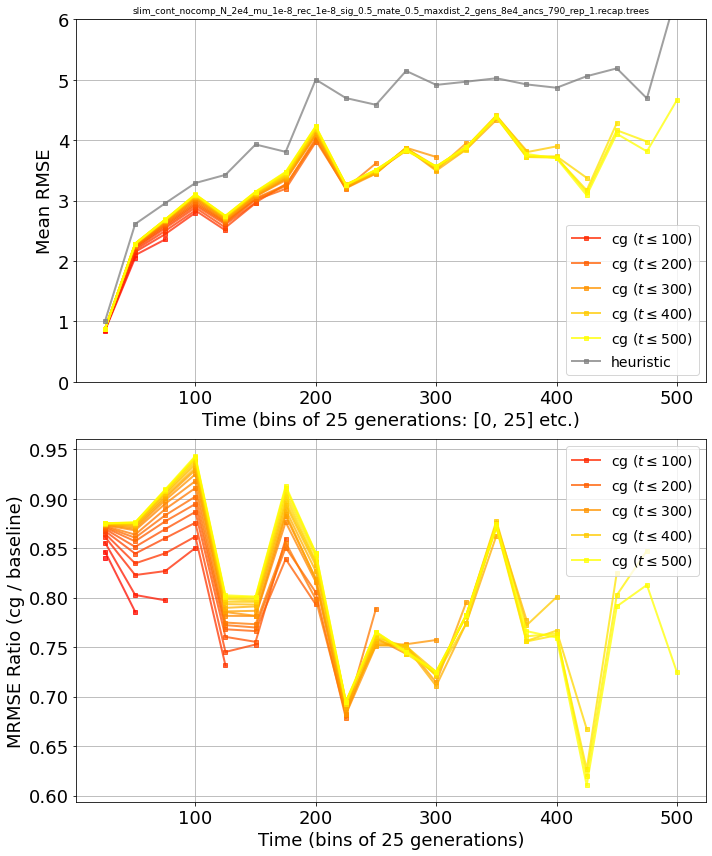

In [3]:
f, (ax0, ax2) = pyplot.subplots(2, 1, figsize=(10, 12))
time_cutoffs = np.linspace(0.0, 500.0, int((500.0 / 25.0)) + 1)[1:]

colors = pyplot.cm.autumn(np.linspace(0, 1, len(time_cutoffs)))

ax0.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax0.set_ylabel("Mean RMSE", fontsize=18)
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.set_title("slim_cont_nocomp_N_2e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8e4_ancs_790_rep_1.recap.trees",
              fontsize=9)

for cg, cutoff, color in zip(cg_results, time_cutoffs, colors):
    label = None if int(cutoff) % 100 != 0 else 'cg ($t \\leq {}$)'.format(int(cutoff))
    ax0.plot(np.arange(1, len(cg)+1) * 25, cg, alpha=0.75, color=color, lw=2, marker='s', markersize=4, 
            label=label)

ax0.plot(np.arange(1, len(heuristic_result)+1) * 25, heuristic_result, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax0.grid()
ax0.set_ylim(0, 6)
ax0.legend(fontsize=14, loc='lower right')

ax2.set_xlabel("Time (bins of 25 generations)", fontsize=18)
ax2.set_ylabel("MRMSE Ratio (cg / baseline)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
for cg, cutoff, color in zip(cg_results, time_cutoffs, colors):
    ratio = np.array(cg) 
    ratio /= np.array(heuristic_result)[:ratio.shape[0]]
    label = None if int(cutoff) % 100 != 0 else 'cg ($t \\leq {}$)'.format(int(cutoff))
    ax2.plot(np.arange(1, len(ratio)+1) * 25, 
             ratio, color=color, lw=2, marker='s', alpha=0.75, markersize=4,
             label=label)

ax2.legend(fontsize=14, loc='upper right')
ax2.grid()

pyplot.tight_layout()
pyplot.savefig('cg_790_ancients_spatial_stats.pdf')

In [4]:
heuristic_result = [1.0044713147793631, 2.611173538013576, 2.955836006699128, 3.2902230666374566, 3.4258308203410044, 3.928766308002668, 3.8066335182123794, 5.003394888707937, 4.697524615551629, 4.5857311214719765, 5.147283581960809, 4.915395616275572, 4.968302754820679, 5.025645558295474, 4.923574238439795, 4.8680526854355515, 5.059329324226157, 5.188975545835576, 4.692073794249334, 6.441145851397689, 5.6578522440193915, 5.895086212463463, 6.4448936240093175, 6.903661202324198, 5.10195735581012, 4.7228229514296975, 3.862370210357869, 5.037697070897743, 5.6353071253201765, 4.068190828390348, 4.783123224587747, 4.5987883771432365, 5.14604689197505, 5.210466450737079, 5.466055101093026, 5.968042219701612, 5.649778857658951, 5.203609128875013, 4.924447829186842, 4.999418635852894, 4.970656728506596, 4.33899790037302, 4.733710701502392, 4.8893857368959805, 4.876869847772292, 4.560413038351064, 5.5946689089143895, 5.305988910983965, 4.6968819334098315, 5.062752448315381, 4.838554898624275, 5.61273174963779, 4.777594374159891, 5.083986916641367, 5.1422227142354435, 4.759790945194858, 5.051049328430466, 4.787943256946203, 5.193866860945422, 6.1215834251249, 5.711856932898284, 5.987124799107691, 7.382143702525771, 5.634632742547837, 5.367759133833738, 4.923812083317601, 5.307430983121321, 4.648032516025988, 5.531257177568229, 4.642276285222991, 4.590560098155947, 5.509228071067441, 4.8611346900003385, 5.644437653657542, 5.767092622562613, 6.3951750298186845, 5.398788548902343, 5.1842025509782115, 5.268853946405953, 5.246914462884281, 5.292403112905756, 5.434906758840426, 5.5243663406609205, 5.677907781665577, 4.7297416745075145, 5.401098522800418, 5.603760127264362, 5.634155571686925, 4.554846581482807, 4.861279989521942, 5.02407811815905, 5.863104745133933, 4.317051372327312, 5.2080017437141315, 4.549651775039596, 4.720414713511348, 4.4619659588224865, 4.95581509383064, 4.985801294851822, 4.785746627188562, 4.799973925627196, 4.498158861531698, 4.976979495915663, 5.9694737784776635, 5.45546993154735, 5.228563591754936, 5.566879620569572, 5.136940409298466, 4.370845078718838, 4.7339503703884604, 4.325583432476893, 3.8451622942448513, 5.263310773940033, 5.507276768384117, 6.3993540791905215, 5.550538506667127, 4.35493170757172, 5.216699030618139, 5.582662436481478, 5.915863878498664, 4.443645323552991, 4.5984313802002905, 5.4865767663191685, 5.022931117033674, 4.787008744676583, 4.838505550713067, 5.625603831572384, 5.485365409846825, 5.275414296602919, 5.249662207457016, 5.332178253054494, 5.228914934041077, 4.458504305105673, 5.236546070751098, 4.704538224536923, 4.820826459461741, 4.652150088178353, 5.351427753158645, 5.470679659209922, 5.575263092766871, 5.920016932791946, 5.770373612218989, 6.0869337042652445, 6.200515343935041, 4.962516248681599, 5.280837382920874, 6.438530220710586, 5.8690107892365635, 5.487131964829195, 6.2953337268388205, 5.9117559653868454, 5.876209268099963, 5.410614743690541, 6.189492664229236, 5.757880898984912, 5.013112197646818, 5.675757851637324, 5.451988420473406, 5.658840825084684, 5.582181514645237, 5.044787669372238, 5.175504417295334, 5.14758382653228, 7.1253077253058414, 5.837898916506569, 5.000679921447851, 5.160090646102971, 5.491186934390137, 4.627702701014352, 5.361137424959454, 5.5550687684326165, 5.807729469387337, 5.145202348298184, 5.3769852792766555, 5.294701823737862, 5.8710135950694635, 5.186730940366705, 5.231281406810214, 4.968614591914398, 4.480053610287562, 5.489674776588752, 4.635403645306177, 5.173947830196464, 5.191035982679904, 4.652509493654037, 4.771527034723351, 5.135241602932844, 4.4807980260639555, 4.551166208429558, 5.701387476629907, 5.973894067434038, 6.696495926095399, 5.181997070190071, 4.531324447644275, 5.87442939743062, 4.574835657596228, 4.108998399471119, 5.7908691212664625, 5.395195860641424, 5.884501331940599]
cg_results = [[0.8437193696404424], [0.8502782233718174, 2.0518931235190174], [0.8594109767043029, 2.0960469440889655, 2.3566667310642817], [0.8653086436378339, 2.148592762713602, 2.44412856637362, 2.797414750093563], [0.8685558041366811, 2.179400320961853, 2.497188908240187, 2.835383489203143, 2.5061233488270083], [0.8712596665297427, 2.2051708777388552, 2.5424851527695225, 2.881404214459766, 2.552700665175974, 2.95693866842893], [0.8733122412429014, 2.223060328740341, 2.569518749570861, 2.9173292770806403, 2.604934226424764, 2.9675536632795, 3.2710527683773267], [0.8746255013212998, 2.237745552563035, 2.592817750435355, 2.9436059819761047, 2.6311977498643695, 3.010194350573219, 3.193812575105082, 3.9684017988723523], [0.8755854616924681, 2.247020577871989, 2.6108488209439753, 2.9683057315301067, 2.6456148400041504, 3.0244175428580555, 3.238164988263378, 4.029770899334131, 3.1861438865090412], [0.8763390699259523, 2.255242806454791, 2.6292988475259063, 2.9966769275808054, 2.6543551342079312, 3.0375727118170914, 3.256829066554387, 3.9948876383428953, 3.2024766436074796, 3.6172322703909074], [0.8770961653422845, 2.2665920675522777, 2.645336593495434, 3.0198835310357532, 2.6776235030835425, 3.0701725933951005, 3.335806491211019, 4.082491884022561, 3.2058313742561917, 3.481006055126248, 3.8254636950126555], [0.877507397047903, 2.270885143435999, 2.6558460628710487, 3.0424994161536225, 2.6908321299915294, 3.0708478890892414, 3.3598599980839245, 4.099052001209921, 3.2041012190541065, 3.4466104924393393, 3.87535906132012, 3.7219584978448923], [0.8779057040202304, 2.2751038368249774, 2.662361909653011, 3.0567934746553274, 2.693012790717254, 3.0907642285377683, 3.368249028764552, 4.095835520855884, 3.228132714736967, 3.4579284157472956, 3.8692373720332935, 3.5109284870387603, 3.9513412314912078], [0.878199522882892, 2.2786519935191443, 2.667580778180133, 3.0635027268463837, 2.7054073373667222, 3.1082199367516465, 3.383831161617035, 4.136714145280232, 3.240380968237825, 3.4492277850628916, 3.8625918276374303, 3.4936573384262464, 3.846721082160579, 4.335175115093717], [0.8784872398319145, 2.2811590960022063, 2.6739271993308105, 3.074663244216045, 2.7183114735587153, 3.1156013509821787, 3.403093733545944, 4.166325857986498, 3.254700668044381, 3.4673933009694737, 3.8655848468330327, 3.5445522094250457, 3.889042758874295, 4.397232193715957, 3.828508745927887], [0.8786873428927082, 2.2830361481176564, 2.67765859396655, 3.0828240429260423, 2.7263074984794153, 3.126504797809246, 3.4155078677650166, 4.181453319204239, 3.2661687161121606, 3.481267758396425, 3.865181351817715, 3.5636363774857145, 3.884483414530424, 4.4106686802566095, 3.800785386369613, 3.897151964988973], [0.8788652277722894, 2.285566950254035, 2.6825100447482457, 3.0907928713825905, 2.7353147821146973, 3.13162288180756, 3.434409501682906, 4.188301945151495, 3.260905281054259, 3.4917421147190884, 3.848111778843281, 3.546354636973379, 3.8448471715786927, 4.3953387326997255, 3.723342399930364, 3.7322516146060627, 3.3761815397389183], [0.8789895853880261, 2.2864516534271795, 2.6841684705250453, 3.095804588856078, 2.7412277795147983, 3.1380761844783485, 3.4500646057321602, 4.211827698536291, 3.2553374332646086, 3.5052194752477557, 3.8267805549900884, 3.5555752356131376, 3.8836503512336984, 4.37747177452944, 3.720831968468641, 3.709618922099964, 3.1700403191244937, 4.282108006574219], [0.8790552903342977, 2.2869457578157926, 2.6857063644879196, 3.0994915384773125, 2.7442296493957548, 3.1440802135844628, 3.466820553529321, 4.226771179261416, 3.2607082135544854, 3.508478870047391, 3.837631374010832, 3.5622486893766014, 3.8852623858273314, 4.37664986907783, 3.7463939873748213, 3.7178024424053864, 3.134059491627573, 4.164112516413595, 3.9768243217946586], [0.8791396316517142, 2.287826077615511, 2.688083444115213, 3.1033771114681525, 2.748758747107133, 3.1474126291985223, 3.475536358014923, 4.229584805907227, 3.2639607572477685, 3.5106880605530817, 3.8349965145769644, 3.5653673249695554, 3.8879706354601704, 4.392506349543224, 3.772313518701115, 3.698191223816269, 3.0877580110593983, 4.1053678754107095, 3.81389182927948, 4.6658961034121695], [0.8792285226642998, 2.2887553705006876, 2.689823140777895, 3.107196182564744, 2.7531864900286056, 3.15086348558051, 3.489923573844095, 4.229294596158365, 3.2790493061183006, 3.520217744170372, 3.831207173363111, 3.618883222867473, 3.8609328979792346, 4.3985701060645725, 3.8087980532067545, 3.6914909501654285, 3.048985701480644, 3.961636350368022, 3.7037164908422042, 4.137645989468764, 3.9329995084274927], [0.879245847309609, 2.2887020785672303, 2.690124354172686, 3.1084352836736406, 2.7533932691887224, 3.1524483897456674, 3.4933100996215685, 4.229130168589903, 3.280177054137324, 3.5220662148950717, 3.82794938981139, 3.6321600188791034, 3.8564691568705705, 4.415228702423262, 3.817288282578691, 3.7374469511345905, 3.028955298675384, 3.9607363072274415, 3.7808919806681693, 4.007357073735506, 3.5909400503307722, 4.843582817026068], [0.8792495209418351, 2.2885654681153476, 2.690041015401859, 3.1083999037083427, 2.753218122245194, 3.15249092096944, 3.4938017722079655, 4.229603035341387, 3.2826941557866616, 3.5222679459493675, 3.8284807722717376, 3.6423919474842896, 3.85724074461219, 4.4141142442315955, 3.8100810649731836, 3.7478790064196317, 3.0323573817225826, 3.953154976739706, 3.777424342202393, 4.001821140381158, 3.595260694995971, 4.693700532236841, 5.499249303066845], [0.8792388692729465, 2.288333281566756, 2.689703206417645, 3.1082344005112548, 2.753341807117415, 3.1530589692807216, 3.493495875686, 4.230331343361998, 3.2839184263048256, 3.523785537589296, 3.824853648130821, 3.6397187312725716, 3.860670884482974, 4.4151547346496995, 3.8157867024560677, 3.755519259184641, 3.0275959315867973, 3.9312041030223774, 3.7613069844548774, 3.95361814778365, 3.481534499253224, 4.549937328141567, 5.031187240398631, 5.468767740624589], [0.879254913697638, 2.2885141799555746, 2.689879597987825, 3.108941865319432, 2.753434029040563, 3.1532053932504063, 3.4935867879454205, 4.227483403930042, 3.283754845384382, 3.5216205138275054, 3.8183658611286515, 3.633512414618106, 3.8505344747738786, 4.411103539450262, 3.8164840587177498, 3.7424907583994496, 3.016590342869258, 3.9238623915808155, 3.758162484179753, 3.8791452869477814, 3.42753111700309, 4.458869308688353, 4.870754103770826, 5.291690600493757, 3.5895698331772383], [0.8792581150480497, 2.2884384878200894, 2.689866170889953, 3.1089946309525094, 2.7541195928799334, 3.153969783108073, 3.4944680462830675, 4.229079839060276, 3.2868555257715175, 3.5257208756328033, 3.8180516061943037, 3.6358152940736117, 3.852770071854527, 4.410508497301361, 3.8227482740284047, 3.7454607376054034, 3.0240573493632597, 3.919389066365865, 3.777723461468605, 3.8716953597088173, 3.38023802296189, 4.414176130651296, 4.847967370494494, 5.131196645518575, 3.5111569684622053, 3.697570174442657], [0.8792590901397375, 2.2884087110531626, 2.6897554083553628, 3.10885483520165, 2.7543501649474926, 3.1541455109824224, 3.4944591713267443, 4.228307954740893, 3.2881953785355367, 3.525608108310629, 3.8168539736218023, 3.6354122898741608, 3.8540021967047084, 4.413708503307587, 3.8278969623751604, 3.753674521942713, 3.025951833496446, 3.9217654162530513, 3.7844024648615573, 3.8677597605229774, 3.358551727339607, 4.404094225533754, 4.8500694046009505, 5.138229455415089, 3.436216813193953, 3.70572384887961, 3.3536378016496067], [0.879267452010029, 2.288490807598609, 2.6899456627162546, 3.109096523551777, 2.755021041938298, 3.15443727510483, 3.495166638671362, 4.230200414772617, 3.2900548364748805, 3.5253376855792826, 3.8158430426066223, 3.635204111301204, 3.8553032997581185, 4.4142261607378135, 3.838830879294279, 3.759404026090956, 3.025603362062419, 3.9401806718731773, 3.799233637484115, 3.856851829620346, 3.3480365467882005, 4.385723251282652, 4.872507072757412, 5.1383978351473845, 3.442056263780721, 3.7271703338094713, 3.3941310624935026, 4.2799213856252045], [0.8792663261102832, 2.28843227631785, 2.689958860694732, 3.1089886937574547, 2.7549560693832675, 3.1547912688689626, 3.4948124610824656, 4.229847021829269, 3.2918889577542365, 3.5253232103208405, 3.817251024472528, 3.6370470157393355, 3.8586513919213483, 4.4140838856298465, 3.8421358664535967, 3.7540800312786575, 3.0509438514662195, 3.95732504624414, 3.802248508323599, 3.81605398383692, 3.339353156004123, 4.37286529750681, 4.85823114720545, 5.075270654565571, 3.441878173072632, 3.6683398783284704, 3.2857134159165335, 3.9725519772817304, 3.742479000383353], [0.8792735956337935, 2.2884609386783326, 2.6899830600186094, 3.1091825310344703, 2.755111993074045, 3.1548301116491673, 3.4937756752445104, 4.229860346490772, 3.29221339383071, 3.52421852516735, 3.818669117407208, 3.6371633741268896, 3.8577673900970386, 4.4161432727717, 3.844961712807256, 3.7515267634934113, 3.0544291355451527, 3.9564805350921155, 3.7984567330743784, 3.8126934570606648, 3.335798577969115, 4.381841956141607, 4.881526889967399, 5.092352652426042, 3.456425713866266, 3.641233401723947, 3.259963178755418, 3.9290278956571827, 3.6101066047309622, 3.100719553679703], [0.8792833348384235, 2.2885408907679365, 2.6902540603928773, 3.1093108264807117, 2.755394001034599, 3.1544496124199606, 3.4933504460750027, 4.229918988435673, 3.2918206544871844, 3.5240412466212487, 3.8161260416353926, 3.635525637514571, 3.8563237001349275, 4.415498647721434, 3.8435040336495643, 3.75302692585914, 3.0587787519317304, 3.9597016366307884, 3.799302926006446, 3.807201648599406, 3.3558415349215376, 4.383717629158344, 4.90136903352626, 5.11856161877741, 3.4700445064789402, 3.653968035597612, 3.2073680286931334, 3.868489523831693, 3.511740083641513, 3.0452037646898558, 3.2468586513537776], [0.879284657272217, 2.288546290627478, 2.6902808801890052, 3.1093163894750138, 2.755406484637376, 3.1544610471461234, 3.4934580555496177, 4.230207285805014, 3.2920213253175694, 3.5242263113993433, 3.816400596073541, 3.6359404440407603, 3.8609317613602707, 4.416728538664487, 3.8440870735961443, 3.752528318619645, 3.0619863954021906, 3.963631476625779, 3.8062074299763466, 3.805856068833075, 3.3635783441180576, 4.39151873277385, 4.933372849915542, 5.130622653668862, 3.484753497249043, 3.6657162209636094, 3.18950380632182, 3.871979729621971, 3.5027148290508654, 3.021729575904067, 3.171605524399091, 3.631307368433745], [0.8792853558163092, 2.288562944151045, 2.69027964110689, 3.109252740954987, 2.755404991130579, 3.154428136080807, 3.4932894389512685, 4.229830012310222, 3.292094521664775, 3.524191362427593, 3.8171696536912103, 3.635483670605088, 3.860996164982593, 4.416274179954109, 3.8438649475692293, 3.750172650875311, 3.06698929714796, 3.968959050633196, 3.8101838025367183, 3.8230076929440737, 3.3764123754602333, 4.411664302142516, 4.9704951743842685, 5.170808059988926, 3.5054775952650687, 3.705094790974578, 3.206726580257687, 3.8363631966043337, 3.4686430757189757, 3.053423932098756, 3.09983423002109, 3.557940843368762, 3.4724682109923037], [0.8792859184272771, 2.2885969838259497, 2.690310146215387, 3.1092910187073146, 2.755152552644873, 3.1542499429333435, 3.492454188073771, 4.229283353057924, 3.2914324100428805, 3.523837068836951, 3.8153556554893053, 3.6303363323653803, 3.8602508855807556, 4.41529248474323, 3.841894468955369, 3.7482862298239206, 3.064970192413054, 3.9682398837097317, 3.8101717458868856, 3.828561249248696, 3.3909446439805317, 4.423478046904625, 4.999558056455432, 5.2069094107241565, 3.512197330118412, 3.7197370936271708, 3.204057583651989, 3.820319319959616, 3.457025862559757, 3.061970106349238, 3.0427848099540165, 3.5265989839732605, 3.3095832116552115, 3.903687394021477], [0.8792860207073955, 2.2885948301079053, 2.690330475594507, 3.1092803152010338, 2.755163687236982, 3.1542900307894453, 3.492400030754351, 4.229012337053243, 3.291539783740227, 3.5239727230850666, 3.815317138989109, 3.631154005219368, 3.8604679048344304, 4.415286289354266, 3.841656576232582, 3.7482125168179703, 3.065272163443941, 3.969111133523302, 3.8105640346530856, 3.8308784496651986, 3.3915407778820192, 4.425424484582597, 4.997805342540111, 5.206879171850712, 3.51485947119152, 3.7291620942196246, 3.2163218933541513, 3.811847999740548, 3.40731652825761, 3.0520578261920073, 3.0354956871204184, 3.5193773082626607, 3.2632917545696967, 3.7887152160400537, 4.408671174064993], [0.8792873752494895, 2.288609746148082, 2.69037721968814, 3.1092901328080025, 2.7551533472557015, 3.1539600617362358, 3.4921555177363817, 4.227109497609386, 3.2915941745968698, 3.524454538682212, 3.8150972897928783, 3.6301960931472004, 3.860795514001745, 4.415462027212926, 3.8411240476875643, 3.7471630753797687, 3.0657847811860983, 3.9711704695004544, 3.810727632630787, 3.837594270548828, 3.3988757695567107, 4.431627785762413, 5.003569296390061, 5.221568877118884, 3.515768732063973, 3.7301332561861367, 3.2215660298798006, 3.8186842355539077, 3.4089116847540883, 3.055833709123, 3.01429417339396, 3.4966663060533003, 3.256329578669762, 3.7377161278534214, 4.315904494150752, 4.642351807864816], [0.8792882678666594, 2.288625791060522, 2.690403364305517, 3.1093032943215593, 2.755143947667468, 3.1539257618509824, 3.492147460144597, 4.2271815319423425, 3.2915810648312602, 3.5245976203282874, 3.814834788297092, 3.629904243261633, 3.860719067028855, 4.415394430289667, 3.8405632027485104, 3.746846915174668, 3.065553299621806, 3.9712308636024916, 3.8102162969376248, 3.838531433360762, 3.40270309831594, 4.434558975699391, 5.007252062581655, 5.23086493193369, 3.524803778085694, 3.7331472365010194, 3.2168004548377582, 3.8039774470638994, 3.3992676169454534, 3.065406165479109, 2.9900001307386344, 3.5310197480813006, 3.2420782301583055, 3.6857391590758453, 4.282788098456797, 4.583995256162806, 4.626201579607033], [0.879288064312951, 2.288628998265337, 2.690398280488033, 3.109260168219611, 2.7550921619694635, 3.153944266940617, 3.4920213009999, 4.227098307232065, 3.291544301014667, 3.5246520089721045, 3.8150447441938344, 3.6295804781723615, 3.8605630311228323, 4.415414254335453, 3.8399857798029697, 3.746006400413609, 3.067417136491403, 3.9734478530346364, 3.8117374774603, 3.8417853721120756, 3.4085072569160255, 4.439195474475599, 5.011787591990404, 5.243729244047898, 3.5308111566895155, 3.7431042717062364, 3.218682267832223, 3.802289041658422, 3.388015904852129, 3.0612900698990697, 2.969521876778304, 3.5478205774972644, 3.220158712753476, 3.6565290423433368, 4.193928555248865, 4.479492380610753, 4.440742705983352, 4.060539407114804], [0.8792873344010204, 2.2886182959359003, 2.6903779864539112, 3.109217354697247, 2.755070125939618, 3.153951059649389, 3.4918815603889395, 4.226970911986676, 3.2915969114391945, 3.5248202472085426, 3.8153255104344495, 3.629567337967962, 3.8606290402158243, 4.415404104382896, 3.8400484054931594, 3.746123357496095, 3.0692038540872977, 3.975617475894327, 3.8132619120553155, 3.8407120631446676, 3.410860535243332, 4.442215636875742, 5.011462301289065, 5.248206658163122, 3.5387842945920682, 3.7455415649915933, 3.2193149866770723, 3.807054925798949, 3.3878685580286243, 3.0447805627616704, 2.9461996251141467, 3.54099088842711, 3.210061649233229, 3.6363987509753466, 4.172719150729949, 4.428863889178583, 4.333543281623907, 3.966014824814573, 4.113276355440004], [0.8792875973080981, 2.2886238993004477, 2.690377946701119, 3.1092003364658174, 2.7550682296339972, 3.1539207285517326, 3.4918975230778893, 4.226781829817559, 3.2913159966620658, 3.525061375544497, 3.8154969558872813, 3.6292814202552313, 3.8604887511197905, 4.415151700492939, 3.8397525448647887, 3.7457772851994724, 3.0701242991850526, 3.977924850614882, 3.8136946586294838, 3.842331731547375, 3.4146173675956417, 4.446331372445076, 5.018599195158055, 5.2569636660721235, 3.5428217401087294, 3.7486456139159525, 3.219853876504904, 3.806911080275411, 3.3889699435607747, 3.0328653535048153, 2.939555785238409, 3.5355195100058827, 3.2074562134697344, 3.613625693035285, 4.145387127012812, 4.387531498773229, 4.299408939406994, 3.9278929434187053, 4.0511473356390315, 4.190754467047014], [0.879288062597195, 2.2886284089530293, 2.6903775083650774, 3.1091894519244696, 2.755077533643271, 3.1539185093539466, 3.4920182379685536, 4.226779185942473, 3.2912210487376057, 3.5252885091602058, 3.8153080206194256, 3.629224804139278, 3.860563301136501, 4.4151439122030425, 3.8397355339905306, 3.7459922655225633, 3.070337572690894, 3.9790281614798477, 3.814166216895813, 3.8434859910875874, 3.416649927299339, 4.449192651977248, 5.025079996077666, 5.273427537758938, 3.547596084609689, 3.7550080704420434, 3.2182637834183394, 3.8025263708620645, 3.3906035666126204, 3.03334501822225, 2.9608882429174823, 3.5370859718459715, 3.203463930992964, 3.6023216765681583, 4.147164351242087, 4.401983564185958, 4.3081145414305295, 3.922714531981233, 3.9792747779885507, 3.891872914803665, 3.4223035420908725], [0.8792875000674794, 2.2886212731583067, 2.69036544037718, 3.109162680080086, 2.755056838343709, 3.1539292434741517, 3.492035681210183, 4.22674467588584, 3.291221821026297, 3.525439882137318, 3.8156424431974854, 3.629255128815373, 3.860610802748873, 4.415153156565001, 3.839695724455152, 3.7459278054041993, 3.0708918332965456, 3.980181179715205, 3.8143288275440725, 3.8447058694253333, 3.4177835270971393, 4.450472208743795, 5.025254962240818, 5.2758550035854395, 3.548665413561803, 3.7560894673656815, 3.2194235565296956, 3.80571743522549, 3.3928788624149564, 3.042609965798138, 2.9626514259656513, 3.5478815528136805, 3.2036468072892403, 3.5864992249698564, 4.142095782245401, 4.413523418105322, 4.298528117645664, 3.9362044689087408, 4.033976151940756, 3.822658635461692, 3.2751712905979784, 3.3059455277553367], [0.8792870446350849, 2.288614768078666, 2.6903626897985147, 3.109144642740134, 2.75505133053073, 3.1539694360782984, 3.492031568172361, 4.22675014579619, 3.2912747833223257, 3.52553637289702, 3.8159692805082295, 3.6293202945973766, 3.8607098275549414, 4.41525596445157, 3.8395773194272333, 3.7459770647348667, 3.071146944680587, 3.980869443708788, 3.8149615485716013, 3.845380189786737, 3.4183390191032106, 4.451006809996332, 5.02508637880735, 5.276401895573709, 3.54959362777436, 3.7556178831730684, 3.22347545191879, 3.8111452493152136, 3.3922533143217155, 3.042052905541813, 2.969725712799662, 3.5484142422353804, 3.2045451174428856, 3.5875969261718903, 4.157791769022519, 4.420189495099147, 4.290508209178691, 3.9514603765352234, 4.053592596196249, 3.9079088363664094, 3.291976547486306, 3.3389472984461133, 3.858080699043856], [0.87928682878976, 2.2886137773785995, 2.690359776156697, 3.109128256259295, 2.7550392775533235, 3.1539773599457708, 3.492020282113117, 4.226701779193906, 3.2912475769839955, 3.525563015731503, 3.8160477113278444, 3.6293292125912218, 3.860695427127292, 4.415167779844537, 3.839452115143439, 3.7457781794806815, 3.0713245455978297, 3.9810493289535653, 3.814533857999081, 3.845935352519013, 3.4189871821774553, 4.451627031669665, 5.025938167215078, 5.2781936886832685, 3.5507724253822697, 3.757337005511121, 3.22578673750984, 3.8096306183493303, 3.396456210826794, 3.0416501416273323, 2.9693283018170344, 3.555104821327236, 3.2151498378172847, 3.6000653784383516, 4.185714772657513, 4.45676285827453, 4.311481329560806, 3.9498993659430646, 4.068955226320237, 3.9121647235114385, 3.2420072977283443, 3.307885095313315, 3.7940394870480465, 3.878644830463154], [0.8792859662049171, 2.2885953570973325, 2.690336474110757, 3.1091214635584583, 2.7550296124823994, 3.1539912264843486, 3.4920814496646417, 4.226807249247144, 3.2913948126674994, 3.525844317113609, 3.816547616763492, 3.6295162244862302, 3.861061808261021, 4.414030513878408, 3.8395447223242645, 3.747372001856621, 3.0716508611263156, 3.981637098150466, 3.8158754356854154, 3.84650421465722, 3.41844910455685, 4.45238972694116, 5.025946333241607, 5.278434189967174, 3.549746292252649, 3.756453412822191, 3.2237407337232753, 3.814297884320178, 3.397460510909066, 3.0451070028644978, 2.970222201390865, 3.5830764654430065, 3.219053576846067, 3.603988390990407, 4.2028803196137385, 4.456003949221031, 4.3272927021303165, 3.986604143954225, 4.063584284770442, 3.9066048325501033, 3.2626586019038157, 3.3054791913070507, 3.784411202175294, 3.927020983746652, 3.2099485035446924], [0.8792857622160984, 2.2885904919908935, 2.6903408620005846, 3.109117044001818, 2.75504619459689, 3.153890107575483, 3.4920702135466426, 4.226679697368027, 3.2914580114492207, 3.5259464662431776, 3.816683545364247, 3.6295876579113573, 3.861209119322283, 4.414087762171249, 3.839485209299304, 3.7473830466992117, 3.071814132261063, 3.981827478030539, 3.815893230117012, 3.846436146282375, 3.4180407266561676, 4.452611575911207, 5.025266029262476, 5.277144578206832, 3.5500833364157613, 3.7569247274286943, 3.223889011750397, 3.81717372135243, 3.398835375788508, 3.0415532024406176, 2.9655900149647647, 3.5827714065994427, 3.2213520690643485, 3.6057998217458263, 4.211220466599478, 4.455295259530834, 4.3348483341294894, 3.9973591791492855, 4.076790680700953, 3.976097088290163, 3.2638885769944825, 3.3326888556135454, 3.8610046593737706, 3.9750430143920457, 3.139571337123772, 3.482854015782547], [0.8792857199269407, 2.2885896650163735, 2.690339093081906, 3.10911684149461, 2.755048183750313, 3.153892778353055, 3.492070601506152, 4.226682368878806, 3.291455368589856, 3.5259712212863974, 3.816755670389763, 3.629605462614447, 3.861241955911907, 4.414095761133168, 3.8394300067492404, 3.747388039338565, 3.0718385324935524, 3.9818645072510654, 3.815841095615872, 3.8464441535181684, 3.4180755418661106, 4.452686605318407, 5.0256055746999015, 5.277257802060485, 3.5504187452178746, 3.756242302371032, 3.2239706294846977, 3.8171952740586104, 3.3993440851348375, 3.040315411565461, 2.966428072996872, 3.586272039848306, 3.226516653501494, 3.6063043864223396, 4.221703981404865, 4.460695498533881, 4.346132852657977, 4.021435635225088, 4.106123650195725, 4.02413253544845, 3.2821891466043254, 3.3404644633010894, 3.8778910839480774, 3.999218361472878, 3.103000063903897, 3.4732536848352646, 4.3154396595900035], [0.879285664264112, 2.2885881718534145, 2.6903388557232537, 3.1091164552659505, 2.7550505030545103, 3.1539060124170395, 3.4920837689126687, 4.226714163950442, 3.2914836125780202, 3.5260286144306536, 3.8169579390296895, 3.6296836355227557, 3.86136283925319, 4.414184271773016, 3.8395762554321244, 3.747518217596249, 3.07185958373698, 3.9820438156187525, 3.8161061711216946, 3.8463366134203842, 3.4178069425020507, 4.453014431706406, 5.024859716618348, 5.2780221215194505, 3.551035199775478, 3.754305500397165, 3.225359582941954, 3.8187334616209925, 3.4009968914402537, 3.0418249028338744, 2.9648934982173225, 3.588538294066051, 3.2319552468102373, 3.611490644432467, 4.235425950380197, 4.4735813215865265, 4.357680921924495, 4.055650218440963, 4.13561730821017, 4.0673293360983855, 3.340016656736411, 3.3971840644153715, 3.912400668919538, 4.092834904139235, 3.1503862112611625, 3.3820118221699214, 4.182648524059954, 4.0111025387929375], [0.8792859147340535, 2.2885909902940003, 2.6903496473363497, 3.1091358064581693, 2.7550617730716787, 3.1539186723639636, 3.492110678187192, 4.22673136593308, 3.2914884967109215, 3.5260477342866188, 3.8169670735288, 3.629776302209478, 3.8614122704800726, 4.414436920313577, 3.8396508072073035, 3.747611871758449, 3.0717329739032837, 3.981882707917109, 3.816039374115631, 3.846030607826703, 3.417225469981794, 4.452695323018686, 5.024482499534237, 5.276608897025971, 3.551327223529364, 3.7546597590245074, 3.226362171922721, 3.8195822624135163, 3.4017146163539507, 3.0422489197041576, 2.967331500904085, 3.5912896080106917, 3.234176317866586, 3.61526866770788, 4.2377573709883904, 4.48227582020636, 4.37071271292744, 4.067006363272069, 4.192579516826132, 4.094446970407177, 3.3667510846263604, 3.440564119452062, 3.9460419765277304, 4.132530161369465, 3.1676965096710696, 3.4758367753402855, 4.2652866602046995, 3.941847874763269, 3.2280474398840306], [0.8792860055718572, 2.2885918414264697, 2.690352573505164, 3.1091429267273862, 2.755065942015673, 3.1539253503684854, 3.4921332108177654, 4.226751708125312, 3.291493262291879, 3.526040825108719, 3.8169722395885803, 3.6298642092138373, 3.861457877487526, 4.414456204032413, 3.8397181293437197, 3.7477009854210794, 3.071622276252073, 3.9817221238799965, 3.8160394261528126, 3.846245182345121, 3.4171304411487005, 4.452937183109536, 5.024104803867805, 5.276879547994521, 3.5530104480468734, 3.754694227919469, 3.22583931210103, 3.8215808914309584, 3.403676925810292, 3.04292076193825, 2.9701660075533876, 3.5932932352104325, 3.2372692568719743, 3.618807075172949, 4.247766771718221, 4.487698786400332, 4.374873901475685, 4.071873763605303, 4.224385573157044, 4.117003705781437, 3.3948726906143367, 3.459220348440009, 3.9648817821192037, 4.171117083749097, 3.1970990087726348, 3.526643724054328, 4.298051181431095, 4.005527692903721, 3.078755122506553, 3.9649826870852927], [0.8792859483863462, 2.2885911440856073, 2.6903517891291746, 3.109143029571644, 2.755064029747124, 3.1539293594299065, 3.492140086172241, 4.2267692807172175, 3.2914989078597956, 3.526052593276752, 3.816992707610796, 3.629898917012939, 3.861498925723402, 4.414485370536985, 3.839727653036994, 3.7477424681248417, 3.0715891727165667, 3.9816589772932147, 3.81600220397408, 3.8461073835564, 3.4169033680295686, 4.452936354896096, 5.023931418546615, 5.27640915751038, 3.5531008381139033, 3.754638713915271, 3.2267014902935585, 3.8219192870066414, 3.4040338134315284, 3.043057641382414, 2.9702533906635487, 3.593824963043243, 3.2382074606319033, 3.620467790506993, 4.251693469929575, 4.492377178601916, 4.381651156688988, 4.080238986847145, 4.238934573842175, 4.123176800972617, 3.410051122170413, 3.478070386877431, 3.993835433136039, 4.1951177168776175, 3.2011615981292367, 3.547178152979699, 4.291993640413434, 3.951148965209987, 3.079925503533441, 4.00020750164685, 3.856568791969325], [0.8792859532695606, 2.288591301359959, 2.690351827873537, 3.1091439504226064, 2.755064940940736, 3.1539354323036815, 3.4921456777770037, 4.22678750207426, 3.291494216963957, 3.526053363512964, 3.816993166565149, 3.6299089363489045, 3.8614879811018055, 4.4144798562817975, 3.8397615347602945, 3.747750042906312, 3.071557464124833, 3.981608544724513, 3.8159860622463473, 3.8460954561814953, 3.4168341822174204, 4.452916820899045, 5.023990348734919, 5.2763630236400925, 3.553127770312084, 3.7545843490782955, 3.226449558125257, 3.8219156648151693, 3.404243755006705, 3.0460750717954843, 2.9721026492902727, 3.597630483984111, 3.238366173365619, 3.6211816913263593, 4.253044879917198, 4.497865956513224, 4.386795018357129, 4.081595173338142, 4.246144848777156, 4.129319236321775, 3.4193437255372903, 3.491869039768675, 4.001048440911316, 4.2058894997443, 3.2053930832242252, 3.560934106061631, 4.31393346384639, 3.96614183367964, 3.0721796928693146, 4.015616307241496, 3.834760768914212, 4.318748315984139], [0.8792859349513542, 2.288590105224584, 2.690352006334024, 3.109146629294308, 2.7550699332877073, 3.1539434604497663, 3.4921625834825196, 4.226814528631027, 3.291505523594759, 3.5260744579596484, 3.8170540988146526, 3.6299924457976025, 3.8615500993793894, 4.414561791388045, 3.8398264663632338, 3.747851897627273, 3.0715672774848426, 3.981675670054698, 3.8160045422282334, 3.8459029990446663, 3.4165471528682714, 4.452884719556455, 5.024312918755539, 5.275800617099061, 3.5534472815242295, 3.754796244649859, 3.227464417583429, 3.8230008782049927, 3.405378668657355, 3.0488763103130667, 2.977213405967262, 3.604505104082712, 3.2399171905782786, 3.6260715727435526, 4.257213221716491, 4.514345700892432, 4.393140743609684, 4.0887174233245736, 4.25954066171148, 4.1512128845972205, 3.4440695768444627, 3.510577061451646, 4.037627448937223, 4.2424652620128205, 3.2045788005533877, 3.5774532476702263, 4.302975619765746, 3.9712977575867043, 3.0477712375972383, 3.9907500377234366, 3.7988048003657946, 4.295232940804005, 3.550030517966487], [0.879285937871302, 2.2885902672347007, 2.690352276585205, 3.1091482270505697, 2.7550698575355552, 3.1539504309874795, 3.492168867501611, 4.226827286585472, 3.2915052343477234, 3.52607431854985, 3.8170543649988167, 3.630006534292172, 3.8615536357054845, 4.41454646341827, 3.839835254049151, 3.7478574904010973, 3.071562657733993, 3.9816477022581185, 3.8160261540278033, 3.8459282820656178, 3.416493601856074, 4.452943901012266, 5.023972021928125, 5.276120661343081, 3.5536952114082982, 3.754967867593569, 3.2275049178004322, 3.8231092634855974, 3.404831256662055, 3.0488860730683016, 2.9753787110797303, 3.603782734447906, 3.239414393265041, 3.62508861250839, 4.257911311872256, 4.52128200635439, 4.394487329268072, 4.091417453752157, 4.259766627762966, 4.155756028094049, 3.4503939139150512, 3.5234236860430634, 4.0456380192186625, 4.256105142506249, 3.211790891073226, 3.5853527092082924, 4.29584649357737, 3.9773395283802655, 3.0514429202832964, 4.046626892444949, 3.8165050367595943, 4.340175674822488, 3.510458765809894, 4.281926046901051], [0.8792859599318267, 2.2885907372586263, 2.6903531642280876, 3.109149540626407, 2.755070653947239, 3.153949762519701, 3.4921714293764605, 4.226832335683959, 3.2915014218771947, 3.526072683727802, 3.817052736436302, 3.6300043869606227, 3.8615546997137713, 4.414551873845409, 3.8398222509272615, 3.7478550843817, 3.0715596799136704, 3.981612513564712, 3.815963599149992, 3.845895467563149, 3.4165477106601108, 4.453025591565539, 5.023908443814912, 5.276625878078073, 3.5538711053474774, 3.755125223089436, 3.2273556671844936, 3.8222410191935166, 3.4039266315201133, 3.048499821102086, 2.9753211053509965, 3.6045411156315836, 3.239719377565388, 3.6252125868798943, 4.258623457156089, 4.522277727469301, 4.394807516762238, 4.0941096462366575, 4.264949206404557, 4.159789014568423, 3.454705172703338, 3.5260958240385043, 4.055924700468697, 4.268326794235277, 3.2296888861525934, 3.600927762124103, 4.2956397031347215, 3.969664490626374, 3.0471698272396366, 4.058791166384134, 3.8591323129410644, 4.37326431485115, 3.5182340502326666, 4.2994182048928105, 4.333782542526148], [0.8792858811455092, 2.288589381471882, 2.690352020382809, 3.109148539260104, 2.75506833245743, 3.153950724992543, 3.4921722770584966, 4.226835145116004, 3.2915100089257834, 3.5260809414495795, 3.81704072157963, 3.630030991931613, 3.8615795115892, 4.414572225899295, 3.8398452193509, 3.747891199832677, 3.0715861576406733, 3.9816349280057883, 3.815986193354583, 3.8457966594614152, 3.416339314844024, 4.452850869129652, 5.023557198646296, 5.276104698611245, 3.5538993105438257, 3.7550978928163907, 3.2277256123304054, 3.822798902746542, 3.404238196583872, 3.0485089292694414, 2.97614475221768, 3.605707965549054, 3.240539219390605, 3.6263277322150547, 4.260231334980993, 4.524012220818338, 4.3952063828108825, 4.095156435456996, 4.266922132528752, 4.163684670562067, 3.4621678836877012, 3.5293382757042564, 4.073458484401628, 4.281232734964153, 3.236518875217482, 3.6076775935501044, 4.306043317567556, 3.9685233641563467, 3.061548084568547, 4.071160410312301, 3.9121166724557432, 4.386979262092856, 3.510025581426041, 4.24165459934063, 4.168509485065441, 4.107288754325154], [0.8792858227203743, 2.2885881271114177, 2.690350814287344, 3.1091487588676068, 2.7550690075434274, 3.153952753000161, 3.4921778041569977, 4.226843756874546, 3.2915190570248973, 3.5260932375931993, 3.817056591014926, 3.6300654816550315, 3.861608704436802, 4.414587473353873, 3.83987084414712, 3.7479430949372947, 3.0715840086093893, 3.9816503891830064, 3.8160041328299346, 3.8456381821927987, 3.4160852957667056, 4.45265076711523, 5.02320697647619, 5.275493852549711, 3.5539672265663027, 3.755056433657398, 3.2278407654739, 3.823422512270311, 3.404951534012372, 3.0484473096850526, 2.9767396419860135, 3.6062813068226536, 3.2409206978490244, 3.6276341467527593, 4.2619233825145715, 4.525936706532256, 4.397056372345969, 4.095431672859967, 4.267959571704362, 4.1646418507891445, 3.469172745056745, 3.534798848055668, 4.0851862755134, 4.289673875756242, 3.238472030863442, 3.6134586226888312, 4.289657255343082, 3.9541480700019043, 3.063388915483148, 4.079368608128839, 3.920624478856705, 4.40377009936456, 3.4880237157737257, 4.1671435985423555, 4.0815081284077275, 3.9023940132238013, 3.857306441246904], [0.8792857984860151, 2.2885875883649476, 2.690350232050622, 3.109148496056013, 2.7550694076441116, 3.153953096938581, 3.492179088753091, 4.226845685849818, 3.29152280874743, 3.5260978706218364, 3.8170716286188724, 3.630080016777941, 3.861623350678009, 4.414596296110653, 3.839877686173075, 3.747966304261413, 3.071594299654365, 3.981671367573852, 3.8160144134763865, 3.845600937932363, 3.4160080918240077, 4.452626970040118, 5.023092529482043, 5.275355711242042, 3.553925760413777, 3.7550830081568276, 3.2279649734517206, 3.823708801956163, 3.405184509044286, 3.048261604953276, 2.976831378961797, 3.6064845619033625, 3.241116561512171, 3.6285157721976895, 4.2626163423776235, 4.5273705029749785, 4.397760598067545, 4.0959029764226935, 4.269912088761046, 4.167336595373529, 3.4726127022259985, 3.536671705226581, 4.088675092755276, 4.2985520251009195, 3.2404006925949593, 3.6199868678062312, 4.271172231512299, 3.9476606658135602, 3.0725340140141455, 4.083382351647081, 3.934614347127678, 4.421476619985636, 3.4837826181359546, 4.1683362213940915, 4.0534949636708895, 3.811796921014513, 3.8047453647661786, 4.240567596624692], [0.8792857891318419, 2.28858737826844, 2.690349836321121, 3.1091478381612854, 2.755069542101758, 3.1539532255701928, 3.4921773568336425, 4.226843108791287, 3.291523063183875, 3.5260962646617404, 3.8170764425305204, 3.6300860060427382, 3.8616269332783495, 4.414625026330648, 3.839880284848369, 3.7479602058262165, 3.0715935587573453, 3.981674585051765, 3.8160119475378487, 3.845557408490406, 3.4159565563488483, 4.45256394047534, 5.022989503162627, 5.275184049031922, 3.5539178004216194, 3.755118162335565, 3.2280375283160927, 3.823830230230711, 3.405225588655569, 3.0483652816793625, 2.9769732707601535, 3.6065012170297597, 3.241297440537121, 3.629095912280806, 4.263360544944283, 4.528103752491469, 4.398143878244872, 4.096931622666984, 4.272027990721391, 4.168126445453604, 3.475478582084564, 3.540309874890379, 4.0927685880429, 4.303840336476517, 3.2390732435503966, 3.6233667784615844, 4.268976639973699, 3.9457054233162823, 3.076947909583966, 4.092203686612486, 3.945257675481344, 4.455689099761171, 3.4923633665572464, 4.164565890303022, 4.049472549320826, 3.7765414320688846, 3.789702536752394, 4.201417693553512, 4.340897536351399], [0.8792857609356517, 2.2885869207232408, 2.6903493344301435, 3.1091475153008505, 2.7550692891786857, 3.1539536930938445, 3.4921782443584424, 4.226844688423931, 3.2915261557350135, 3.526099439084891, 3.817083542359637, 3.630092812751211, 3.861633394914071, 4.41462857672913, 3.839882752862942, 3.7479745135559956, 3.0715946906815406, 3.981678266585186, 3.8160177907957515, 3.8455116968850627, 3.415866353218235, 4.452507196721575, 5.0228409418718325, 5.275069188749773, 3.553798257043647, 3.755060305619508, 3.2281050253837194, 3.8239137408199477, 3.4053103612961726, 3.048202360335675, 2.977040188417917, 3.6064537973984154, 3.24137987715972, 3.6295459812640103, 4.263567057962833, 4.528815034386848, 4.397922508079823, 4.096821063477672, 4.271470327028018, 4.167980646176744, 3.4759381696555565, 3.541460473404629, 4.097533719632316, 4.305750623869365, 3.2406443953674606, 3.6239199861125444, 4.258209213273178, 3.9473542657349783, 3.083742336740738, 4.087765784412989, 3.9611884269824946, 4.452718594402265, 3.5018069668535987, 4.162723740310699, 4.035274912215206, 3.79356840151569, 3.731653657132214, 4.221014333894594, 4.383005345588041, 5.371236315971531], [0.8792856903798685, 2.2885862316627725, 2.6903492162387797, 3.109147824822256, 2.7550689677111397, 3.153954460683052, 3.4921832824080368, 4.226844976311346, 3.2915454168955645, 3.5261033665468497, 3.8170852758064697, 3.63011222539657, 3.8616188125246294, 4.4146161786472256, 3.839890097817172, 3.747971294340721, 3.0715846989650437, 3.981664422382418, 3.8159980954967345, 3.8453989591721864, 3.415466118244058, 4.452375776032352, 5.022446234900759, 5.274735344191392, 3.5525624243245373, 3.7544482640868697, 3.228210599908594, 3.822562309237738, 3.40534319768394, 3.0454892265031512, 2.97717230476147, 3.6065990739178897, 3.24157606090115, 3.6298392044342536, 4.263730745894405, 4.529392594147488, 4.399320669527182, 4.096018388521127, 4.2693456510392025, 4.170256432285614, 3.477237814027846, 3.5413255247084567, 4.098690750607997, 4.305007057266172, 3.240904657840798, 3.6226755553564423, 4.256481878327407, 3.947638260267565, 3.089350403660954, 4.092447070395682, 3.972977537757784, 4.457870777637557, 3.5063722780791844, 4.156728141238126, 3.9980403370805644, 3.7714833289437757, 3.708286866175725, 4.128841014042086, 4.231694955306864, 5.155355990318083, 4.692554004410992], [0.8792856808463438, 2.2885860814181984, 2.690349032365112, 3.109147640249565, 2.7550688081874553, 3.1539544239737105, 3.492183352032604, 4.226844977424929, 3.2915463569301924, 3.526103829671556, 3.8170874454831587, 3.6301142846817016, 3.8616202334655783, 4.414615058886579, 3.839890710458133, 3.74797293449635, 3.0715862711877175, 3.9816655547178645, 3.8159952647838473, 3.8453877435118473, 3.41543975189581, 4.452359784786722, 5.022394417964674, 5.274676483819919, 3.5525134362099866, 3.754464163760679, 3.228239508582657, 3.8225659440372923, 3.4053728410401924, 3.045428502719577, 2.977154870726215, 3.6065075987798405, 3.2415254143964334, 3.629948844608815, 4.263773994785366, 4.529491262587112, 4.399313572208364, 4.095731255788185, 4.269468202818798, 4.170075940679206, 3.4775677078004503, 3.5406919007592954, 4.099647707734579, 4.306009979948355, 3.2411699212339866, 3.6233125983206635, 4.254113919954292, 3.9471788081840167, 3.0903756129217075, 4.090809670422948, 3.97274429544459, 4.468304101440681, 3.507732101255718, 4.150317519620611, 3.9821510236140547, 3.7655192190507165, 3.6874050606405753, 4.117448272806006, 4.2198910940952485, 5.104281522846199, 4.617996217468639, 5.226071926771778], [0.8792856689826737, 2.2885858699936388, 2.6903489553918054, 3.10914787980442, 2.7550689907081103, 3.1539546931791618, 3.4921854906768544, 4.22684423556524, 3.291549498720249, 3.5261068420230606, 3.8170892503750173, 3.6301207934533397, 3.8616235719401284, 4.4146136441334045, 3.839895184077368, 3.7479795932914306, 3.0715807166212628, 3.9816600480516353, 3.8159950169027184, 3.8453530356637544, 3.4153534812987556, 4.452302836032294, 5.022285707540327, 5.274529657725533, 3.552285635855189, 3.754463695719283, 3.2284569099496685, 3.822472336355741, 3.4053118835148894, 3.04529856894597, 2.9775357691700792, 3.606621636035828, 3.241605952042927, 3.630060137993571, 4.264064311027644, 4.529697855777102, 4.399309810422745, 4.095656632264414, 4.269099434759407, 4.16996945631576, 3.47793738294546, 3.5407660551500526, 4.100507459283882, 4.304946921274587, 3.2412030930742857, 3.623830052226388, 4.25075564314825, 3.948081702693533, 3.096589066256604, 4.090785217754286, 3.9792161138888273, 4.4723221129853705, 3.5082664799389476, 4.153573927754973, 3.979562424532841, 3.761782039557656, 3.6747283905605332, 4.089987714295627, 4.163672588593786, 5.019385541162292, 4.51783640886862, 5.202172216960157, 6.408124277048465], [0.8792856593508643, 2.2885857044067266, 2.6903487638878705, 3.1091477063643, 2.7550689191333513, 3.1539545663942175, 3.4921854395104672, 4.2268429018980305, 3.2915503421741006, 3.5261080754268614, 3.8170922680895214, 3.6301227716828346, 3.861625359472701, 4.414613075603804, 3.839895261562227, 3.747982101475133, 3.0715823227937764, 3.9816638972840535, 3.8160004348521963, 3.8453400140589338, 3.4153243314694364, 4.452280403792608, 5.022230951432938, 5.274465385610284, 3.5522225690151243, 3.754449963062575, 3.2285035344317925, 3.822463833127899, 3.405265756925087, 3.0452614505297024, 2.9775887174602857, 3.6064959383362845, 3.24159095375123, 3.6301060165718217, 4.263962671221987, 4.529708040160352, 4.3993572649641095, 4.095608793434297, 4.268874608782824, 4.169202814408044, 3.477746195303569, 3.5410741527455754, 4.101578088827186, 4.30500588620625, 3.2416176531121206, 3.6238977339262024, 4.250947008745742, 3.947865512837164, 3.1002495384192787, 4.095751882705256, 3.982271219790154, 4.475817391802377, 3.506242435246769, 4.152070894062904, 3.967372613343446, 3.7696135739970718, 3.6709214586398726, 4.063942199912431, 4.138264725437621, 4.941814955247173, 4.471334184815169, 5.137148728346499, 6.246544581177686, 4.66566702760449], [0.8792856348176868, 2.288585291623706, 2.690348455410251, 3.109147866518554, 2.7550689442923773, 3.153955232144778, 3.492188223317327, 4.226846035467793, 3.2915550437691348, 3.526112489488853, 3.8170971203825506, 3.6301321462848173, 3.8616313083384703, 4.414610771574786, 3.8399009826120083, 3.74799734087538, 3.0715787656044675, 3.98165874177146, 3.8160065511843633, 3.845286315512262, 3.415196422014755, 4.452197523300001, 5.022063455216311, 5.2742394992025226, 3.551982038664205, 3.7543473907276543, 3.228656935672892, 3.8224712655782325, 3.405160641747289, 3.0450237896317063, 2.9777626087482885, 3.6064567157622203, 3.2416430199338606, 3.630291223643916, 4.264036288697943, 4.5302782232917105, 4.399216130826764, 4.095193010932662, 4.267785027369575, 4.168744543501036, 3.4783959491423406, 3.5421511958085277, 4.103127374014574, 4.305300287265106, 3.242622045294093, 3.624949996259318, 4.248294529628965, 3.951894735246829, 3.103189501659415, 4.097883354979482, 3.994860482840897, 4.4888726910547225, 3.5030291638429807, 4.157809293978473, 3.960543544927096, 3.767099615197259, 3.641597473699794, 4.043316871572073, 4.098224989022248, 4.8501772469960525, 4.399841997283321, 5.048540553973224, 6.120739472292528, 4.56769249896263, 3.7770935319261], [0.879285625648698, 2.28858513697349, 2.6903482824012723, 3.10914773241695, 2.755068873666786, 3.153955331706349, 3.492188207067778, 4.226845985876038, 3.29155611217639, 3.5261134818927173, 3.8171002689017106, 3.630134351796688, 3.861632953533373, 4.414613295052151, 3.839901733763238, 3.748003739362485, 3.071581332185341, 3.98166332641637, 3.8160142695605583, 3.8452755897911857, 3.4151708519796182, 4.452176887204195, 5.022015872674134, 5.274178867117262, 3.551949251001229, 3.7543355166567443, 3.228677328589133, 3.822508020170282, 3.405111966886275, 3.044979120578984, 2.9777635824403674, 3.6064184894627975, 3.241623963043143, 3.6303297657902966, 4.263990956831027, 4.530311371922785, 4.3991157065881605, 4.094380867699768, 4.2678096097256, 4.168137314969754, 3.478170881975385, 3.5423536514857403, 4.103498032289281, 4.305258107160755, 3.242743161035181, 3.6263409595889726, 4.245428125350853, 3.9516407178692514, 3.1024170032517335, 4.0979516406993985, 3.9966077868423646, 4.498478721818992, 3.5088679202406845, 4.159460280577923, 3.9508170017802176, 3.7701448778653677, 3.6432422128969444, 4.047445138429713, 4.091570456726807, 4.850858540244404, 4.399116802180474, 5.064803100409218, 6.092501074147752, 4.562948423515406, 3.681232678678079, 3.857009869788756], [0.8792856238275881, 2.2885850932977507, 2.6903482440907647, 3.1091477748724254, 2.755068920340384, 3.1539554240891507, 3.4921885618471444, 4.226846311543663, 3.2915563096024854, 3.5261136455263284, 3.817100766846654, 3.630135941169409, 3.861634202533515, 4.41461377247647, 3.839902873678303, 3.7480056141054625, 3.0715806324679935, 3.9816620254165365, 3.8160123393388776, 3.8452671012553816, 3.415157328709761, 4.452165279782142, 5.021995968926814, 5.274142608433329, 3.5519410676629253, 3.7543508855137193, 3.2286925654460434, 3.8225290621496852, 3.4051302383087676, 3.044999507853242, 2.977792750221859, 3.6064286295798005, 3.2416450114733326, 3.6304271790706886, 4.264057273401289, 4.530421306321233, 4.39911386450914, 4.094351043244035, 4.268037557767305, 4.168044090884381, 3.47861174057115, 3.542679809627198, 4.104027263974829, 4.305719035277882, 3.243376303563039, 3.626514582467098, 4.243832476368255, 3.951645024189785, 3.1024159972387575, 4.097866694263575, 3.996740519189079, 4.498777503542226, 3.507165896833822, 4.157696634492972, 3.943547064822515, 3.7624926003161665, 3.6262528991663667, 4.039711391552216, 4.075620728107314, 4.809443017303989, 4.374967469391884, 5.041775487095629, 6.018484672303841, 4.53882031986507, 3.604982519785875, 3.755142721880155, 4.592569196810371], [0.8792856231573893, 2.2885850801199803, 2.69034825423167, 3.109147846412819, 2.755068961366566, 3.153955489206147, 3.4921888944927257, 4.226846795813782, 3.291556599888365, 3.526114003827333, 3.817100708825344, 3.630136586469343, 3.861634556377855, 4.414613477062653, 3.8399034687434637, 3.748007704286766, 3.0715793511287695, 3.9816602002137134, 3.8160130137967574, 3.8452642691199572, 3.4151495679779633, 4.452160578546357, 5.021986852265411, 5.274136691317713, 3.5519330331295387, 3.754349812830669, 3.228693411792368, 3.8225231507516613, 3.405136334683973, 3.045005840116203, 2.977806093891736, 3.606440835766203, 3.2416597724664884, 3.630411667244764, 4.264069335881129, 4.530459067653418, 4.399095799320884, 4.094415359879871, 4.267782702176461, 4.167993383649399, 3.478613343952232, 3.542723152601729, 4.104042274690002, 4.305663925096128, 3.2436542809257323, 3.6264363683396925, 4.243588366315973, 3.9525867097455665, 3.1025034448563935, 4.098711775774081, 3.99812088197671, 4.498980068045921, 3.50757976815092, 4.158270707199999, 3.948264783873778, 3.7643097569294413, 3.625661847569566, 4.040679977791025, 4.065523321330936, 4.81152437419056, 4.371487808009741, 5.025032461754823, 6.0201699236869795, 4.546952367337319, 3.6065197566501648, 3.759440871605869, 4.617266127595308, 3.826854798430746], [0.8792856306023584, 2.288585230394692, 2.6903483911539112, 3.1091479531342707, 2.755068939723651, 3.1539550759114947, 3.492188665459923, 4.226846761389381, 3.291555442590639, 3.526112896731307, 3.8170985067794536, 3.6301333856644615, 3.8616317177364388, 4.414612721444739, 3.8399018895337322, 3.7480037068554757, 3.0715773759194844, 3.9816560691744245, 3.816011719085148, 3.8452788925361605, 3.415177836209481, 4.452187688612649, 5.022037107273432, 5.274199490594785, 3.5519514409423163, 3.7543762602461985, 3.228650931429655, 3.8224627602076757, 3.405132999549426, 3.0450674326124516, 2.977729178648707, 3.6064498716694096, 3.241823236105823, 3.6301019598346262, 4.263925919660856, 4.530377627700575, 4.398816348283027, 4.094636805720491, 4.268016536412262, 4.168146242059178, 3.478665973539925, 3.5424495130329228, 4.097268233616529, 4.30609556829698, 3.244352961226393, 3.627410300924334, 4.243750906198717, 3.9531880027725492, 3.1019698269637836, 4.100430534286509, 3.9887169264876547, 4.48355630841513, 3.5011517688487586, 4.155696914363096, 3.9547816542589516, 3.7590265153476152, 3.600334715464935, 4.040605952654233, 4.0491048629941275, 4.776855464899094, 4.390610423398552, 4.88484893128135, 5.930141718676561, 4.499209188448075, 3.637993962456634, 3.7809863347367574, 4.366635557322943, 3.646568989075716, 3.7060020687811406], [0.8792856343718922, 2.2885852916285536, 2.690348485123387, 3.109148093748159, 2.755069027459851, 3.1539551025989008, 3.492188906415905, 4.226847001215357, 3.2915551435216677, 3.5261124711482106, 3.8170971995992415, 3.630133290558684, 3.861631098410402, 4.414612661468313, 3.839902431932999, 3.748003700377618, 3.0715748860432974, 3.981652427967984, 3.81601065687919, 3.8452819390528825, 3.415181507073233, 4.452190491681295, 5.022047048734464, 5.274215120901664, 3.5519574079033807, 3.7543805430112336, 3.2286442847156436, 3.8224417507535398, 3.4051404769157916, 3.0450768994960327, 2.9777332695705288, 3.606473091127414, 3.241867725758239, 3.630060311788917, 4.263986216263823, 4.530355318089247, 4.398743256836788, 4.094750589920308, 4.268127661612648, 4.168226436047229, 3.478739934160489, 3.542266354271901, 4.0968518011744095, 4.305863585215438, 3.244979516672982, 3.6272922631998834, 4.243568126012958, 3.9532012826220475, 3.1016606878425783, 4.100902466434839, 3.9852378690945183, 4.47703900727928, 3.4979566319671176, 4.15311869665565, 3.954000735931288, 3.7538723837379653, 3.6018305435817397, 4.033791557001787, 4.046108944722043, 4.757646870333947, 4.394602581235674, 4.858318707082436, 5.914743507390434, 4.482592863271795, 3.6627729855485835, 3.816604982136198, 4.309790386022873, 3.6897202505793687, 3.4386077774693224, 3.7528165368967783], [0.8792856333843398, 2.2885852815872676, 2.6903484573208583, 3.1091480227868327, 2.7550689668644415, 3.1539550809013397, 3.4921887001822594, 4.226846804184122, 3.2915551354188137, 3.5261125324781744, 3.817097774517857, 3.630132900926125, 3.86163099047757, 4.414612602564643, 3.8399018553752993, 3.7480030590267694, 3.0715764045525957, 3.981654321940582, 3.8160116345412174, 3.8452840344643566, 3.415185489078532, 4.452194558969638, 5.022048993871941, 5.274222651652099, 3.551960505298184, 3.754381601759503, 3.228643746290048, 3.8224421075044988, 3.4051386127911414, 3.0450797948762123, 2.97772656887747, 3.6064604409597094, 3.2418593510961795, 3.6300425197893404, 4.263964757494551, 4.530352969388819, 4.398707208710336, 4.094820407510347, 4.2681165387052005, 4.168197363534846, 3.4787527996760783, 3.5423209272101377, 4.0968735362260675, 4.306078776823597, 3.2450211816161647, 3.6273848971351534, 4.243963783672262, 3.9528914606139387, 3.1019596341039235, 4.101020815314989, 3.985438913248623, 4.476705789552882, 3.498331106297301, 4.153296197303441, 3.954732126834377, 3.7615479315353912, 3.612834390951843, 4.03630123767169, 4.050882977868039, 4.764896582304848, 4.404225577877678, 4.871941058276873, 5.941761701044654, 4.5047862632395494, 3.6959357038789187, 3.849915668784408, 4.327939005117157, 3.733045399413337, 3.4091982466830992, 3.66028032799037, 4.390740439788236], [0.8792856328702364, 2.2885852757529865, 2.6903484448436825, 3.1091480111595033, 2.755068952026459, 3.1539550898655175, 3.492188699765658, 4.226846956123521, 3.291555177391773, 3.5261125936368254, 3.817097867564331, 3.630132900880056, 3.8616309732895235, 4.4146126563202, 3.839901725568943, 3.7480030316135062, 3.0715764803536345, 3.9816546001719137, 3.8160117721417173, 3.8452831782909636, 3.415184255644072, 4.45219416345136, 5.022047921547176, 5.274219942444842, 3.5519575994172072, 3.754384166897755, 3.228645078812876, 3.822441346213447, 3.405139207057765, 3.045062502603332, 2.9777283022722245, 3.606466373684045, 3.2418547806133255, 3.6300513717388565, 4.263962340466496, 4.530366093594112, 4.398704118689987, 4.094825166756171, 4.268131046295174, 4.168248776022979, 3.4787765562394783, 3.5423961107063984, 4.097002677896519, 4.306269458119245, 3.245134216398306, 3.6276190933601127, 4.243921611109387, 3.9527031866750453, 3.101972940439564, 4.1014246519473065, 3.9862177016065474, 4.47705937235296, 3.4987048450707716, 4.153367532629037, 3.9551399575210477, 3.764331044650088, 3.613972551999819, 4.037665170648524, 4.052171358442764, 4.7684499722711085, 4.414350613088026, 4.872152715995655, 5.949694194879076, 4.512284405952157, 3.6968438541460644, 3.8644731660410487, 4.3318892633532835, 3.7723556092065516, 3.4037771901787948, 3.651030630886012, 4.3630611320615245, 4.545120016885021], [0.8792856322903271, 2.288585238922871, 2.6903484545188334, 3.109148058855752, 2.755069084446918, 3.153955299739552, 3.492188962565492, 4.226847203967129, 3.2915553176370516, 3.5261129426787683, 3.8170974427019626, 3.630136124255876, 3.861632680895621, 4.4146140111704, 3.8399034243837162, 3.748004250555953, 3.071576252805392, 3.981655183083319, 3.8160105882139836, 3.845275245572966, 3.4151719557574527, 4.452187718738214, 5.022037628612671, 5.274200561257661, 3.5519652274622437, 3.7544127158872818, 3.2286782751683916, 3.822504562652923, 3.405159731452695, 3.0450641768317848, 2.9778055967327184, 3.606510441436281, 3.2419787940676925, 3.63108389227261, 4.264584665806655, 4.530497426597465, 4.3989980695149, 4.097127305030344, 4.269178165389451, 4.168258593164946, 3.47885361402967, 3.5423281006974396, 4.098640997204924, 4.305922697468497, 3.2451095781887336, 3.6275886249244866, 4.243591574209278, 3.9528361083477663, 3.102527304183292, 4.101371801470592, 3.986567902046427, 4.474434730360261, 3.497614766325117, 4.153557577063411, 3.956000924433585, 3.7644106974851623, 3.61100835055084, 4.031471124708831, 4.046969770850646, 4.7658318266418505, 4.417144841260875, 4.863332077401889, 5.951016799248654, 4.512997734633651, 3.7073791087551244, 3.8735441589123485, 4.359197656003661, 3.747717316389846, 3.3952812517810442, 3.622222133862316, 4.272312176244227, 4.2126226460240455, 3.8447078015150624], [0.879285632817603, 2.288585232409436, 2.690348468227779, 3.1091481375909944, 2.7550691529673657, 3.1539553343312483, 3.492189240305782, 4.2268474978977055, 3.2915554549282877, 3.5261130371057225, 3.8170971554094772, 3.630137030592633, 3.861633300601153, 4.4146142225181535, 3.839904540673184, 3.7480058297683256, 3.0715748524429207, 3.981653498237121, 3.816009570417372, 3.8452706574518514, 3.4151639325138463, 4.452179908706076, 5.022028311980833, 5.274186101499022, 3.551962348805145, 3.754414175735566, 3.2286845379704614, 3.822514728773736, 3.4051741946539953, 3.0450761183076285, 2.9778277047242048, 3.6065220189609364, 3.2420060890012152, 3.6311348057360227, 4.264657574078746, 4.530537923027418, 4.399003488863075, 4.097230211222976, 4.269081817912596, 4.168238840902019, 3.478892557864855, 3.5423766131918772, 4.098081727502153, 4.305776675535475, 3.24497674294252, 3.6273886600362077, 4.243031489182422, 3.9529276125379753, 3.102752115741624, 4.101270975881207, 3.9868589234424427, 4.474898063908797, 3.497102112180057, 4.153396526500269, 3.9551824875865234, 3.7636324841138995, 3.608830656596397, 4.028187675643046, 4.041954207924805, 4.759736806855363, 4.396260497994853, 4.856331460071892, 5.950787983951442, 4.520031109018615, 3.7143476913914117, 3.879053580200317, 4.357174709037349, 3.714031708825301, 3.4049047169265414, 3.6690522748002987, 4.2963840122854435, 4.189423581100805, 3.707828362744975, 4.438415078551802], [0.8792856334360442, 2.2885852428372844, 2.6903484876371744, 3.1091481663885974, 2.7550691739965263, 3.153955345440227, 3.4921893197926632, 4.226847582302606, 3.291555420341484, 3.5261129806515443, 3.817096882195797, 3.6301370397805055, 3.8616331898760783, 4.414614072656481, 3.8399046681302895, 3.748005864591884, 3.0715742706976727, 3.9816525698821637, 3.816009253971336, 3.8452709967479075, 3.415163983577127, 4.4521802325133155, 5.022028958714448, 5.274188036719357, 3.551961788210671, 3.754415441536674, 3.228683345081515, 3.8225103800385627, 3.405175394829124, 3.045076844126112, 2.977828566555665, 3.606525528682242, 3.2420118126607185, 3.631133279329047, 4.264672771355916, 4.530546983455509, 4.399008511864145, 4.097272740358686, 4.269080759449121, 4.168262161854307, 3.4789160766732357, 3.5423666746281297, 4.097978760320575, 4.305768243445277, 3.2450317152818795, 3.6273681890936453, 4.24308139995108, 3.9530758648097746, 3.102865019301815, 4.101416006034424, 3.9866222277976133, 4.474315809953786, 3.49686331763979, 4.153746261513744, 3.955288007996015, 3.763283001306984, 3.60895746179091, 4.0273612637430265, 4.040287336725774, 4.757309215968099, 4.396754090896811, 4.85782379035777, 5.953717485704644, 4.507348070585209, 3.7131749836332424, 3.892243609948817, 4.354025149544981, 3.7402282272157423, 3.40985612127299, 3.675013463827823, 4.311343002830097, 4.1675328008532935, 3.7102885349886057, 4.41341643849297, 4.816055296418033], [0.8792856338503796, 2.2885852493750782, 2.69034850836304, 3.10914821528525, 2.7550692117291016, 3.1539553737284427, 3.4921894632566497, 4.22684773809748, 3.2915554147968717, 3.5261129419481247, 3.8170966555747596, 3.6301372687754023, 3.861633221909741, 4.414614019457472, 3.839905072018723, 3.7480062507562186, 3.071573324057036, 3.9816511417982388, 3.816008608455338, 3.84526997440928, 3.4151616320464635, 4.452178035693756, 5.022026014135945, 5.274185529506152, 3.55195949067849, 3.7544140207791337, 3.228684144870126, 3.822507804138352, 3.4051763990256214, 3.0450767399888785, 2.977834624829649, 3.606528781140462, 3.242014646015175, 3.631135652510175, 4.264677386675611, 4.530560770040587, 4.398991414511715, 4.097289765411586, 4.269062551864652, 4.168271298264138, 3.478904568195548, 3.5423094665267763, 4.097871239525616, 4.3056711535785706, 3.2450318809835457, 3.6273407711449193, 4.2430576726483995, 3.9531761092652875, 3.1028766660529197, 4.101358816696656, 3.986227781380575, 4.473625859173017, 3.4964525340363934, 4.153071748719157, 3.9548458668846505, 3.761329678429625, 3.607248028054684, 4.024951918052023, 4.037939107693346, 4.748991797406092, 4.3939351300302265, 4.854288158081362, 5.951394520501604, 4.494111329003378, 3.701176494317064, 3.887762998292218, 4.357497834902662, 3.764149208716256, 3.391867364431112, 3.6655642517915177, 4.322677044901466, 4.149726831436447, 3.669475074586758, 4.309181635300416, 4.707211777875531, 4.755566540127362], [0.8792856338665453, 2.2885852409784326, 2.6903485129247553, 3.1091482623331443, 2.755069246736836, 3.1539554041542317, 3.492189674203006, 4.226847938808722, 3.2915555467090747, 3.5261130329807906, 3.8170965434983963, 3.630137851601842, 3.861633535645393, 4.414613857590011, 3.839905793374158, 3.7480071393082333, 3.0715723381775932, 3.9816497628921974, 3.8160076907082323, 3.8452664226723776, 3.4151551847146595, 4.452172496106707, 5.022017200560107, 5.274174780740558, 3.55195264046814, 3.7544143905252314, 3.228688378849256, 3.822507384740698, 3.4051824860129583, 3.0450808211568523, 2.9778522591869114, 3.606537841174419, 3.242023251988245, 3.6311570067542687, 4.264703477876172, 4.530598285054815, 4.398995427133684, 4.097314122581342, 4.269084559138485, 4.168260206964459, 3.478957155386482, 3.542383890453868, 4.097832937892186, 4.305562429082022, 3.2450137355201516, 3.62733670029215, 4.242604859100535, 3.953231943359655, 3.1029580762165803, 4.101635115621798, 3.987163492693835, 4.4732243179384295, 3.49597174525814, 4.153017924722727, 3.9541412678290815, 3.7614823971638245, 3.6059260149662866, 4.021790812189576, 4.034498252883273, 4.740601106803056, 4.386965998724467, 4.851589826194087, 5.946333351149071, 4.507229630943474, 3.701972055300849, 3.8938449627242147, 4.375661892645167, 3.7676540652872803, 3.374212515362956, 3.669175316481836, 4.3412102665934755, 4.0763890994876135, 3.620917870130521, 4.203236022761631, 4.529507580399012, 4.559213671813341, 3.5586004818159207], [0.8792856345168933, 2.2885852491723764, 2.690348531422889, 3.1091483002536373, 2.75506927539039, 3.1539554232061775, 3.492189771399804, 4.226848043276965, 3.291555537017241, 3.526112983203463, 3.817096261986511, 3.6301380468143343, 3.8616335726125217, 4.414613785737711, 3.8399061184756866, 3.7480073230635247, 3.0715716548855343, 3.9816486451883475, 3.816006859142347, 3.8452653816469446, 3.4151538899253104, 4.452171340788242, 5.022016341969572, 5.274173551571586, 3.5519522774789336, 3.754415309937665, 3.2286893622819997, 3.822505544532159, 3.405187875906919, 3.045085868387597, 2.977857194687233, 3.6065464189464422, 3.242032415636723, 3.6311675914365247, 4.26472888149279, 4.53062311836784, 4.399029255866203, 4.097363654672655, 4.269104864978172, 4.168284790175953, 3.47899083398195, 3.542388668482468, 4.09768411382593, 4.305552413837634, 3.2450682686234438, 3.6272867655409855, 4.242671378450667, 3.9536490088607654, 3.1030907846866254, 4.101489549014972, 3.98740679667527, 4.472454007918404, 3.495693155889521, 4.152829844112977, 3.95354155146922, 3.760768064600754, 3.6051540744335266, 4.0205017295583225, 4.030884636504721, 4.739260900628127, 4.385529266490504, 4.8502535210884945, 5.943984472454339, 4.5075847839525585, 3.701561402340315, 3.910500838199607, 4.368702584082329, 3.7758740275223746, 3.38097290495353, 3.6841939370653383, 4.335192437222574, 4.061058940094171, 3.620212758177713, 4.207377707506599, 4.5261016065337, 4.466958617900858, 3.3638069887897974, 4.118201507903049], [0.8792856349575171, 2.288585253124896, 2.6903485502938653, 3.109148350792501, 2.755069315135231, 3.1539554498055207, 3.492189940739701, 4.2268482062882535, 3.291555575515418, 3.5261129432312277, 3.817095935783231, 3.630138388497194, 3.8616336589235707, 4.4146136998564804, 3.839906644725158, 3.7480077658307893, 3.071570667589489, 3.9816471357796512, 3.8160058924080054, 3.8452635705181786, 3.4151500622683364, 4.452168134571118, 5.022012106539302, 5.274168033991774, 3.551947179683404, 3.7544138774075, 3.2286912101522462, 3.8225020633914824, 3.4051901278650867, 3.0450858983963514, 2.9778643712932613, 3.606553465077659, 3.2420363650389312, 3.6311767012622727, 4.2647281628309885, 4.5306454569396095, 4.399039075846839, 4.0973625897725405, 4.269073419177014, 4.168277036710757, 3.478947792134636, 3.542333692924658, 4.097555022402155, 4.305414150535262, 3.2450350038170956, 3.6272506466314303, 4.2424305485313605, 3.9539728192608954, 3.1031392218148177, 4.101344138538704, 3.9876401307128115, 4.471844436860065, 3.4953383984364956, 4.152621613776139, 3.953085749636388, 3.760111324603916, 3.6035095458579107, 4.017990015120977, 4.028063469172912, 4.734319059560105, 4.380776003503263, 4.846846833388038, 5.936982185165219, 4.507236824947654, 3.6891103625741977, 3.905704705682166, 4.376146862770327, 3.782150355849377, 3.378768362845973, 3.680120357368699, 4.331644721237659, 4.028510176426355, 3.5987825039763615, 4.189149295327323, 4.525778579051952, 4.425696137872637, 3.2923145111138097, 3.9543686659311637, 4.241483492104843], [0.8792856344441037, 2.288585249431153, 2.690348551830522, 3.109148332331039, 2.755069325289736, 3.1539554636924154, 3.4921899620728407, 4.2268481941390945, 3.291555591066977, 3.526112933482198, 3.8170960571118058, 3.6301384344690457, 3.8616337543551422, 4.414613767262304, 3.8399066514165185, 3.7480078758889928, 3.0715706726398526, 3.981647088354608, 3.8160059303672673, 3.84526321657522, 3.415149766555402, 4.4521683374762615, 5.022011866834735, 5.274166850367383, 3.5519466664721735, 3.7544132149555427, 3.2286917852906045, 3.822502268919014, 3.405190620769953, 3.0451006448425058, 2.9778678340187996, 3.6065553780166777, 3.2420398050800143, 3.6311890851489528, 4.264734227017954, 4.530652849473182, 4.399044821558393, 4.097395861617369, 4.2691036100970825, 4.168264567941292, 3.478951752010694, 3.5423415964463585, 4.097645093848155, 4.305432466889945, 3.2450427276389844, 3.6272525534966147, 4.242500926213019, 3.9541576001534815, 3.103196732469647, 4.101467686553464, 3.9876721929720866, 4.4720609334635135, 3.4953020177437555, 4.152690987620313, 3.9540570103233934, 3.760251901344019, 3.6040600960757083, 4.0177434368554, 4.027669347936541, 4.733761853855161, 4.381347610162867, 4.846998616919645, 5.938336237163747, 4.507607105440375, 3.689013312998174, 3.9061492306214287, 4.378505825809131, 3.778080898364311, 3.3809758625080435, 3.683718712523427, 4.351096301430685, 4.025302694261053, 3.602859185463375, 4.196753538882949, 4.520853594343544, 4.412115664273351, 3.29541703498824, 3.929461911369148, 4.211297133453735, 4.813296863015067], [0.8792856354273944, 2.288585256440368, 2.6903485749828073, 3.109148391734566, 2.7550693773400114, 3.1539555154807752, 3.492190154223022, 4.226848357890529, 3.291555629490127, 3.5261129032555933, 3.8170957146753155, 3.6301388312294565, 3.861633890518714, 4.414613853404425, 3.8399072914087196, 3.748008283249757, 3.0715696364712093, 3.9816453925223323, 3.8160045305373322, 3.845260806157427, 3.415145791279083, 4.452164764295859, 5.022008559076969, 5.274160941108144, 3.5519440874540633, 3.754413337709227, 3.2286938470612085, 3.822499478062519, 3.4051960346324512, 3.0451032434862535, 2.9778810355240184, 3.606564989956218, 3.2420496015985734, 3.6312036436488992, 4.264759556604501, 4.530674940179667, 4.399061698205544, 4.097430445479795, 4.269123598336974, 4.168276715404553, 3.4789812591199825, 3.5423488556064253, 4.097576817479439, 4.305339818566467, 3.2450068424481264, 3.627155555905586, 4.242323415870109, 3.954242094975565, 3.1032760687321974, 4.101545297671974, 3.9874838224814537, 4.471516511822251, 3.4947747331503334, 4.152536139865742, 3.953487091357386, 3.7594882860841636, 3.602625378971033, 4.0142554763618055, 4.024750813826087, 4.732601388080214, 4.38216853945404, 4.846772306563054, 5.941094505725532, 4.509030105686696, 3.6923956982666906, 3.912102131574999, 4.391676428884168, 3.805971851320949, 3.3958447628849497, 3.707208629458919, 4.339351706769217, 3.991218630972621, 3.5772147082568218, 4.243192239049233, 4.521240035706036, 4.41748673954198, 3.2438447204059346, 3.9017593737008616, 3.9720792618405483, 4.555609339743314, 4.015917772938438], [0.8792856362047134, 2.2885852679119494, 2.6903485950919377, 3.1091484238875093, 2.755069400422372, 3.1539555210506416, 3.492190223706628, 4.226848437015264, 3.2915555946839476, 3.5261128227237117, 3.817095430852183, 3.6301388683879527, 3.8616337969147874, 4.4146138089618825, 3.839907487004774, 3.748008296415531, 3.071569060022715, 3.9816444582322283, 3.8160039346374814, 3.845260718865307, 3.4151454932970786, 4.452164410036122, 5.022009171066897, 5.274161989252422, 3.5519434330385287, 3.754413540686171, 3.2286933288186077, 3.822495235195734, 3.4051977676544296, 3.0451068267369745, 2.9778842143343494, 3.6065713513893285, 3.2420552542219236, 3.631200080146534, 4.264771008069262, 4.530679208992293, 4.399070835902517, 4.097445442866918, 4.269113645132375, 4.168299124732491, 3.4789894671164574, 3.5423304510970093, 4.097437957623687, 4.30529941455605, 3.2450015705558686, 3.6271092749538303, 4.242332462637003, 3.954336305324951, 3.1033022433184163, 4.101589921883002, 3.987324790361546, 4.471050638396638, 3.494524214918911, 4.152428191547859, 3.95333396719626, 3.7588509582479053, 3.602215714272528, 4.012608780467046, 4.0229197220417765, 4.7316537911874885, 4.381690795982909, 4.846156458537247, 5.940445732102066, 4.510038223306026, 3.6945255690935723, 3.9158224686858047, 4.398622651998437, 3.8252726502593073, 3.4018294022205793, 3.7343315765210034, 4.346154116700208, 3.975990816706877, 3.561375238778273, 4.2527090274700035, 4.484216088025025, 4.366124294057293, 3.219248751762357, 3.8597861132533713, 3.903430067408497, 4.430979206394208, 3.8908715028177765, 4.235519620344174], [0.8792856365006311, 2.2885852735619245, 2.690348605684543, 3.109148443550277, 2.755069414013128, 3.153955532110288, 3.4921902754020913, 4.226848490252114, 3.2915555860088364, 3.526112790102779, 3.817095277213533, 3.630138910923862, 3.8616337574087085, 4.41461379006481, 3.8399076097680718, 3.7480083439786274, 3.07156869916862, 3.981643887170808, 3.8160036335437058, 3.8452605354544156, 3.415145077536164, 4.452163974541062, 5.022009207473467, 5.274161899948732, 3.5519430178152454, 3.7544138576724886, 3.228693205617527, 3.8224934165018802, 3.4051987747560633, 3.0451102114704516, 2.9778870680587466, 3.606575530610579, 3.2420589968265507, 3.631197021372312, 4.264777621055349, 4.5306837430962466, 4.399073776955528, 4.097456894305606, 4.269108753911054, 4.16831202034727, 3.4789901048473397, 3.542324647680309, 4.097366119456521, 4.305282830989222, 3.2450055205122728, 3.6270875212167137, 4.242393886263816, 3.9544103005048123, 3.1033352613027803, 4.10167154323387, 3.9872721065771306, 4.470809672983284, 3.4943510096498325, 4.152326151711045, 3.9531933514475743, 3.758687043913398, 3.6021366375493145, 4.011787058643644, 4.021413132437442, 4.735077098519783, 4.3830323457994425, 4.845031861521104, 5.940420319783289, 4.51016412228386, 3.693719227580373, 3.921292977000869, 4.399681911674977, 3.8268044857128327, 3.401763620312129, 3.742878463712151, 4.362750563056738, 3.9728995422558833, 3.5638392182069043, 4.258850672436997, 4.5023221317118205, 4.397871902614934, 3.2007132408308046, 3.8385091918978884, 3.8470042538922127, 4.403009367648547, 3.7583203261302516, 4.144006413299581, 4.369507270807819], [0.8792856371377706, 2.288585282043745, 2.690348620413935, 3.1091484677580556, 2.755069431728738, 3.15395554488455, 3.492190328872276, 4.226848541757622, 3.291555557831558, 3.5261127349397765, 3.817095088622116, 3.6301389360950123, 3.86163370698745, 4.414613811946111, 3.839907750602264, 3.7480083594118043, 3.071568307061629, 3.981643262346558, 3.8160032647760764, 3.8452604927105507, 3.4151451100736616, 4.452163862136061, 5.022009969962801, 5.274162101458497, 3.5519431355408133, 3.754414725427325, 3.2286926202372563, 3.8224912414109142, 3.4051999632485797, 3.045119307748209, 2.9778898178503765, 3.6065802594852805, 3.2420635218885887, 3.63119283437268, 4.264783769287919, 4.530687907630802, 4.399084164447063, 4.097470149231789, 4.269111356810009, 4.168321011386113, 3.4789991313602453, 3.5423221689408435, 4.0972903609181275, 4.305282287247545, 3.2450152710635143, 3.62707031359388, 4.24249648854587, 3.9545603421749753, 3.103372390132146, 4.101763265041718, 3.987104033222168, 4.47051902985255, 3.4941814123696204, 4.1521595783569, 3.953281450613751, 3.7584197149133844, 3.6017023692731827, 4.010310340815784, 4.020353405337615, 4.734269442827101, 4.383161843817034, 4.844558043554401, 5.94075251521746, 4.509330471944027, 3.691452929112017, 3.9251053494740704, 4.400150739928598, 3.828180147881023, 3.4017267196775145, 3.749280463445197, 4.365607517484539, 3.9721884386905413, 3.5646207372995273, 4.272772892139402, 4.496076111981222, 4.39582092997143, 3.20084027390281, 3.8545769244127412, 3.848531460696715, 4.357601171803188, 3.746891913573262, 4.126191137209523, 4.283480943699237, 4.5247283252655235], [0.8792856374443075, 2.2885852882942372, 2.6903486275360113, 3.109148474050407, 2.755069432827566, 3.153955538238946, 3.4921903214538017, 4.226848542367661, 3.291555511778852, 3.526112666027823, 3.8170949730514265, 3.6301388512230437, 3.8616336092681522, 4.4146137947334125, 3.8399077295896293, 3.7480081777694414, 3.0715681561161747, 3.9816429885504165, 3.8160030514948757, 3.8452608538160153, 3.415145806854996, 4.452164350275859, 5.022011306822363, 5.274164098557462, 3.551943439430352, 3.7544143834585997, 3.228691406770565, 3.822488696237976, 3.405199715995019, 3.0451188983987154, 2.977888616859376, 3.6065825913212954, 3.2420623822570245, 3.63117992541272, 4.26477334436809, 4.53068431683248, 4.39908873587889, 4.097459296918201, 4.269142754213383, 4.168338267695231, 3.4790000287589615, 3.542306481756701, 4.09733430731108, 4.305261122368788, 3.245013528530476, 3.62706721561268, 4.24253134988151, 3.954575434297782, 3.103361386335249, 4.1017699246839925, 3.986946982869724, 4.470146301413975, 3.494037730713601, 4.152067235631307, 3.953210957874654, 3.7582956385243267, 3.6021668044695856, 4.009890433517994, 4.020293219481634, 4.7347652556437945, 4.384548291284843, 4.843893717730227, 5.94057756432067, 4.5087199365213175, 3.6906994245119145, 3.9268022461129783, 4.398779033104988, 3.826711109247681, 3.402488212826982, 3.7561608407398994, 4.3771753762031915, 3.970721769498932, 3.56456319745569, 4.273654202926513, 4.492617757877608, 4.432708409320806, 3.197770352307471, 3.8520266763766045, 3.826848663035062, 4.33966471769074, 3.7419495699042735, 4.080465887383174, 4.241898696824255, 4.505929978898832, 3.710471953882257], [0.8792856377704159, 2.2885852934557906, 2.690348635350443, 3.109148484556196, 2.75506944000089, 3.153955541872612, 3.4921903420435454, 4.226848563077076, 3.2915554961146407, 3.526112637442899, 3.8170948626407637, 3.630138839116119, 3.8616335605284426, 4.414613771811165, 3.8399077685995726, 3.7480081237724656, 3.0715679802836005, 3.981642688282838, 3.8160028570472275, 3.845260975655732, 3.4151460160226907, 4.452164554226609, 5.022012031505829, 5.274165016608262, 3.5519435377538917, 3.7544146161499308, 3.228690979566321, 3.82248711435048, 3.405200075781022, 3.0451205047790344, 2.977889436578517, 3.6065847405620275, 3.2420641249143127, 3.6311798446330523, 4.264778538974422, 4.530684980181532, 4.399093205906042, 4.097469165447574, 4.26914492255637, 4.16834898818578, 3.4790044423401625, 3.5422981564942906, 4.097289661965765, 4.305247776352141, 3.2450158468372723, 3.6270642384779617, 4.24257863091547, 3.954607654519952, 3.103374814972144, 4.10179749024298, 3.986902698590302, 4.469948030598319, 3.493953221549651, 4.152048767029656, 3.9532198850266225, 3.758089615888946, 3.6023718369041458, 4.00960735434963, 4.02004464138183, 4.73617590778851, 4.384900852034483, 4.844107713279616, 5.940871132353418, 4.508792207701582, 3.691597669110303, 3.9295743028959387, 4.398732731850769, 3.826684859488216, 3.403759820673534, 3.7582831857686374, 4.382444709318561, 3.973658825730205, 3.5693245752859686, 4.282279032456438, 4.493113395506333, 4.443536498357786, 3.1907524921400983, 3.852245980269916, 3.8256932081943, 4.3324526164920645, 3.721126614959225, 3.9972057928370726, 4.133733440058963, 4.378949127646928, 3.5742485344429435, 4.0353279057931095], [0.8792856383976715, 2.2885852986822273, 2.690348641539862, 3.109148509230392, 2.7550694472893156, 3.153955542599703, 3.4921903655994413, 4.226848586922756, 3.2915554925722494, 3.5261126557905285, 3.8170947626730887, 3.6301388532387584, 3.8616334908991585, 4.414613735112269, 3.839907836258697, 3.7480080526038195, 3.071567787989207, 3.9816424005320843, 3.816002677730101, 3.8452609398688735, 3.4151459583994224, 4.452164577132572, 5.022012367731811, 5.274165573648419, 3.5519429927111252, 3.7544144773905526, 3.2286906234587747, 3.8224851518966947, 3.4052004492594583, 3.0451206971413805, 2.9778900853040073, 3.6065863046281006, 3.2420653466633573, 3.631176854342934, 4.264780217825152, 4.530685080145758, 4.399094841701897, 4.09746902570583, 4.269142787431301, 4.16835562376087, 3.479006059364394, 3.5422947526268285, 4.097246250339494, 4.305232881220814, 3.2450155565030814, 3.62705369001224, 4.242588707711144, 3.95462549881402, 3.1033689733572523, 4.101803140300535, 3.986834298983745, 4.469782590637227, 3.4938657740564394, 4.152004360093983, 3.9531697703965136, 3.757878823074788, 3.6022551627482455, 4.0092037891364285, 4.019759279892968, 4.735648241680147, 4.384870420314646, 4.8435797191119585, 5.9402656445089015, 4.508671399069498, 3.6919919301047623, 3.9328254209769202, 4.398764975428165, 3.8264066098710434, 3.4048012213963794, 3.761520551985302, 4.388610170982866, 3.973934049653186, 3.567687822988421, 4.286531851607071, 4.493739468294575, 4.447633193125546, 3.1865735623924696, 3.8586095217767777, 3.8037199923001963, 4.304819923245476, 3.7168452037824906, 3.964354470840768, 4.125931421171695, 4.331689611754012, 3.5014162721298416, 4.044634004007583, 4.23999585370821], [0.8792856383654938, 2.2885852978330217, 2.690348641699811, 3.10914851105851, 2.755069450443149, 3.153955545639106, 3.4921903762467745, 4.2268485959103455, 3.291555503796225, 3.526112660456657, 3.8170947733116116, 3.630138893911632, 3.861633519868887, 4.414613754272632, 3.839907879011277, 3.748008118625944, 3.0715677567726334, 3.981642378982899, 3.8160026425333733, 3.84526073335641, 3.4151455649411973, 4.4521641918412795, 5.022011905983866, 5.2741649414348695, 3.5519426886133685, 3.7544149153621484, 3.228691056494317, 3.8224854819043337, 3.405200836263316, 3.0451203398719486, 2.977891387382521, 3.60658679148176, 3.2420662514032648, 3.6311787283432797, 4.264783452804362, 4.530686168277928, 4.3990960754416815, 4.097472319556847, 4.26914113712147, 4.168355900960518, 3.479010294504452, 3.542297704150132, 4.097244978876877, 4.305235899911787, 3.2450113627904553, 3.6270482374284416, 4.242577691525383, 3.9546154417105694, 3.1033774418698736, 4.101822214068101, 3.9868825234748066, 4.469826150571933, 3.4938899916298105, 4.152041617744389, 3.953045793414381, 3.75798115562173, 3.602384890485153, 4.009175396971382, 4.0196326615050815, 4.736229584623514, 4.385724321873426, 4.8442204110423654, 5.941667141793006, 4.508867884504512, 3.691284505100622, 3.9334858507056807, 4.399963159013697, 3.8274587699262224, 3.4061169125163047, 3.761469227973239, 4.389997757116629, 3.973417496745576, 3.5703502139507517, 4.301730840057655, 4.504401691116892, 4.459584930006291, 3.197926271856106, 3.869685468263676, 3.807005485395954, 4.317525093081084, 3.7044254757331028, 3.955891020781339, 4.0746101742346, 4.373598257486205, 3.4554956628532407, 3.9991921645711335, 4.13455984237043, 3.9455771341811845], [0.8792856382766445, 2.2885852972917267, 2.6903486386236555, 3.1091485071902984, 2.75506944496825, 3.1539555413878424, 3.4921903570364687, 4.226848581119689, 3.291555506269267, 3.5261126700442387, 3.8170948050144475, 3.6301388699178676, 3.861633509038517, 4.414613765205935, 3.839907831334545, 3.748008086862793, 3.071567848167933, 3.981642511002044, 3.8160028372176367, 3.8452608892419673, 3.4151458016177787, 4.4521644506053315, 5.022012061661657, 5.274165412619222, 3.5519429142397545, 3.7544140077910644, 3.2286908970643124, 3.8224860466612163, 3.4052002643017145, 3.045117201943658, 2.977890275055115, 3.606585561110818, 3.242064752025197, 3.6311788978141135, 4.264781925865092, 4.5306843292943, 4.399091382516102, 4.097470274312907, 4.26914068274474, 4.168357045669486, 3.4790083678083086, 3.542293828646046, 4.097261643075215, 4.305230792150046, 3.245008613913191, 3.6270528711057572, 4.2425775102605785, 3.9545648467389913, 3.103381423825152, 4.101833391395939, 3.9868458035290084, 4.469858962770896, 3.4938926999631685, 4.152066737636706, 3.95321499706997, 3.7580550395728087, 3.6026695947147904, 4.009536478527844, 4.020459088741522, 4.737156625340711, 4.385994688089172, 4.8447548302935175, 5.9420375384634445, 4.508770587153691, 3.691426215632586, 3.9352772030403216, 4.40157362166633, 3.8308451836705366, 3.4060335846009813, 3.7627871645815123, 4.39067724058025, 3.9846076723004455, 3.5717859678021893, 4.306937448836989, 4.512603294644826, 4.470676708947304, 3.2130171320410255, 3.8918479411179305, 3.821564813544221, 4.346484529493513, 3.7141053462459905, 4.029041057480003, 4.104589292072409, 4.324206520679886, 3.449153754938654, 3.9350722092599386, 4.099245705423505, 3.9088151330602168, 3.415112649089996], [0.8792856383203971, 2.288585298299677, 2.6903486367901146, 3.109148503407344, 2.7550694404515457, 3.153955537806546, 3.49219033452337, 4.226848557178699, 3.2915554975664447, 3.526112669471727, 3.8170948227605175, 3.6301388182307197, 3.8616334664426843, 4.414613780176468, 3.839907765331721, 3.748008001009783, 3.07156795961331, 3.9816426863461154, 3.816002938336766, 3.8452611970280355, 3.4151464025810174, 4.452164984693938, 5.022012811854594, 5.274166492831237, 3.5519435571252633, 3.754414126493495, 3.228690560305693, 3.822486129961465, 3.4051997167613597, 3.0451169632966275, 2.9778890813781373, 3.6065850176521823, 3.24206381074717, 3.6311776238465545, 4.264779668898359, 4.5306819496046895, 4.399090873632689, 4.097469340658601, 4.269144827836085, 4.168359146133103, 3.47900531288633, 3.542294585933853, 4.0972725852417, 4.305243118202021, 3.245010447246232, 3.6270628491015438, 4.242611382101097, 3.954548827295596, 3.1033691721511496, 4.101831097939803, 3.9868141204850422, 4.469901274004273, 3.4939341887375432, 4.152107649983191, 3.9532995335446524, 3.758166881990673, 3.6030305881413494, 4.009849551947813, 4.021006453830987, 4.737975977008672, 4.387383860708601, 4.845580124401291, 5.942708759257904, 4.508855883077134, 3.691847490688731, 3.936224082846414, 4.402308710887564, 3.8301485437321574, 3.4056636198118646, 3.7641687273039004, 4.39572953913995, 3.99370870302517, 3.5774132562755367, 4.314376576392986, 4.529503023020772, 4.487012463866361, 3.22267173953093, 3.9029597822626094, 3.8334753511273454, 4.3868733349272695, 3.7199776277345054, 4.02962846174943, 4.100120048052887, 4.335291594564921, 3.485734152585751, 3.9678686589384244, 4.096011475112022, 3.9168195801802, 3.4152848191802483, 3.514994898913578], [0.8792856381916313, 2.288585298321638, 2.6903486348071843, 3.109148501164938, 2.7550694372690714, 3.1539555347006187, 3.492190320678675, 4.226848547742089, 3.291555494222311, 3.5261126726672845, 3.8170948347451787, 3.630138803069327, 3.8616334668041015, 4.414613785007215, 3.8399077353740747, 3.7480079687638135, 3.0715680301224593, 3.981642796286382, 3.8160029852301958, 3.8452612930000347, 3.415146606954529, 4.4521651420357715, 5.022013009738857, 5.274166801446925, 3.551943895665737, 3.7544141722127495, 3.228690509600832, 3.82248649370057, 3.405199519971637, 3.045116046915045, 2.977888496364125, 3.606584521703604, 3.242062947703141, 3.6311783564340177, 4.2647786924946685, 4.530680483442261, 4.3990907897079286, 4.097469280730135, 4.269149925635155, 4.168359700645201, 3.4790054054581407, 3.542294824947464, 4.097298638240702, 4.305246311253754, 3.2450092790032814, 3.627065840314124, 4.242608731304045, 3.9545248312813315, 3.103360868287233, 4.101820707354338, 3.986813134638355, 4.469915955071649, 3.4939567830076133, 4.15212421347523, 3.953262599082051, 3.7582134397850147, 3.6031656320547576, 4.010050713587336, 4.021352390783262, 4.738385514088757, 4.387649312139749, 4.845828424745314, 5.942961971298715, 4.509022753870708, 3.6919696329798484, 3.9366390511747777, 4.40185447664726, 3.8289228374183724, 3.405695288651472, 3.7629984420568414, 4.396916152779155, 3.997616837884006, 3.5785423348296437, 4.32057629843681, 4.535121276705621, 4.502706825365822, 3.228555981123821, 3.9097137076541966, 3.833632215898835, 4.391295653386383, 3.704550771717778, 4.0385458170834605, 4.10154598575102, 4.377512921855815, 3.4862876488401753, 4.038374263704536, 4.142366466044162, 3.9689588899525567, 3.4108841051315357, 3.5684839586292787, 3.943537824326877], [0.8792856382154043, 2.288585298867337, 2.690348633714401, 3.1091485009399205, 2.755069434943149, 3.1539555305359435, 3.4921903117101563, 4.226848546810918, 3.2915554897904413, 3.5261126726526433, 3.8170948302010617, 3.6301387922798813, 3.861633462000624, 4.4146137840771145, 3.8399077165340367, 3.7480079488699767, 3.0715680613365346, 3.9816428356952853, 3.816003001655298, 3.8452613654849634, 3.4151467517898153, 4.452165269496306, 5.022013193951519, 5.274167054695639, 3.551944062447763, 3.754414172079128, 3.2286904169083086, 3.8224864911235534, 3.405199387498104, 3.0451159867017448, 2.9778881169865143, 3.6065843097901573, 3.242062664459014, 3.631178002235189, 4.264778080712278, 4.5306797495978905, 4.39909066895528, 4.097468727847286, 4.269150668900038, 4.168360013039011, 3.4790047317780233, 3.5422944030306223, 4.097300945369348, 4.305248610509703, 3.245010022023657, 3.627068090677716, 4.24261354852846, 3.9545217025471526, 3.103358625822016, 4.101819083344973, 3.986812748175919, 4.469913552470445, 3.493966750922528, 4.1521280574432105, 3.9532733265276634, 3.758223236275938, 3.603206272915666, 4.010134968702543, 4.02148853459857, 4.7385054011696415, 4.387757963457764, 4.845943336317803, 5.94298840978399, 4.508992157623579, 3.6918156712450743, 3.9366780383406357, 4.401571805617043, 3.828869076208391, 3.4053592818240985, 3.762325152285099, 4.397055519281107, 3.9983498118095318, 3.5789263964379385, 4.320022133108864, 4.536661110090036, 4.507541053383726, 3.228711343093508, 3.9080437493515108, 3.8310963112508643, 4.391795086925616, 3.709487314859102, 4.036368823238904, 4.099868749245444, 4.387241410341071, 3.4878345252262357, 4.051591488589475, 4.160263627937791, 3.95509765101136, 3.3783763562674043, 3.534547415511295, 3.899582694306676, 4.325464415449518], [0.8792856382787707, 2.2885852997950695, 2.690348635799497, 3.1091484999628545, 2.755069436183641, 3.153955533106813, 3.492190312029004, 4.226848540414169, 3.2915554799839786, 3.526112661951061, 3.8170948224891053, 3.6301387624757604, 3.861633438392239, 4.414613786819985, 3.8399077022732264, 3.7480079057529676, 3.0715680562854093, 3.981642819868659, 3.8160029752959246, 3.8452615079665358, 3.4151470607461105, 4.452165515051947, 5.022013662375567, 5.274167642654113, 3.551944404171246, 3.7544142457574914, 3.2286901533904215, 3.822486136211649, 3.40519927668055, 3.0451169510940312, 2.977887865605117, 3.606584548692, 3.2420626062926794, 3.631176595213941, 4.264777669360253, 4.530678944581568, 4.39909143167735, 4.097468893866708, 4.2691531973451395, 4.168362679674957, 3.4790044576283856, 3.542293014292052, 4.0972961416990605, 4.3052500533452775, 3.245011646098441, 3.6270690470944955, 4.2426337871623225, 3.9545244225552576, 3.103357883963809, 4.101826386407271, 3.986794890049285, 4.469882804376752, 3.4939686626570485, 4.152126529212868, 3.953331327361222, 3.7582148764955274, 3.6033196591358796, 4.010153716126055, 4.021589811983615, 4.738526642095205, 4.388125443278044, 4.846128597482869, 5.943244505476929, 4.508884560860331, 3.691854687206231, 3.9370812206156094, 4.401531709007724, 3.8287202271047316, 3.4056342534978596, 3.763087879564174, 4.3978251911748645, 4.000462211680579, 3.5817412889167484, 4.3244214321869645, 4.537618640682484, 4.51331209287018, 3.2316154322915556, 3.9095284177361767, 3.8316328763642673, 4.387053945948299, 3.7149055428846123, 4.030782885680058, 4.09979246411332, 4.388829081103239, 3.4999652704678423, 4.0641346947549355, 4.16147568323272, 3.9768132279059674, 3.473512934132084, 3.6174268529980806, 3.7897610770970442, 4.338768985043641, 3.3075444978643187], [0.879285638276404, 2.2885853000079353, 2.6903486347902588, 3.1091485011327533, 2.7550694351211016, 3.153955529888773, 3.492190308593931, 4.226848545915075, 3.2915554798582263, 3.52611266469109, 3.8170948148862385, 3.6301387709829593, 3.86163344720409, 4.41461378359551, 3.839907705234891, 3.748007911462443, 3.0715680583418106, 3.981642820526509, 3.8160029832224396, 3.8452614731196677, 3.415147006935047, 4.45216545349255, 5.022013600264672, 5.274167558892194, 3.5519444151971555, 3.754414266716767, 3.2286902184344712, 3.822486354318697, 3.4051993156808518, 3.04511681957996, 2.9778880869175834, 3.606584609114889, 3.2420626593296324, 3.6311771451518324, 4.264778199612949, 4.530679172331866, 4.399091359978664, 4.097469688699635, 4.269153876066774, 4.168362867523871, 3.4790056703735033, 3.542293046580848, 4.097297174660907, 4.3052499367071295, 3.2450090717865114, 3.6270701316122578, 4.242630243118959, 3.9545176083328464, 3.1033613987584743, 4.1018303659397235, 3.9868113739114324, 4.469875908900068, 3.4939667476998855, 4.152137393457596, 3.9533217210939666, 3.758236956834718, 3.6033800950548494, 4.010167304460284, 4.021623296129791, 4.738648333306657, 4.388282569904591, 4.846294221678796, 5.943531967026949, 4.50898992488081, 3.6917805720853005, 3.937870190510649, 4.401869166083594, 3.8293652388129127, 3.405781163968816, 3.76322738777008, 4.397867902570256, 4.001730172522497, 3.5828573007565168, 4.328229306578743, 4.5408145375886075, 4.52107730469201, 3.2338232502169078, 3.915601149189481, 3.8359086366462805, 4.394630163028992, 3.7256980744345105, 4.038027027714941, 4.111055747518325, 4.439161837081097, 3.508124895821944, 4.063719324119286, 4.185730389298239, 4.02915380395714, 3.5117914404915895, 3.6868511555016803, 3.7625781974441224, 4.292159535412027, 3.2788266786106735, 3.9973734248558483], [0.8792856383174709, 2.288585300197432, 2.6903486363449205, 3.1091484989524174, 2.755069436189683, 3.1539555326809485, 3.492190307579547, 4.2268485360176005, 3.2915554727677883, 3.5261126535484983, 3.8170948080932203, 3.6301387435289256, 3.8616334226635147, 4.4146137867472905, 3.8399076892003565, 3.7480078749861865, 3.0715680634988654, 3.9816428280300045, 3.8160029753899494, 3.84526160862922, 3.4151472685442896, 4.452165656630302, 5.022013962924047, 5.274168056961627, 3.551944691280718, 3.7544143151551554, 3.2286899973125975, 3.8224861294765398, 3.4051991939946564, 3.045116979341131, 2.9778876404139987, 3.6065846721132084, 3.2420625655931627, 3.63117608916628, 4.264777808471311, 4.530678081028198, 4.399091770531944, 4.097469765234357, 4.2691552173720915, 4.168365037936924, 3.479005857810578, 3.542291517653699, 4.0972940306921934, 4.305252295532303, 3.2450099492787103, 3.627070602518584, 4.242644277088329, 3.954516223915852, 3.1033593574355414, 4.101831029649986, 3.9867923055256207, 4.4698420977905124, 3.4939701905136293, 4.152139207468673, 3.9533421010343623, 3.7582293941354563, 3.603447386932955, 4.010211206376063, 4.021733606666333, 4.738819425516917, 4.388537942507242, 4.8464363633908185, 5.943731868209087, 4.50899801045748, 3.6919453010788827, 3.9382057440311216, 4.401675884083649, 3.829689832879354, 3.405349166292537, 3.7638346482307434, 4.398532127238111, 4.00354587525148, 3.584692677004205, 4.330983325231635, 4.543124844476605, 4.525087840106857, 3.2350941903406136, 3.9157523490753703, 3.8378115010943032, 4.394964281456802, 3.731132364583833, 4.038894300558865, 4.1189017631771945, 4.445828279733111, 3.5333637466514856, 4.058449494990294, 4.213637804755277, 4.073519413500386, 3.5774112786409247, 3.7506483319038093, 3.7479097179318694, 4.297273740826158, 3.320942454566482, 3.9715273773909447, 4.085420774149102], [0.8792856383485633, 2.2885853013573882, 2.690348636749459, 3.109148500164231, 2.755069435867072, 3.1539555304334996, 3.4921903043457267, 4.2268485372313, 3.2915554668048936, 3.5261126492109454, 3.817094792163331, 3.630138732754427, 3.8616334135341255, 4.4146137840273605, 3.8399076821817104, 3.7480078530184815, 3.071568061739849, 3.9816428175063208, 3.816002964344184, 3.8452616801966895, 3.4151474110002202, 4.452165766885421, 5.022014190379022, 5.274168354567837, 3.5519448506033617, 3.754414338092455, 3.228689867652206, 3.822485969966781, 3.4051991579934398, 3.0451172619352724, 2.9778874541347293, 3.6065847988163227, 3.242062597453858, 3.631175478311402, 4.264777709546565, 4.530677588673455, 4.3990921566851275, 4.097470007769762, 4.269156069829304, 4.168366351226718, 3.479005863029456, 3.542290206129783, 4.097290087828527, 4.30525218421988, 3.2450105641984957, 3.62707065398465, 4.242652691852289, 3.954517902466402, 3.103358508863547, 4.101831053897642, 3.9867775845785407, 4.469813749887869, 3.4939657000022013, 4.152137060029012, 3.95335543518962, 3.7582067128294834, 3.6034588495533444, 4.010203617565036, 4.021779413406531, 4.738842254179413, 4.388619425091467, 4.846472648761345, 5.943711697047468, 4.508967928580365, 3.69198348826244, 3.938350855571699, 4.4014768190348965, 3.829674682068579, 3.4053667227542044, 3.7639633755157664, 4.398478338370543, 4.003653770443005, 3.584595945175574, 4.330593587474102, 4.542465557012073, 4.524755623155784, 3.23503782344439, 3.9168229740895515, 3.8366885851554287, 4.3928466479754755, 3.732254660796528, 4.045406494539468, 4.122938652898276, 4.463506886933045, 3.53519789399717, 4.071291629295661, 4.242246724932673, 4.098376386495988, 3.61787927003129, 3.784127808650738, 3.753332864596465, 4.336485448764482, 3.3508699086429474, 4.037323454205583, 4.189236653635298, 4.326172348111878], [0.8792856383595975, 2.288585301223309, 2.6903486373739893, 3.1091485003128403, 2.7550694367660276, 3.153955532249475, 3.492190307697015, 4.2268485369743205, 3.291555467214798, 3.5261126482070897, 3.8170947910763235, 3.630138732472327, 3.861633409262002, 4.414613784596214, 3.839907686651709, 3.7480078535524717, 3.0715680513285095, 3.9816428034270452, 3.8160029540982228, 3.845261676666585, 3.4151474035255225, 4.452165755922566, 5.022014191031931, 5.274168359544013, 3.5519448393991584, 3.7544143503137812, 3.2286898641758057, 3.8224859202384485, 3.4051991837801006, 3.045117251061526, 2.9778875253811115, 3.606584896538287, 3.2420626775407646, 3.6311755206386094, 4.264777943458235, 4.530677657937653, 4.399092326522399, 4.0974703863244795, 4.269156203322331, 4.168366674218379, 3.4790060165795427, 3.542289931593449, 4.097288314367327, 4.305251216735929, 3.245010245839987, 3.6270701770390414, 4.242652793703661, 3.9545182456482357, 3.1033587652605013, 4.101831034744501, 3.9867771710188356, 4.469805328962994, 3.4939621499767224, 4.152137133534369, 3.953351604674635, 3.758196493423902, 3.603454775863152, 4.010183017531757, 4.021760230369332, 4.738832379457259, 4.388625472149352, 4.84647213426828, 5.943666846271021, 4.508992463732727, 3.692004205049707, 3.9383629264927893, 4.401368961221422, 3.8295386644423943, 3.405359043806208, 3.7640352781964617, 4.398741815149408, 4.003829812430824, 3.5842545049889893, 4.330537010465541, 4.5426618369444025, 4.525436119944653, 3.234504772675991, 3.9167559148130855, 3.8373110313635737, 4.395198548382062, 3.7349341328348293, 4.047911516589447, 4.127381863706825, 4.46856932644805, 3.5463265808542235, 4.110394091678609, 4.239516618094631, 4.112679362634987, 3.6282073987054893, 3.8387066429799503, 3.708498578672474, 4.264936889689403, 3.317271402992222, 4.003364460482403, 4.259602285436955, 4.447573627107493, 3.5738506704320963], [0.879285638403437, 2.2885853004818344, 2.690348637807233, 3.10914849975991, 2.7550694382706844, 3.153955533763151, 3.4921903122629505, 4.226848533704945, 3.291555470740494, 3.5261126495005106, 3.8170947930696157, 3.6301387447945648, 3.8616334184546126, 4.414613792223734, 3.839907703747906, 3.7480078714286695, 3.071568041583965, 3.9816427987418015, 3.816002941918782, 3.845261628707571, 3.415147305162451, 4.452165643148871, 5.022014066607419, 5.274168222683507, 3.551944852872418, 3.7544144122145697, 3.228689952641223, 3.822486125204022, 3.4051993547668737, 3.0451170116824593, 2.9778878008188747, 3.606585008534455, 3.2420630582386276, 3.631176520830903, 4.264778643546731, 4.530677974979283, 4.399092755190151, 4.097471711454837, 4.269156085739961, 4.168366346427387, 3.479007222978178, 3.5422902348625316, 4.097286661052082, 4.3052508053837055, 3.245007877692499, 3.627069016973057, 4.242644855033668, 3.954513566037128, 3.1033554676803092, 4.101828883444434, 3.9867808254965054, 4.469803384118175, 3.4939561483409567, 4.152150256279792, 3.9532508108715594, 3.758195449484304, 3.603450709749491, 4.010166544853001, 4.021687682288907, 4.73890232842359, 4.388742375446556, 4.846477185176067, 5.9436691910072526, 4.5089880621838345, 3.6920676560859365, 3.9384874420976494, 4.40128525607395, 3.830230993945082, 3.4059222939817957, 3.7638102540077254, 4.399014351687879, 4.004039917671994, 3.583946203950822, 4.328474833560582, 4.543256204660986, 4.527359546808262, 3.2343673651271354, 3.916709260985837, 3.8358601968990285, 4.401239218503916, 3.7376944510689456, 4.045984342803245, 4.139551930552242, 4.472040011233104, 3.5550657984174765, 4.129197474477154, 4.24005510808589, 4.119573629354245, 3.6360070775939186, 3.8566582627739954, 3.6887361036249544, 4.253162237718932, 3.283379674961352, 4.018240861327809, 4.245760534276831, 4.4622210717883775, 3.379220416927627, 3.880405492757413], [0.8792856383553174, 2.2885853008546286, 2.6903486374203904, 3.1091485009473767, 2.755069437923407, 3.1539555323779824, 3.492190311395153, 4.22684853613111, 3.291555472150876, 3.5261126518946835, 3.817094788438264, 3.6301387527131186, 3.8616334250251936, 4.4146137927151825, 3.839907709042112, 3.7480078777945747, 3.07156804212375, 3.981642800473413, 3.8160029398999424, 3.8452616014689585, 3.4151472495791766, 4.452165593084282, 5.022014001947777, 5.274168149203158, 3.5519448225166537, 3.7544144323451594, 3.2286899990531466, 3.822486201936849, 3.4051994130329257, 3.0451168392891566, 2.977887908059679, 3.6065850560423662, 3.2420631777732267, 3.6311769954056983, 4.2647789010191115, 4.530678101042071, 4.399092826361523, 4.0974720209535755, 4.269156272542862, 4.1683663869197405, 3.4790075340132987, 3.5422902650612205, 4.097287087704117, 4.305250100911372, 3.245007046042623, 3.6270697014702646, 4.242640480367234, 3.954510893797533, 3.103353972346528, 4.101827932610435, 3.9867856835720477, 4.469808266249357, 3.493956614126803, 4.15215854890692, 3.953216600096801, 3.758193485823255, 3.60345100212934, 4.010169750293891, 4.021675730589017, 4.7389811120189576, 4.388770326260213, 4.846490006622179, 5.943682909062066, 4.509012802208512, 3.6920972776003382, 3.9384902435372777, 4.401303145438481, 3.8305528171106213, 3.406287746774088, 3.763835206844634, 4.399134034198894, 4.004226332145638, 3.584022990778014, 4.3280739204832965, 4.5439958315366535, 4.5277514723735965, 3.2347586593419115, 3.9180515015198574, 3.8376831593204197, 4.4061315075417165, 3.740832080328538, 4.047943090583432, 4.145221386468217, 4.47453288748069, 3.5619678382793922, 4.137590232161595, 4.2451464457478485, 4.125667931677881, 3.6463238200816215, 3.872076772146147, 3.666719626776696, 4.238633014837208, 3.29213223238045, 4.0226319759609135, 4.256781310978302, 4.539742615038072, 3.281750055024635, 3.8015662445671907, 4.1988818518684985], [0.8792856383496878, 2.288585300834611, 2.690348637230149, 3.109148500971897, 2.7550694376127383, 3.1539555316690016, 3.4921903112554227, 4.226848537447217, 3.2915554711292687, 3.5261126512555014, 3.8170947854235955, 3.630138752402508, 3.8616334232268774, 4.414613790714165, 3.839907709562087, 3.7480078769395466, 3.071568035451269, 3.9816427884345944, 3.816002934164734, 3.8452616019559214, 3.4151472509131855, 4.452165592441651, 5.022014016650623, 5.274168157850629, 3.551944811570071, 3.754414425647532, 3.2286899814027685, 3.822486134744732, 3.4051994154158614, 3.0451169321042837, 2.9778879300925527, 3.60658511397722, 3.2420632016003053, 3.6311768256495824, 4.264778947658449, 4.530678150956427, 4.399092905732589, 4.097471980935324, 4.269156118023976, 4.168366564189628, 3.4790073918467765, 3.54229009563176, 4.097285768682148, 4.3052495858392215, 3.2450072080203407, 3.6270689205951943, 4.242641964703153, 3.954512634935313, 3.1033541015000554, 4.101828575261214, 3.986782913441384, 4.4698026828951045, 3.4939542796462093, 4.1521554259753835, 3.953225703517905, 3.758191368488776, 3.6034514445954478, 4.0101545911907674, 4.021664256311918, 4.738947537272666, 4.388765715865456, 4.8464888585904795, 5.943686148908406, 4.50900539413175, 3.692103100269072, 3.938492356249663, 4.40130621470258, 3.8304588835843316, 3.406229901894149, 3.763916567791298, 4.399203528996542, 4.004248627586552, 3.5840963280852662, 4.328236675070625, 4.543844420197241, 4.527714254196517, 3.2348176011793064, 3.9180693301783287, 3.8380280147711123, 4.4056487772877055, 3.7414500758707416, 4.048116331224429, 4.146021339994075, 4.474432522748154, 3.5641107210713954, 4.142132953038671, 4.2444785382684875, 4.129941343512958, 3.6522095030140176, 3.8886137251216075, 3.6670128588186004, 4.233967196652733, 3.2891746097120875, 4.035574530550588, 4.270664972712936, 4.559210340391644, 3.261272696282303, 3.7970782969852657, 4.129000814952923, 4.178497311505362], [0.8792856383178412, 2.2885853010887725, 2.690348636767991, 3.1091485016403593, 2.7550694370058073, 3.1539555299219932, 3.492190309110253, 4.2268485399852915, 3.291555471275505, 3.5261126532691827, 3.8170947818489687, 3.6301387558497322, 3.861633428116597, 4.414613789174584, 3.839907709402888, 3.74800787937526, 3.071568039039854, 3.9816427921423387, 3.8160029460271674, 3.8452615954924596, 3.4151472312747506, 4.452165576479874, 5.022013982936507, 5.274168119808523, 3.5519448040012884, 3.7544144105881907, 3.228689993908371, 3.8224862323246573, 3.40519939981344, 3.0451168031355023, 2.977887932505101, 3.606585076453615, 3.242063204271865, 3.631176876421015, 4.264778979414271, 4.530678225699772, 4.399092820155698, 4.097471976365035, 4.269155655914815, 4.168366353058993, 3.479007542641759, 3.5422903007094897, 4.097285884767235, 4.30524982958673, 3.245007405482465, 3.627069047026921, 4.242641705000821, 3.9545116729518957, 3.1033543445233347, 4.101828754333123, 3.986784147302302, 4.469806369119292, 3.493954833595511, 4.152156036230133, 3.953226383479571, 3.758192347932879, 3.603454275215407, 4.010159415304888, 4.0216606226004314, 4.738943978858674, 4.388804021997537, 4.846500296645256, 5.943694422649662, 4.509008020804822, 3.6921692062078817, 3.938514151523483, 4.401310911277794, 3.8305658760517862, 3.406303958975645, 3.7638856200001203, 4.39935509535583, 4.004268683882758, 3.5840102882447935, 4.3284662951907364, 4.544156415481088, 4.528431237514439, 3.2351511847163543, 3.91886346438262, 3.8391635856415576, 4.407786497907772, 3.7460057742521458, 4.046915182153177, 4.143409870038519, 4.474007927938187, 3.5629040900013957, 4.139585248579198, 4.2428843775718095, 4.1272815197629935, 3.6553796634235507, 3.8944066247536067, 3.671193960618493, 4.239892126725859, 3.3116884041624965, 4.053600057862228, 4.314587247010041, 4.590182794177582, 3.286120766375788, 3.799186525784477, 4.120230758077735, 4.0328405523888335, 3.6522836114459385], [0.8792856383275, 2.2885853006696104, 2.690348637248545, 3.1091485014789346, 2.755069438234601, 3.1539555317574774, 3.4921903135559367, 4.226848538611927, 3.291555473183604, 3.526112651998246, 3.8170947824550194, 3.630138760950797, 3.861633429724244, 4.414613791769837, 3.8399077197026106, 3.748007888178503, 3.071568024103552, 3.9816427744840546, 3.8160029319598956, 3.845261571370056, 3.4151471775916833, 4.452165520447098, 5.0220139268875785, 5.274168055699829, 3.551944771453999, 3.7544144418473238, 3.228690024214843, 3.8224862337647414, 3.405199493398599, 3.0451167588095682, 2.9778881185438397, 3.606585213805494, 3.242063447064439, 3.6311772611491584, 4.264779480765323, 4.530678453243396, 4.3990931303099705, 4.0974728340766156, 4.269155452577685, 4.168366386245379, 3.4790081646664874, 3.542290191529752, 4.097283370319241, 4.305248921239411, 3.2450065123358747, 3.627067863183918, 4.242639331481327, 3.9545120195061827, 3.1033540172451684, 4.101828641180174, 3.9867846786905394, 4.469799004192987, 3.493949017130283, 4.152158829791747, 3.9531874890135716, 3.7581844579012103, 3.603441048999212, 4.010128836591245, 4.021599254926651, 4.738944424072112, 4.388844983118382, 4.846509887452118, 5.943676413974255, 4.5090025919247, 3.692228569200134, 3.9385387490783863, 4.401296662896892, 3.83085638172024, 3.4065637501235098, 3.7638962991050153, 4.399439436375321, 4.0043087493421785, 3.583803864783419, 4.327600841236643, 4.544288810030173, 4.528683097203351, 3.235229754059909, 3.9195532994359725, 3.8398162016453043, 4.411764329148909, 3.7492268577835546, 4.049163563473504, 4.149395223529969, 4.473673162883918, 3.5677887677127775, 4.145374026041219, 4.248931862294602, 4.134945555690523, 3.6633425366023413, 3.9141228660495173, 3.6751585202943318, 4.239241736734771, 3.306023881793574, 4.059965123107223, 4.3115049343162335, 4.593152757389502, 3.280735757395648, 3.7625459487538113, 4.044801841203466, 4.023464101577482, 3.506262893187887, 3.803086986263638], [0.8792856383930632, 2.288585300058491, 2.6903486373827064, 3.109148500300893, 2.7550694384004784, 3.1539555329282782, 3.492190315058583, 4.226848536788645, 3.291555474425072, 3.5261126517685706, 3.8170947868492062, 3.6301387615203997, 3.8616334305943183, 4.414613792301474, 3.8399077212070156, 3.7480078925757288, 3.071568021969278, 3.981642773655181, 3.8160029314678274, 3.845261559189171, 3.4151471511426252, 4.452165499560142, 5.022013886667689, 5.274168004024031, 3.5519447341258403, 3.754414436306988, 3.22869004586223, 3.822486242024076, 3.4051995004795876, 3.0451166872747555, 2.977888166455594, 3.6065852104216582, 3.24206345826192, 3.63117737431473, 4.264779542581755, 4.530678554634171, 4.3990930911442545, 4.097472857586017, 4.269155286542146, 4.168366226628373, 3.4790081967542177, 3.5422903273417097, 4.0972837474520265, 4.3052487564841835, 3.2450063733385637, 3.627067790798759, 4.242638166983054, 3.9545116357846055, 3.103354245291768, 4.101828899183057, 3.9867870085997215, 4.4698023541553535, 3.493949413959744, 4.152159857759282, 3.9531849023308543, 3.7581872352646077, 3.603440623038798, 4.010127920962332, 4.021592973003787, 4.738940586789336, 4.388839493223422, 4.84651207365327, 5.943686592185925, 4.509008819070802, 3.6922066063688823, 3.938559853157328, 4.401306449023494, 3.83083815689419, 3.4065626391604202, 3.7638394509882502, 4.399459654349637, 4.004345458635876, 3.583816616198388, 4.327639590357287, 4.544376457544576, 4.528702608328412, 3.235476125384263, 3.9199885809496515, 3.8411681482781193, 4.4131437740027, 3.7511730644953785, 4.0513391261633345, 4.154595368867843, 4.47551337490721, 3.5704943497953536, 4.149193342830546, 4.2506747208954065, 4.13792050652359, 3.6654612782566263, 3.919754904512405, 3.686016944710487, 4.24042865050422, 3.302081482427976, 4.063580534143817, 4.312498167980532, 4.588638439242071, 3.2588461655128635, 3.7369568428314746, 3.9992903161544997, 3.9819889231106798, 3.436027704290267, 3.7590283603494488, 4.302556162461001], [0.8792856383011844, 2.2885853011564863, 2.6903486370177006, 3.109148502570756, 2.7550694377870606, 3.153955530123805, 3.492190312579923, 4.226848541320336, 3.291555472184296, 3.526112651661172, 3.817094774607854, 3.6301387624611747, 3.8616334314205765, 4.414613789487065, 3.839907719225876, 3.7480078849944567, 3.07156802159772, 3.9816427669305257, 3.8160029279231247, 3.8452615750503085, 3.4151471811925664, 4.452165528861652, 5.0220139519142455, 5.274168091098374, 3.5519447560078268, 3.7544144390370437, 3.2286900040522157, 3.8224861621115065, 3.4051994928336797, 3.0451167763176, 2.977888116788183, 3.6065852699853127, 3.242063483139531, 3.6311771008831184, 4.2647794835201704, 4.530678427801924, 4.3990932082068195, 4.097472782601021, 4.269155428575322, 4.168366683823035, 3.479008136373692, 3.542289863806244, 4.097282218453564, 4.305248624282459, 3.24500667605804, 3.62706789748647, 4.242640582334231, 3.9545129388699403, 3.1033538485897005, 4.101829130843697, 3.9867825953509954, 4.4697934260937755, 3.4939473786380635, 4.15215868026717, 3.953189491512127, 3.758179511026404, 3.603443665523607, 4.010120203614788, 4.0215883914880495, 4.738935973455542, 4.388855221490951, 4.846504776672015, 5.943665527034409, 4.508987625338283, 3.692215967529998, 3.9385504476473363, 4.401271351170053, 3.8308434636198005, 3.406564832476944, 3.7639356293714, 4.399508637818617, 4.0043270544341825, 3.5837266214237973, 4.327310562703168, 4.543915395128862, 4.528403210039624, 3.235285343630403, 3.9198046392276074, 3.8411783161162916, 4.413520588607447, 3.7514650901110307, 4.050331136495394, 4.157322272941722, 4.474163523703285, 3.5727411918242056, 4.1571096405990255, 4.252116586340701, 4.145913289100812, 3.670356134099321, 3.9306782087558143, 3.6854539866765643, 4.24475089685409, 3.300752970633422, 4.072423032527856, 4.325472511451045, 4.596460976173687, 3.2635027492888313, 3.731956286041508, 3.9441197534609507, 3.972656418438882, 3.4184763991423184, 3.692415744259939, 4.1546600624962755, 4.700239589952515], [0.8792856383098416, 2.2885853011039, 2.6903486374229826, 3.109148502513332, 2.7550694382572347, 3.1539555310247422, 3.4921903141512622, 4.226848538870044, 3.2915554727056513, 3.5261126523661104, 3.8170947812193554, 3.6301387595685752, 3.861633431904313, 4.414613790899368, 3.8399077206465093, 3.7480078812645465, 3.071568018260809, 3.9816427624004684, 3.816002926263655, 3.8452615853747973, 3.415147207767326, 4.452165549612727, 5.022013984663227, 5.274168141068933, 3.551944766286219, 3.754414438858387, 3.2286899796864743, 3.8224861128238454, 3.405199482653427, 3.045116824385594, 2.9778880893119157, 3.6065852964529745, 3.2420634869713076, 3.6311769931126463, 4.264779441871928, 4.530678363307841, 4.399093280720884, 4.097472747756943, 4.269155519768096, 4.168366905526415, 3.4790081275618996, 3.5422896153387073, 4.097281438280561, 4.305248600602367, 3.245006856861812, 3.6270679166493043, 4.242642223353539, 3.954513698032944, 3.103353695153448, 4.101829237088232, 3.9867801555559343, 4.469788407480112, 3.493946079511546, 4.152157762703514, 3.9531917983049505, 3.758174882233597, 3.6034454894859667, 4.010120733629014, 4.021601605327987, 4.738919601172027, 4.3888496027301205, 4.846478193244762, 5.943628290234136, 4.508971173784328, 3.6921783739514096, 3.9385295217073, 4.401062633063593, 3.8303747366880567, 3.4063361672691053, 3.7634274162788546, 4.399820235550468, 4.004528118949248, 3.5836602732233365, 4.327103640133737, 4.5444798150298675, 4.5316047509414386, 3.235289187813238, 3.9197878361186005, 3.841908618741095, 4.413574143931095, 3.751550152789667, 4.05177781034511, 4.160007805646257, 4.470895328727917, 3.5727075079615225, 4.165238326793421, 4.254246662720021, 4.152556934556571, 3.6744346740309273, 3.9362212371394136, 3.6788715420534643, 4.223038776128438, 3.297845051678816, 4.078964104514302, 4.328443374348432, 4.60509964292516, 3.265402347178643, 3.72365925966576, 3.729911387187708, 3.9651987822042636, 3.3953412941624603, 3.6754240189104372, 4.002958662613468, 4.442387472370464, 4.106053447581501], [0.8792856384438762, 2.2885853010172488, 2.6903486384157116, 3.1091485014939537, 2.7550694385553594, 3.1539555321254644, 3.4921903152227567, 4.226848536656075, 3.2915554730406664, 3.5261126519978845, 3.8170947852002612, 3.6301387572080155, 3.8616334315054135, 4.414613793622794, 3.8399077209815355, 3.748007881051635, 3.0715680188703276, 3.98164276518161, 3.816002927129668, 3.8452615909125196, 3.4151472218306456, 4.452165558249178, 5.022013995361694, 5.274168154290676, 3.5519447864643836, 3.7544144409573046, 3.2286899717953643, 3.8224861268222545, 3.405199476661124, 3.0451168417517964, 2.9778880624686375, 3.6065852806392984, 3.242063467192899, 3.631176974375902, 4.264779388864517, 4.53067831293701, 4.399093265883172, 4.0974726873544896, 4.269155571611141, 4.168366908965666, 3.4790080967073624, 3.542289614387928, 4.0972816594527695, 4.305248785950118, 3.245006883571445, 3.6270680559009514, 4.242642534683002, 3.954513373874229, 3.1033534587539053, 4.101828969806639, 3.9867796877987987, 4.469788879425343, 3.493946927983956, 4.152157980475015, 3.9531930345908064, 3.758176023606906, 3.6034486194861404, 4.010127289317469, 4.021612441356669, 4.738926134151343, 4.388852754294662, 4.8464757805911445, 5.94362741826798, 4.508964740860443, 3.6921677725593667, 3.9385290083489997, 4.400998507953403, 3.830221726798896, 3.406258749062802, 3.763253617289595, 4.399894638526868, 4.004625081723764, 3.5836791847662166, 4.326995164323798, 4.544390278126241, 4.532248154141828, 3.2354128015264134, 3.9200418063181037, 3.843580019057576, 4.414842644228108, 3.753072260496324, 4.054146064119253, 4.166647496786409, 4.471389711102302, 3.576520309527586, 4.175878110638668, 4.257151022591988, 4.158826456765712, 3.6768795573878372, 3.944007942838956, 3.6629377511569277, 4.199983272122618, 3.2965849468400665, 4.078446515081045, 4.330505181143541, 4.605219077496707, 3.2616015819492645, 3.6988593196690616, 3.7091951119715283, 3.955263826321045, 3.3605188865298987, 3.7210340212647783, 3.9831116648000204, 4.345385652565931, 3.977122797970462, 4.29213987337203], [0.8792856384176485, 2.288585300894129, 2.690348637892868, 3.1091485016352833, 2.7550694388075176, 3.1539555319166794, 3.492190314536659, 4.226848536611214, 3.2915554722275724, 3.5261126509978693, 3.817094783589422, 3.6301387563997207, 3.8616334301728, 4.4146137927740146, 3.8399077194185547, 3.7480078786546676, 3.0715680188858383, 3.981642763487249, 3.816002926410399, 3.8452615983802865, 3.4151472362880293, 4.452165571316595, 5.022014018341599, 5.274168184219688, 3.551944795377613, 3.7544144400094024, 3.2286899553155815, 3.822486098280429, 3.4051994680114563, 3.0451168729582356, 2.9778880347667345, 3.606585288128602, 3.242063461875283, 3.631176859735275, 4.264779338537669, 4.530678263097972, 4.399093292656653, 4.097472615896758, 4.2691555877530005, 4.168367034486195, 3.479008053376425, 3.54228947429919, 4.097281248331188, 4.305248876365072, 3.245007037545484, 3.6270680619807067, 4.242643533846144, 3.9545138715080563, 3.103353426926731, 4.101828856119975, 3.9867782034036865, 4.469786089311856, 3.4939464321588356, 4.152157345954944, 3.9531952902080882, 3.7581738168259053, 3.603449143639874, 4.010126000482909, 4.0216138663997345, 4.738922014236571, 4.388855066970738, 4.84647448237007, 5.9436189044076215, 4.508957142128861, 3.6921654353197693, 3.938500483401918, 4.400984940895639, 3.830216808447192, 3.406251178801391, 3.7632945570441656, 4.399812672676559, 4.004596646057625, 3.5837336788057828, 4.326789577631429, 4.543921988003187, 4.532202524047254, 3.2353435220130278, 3.9200303393456166, 3.843891708773767, 4.414816955585987, 3.7532966935906495, 4.054576316723442, 4.168034691602544, 4.471242078590007, 3.5775225736218457, 4.177749514698415, 4.257909431112845, 4.1604779119587025, 3.678192288569842, 3.9467955962275507, 3.6614135720811007, 4.197232627423254, 3.2962746882840253, 4.079074639348852, 4.332840659419066, 4.6078767267188105, 3.263569104548949, 3.6950487648067134, 3.7063096211952224, 3.9487248745716452, 3.3448395643315045, 3.699149735029317, 3.913979609671581, 4.278099454814395, 3.89687269890004, 4.067493392642241, 3.885748890031779], [0.8792856384032771, 2.2885853009489927, 2.6903486377990076, 3.1091485017957665, 2.7550694387854313, 3.153955531750992, 3.492190314144941, 4.2268485366363935, 3.291555471565576, 3.5261126501128106, 3.8170947829084425, 3.630138755581884, 3.861633429026396, 4.414613792358884, 3.8399077187304473, 3.748007876586595, 3.0715680181469125, 3.9816427618708823, 3.816002925333307, 3.8452616045093513, 3.4151472484177283, 4.452165580998547, 5.022014037658222, 5.274168209324022, 3.551944805588825, 3.754414440079452, 3.2286899423193858, 3.8224860774875062, 3.4051994640296663, 3.0451169041462447, 2.9778880180291054, 3.6065853013636677, 3.242063464339865, 3.6311767841461373, 4.264779317183942, 4.530678223315942, 4.399093325317293, 4.097472603914166, 4.269155638080941, 4.168367147464596, 3.4790080384092636, 3.542289349691432, 4.097280847364115, 4.305248859635911, 3.2450071218708767, 3.627068052633624, 4.242644329441531, 3.954514259266114, 3.1033533510492783, 4.1018289350644075, 3.986776820573859, 4.4697833463333225, 3.493945837296955, 4.152156769375844, 3.953197012298359, 3.758171526786195, 3.603449416822966, 4.010124191422992, 4.021614128293727, 4.738921709477859, 4.388858712545941, 4.8464713126787045, 5.943613951603182, 4.508951051769664, 3.692167893959217, 3.938497458527218, 4.400972059135575, 3.8302059846089875, 3.4062428152646693, 3.763307977458765, 4.399823031317009, 4.004599258673012, 3.5837227593822965, 4.326750384118668, 4.543792611163766, 4.53216794655993, 3.2353349614032547, 3.92000632408009, 3.8440731988944776, 4.414870494235318, 3.7535634637942636, 4.054833886685723, 4.169105719095309, 4.471215609896638, 3.5787059662848937, 4.179482821115843, 4.258799496139582, 4.161692479660364, 3.679933478866169, 3.9509105037631596, 3.6596266171260514, 4.1957669406027485, 3.2950999478348857, 4.08086315304845, 4.336495386173149, 4.616899276356027, 3.2635069052338896, 3.6921425194420587, 3.7057545606668962, 3.959253392387227, 3.3386750002372954, 3.695679302217034, 3.9089204940207765, 4.227652686404996, 3.8235795016226137, 3.958858787258208, 3.878610847463136, 4.518862992415764], [0.8792856384207721, 2.2885853009703574, 2.6903486379293433, 3.109148501862344, 2.7550694389363817, 3.1539555317455914, 3.4921903145742093, 4.226848537152508, 3.291555471233311, 3.5261126495495265, 3.8170947815221856, 3.6301387559585465, 3.86163342847325, 4.414613792027199, 3.839907720342711, 3.7480078767944462, 3.0715680140722, 3.981642755037977, 3.8160029201571417, 3.8452616026443973, 3.4151472421301854, 4.452165575118954, 5.022014038121639, 5.274168208942844, 3.5519447921199925, 3.7544144427200443, 3.228689940452597, 3.822486041747376, 3.4051994791100646, 3.0451169261214748, 2.9778880525551057, 3.606585346305324, 3.242063505310779, 3.6311767794816103, 4.264779399455453, 4.530678262943261, 4.399093399715193, 4.097472731328225, 4.269155630731036, 4.16836725272288, 3.4790080989109766, 3.5422892256801672, 4.097280030653716, 4.305248516614104, 3.2450070595344154, 3.6270677274654424, 4.24264448061184, 3.9545149972561227, 3.103353491769749, 4.101829236099187, 3.9867760204139824, 4.469779601080795, 3.493943779287986, 4.152155813987692, 3.9531947451759137, 3.758167840156033, 3.6034455016533897, 4.010112601075644, 4.021600267877456, 4.738910141001598, 4.388854285364161, 4.846462459993249, 5.943605153837042, 4.508943224466984, 3.6921687503198344, 3.938483936685956, 4.400970740903199, 3.8302098627320214, 3.4062664517973893, 3.7633557672351152, 4.399831035064165, 4.004559716034685, 3.58369297857699, 4.326694805122049, 4.543667330591444, 4.532120250476831, 3.235276766930725, 3.9199665019239935, 3.844177485110073, 4.415079106309975, 3.753727035097242, 4.0548658738680805, 4.169496520778575, 4.47048321387058, 3.5791457931181196, 4.18036243492903, 4.258989116553228, 4.162374847248842, 3.680889150923259, 3.952806202483606, 3.658635400367328, 4.194985051079811, 3.295649025784941, 4.084494820831381, 4.341706415244385, 4.62180561930603, 3.2631163920644037, 3.6939913625335565, 3.699059740950718, 3.9608153782112745, 3.34001241832198, 3.698340140162196, 3.877465633495654, 4.1040832681695045, 3.7479842704173074, 3.7873303755537364, 3.674777826696415, 4.312571335700673, 3.080749552731028], [0.8792856384165039, 2.288585301013812, 2.690348637888081, 3.109148501962574, 2.7550694388652683, 3.153955531634919, 3.49219031478849, 4.226848537306309, 3.2915554711940356, 3.5261126490273194, 3.8170947804541977, 3.6301387562394516, 3.8616334278826714, 4.414613791499702, 3.8399077210128487, 3.748007876447849, 3.0715680110553496, 3.9816427505128846, 3.8160029163513793, 3.845261601423006, 3.4151472385927293, 4.4521655712579555, 5.022014040430336, 5.274168212271245, 3.5519447838282554, 3.75441444450556, 3.228689938664663, 3.8224860154433467, 3.4051994886899135, 3.0451169283860673, 2.9778880742557328, 3.6065853781595023, 3.2420635338784574, 3.6311767687961973, 4.264779446507974, 4.530678282575612, 4.399093457033937, 4.097472804227856, 4.269155630902365, 4.168367331480993, 3.479008137911217, 3.5422891280159234, 4.09727942074955, 4.305248281839817, 3.2450069937498944, 3.6270674703918675, 4.242644560400773, 3.9545153637630492, 3.1033534786212944, 4.10182938346656, 3.9867751520952805, 4.469776651678634, 3.4939423139918135, 4.152155298995744, 3.9531918693584434, 3.7581648728196675, 3.60344263550252, 4.010104587262582, 4.021590953500047, 4.738901907972022, 4.388852769412383, 4.846453941926403, 5.943597240809917, 4.508934772838805, 3.692168659093428, 3.9384751911340268, 4.400964828651861, 3.8302135261326913, 3.406284718949395, 3.763385407538874, 4.399823473100322, 4.004525992814117, 3.583661931614131, 4.32663444116209, 4.543555138724999, 4.532065604692996, 3.2352326053718747, 3.919944323733587, 3.8442728129704244, 4.4151745724107325, 3.7538666199557214, 4.054999721488512, 4.1704309682531475, 4.47060170973785, 3.5793663768772386, 4.181060307827832, 4.2592266749727665, 4.163647167735796, 3.6819002222687165, 3.9535698084962987, 3.6603038994128116, 4.1908528620775245, 3.2954353471536204, 4.086071596710383, 4.345350109902389, 4.622829486261914, 3.265849257035413, 3.6899107490593326, 3.689829126742677, 3.958257143690573, 3.3257969003616026, 3.694843545505374, 3.856004038961625, 4.029476437473244, 3.689166047707995, 3.646884113390641, 3.5478234280310765, 4.186820241552759, 2.803882551736618, 3.5875614957012325], [0.8792856384237895, 2.2885853009152783, 2.6903486380513626, 3.109148501584374, 2.7550694389154167, 3.153955531870637, 3.4921903143757986, 4.226848536996635, 3.2915554707744383, 3.5261126488652796, 3.817094780009648, 3.6301387554510205, 3.8616334269364767, 4.414613791301084, 3.839907721146888, 3.748007876817047, 3.071568010086105, 3.9816427491947435, 3.8160029150823385, 3.845261602142805, 3.4151472387203947, 4.4521655698960565, 5.022014040890701, 5.274168213199652, 3.5519447828374293, 3.7544144464812295, 3.2286899377783187, 3.8224860087010986, 3.405199492980351, 3.0451169313360866, 2.9778880813304913, 3.6065853883552954, 3.2420635439690635, 3.631176771093752, 4.2647794645638175, 4.530678287180529, 4.399093476451797, 4.097472836588647, 4.269155637441354, 4.168367358221088, 3.479008156417285, 3.5422890988083213, 4.0972792246714915, 4.3052482065024655, 3.2450069676214293, 3.6270673960824453, 4.242644595459689, 3.9545154655413737, 3.103353471994818, 4.1018294066761305, 3.986774868698776, 4.469775680359667, 3.4939418378323706, 4.152155155886997, 3.9531908346914046, 3.7581639157668776, 3.6034416759032806, 4.010102299799772, 4.021588171175706, 4.73890068677101, 4.3888531289666055, 4.8464516875988375, 5.94359460698385, 4.508931969459723, 3.6921692345477464, 3.938472114194006, 4.40096010966549, 3.830207738057564, 3.4062894449201004, 3.7633874879871465, 4.399829646995078, 4.004526366610281, 3.5836525671595685, 4.3266185794401455, 4.5435217400089485, 4.532069909062219, 3.23521094684163, 3.9199375099931997, 3.844389714881928, 4.415353266465232, 3.7539517597220335, 4.055116248462685, 4.171096714222213, 4.4702897861488085, 3.579675539250371, 4.181835871246167, 4.2593666075691266, 4.164637853111432, 3.682466888635981, 3.9552096621339357, 3.6590969343362985, 4.18831074499571, 3.2953204545161032, 4.087705066529458, 4.346036448008713, 4.623618927709644, 3.261388487385351, 3.683994281719887, 3.6879334659420513, 3.956808422032983, 3.3163538525544496, 3.6987938827184133, 3.8419822870206555, 3.9935593118803205, 3.670855650745025, 3.5979491257266116, 3.493861463633379, 4.169960306206066, 2.7506378218450616, 3.321466377573623, 2.763003345086277], [0.8792856384029393, 2.2885853009339945, 2.690348637746008, 3.1091485016624603, 2.755069438702936, 3.1539555314729224, 3.492190314209899, 4.22684853718083, 3.2915554705104464, 3.526112648254531, 3.817094779004816, 3.6301387546456567, 3.8616334260917746, 4.414613790487332, 3.8399077203341845, 3.7480078746869965, 3.0715680092236806, 3.9816427470853095, 3.8160029133274183, 3.845261608013525, 3.415147249634705, 4.45216557919696, 5.022014060214494, 5.274168238072541, 3.5519447915165916, 3.754414447067419, 3.2286899254210795, 3.8224859849833175, 3.4051994902752765, 3.045116958560282, 2.9778880670955012, 3.6065854029693507, 3.2420635475881183, 3.631176699824536, 4.2647794499034175, 4.5306782483679875, 4.399093512283264, 4.097472836153346, 4.269155693608106, 4.168367477940756, 3.4790081448317585, 3.5422889743356394, 4.09727880192664, 4.3052481644728235, 3.245007033320252, 3.627067350127315, 4.242645340211385, 3.9545158311336546, 3.1033534177871394, 4.101829453804943, 3.9867734561962394, 4.469772829131238, 3.493941133307243, 4.15215454375836, 3.953192179136289, 3.7581613655354382, 3.6034415341070267, 4.010099940675988, 4.021588090689307, 4.738899850993901, 4.388856193286218, 4.846448535431035, 5.943588874350743, 4.508926142355735, 3.692171676914807, 3.938467360541416, 4.400948566076379, 3.8301974799679623, 3.406287388158406, 3.7634166762442063, 4.3998317331193055, 4.004532280261491, 3.5836573377269056, 4.326614396435546, 4.54342573307027, 4.532087918156244, 3.2351667993647895, 3.9198930314097846, 3.8443514100926848, 4.4151997658257205, 3.7539020779692067, 4.054997795952444, 4.171227261717042, 4.469886734396145, 3.5798735595337674, 4.182646698981372, 4.259689036209481, 4.165601229258348, 3.6834539338968466, 3.9571467825520337, 3.658279972208775, 4.187812378723821, 3.2948409113133885, 4.0891448685649445, 4.34885061491281, 4.6289033325624205, 3.263561610115085, 3.6844406694686076, 3.6868989370892558, 3.960062507382485, 3.3208654941991806, 3.704292323249406, 3.839760063666628, 3.9686564763371552, 3.6363597904661127, 3.5458120838064793, 3.453873862771804, 4.113138251972365, 2.7143588412123325, 3.1940840493516793, 2.615929745233015, 2.8126224678558445], [0.8792856383726323, 2.288585300913965, 2.6903486376154735, 3.109148501732579, 2.755069438527427, 3.153955531496577, 3.4921903143294535, 4.226848537836995, 3.291555470639074, 3.5261126484255207, 3.817094779492809, 3.630138754975172, 3.8616334268751524, 4.41461378992739, 3.839907720892023, 3.748007875767169, 3.0715680083505745, 3.9816427457658436, 3.8160029127855846, 3.8452616048890524, 3.4151472424833753, 4.452165573332196, 5.0220140518899195, 5.274168227456118, 3.551944782654632, 3.7544144470007317, 3.228689930948356, 3.8224859833173506, 3.4051994948195463, 3.0451169514207397, 2.9778880836027417, 3.60658540933201, 3.242063557670265, 3.6311767250981237, 4.264779478491191, 4.530678278083824, 4.399093516490745, 4.097472865650304, 4.269155663699532, 4.168367454396698, 3.4790081598667464, 3.542288994933267, 4.097278748961658, 4.305248074576228, 3.2450069864639954, 3.6270672645563966, 4.242645074263209, 3.954515882617069, 3.1033534699534204, 4.10182954541126, 3.9867737803977126, 4.469773010248478, 3.493940830550173, 4.152154532788621, 3.9531910424644563, 3.758161420680664, 3.603440449914568, 4.010097554055081, 4.0215840769877715, 4.738896190251718, 4.388853454933753, 4.846447044218251, 5.943588742914558, 4.508925840308505, 3.6921691105142647, 3.9384652600595715, 4.400951152828639, 3.8301939385135655, 3.40629117938216, 3.7634131027529008, 4.399838375244042, 4.004526190999542, 3.5836446166792353, 4.326601388744931, 4.543431232820211, 4.53207633142408, 3.2351707825762896, 3.9198988439410427, 3.8444350252040405, 4.415338029363745, 3.753956009857926, 4.055109816708247, 4.171474093622028, 4.469761426138657, 3.5800080451032597, 4.182738529729706, 4.259635443288763, 4.165556316302535, 3.683438157481846, 3.9573916995755885, 3.658251133843498, 4.186705606222293, 3.2945044646630177, 4.088585223398605, 4.348306361789219, 4.629031270832941, 3.261063951958579, 3.680678332053453, 3.682895833334174, 3.9581804793034707, 3.316436840035384, 3.7042828596716335, 3.8354259789605347, 3.960131621834912, 3.622350437261864, 3.5218408117644677, 3.42842701287863, 4.094549196803446, 2.68337671709872, 3.159522584489498, 2.573191579083551, 2.716133920265511, 3.4416303641165054], [0.8792856384361718, 2.288585301039015, 2.6903486380113835, 3.109148501958163, 2.7550694388205987, 3.1539555317965724, 3.4921903145401005, 4.226848538058689, 3.291555470664892, 3.526112648659112, 3.8170947798630284, 3.630138755207765, 3.86163342740595, 4.414613790647091, 3.839907721634088, 3.7480078765630473, 3.0715680082973007, 3.9816427458153703, 3.816002913294772, 3.845261603116817, 3.415147238954507, 4.452165570382539, 5.022014046397965, 5.274168220487247, 3.5519447795319583, 3.754414447170532, 3.2286899339752595, 3.8224859885207985, 3.405199496651993, 3.045116944269434, 2.9778880889375468, 3.6065854073686907, 3.2420635579449244, 3.6311767456639004, 4.264779484337254, 4.530678290017447, 4.399093509334208, 4.097472870014086, 4.269155649572394, 4.1683674257052274, 3.479008163234676, 3.5422890242345577, 4.097278836845998, 4.305248070891981, 3.245006961078099, 3.6270672598720126, 4.242644867041573, 3.954515791155584, 3.103353474240999, 4.101829535831517, 3.9867741009555506, 4.469773635984601, 3.4939409477076353, 4.152154676746458, 3.953190514837133, 3.758162037143272, 3.6034404058285725, 4.010097863667265, 4.021583673671947, 4.738895949013338, 4.388852602158608, 4.846447469588059, 5.943589920278512, 4.508926658345518, 3.6921677137617794, 3.9384664814209103, 4.400952767364532, 3.8301930607458607, 3.406291338570686, 3.763403186882468, 4.399839965574883, 4.004525844773742, 3.583642610269848, 4.3265939692737065, 4.543431071726325, 4.532057555643451, 3.235186056188137, 3.9199066323315344, 3.8445472417877116, 4.415497721566878, 3.7540742944530887, 4.055372927050316, 4.171882149995188, 4.470129277807161, 3.58044959982357, 4.183287683794401, 4.259749180342216, 4.165956613900863, 3.6834776509685945, 3.957958361677902, 3.6584002324074203, 4.186271382807942, 3.2944184524458966, 4.088034854823129, 4.347084758882281, 4.626874178901904, 3.2594321518874674, 3.677062296611375, 3.679804965273117, 3.95349903156174, 3.3173337357072104, 3.7038474731156463, 3.834700114886619, 3.950542762620077, 3.625545911483134, 3.519188072954739, 3.4231478242444973, 4.104849391986029, 2.696123812956513, 3.1415971836950565, 2.537946221333761, 2.6789497232255264, 3.391964423828428, 4.146885476858641], [0.8792856384541468, 2.2885853010760195, 2.6903486381487793, 3.109148502086136, 2.7550694391240618, 3.153955532006579, 3.4921903146395437, 4.226848538285511, 3.2915554707209456, 3.5261126488763224, 3.817094779767665, 3.6301387555775433, 3.8616334280171345, 4.414613790972813, 3.839907722020074, 3.748007877394668, 3.0715680081739785, 3.9816427452791747, 3.8160029132480657, 3.8452616002147266, 3.415147233189454, 4.45216556574922, 5.022014038885915, 5.274168210362955, 3.5519447737748076, 3.7544144470141516, 3.2286899385710557, 3.822485992270886, 3.405199500444052, 3.0451169367534074, 2.9778881001936788, 3.6065854088398743, 3.2420635627277243, 3.631176772335435, 4.264779502180619, 4.530678312994116, 4.399093504249267, 4.097472885830082, 4.26915562456751, 4.1683673941651085, 3.4790081721217185, 3.5422890556974607, 4.097278879147305, 4.305248019237233, 3.2450069214978994, 3.627067223586693, 4.242644594416376, 3.9545157530671875, 3.1033535121389115, 4.10182957709996, 3.986774515945958, 4.469774232188597, 3.4939409052604615, 4.152154758616969, 3.953189752330922, 3.758162469435618, 3.6034397829081137, 4.010097057818211, 4.021581641110651, 4.738894154983278, 4.388850164039259, 4.8464466644890045, 5.943590362695236, 4.50892691094511, 3.692166359048571, 3.938465344359869, 4.400954299802345, 3.8301870715325577, 3.406292112106183, 3.7633928634278857, 4.399844273236387, 4.0045243900063365, 3.5836349286197167, 4.326581695491342, 4.543436818444907, 4.532048478092077, 3.2351936332409537, 3.919922179784747, 3.8446480332640567, 4.4156434422314454, 3.754164289105933, 4.055538181708028, 4.172317796904554, 4.470173373817396, 3.5807127441338187, 4.1836149130467435, 4.259790511613749, 4.166145217868785, 3.6835130487443655, 3.9583836326334154, 3.6575701273074026, 4.185287689659954, 3.2940306662749474, 4.088377521126031, 4.346408694320926, 4.628140592523518, 3.2560217763233466, 3.674180662346955, 3.6749040140000426, 3.9515314458484188, 3.3121278356270745, 3.7080298832356653, 3.8232804776250897, 3.9488484892211058, 3.6217801567732577, 3.5099604294269247, 3.4209555173689887, 4.126474050268389, 2.7218894869407078, 3.1442062774571564, 2.5860157574241653, 2.6379738999312248, 3.379023127172435, 4.113284764270235, 5.024878895319672], [0.8792856384154375, 2.288585300976719, 2.690348638056452, 3.109148501991436, 2.7550694388648287, 3.1539555319489416, 3.4921903143834108, 4.226848537883886, 3.2915554708010113, 3.5261126485845242, 3.8170947806762703, 3.6301387564328427, 3.8616334281656766, 4.41461379080159, 3.8399077222227143, 3.74800787834637, 3.0715680075747134, 3.9816427450761367, 3.816002913081267, 3.8452615962889025, 3.4151472258608258, 4.452165559540212, 5.022014028457293, 5.2741681961495095, 3.551944766383573, 3.75441444646759, 3.2286899455338594, 3.822485998284683, 3.405199504256395, 3.0451169246190286, 2.9778881147532306, 3.6065854093644045, 3.2420635686880335, 3.631176810966176, 4.264779525787264, 4.530678342772774, 4.399093496999863, 4.097472906699228, 4.269155591843658, 4.168367347690098, 3.4790081842816036, 3.5422891030954506, 4.097278961454717, 4.305247964350776, 3.245006866938343, 3.6270671843516964, 4.242644202529957, 3.95451566481811, 3.103353553288737, 4.101829613997908, 3.9867751015557156, 4.469775131480971, 3.4939409062929894, 4.152154923623502, 3.9531885961646065, 3.7581631852604978, 3.6034391505589745, 4.010096259457597, 4.0215791376357215, 4.738892430459481, 4.388847794130691, 4.846446142019532, 5.943591917294852, 4.508928194581559, 3.6921650245413873, 3.9384654466129154, 4.400959787822148, 3.8301896158846866, 3.4062966423164553, 3.7633821203468534, 4.399845582121746, 4.004516985727592, 3.5836215590784857, 4.3265731680048285, 4.543461942345579, 4.532027494633872, 3.235204668300576, 3.9199478466644373, 3.8447027104238005, 4.41581450918192, 3.754282333051102, 4.055659741923979, 4.172412228350495, 4.470219226214827, 3.5808087498571113, 4.183482084879257, 4.259675817377158, 4.165822783944615, 3.6832864236300935, 3.958185249801422, 3.6579997235977926, 4.184853303329068, 3.293763142902452, 4.088582554819126, 4.345815576301218, 4.6264837403874415, 3.25441857628609, 3.6713001442626783, 3.6669894280529123, 3.945189163603575, 3.3089005942843155, 3.7044575943584555, 3.8163688198437256, 3.920717433882907, 3.617519021890705, 3.5013720264255275, 3.420822117905133, 4.132169612828083, 2.7331857035967304, 3.1712611261336465, 2.6425216488732133, 2.6352291525738556, 3.295561660822395, 3.950935343400648, 4.710009000976127, 4.158218554489044], [0.879285638405688, 2.2885853009150883, 2.690348637912197, 3.1091485018299707, 2.755069438871103, 3.153955531871736, 3.4921903143733477, 4.226848537886566, 3.291555470954975, 3.526112648591938, 3.8170947808498354, 3.630138756564467, 3.8616334283031684, 4.414613790436919, 3.8399077223485203, 3.748007878776995, 3.0715680073464173, 3.9816427447789597, 3.816002913137059, 3.8452615949856708, 3.4151472227487347, 4.452165556811951, 5.022014024421501, 5.274168191038798, 3.5519447629311727, 3.7544144463565523, 3.228689948149045, 3.8224859989203415, 3.405199506301416, 3.0451169221518426, 2.9778881224652785, 3.606585411731296, 3.2420635726659404, 3.6311768237249797, 4.264779538188247, 4.530678356661777, 4.399093496512124, 4.097472916707575, 4.2691555786759565, 4.168367335766986, 3.4790081840798037, 3.542289116714548, 4.097278955533997, 4.305247918530151, 3.2450068431168075, 3.6270671416581295, 4.242644057829811, 3.954515662802285, 3.1033535608582694, 4.101829641904518, 3.986775230941327, 4.46977528660305, 3.493940803099838, 4.152154925742869, 3.953188195897159, 3.7581633685043685, 3.6034388607331773, 4.010095459006698, 4.0215776767621625, 4.738891054135847, 4.388846460250354, 4.846445520238454, 5.943592274853035, 4.5089280618358405, 3.6921638227090177, 3.9384660622601833, 4.400960751771072, 3.830186473121603, 3.4062970662491967, 3.763377439426206, 4.399849050310563, 4.00451407037984, 3.583616939938048, 4.326569988145146, 4.543471823947942, 4.53203617753915, 3.2352090476474817, 3.919952544229411, 3.844755839941885, 4.415881472826321, 3.7542879985492017, 4.055716219679132, 4.1725029733182915, 4.470157408609035, 3.5808444446626386, 4.183607089097016, 4.2594280793442545, 4.165747315230276, 3.6832045852009334, 3.9582249569426846, 3.658307327601602, 4.184252554598955, 3.2934631794908644, 4.087820843243178, 4.34540596167164, 4.627203606171712, 3.2522480224925325, 3.6698433017488767, 3.666765270215569, 3.944906820450576, 3.3096240735545535, 3.707922218519356, 3.819292981600319, 3.92252841877439, 3.6208690893934583, 3.5062882416749894, 3.4218197023304606, 4.142014800968857, 2.7426420028588656, 3.1851097350043642, 2.632900526494461, 2.6697648895466624, 3.285143134313355, 3.847678436520456, 4.61594664005851, 3.961055799956952, 3.3330812578397953], [0.879285638430329, 2.2885853007983408, 2.6903486381202257, 3.109148501311087, 2.755069438781738, 3.15395553210652, 3.492190313605507, 4.226848537410152, 3.29155547062726, 3.5261126485308303, 3.8170947820561842, 3.6301387551314366, 3.8616334269274355, 4.4146137900873486, 3.8399077221157576, 3.7480078792018925, 3.071568007046328, 3.9816427453115906, 3.8160029130857, 3.8452615957701184, 3.415147221925641, 4.452165554998282, 5.022014020606205, 5.274168185891017, 3.5519447610276704, 3.754414446287442, 3.2286899491736007, 3.822486002034424, 3.4051995068404097, 3.045116918051288, 2.9778881265235153, 3.606585410698138, 3.242063572321825, 3.631176835978219, 4.264779540566022, 4.530678363556921, 4.399093491551733, 4.09747291648274, 4.2691555702179524, 4.168367317591025, 3.479008185910721, 3.542289134251716, 4.097279008701072, 4.305247916479644, 3.245006830862409, 3.627067140729587, 4.2426439471692285, 3.954515610410826, 3.103353567071079, 4.101829653068423, 3.986775421858119, 4.469775671291938, 3.4939408714887517, 4.152155001370999, 3.953187968509997, 3.758163741119124, 3.60343878359121, 4.0100957258429375, 4.021577451968071, 4.738890494282588, 4.388845891238647, 4.846445264459705, 5.943592339612819, 4.508926822686203, 3.6921616514393074, 3.938464218433166, 4.40095667139989, 3.830172090660027, 3.4062931540335, 3.763366358680427, 4.39985645610488, 4.004523957605978, 3.58361978867144, 4.326555126031675, 4.543455846622748, 4.532029050849113, 3.2352256382739903, 3.9199464589187825, 3.8449340206114377, 4.416027197051647, 3.7543986710090422, 4.055963549712504, 4.173188050364926, 4.470316547792862, 3.5814050871021945, 4.184323661335502, 4.259721422803739, 4.166273023158332, 3.6834113592761293, 3.9590125738084794, 3.655760628097602, 4.182332436886328, 3.2929589303772713, 4.087017855908747, 4.344849169938295, 4.626891252144273, 3.2492998920481715, 3.666038092288536, 3.663279555726023, 3.9445053473306153, 3.3092446752257567, 3.71830089294406, 3.824652041090807, 3.9294945011702374, 3.6171970842578998, 3.5121265568840494, 3.4057676560033974, 4.148840194369544, 2.755899861525314, 3.1997777663944733, 2.6343429053989547, 2.687325928236509, 3.188646729994085, 3.8156942110431222, 4.468572279686407, 3.792558105702824, 3.2604712199979424, 3.8647870643371682], [0.8792856383889114, 2.288585301428535, 2.690348637872328, 3.1091485029538592, 2.7550694382318834, 3.1539555306165274, 3.4921903122410436, 4.226848540642862, 3.291555470769575, 3.5261126502504494, 3.817094776296687, 3.63013875819931, 3.86163342883653, 4.414613789239236, 3.8399077219656514, 3.748007878405988, 3.0715680096100404, 3.981642746466239, 3.81600291465057, 3.8452615922240927, 3.415147215392286, 4.452165552327175, 5.022014018434282, 5.274168182739325, 3.551944757666967, 3.754414446840555, 3.228689953119757, 3.82248601088281, 3.405199507654958, 3.045116909445108, 2.9778881289012777, 3.6065854061673273, 3.24206357264608, 3.6311768452855087, 4.264779543600095, 4.5306783709777605, 4.399093481760372, 4.097472917890484, 4.2691555567510315, 4.16836729219041, 3.4790081843435945, 3.54228916295399, 4.0972790930423395, 4.305247925207112, 3.245006818445858, 3.6270671475576917, 4.242643816324381, 3.954515524137488, 3.1033535659157647, 4.101829668015116, 3.9867756657741253, 4.469776233114925, 3.493941011563054, 4.152155129234918, 3.9531877447703465, 3.758164318747842, 3.6034389551993495, 4.010096237516641, 4.021577545382359, 4.738890570223289, 4.38884567882729, 4.846445862908299, 5.943593716030657, 4.50892728970751, 3.692160607649428, 3.9384652824369355, 4.400958579406739, 3.8301729414355012, 3.4062934524678528, 3.7633616264510255, 4.399855903067044, 4.0045241545498405, 3.5836198949857403, 4.326555875555242, 4.54347332500484, 4.532024338023174, 3.235234088501647, 3.9199504651720933, 3.844931546601384, 4.416052862458881, 3.754377850449983, 4.055970233119013, 4.173145345162475, 4.470414162076778, 3.5814252925750303, 4.184156463125511, 4.259660031210026, 4.166111912638283, 3.6832582889537426, 3.9586875382271525, 3.6559664128602742, 4.182251368193239, 3.2930588108530467, 4.086701420498995, 4.344739663345217, 4.627019833093917, 3.2497121670666913, 3.666228858857181, 3.6634280808054327, 3.9445999952748005, 3.3088582363525942, 3.7172874570085757, 3.8243594956633484, 3.931010757587101, 3.6187090663002404, 3.511352036455511, 3.4102503471666745, 4.154626070930513, 2.765785870968791, 3.2188150765250345, 2.6536421986312866, 2.6671423600579875, 3.177049397321617, 3.7588688838191566, 4.4224596396811435, 3.707041322472399, 3.1913138280952666, 3.797689721448769, 4.514386323590253], [0.8792856383397538, 2.2885853014331823, 2.690348637627674, 3.1091485030556463, 2.755069438287489, 3.1539555303041986, 3.49219031212685, 4.226848540861924, 3.291555470872813, 3.5261126504060054, 3.8170947768940184, 3.6301387586799656, 3.8616334290775596, 4.414613788820724, 3.8399077218130486, 3.7480078789343194, 3.071568010016107, 3.9816427469365516, 3.81600291540104, 3.845261590223201, 3.415147211525272, 4.452165549180389, 5.022014012779594, 5.2741681756400745, 3.551944754564794, 3.754414446214339, 3.2286899571196286, 3.822486016386569, 3.4051995083508846, 3.045116901400421, 2.9778881350588957, 3.6065854030744138, 3.242063573228125, 3.631176865371406, 4.264779551333616, 4.530678385189615, 4.399093472174365, 4.097472920224623, 4.269155537774042, 4.168367258493182, 3.4790081852559767, 3.542289199048363, 4.097279188710135, 4.305247919632066, 3.2450067949874066, 3.6270671420712532, 4.242643598432954, 3.9545154287463307, 3.1033535759072763, 4.101829685108317, 3.986776030773762, 4.469776956162618, 3.4939411389386636, 4.152155281905847, 3.9531872674490285, 3.7581650152888595, 3.6034389402957285, 4.010096527018425, 4.0215770387876075, 4.7388901041872575, 4.388844773496628, 4.846446339824409, 5.943595121939872, 4.508927850109455, 3.6921588453517318, 3.938465896529654, 4.400960112372476, 3.8301702636667465, 3.4062932532041876, 3.763351398690858, 4.399858572849219, 4.00452526708607, 3.58361847088358, 4.32655158343424, 4.543492473175311, 4.5320238815338945, 3.2352493795882613, 3.919965846977287, 3.844999701468688, 4.416149741231625, 3.7543958768683696, 4.056070535708963, 4.173327831596065, 4.470535938524073, 3.5815549535871365, 4.184200330783035, 4.259629843794583, 4.1659994686760715, 3.6831278922645647, 3.958596423994204, 3.655474643309087, 4.181608967036162, 3.293034480163097, 4.086093252669792, 4.344241086966711, 4.626898534411041, 3.248466933823583, 3.6651165754879447, 3.662784753550634, 3.9446790214578416, 3.3089406281424423, 3.719921738440576, 3.827982722647563, 3.9360381321328166, 3.6236164729736653, 3.5168898939573014, 3.4100422513359736, 4.167040517841686, 2.7767623648757866, 3.2355618380607827, 2.6668277142672174, 2.6721270482991866, 3.159029309935694, 3.757877702695777, 4.402205908901255, 3.6808533473484215, 3.1514445705789136, 3.700650655438945, 4.447007904009507, 4.465468727980216], [0.8792856383868247, 2.2885853013998836, 2.690348637826592, 3.109148502988798, 2.755069438403424, 3.153955530469614, 3.4921903122496274, 4.226848540745779, 3.291555470968376, 3.5261126510400578, 3.8170947768468464, 3.6301387584929374, 3.8616334296310115, 4.414613789338004, 3.839907722379757, 3.7480078793976768, 3.071568010104223, 3.9816427468200635, 3.816002915733431, 3.8452615890545117, 3.4151472090954265, 4.452165547535265, 5.022014008187891, 5.274168170394353, 3.55194475265577, 3.7544144460087803, 3.2286899597131673, 3.8224860216219776, 3.405199509197511, 3.0451168952257275, 2.9778881374862505, 3.606585399765324, 3.2420635721089783, 3.6311768817288, 4.26477955297073, 4.530678393613358, 4.399093463682561, 4.097472919179157, 4.26915552611748, 4.168367231088218, 3.479008187323725, 3.542289227413992, 4.097279289417581, 4.30524793296099, 3.245006779929808, 3.6270671531150533, 4.2426434376977324, 3.9545153347720756, 3.1033535807985584, 4.101829676140001, 3.9867763342249143, 4.469777606091741, 3.493941313460069, 4.152155429166892, 3.953186965199458, 3.7581656300522837, 3.603439082159216, 4.010097179823593, 4.021577282309079, 4.738890279806205, 4.3888442287177645, 4.846447043848087, 5.943596498519396, 4.5089291976812715, 3.6921578160865196, 3.9384671066271792, 4.400962043979214, 3.8301710552278183, 3.4062926584085513, 3.7633417395819917, 4.399859025221409, 4.004525218258856, 3.5836178222846673, 4.3265514041854924, 4.543514203371837, 4.532036357980658, 3.2352656772379933, 3.9199933383140633, 3.8450540453876587, 4.416218296289984, 3.754458399783994, 4.056163225488096, 4.173441431706602, 4.470654019989742, 3.5815926783148666, 4.184232202583491, 4.259624584350897, 4.16585093568293, 3.6829872407622877, 3.9583686838276813, 3.6555699918704105, 4.181500920178862, 3.293174031672516, 4.085709932708456, 4.343674440845087, 4.626065059976583, 3.2478434592256815, 3.664714637048528, 3.663455232952878, 3.9449775422143962, 3.308899439238284, 3.7216570199325703, 3.830963482925878, 3.941503397996954, 3.6301030128795877, 3.527720903183839, 3.4185771925088617, 4.186607274994277, 2.8083467168215686, 3.2477056906387927, 2.6860834594954386, 2.6739213518108333, 3.189022121433799, 3.7467801900716555, 4.4138374529039615, 3.6772893616203266, 3.151993653937239, 3.734059182349297, 4.422604587605051, 4.299983538902217, 2.9098387801743377], [0.8792856383854726, 2.288585301398761, 2.6903486377270154, 3.109148502834104, 2.7550694383987238, 3.1539555304422953, 3.4921903121418425, 4.226848540793071, 3.2915554710851285, 3.526112651011077, 3.817094776513611, 3.6301387586216864, 3.861633429597922, 4.414613789563425, 3.8399077223107105, 3.74800787950415, 3.0715680100585976, 3.981642747111868, 3.816002915751264, 3.845261588873699, 3.4151472088484613, 4.4521655475250075, 5.0220140082878695, 5.274168170212569, 3.5519447528170596, 3.7544144459151725, 3.228689959848738, 3.8224860222456805, 3.40519950902487, 3.0451168948946385, 2.97788813719214, 3.606585399214466, 3.242063571996604, 3.631176882234163, 4.264779552194883, 4.53067839326779, 4.399093462565761, 4.097472918057918, 4.269155525526732, 4.1683672294001735, 3.479008186510622, 3.5422892293675066, 4.097279298960283, 4.305247936345207, 3.2450067799689624, 3.6270671558003174, 4.242643430466215, 3.9545153246462585, 3.103353578385857, 4.101829671436593, 3.9867763477774796, 4.469777650943642, 3.493941335443026, 4.152155442820734, 3.9531869556631496, 3.758165685926033, 3.60343912490816, 4.010097321335183, 4.021577440118273, 4.73889034379348, 4.388844218740377, 4.846447059517659, 5.943596466970809, 4.508929171568749, 3.6921575221403846, 3.9384670791033063, 4.400961057865339, 3.8301685975724498, 3.4062914594811065, 3.7633384072036713, 4.399860336156145, 4.004526806302564, 3.5836183184586354, 4.32654994485047, 4.54351765004235, 4.532049528687534, 3.235268147046036, 3.919997224204113, 3.8450719625499947, 4.416232481448823, 3.7544756345123584, 4.056183611534046, 4.173491213745756, 4.470654865007251, 3.5816295525474504, 4.1843424489831005, 4.259651811900433, 4.16589137578518, 3.6829958688685984, 3.958337924754758, 3.655136746970109, 4.181401809313677, 3.293156872399488, 4.085620323078566, 4.343639641138773, 4.625855755117906, 3.2476030408101804, 3.6645822442244436, 3.663156123567056, 3.9438207951130533, 3.30931405654348, 3.724504311779272, 3.8340344362221472, 3.944856513640349, 3.6334646039017557, 3.538607766226456, 3.4187731264527454, 4.187331804115028, 2.8167453066826154, 3.255251018321335, 2.6924343784628744, 2.66675862964059, 3.190635186228668, 3.7349957282473176, 4.412061107398857, 3.679765464565931, 3.1452820797020764, 3.7073714564039713, 4.409422491203732, 4.262359913462317, 2.840008952030365, 3.6289231068388106], [0.8792856383721187, 2.288585301477224, 2.690348637780149, 3.109148503165233, 2.7550694385390715, 3.153955530407393, 3.4921903127299676, 4.226848540721814, 3.2915554712279156, 3.5261126511122503, 3.8170947766436445, 3.6301387589974405, 3.8616334298335326, 4.414613789324911, 3.83990772209568, 3.7480078793999696, 3.0715680099646, 3.981642747224492, 3.8160029160010063, 3.8452615877332508, 3.415147207776615, 4.452165546908703, 5.022014008037826, 5.274168169482265, 3.5519447526059365, 3.7544144451445187, 3.228689960594585, 3.8224860223805024, 3.405199507888459, 3.0451168931782893, 2.9778881372980925, 3.606585398205214, 3.242063571672954, 3.631176883528696, 4.2647795530579735, 4.530678394451724, 4.399093460805976, 4.0974729177191405, 4.269155523236649, 4.16836722492334, 3.4790081859460336, 3.542289234735608, 4.097279317509474, 4.305247938584064, 3.2450067783189076, 3.627067159814373, 4.242643404982299, 3.9545153057799096, 3.1033535774399343, 4.1018296680505015, 3.986776394768744, 4.469777757513508, 3.493941367044162, 4.15215547103459, 3.953186907495952, 3.7581657888737947, 3.6034391243808073, 4.0100974953257635, 4.021577520234857, 4.73889036730476, 4.388844120519406, 4.846447098246897, 5.9435964311216205, 4.5089287696499465, 3.692156929640996, 3.9384665121847724, 4.400959552494237, 3.8301640787406015, 3.406290249140421, 3.763335235083339, 4.399862653943043, 4.004530489446405, 3.583620332817556, 4.326547518066473, 4.543518979060823, 4.53205529409018, 3.2352706810092946, 3.919996278228429, 3.845095842582279, 4.416256872538685, 3.7544347227629324, 4.056197331465236, 4.173581626869907, 4.470655909896598, 3.581682930741363, 4.184448932910195, 4.2596906175626925, 4.16600922587123, 3.6830116813756186, 3.958452965630929, 3.654142019547367, 4.18099432289249, 3.293111696740153, 4.085513619243919, 4.3435602630799615, 4.6256787563601725, 3.247013647833311, 3.664270571074798, 3.662834985652359, 3.944344700374584, 3.3094193399840752, 3.7275256199136453, 3.8374660164233267, 3.9490741870397916, 3.6361678285585906, 3.5459999469795074, 3.421076351439607, 4.190375278954661, 2.8211472313787285, 3.2635664782114366, 2.7007443710058845, 2.6669656108911606, 3.2054370722810623, 3.73938792580448, 4.424604823646224, 3.680804273156832, 3.1671211661459466, 3.7316995856820325, 4.4486509050604655, 4.34311572928879, 2.8249997357017156, 3.4715807089624815, 4.576919434784591], [0.8792856383819376, 2.288585301511625, 2.6903486379313204, 3.109148503244917, 2.755069438445594, 3.1539555304513796, 3.4921903127969336, 4.226848541166419, 3.2915554712254593, 3.5261126513902736, 3.8170947762094927, 3.6301387592448324, 3.8616334300374264, 4.414613789582314, 3.839907722413401, 3.7480078793674294, 3.0715680103129617, 3.9816427471819034, 3.816002915566993, 3.845261587513907, 3.415147207357183, 4.452165546554832, 5.022014007921747, 5.274168168796119, 3.5519447521297804, 3.754414445479538, 3.228689960398249, 3.822486022552248, 3.4051995086552425, 3.0451168930722323, 2.9778881377206012, 3.606585398653815, 3.24206357174943, 3.6311768840359453, 4.264779553357099, 4.530678394565793, 4.399093461081901, 4.0974729186518095, 4.269155523294863, 4.16836722534168, 3.4790081866161007, 3.5422892339140652, 4.0972793136864745, 4.3052479366544, 3.245006777541218, 3.62706715782169, 4.242643403944919, 3.9545153093507137, 3.103353578235221, 4.101829669290798, 3.9867763933162887, 4.46977774428115, 3.4939413569772144, 4.1521554665769935, 3.953186894422768, 3.7581657714261762, 3.603439098560853, 4.010097432006426, 4.021577436573493, 4.7388903022430515, 4.388844082989534, 4.846447067546527, 5.943596411062423, 4.508928758481256, 3.692156956742097, 3.9384664693434366, 4.400959666897636, 3.8301642679229513, 3.406290449160904, 3.76333564357715, 4.399862658594637, 4.0045302013004, 3.5836200549141592, 4.326547814730261, 4.54351924076671, 4.532054123120136, 3.235269865056148, 3.9199944063264454, 3.8450892626479267, 4.416252247064507, 3.7544301089076138, 4.056188013826623, 4.173558382456962, 4.470648095861735, 3.581673156927899, 4.1844245552148545, 4.259683821121217, 4.165995675114395, 3.683003962013481, 3.9584165959917232, 3.654164378209552, 4.181032444152592, 3.29311777733703, 4.08552632416478, 4.343570864782771, 4.625697578421072, 3.2470944697227746, 3.6643100990102506, 3.662861540550689, 3.9442624558782278, 3.309451849148271, 3.727495453023601, 3.8375466262781126, 3.9490990801197547, 3.636379353846042, 3.5466946984243273, 3.42151716295292, 4.190774163383901, 2.824767422139264, 3.266162537736684, 2.7022177276696038, 2.662911814562442, 3.204856237126587, 3.7319881601904683, 4.420173671391971, 3.6757393122936906, 3.165761751651451, 3.7220131958555305, 4.4318879192954315, 4.341286091248501, 2.8401136837478855, 3.4383217721099184, 4.47436105182187, 3.7888896703735258], [0.8792856384332722, 2.2885853000530845, 2.6903486395644216, 3.1091484994992555, 2.755069441678939, 3.1539555354167224, 3.4921903198798945, 4.226848534091489, 3.291555472030111, 3.526112647675337, 3.8170947883266275, 3.630138753458595, 3.8616334266882757, 4.4146137945416175, 3.8399077244225674, 3.748007883571768, 3.0715680053383925, 3.981642745232768, 3.8160029117387686, 3.845261590552714, 3.4151472167015244, 4.452165546437851, 5.022014003955231, 5.274168162820368, 3.551944757457173, 3.754414444356643, 3.2286899571956207, 3.8224860109928653, 3.405199508927873, 3.0451169004944414, 2.9778881391550045, 3.6065854003413467, 3.242063567436316, 3.6311768956492587, 4.264779545837157, 4.530678397420099, 4.3990934634907095, 4.097472909724456, 4.269155530539889, 4.1683672254491615, 3.4790081894223706, 3.5422892350663813, 4.097279347534017, 4.305247949345445, 3.24500677672434, 3.6270671688769416, 4.242643374498061, 3.954515275653516, 3.1033535746785432, 4.10182966068679, 3.986776450666462, 4.469777899107512, 3.4939414308448122, 4.152155512513596, 3.953186879044068, 3.758165932775786, 3.603439241374078, 4.010097827425279, 4.021577840726146, 4.738890726343551, 4.38884425912054, 4.846447403586598, 5.94359677708826, 4.508929019008671, 3.6921567809390323, 3.93846689829325, 4.400960034180767, 3.830165270498547, 3.4062903637229254, 3.7633341072329367, 4.399862063387611, 4.004531062408726, 3.583620816921464, 4.326547908815414, 4.543522735785373, 4.532052902800423, 3.235272488899685, 3.919994617902582, 3.8450882199654597, 4.416257455849444, 3.754427768917056, 4.0561981654254495, 4.173571839129743, 4.470690557520701, 3.581688710820785, 4.18439916936622, 4.25969564900367, 4.165992716182157, 3.6829847665886644, 3.958332220850369, 3.6542751899271226, 4.181115998888541, 3.2931555303575593, 4.085493377707629, 4.343583194867223, 4.625662449680941, 3.246913846341432, 3.664541656396812, 3.662826948273374, 3.9439095576394494, 3.309346010890862, 3.727025610074952, 3.836868266312182, 3.949798171698591, 3.637710142645368, 3.548076691910855, 3.4224975015046177, 4.192030617026767, 2.8291018338586187, 3.272248715036363, 2.7061120613456517, 2.660491132946466, 3.215890700232977, 3.7228897396674716, 4.40760655480485, 3.6772553945005235, 3.16187107036333, 3.712516220402413, 4.4114260812367405, 4.304611918659542, 2.82221363058278, 3.402305360354934, 4.274745274314123, 3.8184786536814097, 3.5289311542339075], [0.8792856383559725, 2.288585301473125, 2.690348637867587, 3.1091485033167396, 2.7550694383531367, 3.1539555302769395, 3.4921903129554663, 4.226848541712381, 3.291555471396445, 3.5261126517789303, 3.81709477669162, 3.630138759417104, 3.8616334303271587, 4.414613789158807, 3.8399077225749925, 3.748007879556016, 3.071568010209568, 3.9816427475278795, 3.816002916293619, 3.8452615870152105, 3.4151472062805657, 4.452165545994332, 5.0220140067433325, 5.274168166897108, 3.551944751446053, 3.7544144452148265, 3.2286899622341694, 3.8224860244763357, 3.405199508294604, 3.045116889674308, 2.9778881390168466, 3.606585397311533, 3.242063571580215, 3.6311768895653755, 4.264779555591301, 4.530678397863473, 4.399093457590821, 4.09747291840552, 4.269155517956412, 4.16836721488466, 3.4790081866480445, 3.5422892453077317, 4.09727935070526, 4.30524793786495, 3.2450067715782276, 3.6270671633862337, 4.24264333557271, 3.954515270035434, 3.1033535789860345, 4.101829668055849, 3.986776514386429, 4.469777990189397, 3.493941415067635, 4.152155530553705, 3.9531867463175767, 3.758165996041707, 3.6034391365488903, 4.010097633931544, 4.021577426906188, 4.738890443433897, 4.388843902947854, 4.846447340574512, 5.94359690712414, 4.50892914861857, 3.6921566302817177, 3.938466868379148, 4.40096081550839, 3.8301658161637255, 3.4062911861105527, 3.763333743627802, 4.3998624528310675, 4.004529869608432, 3.5836192720554716, 4.326547672499023, 4.543526224317568, 4.532048681381714, 3.2352723694627112, 3.9199934924859265, 3.845083848213389, 4.4162641818705275, 3.7544240170323797, 4.056192272535127, 4.173538993803378, 4.470683067136412, 3.5816689459363773, 4.184331451744033, 4.2596629801144665, 4.165918596939885, 3.6829331842668704, 3.958219559608447, 3.654364991901784, 4.181110223380137, 3.293174441443555, 4.085438146863533, 4.343526817924448, 4.625548263405685, 3.2468274562848936, 3.6645042418465765, 3.662839172608528, 3.9435852685077823, 3.3091153558545705, 3.726508964471226, 3.8366690700642554, 3.9499943223113636, 3.638879959589248, 3.549791615893212, 3.4248743022040906, 4.19770135392144, 2.8358505620781895, 3.2878592255174075, 2.7153246726953686, 2.662158379115477, 3.2113659064491653, 3.7050216294461698, 4.3712192151214095, 3.6562063350231937, 3.159980868319289, 3.7101255765087937, 4.424133124535052, 4.298173629055459, 2.7886545182138978, 3.4005714256200084, 4.248321932516801, 3.7853694212042335, 3.450112466033416, 3.838729786626896], [0.8792856384050043, 2.288585300901492, 2.690348637946006, 3.109148502008872, 2.7550694386726216, 3.153955531750317, 3.492190314682259, 4.226848539058441, 3.2915554718056708, 3.5261126512218954, 3.8170947825757233, 3.630138757733731, 3.8616334292550594, 4.414613790179921, 3.839907723372903, 3.748007880504963, 3.0715680082826906, 3.981642745950798, 3.816002915407596, 3.8452615882788823, 3.415147208142382, 4.452165546867299, 5.022014004479884, 5.274168164111414, 3.5519447525642684, 3.754414442961965, 3.2286899614236915, 3.8224860218981638, 3.405199507653034, 3.0451168914084867, 2.977888139981102, 3.606585398299942, 3.2420635698228057, 3.6311768955996437, 4.264779554300494, 4.530678400363289, 4.3990934575247875, 4.097472915391923, 4.269155517340346, 4.168367210735994, 3.479008188145383, 3.5422892488252615, 4.0972793699640615, 4.305247941622984, 3.245006769126455, 3.6270671671109382, 4.242643309640123, 3.9545152482780153, 3.1033535776430883, 4.101829663819484, 3.986776564168533, 4.469778102938308, 3.4939414520767715, 4.1521555612682315, 3.9531866825154993, 3.7581661074247923, 3.6034391761764666, 4.010097799934027, 4.0215775109266065, 4.738890577343673, 4.388843910284002, 4.846447512504949, 5.9435971406355925, 4.508929254500023, 3.6921564763551507, 3.9384669433742876, 4.400961122383597, 3.8301663127600167, 3.406291443094187, 3.7633328252751914, 4.399862242382858, 4.004530269543114, 3.5836193968563874, 4.326546808958785, 4.543527408457456, 4.532043601741178, 3.235273420505162, 3.9199899413893133, 3.845084361218147, 4.41626942001555, 3.7544191936464717, 4.056199483033363, 4.173559752361569, 4.4707081995554425, 3.5816918116231347, 4.184320946477998, 4.259674430949691, 4.165933206161237, 3.6829152562002667, 3.958149690436649, 3.654385456507539, 4.181087512281303, 3.2931728759829353, 4.085397835896314, 4.343495178020008, 4.625371595764754, 3.246658055566023, 3.664479961456545, 3.6626700390037983, 3.9431201292402713, 3.3087721874941733, 3.7261671995848276, 3.8362446067441054, 3.951288080254656, 3.6401535804709924, 3.552576774804942, 3.4245937291463924, 4.198095452043916, 2.839528218356804, 3.3016250116286745, 2.7322488785487327, 2.65493667300512, 3.207790997049887, 3.690594924764582, 4.340369600674033, 3.6430703000073335, 3.178487899537548, 3.702475057405536, 4.363182830170805, 4.273231514877414, 2.770764421759332, 3.403406126186743, 4.2444452685335055, 3.8773034935619837, 3.308940919861824, 3.7679045688004265, 4.393591766361409], [0.8792856383495427, 2.288585301455566, 2.690348637720277, 3.1091485034002257, 2.7550694383511805, 3.1539555302200983, 3.4921903131109406, 4.226848542117902, 3.2915554716220496, 3.526112652476483, 3.817094778732981, 3.630138760063089, 3.8616334305889484, 4.414613789009132, 3.839907723272628, 3.7480078798549505, 3.071568010741126, 3.9816427469153246, 3.8160029174870935, 3.845261586684594, 3.4151472040366704, 4.452165545557347, 5.022014004277678, 5.274168164234905, 3.5519447509983126, 3.75441444314858, 3.2286899642038933, 3.8224860277657444, 3.40519950813057, 3.0451168863524747, 2.9778881406098683, 3.606585395617689, 3.242063569965973, 3.631176896060756, 4.264779556834049, 4.530678401820273, 4.399093453384242, 4.097472917732497, 4.269155511121337, 4.168367202465557, 3.4790081873034793, 3.5422892595189523, 4.097279399257951, 4.3052479452495245, 3.2450067659880135, 3.627067171707917, 4.2426432678943335, 3.9545152176937206, 3.103353575432764, 4.101829663572994, 3.9867766441074277, 4.469778286174981, 3.493941502710427, 4.1521556086976625, 3.953186597160049, 3.7581662913432856, 3.6034392336228347, 4.0100980067162695, 4.021577589161868, 4.7388906885128055, 4.388843862937936, 4.8464477535686985, 5.943597545417902, 4.5089294712456365, 3.692156204488241, 3.9384672359016832, 4.400961694746456, 3.8301669122830506, 3.406291651052772, 3.7633310713040897, 4.399861983755295, 4.004530406102834, 3.583619511788727, 4.326546378963885, 4.543532067029628, 4.532041682901767, 3.235276449465251, 3.9199923721957086, 3.8450894548569754, 4.416282650788441, 3.7544239331042117, 4.056209800611969, 4.173572246448787, 4.470740885447211, 3.581695406386708, 4.184290546094601, 4.259664999811103, 4.165907369153595, 3.682875889228854, 3.958071327052121, 3.654447314643703, 4.181044797431251, 3.293202811677163, 4.085328410222299, 4.34341341411626, 4.625225638312729, 3.246673084780811, 3.6644558467816966, 3.662549252792182, 3.9428527429396896, 3.308519628943203, 3.7256673805888214, 3.8357869222555823, 3.951346528148166, 3.6407364983622643, 3.5532654004002615, 3.425143047261973, 4.198745918039839, 2.8411007981431324, 3.3090020240980493, 2.739081530286293, 2.6615126464206362, 3.2065503547632708, 3.6878431374961282, 4.344295126202822, 3.64301679306401, 3.180183804749814, 3.7015815049198815, 4.35708182922084, 4.26274371148933, 2.758404261353765, 3.4069306792067415, 4.256011949669207, 3.900028438398475, 3.3065057300222147, 3.742199093351472, 4.338646525595837, 4.981187592126635], [0.879285638392473, 2.2885853014199125, 2.6903486378724337, 3.109148503228511, 2.7550694382406666, 3.153955530367748, 3.4921903131359615, 4.226848541961855, 3.291555471764348, 3.526112652801447, 3.8170947793512404, 3.630138760165068, 3.8616334304331303, 4.414613789451455, 3.839907723893483, 3.7480078799298817, 3.071568010844885, 3.981642746630826, 3.8160029175510175, 3.845261586664559, 3.41514720374141, 4.452165545891661, 5.022014003189517, 5.274168162975166, 3.551944751187732, 3.7544144426561337, 3.22868996421584, 3.822486028869738, 3.4051995086103264, 3.045116885702061, 2.9778881410258267, 3.6065853951200406, 3.242063569258225, 3.631176899173715, 4.264779556165894, 4.530678402624622, 4.399093451777948, 4.097472916557304, 4.269155509492996, 4.16836719773427, 3.47900818764365, 3.542289263303471, 4.0972794188144865, 4.305247949803575, 3.2450067641907294, 3.627067175887217, 4.242643246892408, 3.9545151985091667, 3.1033535739914226, 4.10182965817437, 3.986776689593479, 4.469778396268319, 3.493941541705268, 4.152155635786573, 3.9531865659162744, 3.758166402778808, 3.603439281598934, 4.0100981907635695, 4.02157773016807, 4.738890798784479, 4.388843849571154, 4.846447939181646, 5.943597781229183, 4.50892965037186, 3.692156040033562, 3.938467402860788, 4.400961919610554, 3.830167025532357, 3.4062915268672334, 3.7633297729475235, 4.399861922469477, 4.004530882281342, 3.583619951187696, 4.3265463906177954, 4.54353431806614, 4.532040738654005, 3.2352788811258497, 3.9199936499512904, 3.845095950877774, 4.416290222319472, 3.7544285934717143, 4.056223143160464, 4.17360144866795, 4.470772364834561, 3.5817064322308823, 4.184297840511388, 4.259674928176845, 4.165915691232652, 3.682858406719624, 3.958032229998664, 3.6544473818881573, 4.181002520118146, 3.2932198239664956, 4.085272075048558, 4.34329773856583, 4.625036827791759, 3.246578997953413, 3.6643593119041453, 3.6625824175284336, 3.942594243674275, 3.308239485096249, 3.7252402278062404, 3.8357503820039183, 3.9522207971839878, 3.641459902403918, 3.5542021257304683, 3.425738519592708, 4.200840277995028, 2.843240050929573, 3.3118380664413514, 2.7415828095633827, 2.662547165792858, 3.2087975585815607, 3.6967572838936777, 4.356736716021743, 3.6532099743307755, 3.182942946330046, 3.6991692493678374, 4.353137440692968, 4.272879102173998, 2.773732821093237, 3.401626845613484, 4.172872351666637, 3.831880094561797, 3.2706052586630503, 3.749243888039119, 4.1377245628254835, 4.805310719606193, 3.4499751977167907], [0.8792856383867903, 2.288585301360087, 2.6903486377809624, 3.1091485030755694, 2.7550694381954695, 3.15395553026505, 3.4921903131285412, 4.226848541422777, 3.2915554717203572, 3.5261126530806464, 3.8170947806466176, 3.6301387600935793, 3.8616334300179003, 4.414613789465023, 3.839907723735955, 3.748007879760655, 3.0715680109231807, 3.981642746494893, 3.816002917916096, 3.8452615869450026, 3.415147203463549, 4.452165546080518, 5.022014002204447, 5.274168162466109, 3.5519447518237173, 3.7544144411848834, 3.2286899648425234, 3.822486030241158, 3.40519950763528, 3.0451168842334635, 2.9778881401703696, 3.606585393044047, 3.2420635680685352, 3.6311769017280504, 4.264779554516244, 4.530678403211532, 4.3990934485598165, 4.097472912918545, 4.269155507398694, 4.16836718966305, 3.4790081864941675, 3.5422892714896403, 4.097279458259159, 4.305247962969745, 3.2450067636246724, 3.627067186514441, 4.242643220319971, 3.954515161763343, 3.103353569236808, 4.101829646930162, 3.986776757856973, 4.469778592453027, 3.493941627078591, 4.152155686383919, 3.953186553701296, 3.758166617510264, 3.6034394249397144, 4.0100986334095685, 4.021578161481056, 4.738891102074689, 4.3888439639310395, 4.846448343119326, 5.943598239491331, 4.508929969101868, 3.6921557683221837, 3.9384677444075247, 4.400962169426848, 3.8301673741413294, 3.406291034464889, 3.7633273949050383, 4.399861293896005, 4.004532033065768, 3.583621318706733, 4.3265464562126, 4.543538697659929, 4.532040825338659, 3.2352834460398863, 3.9199967136918934, 3.8451036654627515, 4.416297864850068, 3.7544341996520396, 4.056242609289563, 4.1736368607885215, 4.470820651373897, 3.5817201817433957, 4.184304560723765, 4.259691499696026, 4.165927426411568, 3.682819668395563, 3.957957264074404, 3.6544451634251782, 4.180970011046444, 3.2932426341281262, 4.085185413586948, 4.343122832259513, 4.624686367685896, 3.2464622070568874, 3.6643062376620446, 3.662588086476929, 3.9422463468577784, 3.3079369828406593, 3.7246644860901754, 3.835824483595422, 3.95327008832681, 3.6429024844063465, 3.5560520120427452, 3.4266297608491967, 4.2036971450767915, 2.845640244127215, 3.3174904218779484, 2.745949306302478, 2.6709451171089866, 3.2081309015908097, 3.7046905821040923, 4.360623604575342, 3.6619989247534197, 3.1955453344194753, 3.7230845555313516, 4.406561848433588, 4.281515802579747, 2.827193161089783, 3.392603054623474, 4.173606176786051, 3.828327124470369, 3.2823036780733332, 3.769828397274081, 4.1601409183374525, 4.840158234272728, 3.3856448803812587, 3.970594003767716], [0.8792856383603731, 2.2885853012802597, 2.690348637544695, 3.109148503064416, 2.755069437935051, 3.1539555297747457, 3.492190312633744, 4.226848541912528, 3.291555471670188, 3.526112653245817, 3.8170947802251227, 3.630138760470656, 3.861633429670663, 4.414613789220401, 3.8399077239332784, 3.748007879922881, 3.0715680116516557, 3.9816427469726587, 3.8160029187641027, 3.8452615866020903, 3.4151472018825193, 4.452165545315477, 5.02201400091461, 5.27416816036079, 3.5519447518408924, 3.7544144406912285, 3.2286899664717814, 3.822486033269994, 3.405199507804421, 3.045116880920523, 2.9778881415524374, 3.606585390934704, 3.2420635672864124, 3.6311769070280433, 4.264779555794331, 4.5306784051098745, 4.3990934445102745, 4.097472911733224, 4.269155501799031, 4.168367178722909, 3.4790081868860128, 3.5422892835370137, 4.097279500933303, 4.3052479701884465, 3.245006759426548, 3.627067193358107, 4.242643160865538, 3.954515121532949, 3.1033535697286196, 4.10182963868047, 3.9867768763276135, 4.469778854652581, 3.493941705657142, 4.152155747993759, 3.95318644805684, 3.7581668687465637, 3.6034394936352445, 4.01009895570725, 4.021578325853661, 4.7388912366909945, 4.388843817978186, 4.846448706583019, 5.943598791886294, 4.508930446461738, 3.692155400753202, 3.938468086961017, 4.4009629543904865, 3.830167997027294, 3.4062909738523945, 3.763324345982502, 4.399861064923909, 4.004532394495047, 3.583621634443932, 4.32654643091767, 4.543545524958259, 4.532039679216517, 3.2352884938100006, 3.920001259653975, 3.845114403778448, 4.416314382109005, 3.7544461914543215, 4.056267060341061, 4.173668316828547, 4.470870539490987, 3.5817302366311945, 4.184287977910938, 4.259697005756177, 4.165896413689426, 3.6827559360957625, 3.957832397427904, 3.6544858234085105, 4.180920081552998, 3.293296720743029, 4.085071254333139, 4.342880091825882, 4.624263619030945, 3.2462192210950938, 3.664153083916192, 3.662509296107381, 3.9417707060453675, 3.307368210059402, 3.7237069455415264, 3.835857229194515, 3.954766518485793, 3.6450728938813266, 3.5577048061088044, 3.429148234881594, 4.20822745009981, 2.8506123879224545, 3.3240647067680267, 2.7535780514972266, 2.6769407008937827, 3.210206716147012, 3.706359252138252, 4.372867324913976, 3.6693393031675443, 3.2090996616426724, 3.729096009196611, 4.444729605532278, 4.285292285046893, 2.8552163142464257, 3.395621955120313, 4.157826512130061, 3.833783201526629, 3.2674664455843843, 3.792724245767064, 4.123835742827071, 4.853106769784813, 3.35014608389126, 3.732013396117084, 4.03839783951041], [0.8792856383734398, 2.288585301342199, 2.6903486374966037, 3.1091485030788015, 2.755069437951738, 3.15395552980285, 3.49219031251872, 4.226848541731709, 3.291555471602306, 3.5261126531753, 3.817094780582932, 3.6301387603858304, 3.861633430100068, 4.4146137889472135, 3.8399077236347954, 3.748007879656391, 3.0715680117095387, 3.9816427469475792, 3.8160029189765807, 3.8452615868764135, 3.415147201631759, 4.452165545179295, 5.022014000407122, 5.2741681602997526, 3.551944752134194, 3.754414440377061, 3.228689966960623, 3.8224860338330493, 3.4051995073034895, 3.0451168800699624, 2.9778881413608547, 3.6065853902681986, 3.2420635668415265, 3.631176907982203, 4.264779555844643, 4.530678405111162, 4.39909344295918, 4.097472910303772, 4.269155500298759, 4.1683671756769405, 3.479008186400528, 3.542289287130139, 4.09727951475463, 4.305247973829391, 3.2450067590457956, 3.6270671968055037, 4.242643148596858, 3.9545151087143573, 3.103353568854055, 4.101829635104958, 3.9867769048453634, 4.469778928843345, 3.4939417342450176, 4.152155766645522, 3.9531864359412525, 3.758166945095626, 3.6034395351452226, 4.010099093922855, 4.021578446064018, 4.7388913290536845, 4.3888438310225615, 4.846448840725442, 5.943598958997351, 4.508930576692177, 3.6921553064691173, 3.9384682143954364, 4.4009631215572345, 3.830168201155625, 3.4062908729880426, 3.763323520797291, 4.39986087521063, 4.004532668558611, 3.5836219513335883, 4.326546554176844, 4.543547473315678, 4.532039534060006, 3.2352899889611093, 3.920002377071116, 3.8451159835382636, 4.416317233188617, 3.7544492510642584, 4.056272190931152, 4.173675527940792, 4.470887999604458, 3.581730900007909, 4.184282293468718, 4.2596997633254015, 4.165891404365404, 3.68273793356224, 3.9577954365937225, 3.6544988756032466, 4.18092034641876, 3.293314893209013, 4.085041480487887, 4.342820377733491, 4.62413368234049, 3.2461867089026843, 3.664183619930934, 3.6625282863326087, 3.941650717012759, 3.307251676456567, 3.723443087195037, 3.8358804495383514, 3.9553728739666782, 3.6457259222070353, 3.558552093292437, 3.429725588359346, 4.209308637575311, 2.852072472240209, 3.3276682271670492, 2.7570134702975646, 2.6781778833190484, 3.2113696639448963, 3.7101469538134846, 4.377058001592609, 3.673712655590066, 3.2143817317781993, 3.7345152943354125, 4.447896947301363, 4.301688189486871, 2.868247864783983, 3.400922135145589, 4.1559231183378715, 3.8444761837278176, 3.263655419526975, 3.8073378710502124, 4.138074466368526, 4.861962341834112, 3.3509753232537656, 3.734574239957814, 3.9727658783558204, 4.162527876749208], [0.8792856383899278, 2.2885853013933612, 2.6903486378014128, 3.109148503251513, 2.75506943814851, 3.1539555299707125, 3.492190312337621, 4.226848542112522, 3.291555471589725, 3.526112653443793, 3.8170947805473694, 3.630138760601861, 3.861633430173551, 4.414613789618405, 3.8399077244335005, 3.748007879700524, 3.0715680120158586, 3.9816427464143347, 3.81600291902958, 3.8452615864436925, 3.4151472008280224, 4.4521655451921855, 5.0220139994337405, 5.274168158500277, 3.5519447525534407, 3.754414439794796, 3.228689967457086, 3.822486035449244, 3.405199507991345, 3.0451168786322107, 2.97788814122024, 3.606585389635184, 3.2420635661643513, 3.6311769117020263, 4.264779554765224, 4.530678405455871, 4.399093440850114, 4.097472908501323, 4.269155498138841, 4.168367170508107, 3.479008187049765, 3.5422892916579283, 4.0972795384006435, 4.30524798047733, 3.2450067576848363, 3.627067203310322, 4.242643127003701, 3.9545150843116628, 3.103353566441442, 4.101829627172578, 3.986776955284465, 4.469779058539013, 3.493941784360812, 4.152155801342238, 3.953186404885802, 3.758167075977998, 3.6034396077158375, 4.010099345152433, 4.021578662081533, 4.7388915222394745, 4.388843852152556, 4.846449057457012, 5.9435992152393835, 4.508930774071404, 3.6921551300776856, 3.9384683812391725, 4.400963239891017, 3.8301682554200003, 3.406290635951217, 3.7633217141236655, 4.399860808538179, 4.004533408622647, 3.583622551507792, 4.326546017827276, 4.54355015658905, 4.532040350594208, 3.2352930219278653, 3.920005585007322, 3.8451260172608994, 4.4163283723000575, 3.754458602912919, 4.056290122108222, 4.17371110320001, 4.4709195858663, 3.581745830415992, 4.184301383938823, 4.259713978713374, 4.165899097106519, 3.6827194450313203, 3.9577732020983953, 3.6544560054233637, 4.180850127977959, 3.2933272470395094, 4.084981285926081, 4.342710870949088, 4.6238905130527, 3.246027810864453, 3.664068880511734, 3.6624172695937043, 3.9415348148008773, 3.3070149052215023, 3.7231988091373682, 3.8358516561692007, 3.9559341078164443, 3.6461019242724713, 3.5593685051401587, 3.430317291416406, 4.211605637786416, 2.853821764918831, 3.332251561665502, 2.761153908704802, 2.684603652821197, 3.213983056375983, 3.7216874917166076, 4.3877127692696964, 3.682857843477939, 3.2292100412720677, 3.7667721447121187, 4.4883178467516105, 4.3036694896005985, 2.8837797844121753, 3.404109600234907, 4.156188704156949, 3.8468176019555016, 3.2880950335795305, 3.8515632492037186, 4.192946087737801, 4.993817929574626, 3.387453826338089, 3.7560996454665276, 3.89093936980314, 4.289090251781888, 3.0460598375766126], [0.8792856383725569, 2.2885853012864654, 2.69034863756081, 3.1091485029003088, 2.755069437923465, 3.15395552960802, 3.492190310623255, 4.226848541799601, 3.2915554711883295, 3.526112653122753, 3.8170947815075484, 3.6301387597911674, 3.861633429707574, 4.4146137887099774, 3.8399077236654335, 3.748007879079408, 3.0715680124746987, 3.98164274677074, 3.8160029197503027, 3.8452615882913848, 3.415147201433547, 4.45216554548219, 5.022013998790519, 5.274168158878475, 3.551944752911605, 3.7544144396755503, 3.2286899673631937, 3.8224860368971463, 3.4051995083362625, 3.0451168785394365, 2.9778881419494785, 3.6065853896212396, 3.2420635661510624, 3.631176912570915, 4.264779555359629, 4.530678405130843, 4.399093439993997, 4.097472908013052, 4.269155497902715, 4.168367169666092, 3.4790081872721115, 3.542289292436956, 4.097279540710616, 4.305247980705172, 3.245006757443371, 3.6270672037103453, 4.242643123501927, 3.954515081719993, 3.1033535663582796, 4.10182962689336, 3.986776962640731, 4.469779074247924, 3.4939417893587774, 4.152155805305054, 3.9531863979846715, 3.7581670914218708, 3.6034396161312587, 4.010099359870376, 4.021578669448505, 4.738891540685503, 4.388843851252489, 4.846449088852165, 5.943599276894847, 4.50893086624299, 3.692155160999346, 3.9384684879455283, 4.400963503710666, 3.8301688817037536, 3.406290800519385, 3.7633217795157727, 4.399860507120258, 4.004533004469676, 3.5836222572016108, 4.3265464286158455, 4.543551538237771, 4.532040201933565, 3.2352928931364056, 3.9200059426920366, 3.845120058940587, 4.416324833245493, 3.754457835800027, 4.056284436390716, 4.173685928519949, 4.470919505709055, 3.5817296523501083, 4.1842662565588, 4.25970257837662, 4.165865437393659, 3.6827034028354326, 3.9577264346496372, 3.654562360466181, 4.180917400925554, 3.2933473855610806, 4.084988650350634, 4.3427167561860065, 4.623867837325323, 3.2461558266129176, 3.66426771718022, 3.662473997043839, 3.9413948558900564, 3.307093579657502, 3.722867019127511, 3.835711065798125, 3.956198043391676, 3.6466132520711323, 3.5605540719949422, 3.4313880182850527, 4.211794751398026, 2.8549865208591565, 3.3365051339428713, 2.764643665664066, 2.6793894971492644, 3.2133159502591577, 3.7153727512825605, 4.385505556246012, 3.680369320358718, 3.2333578025436753, 3.7725009371028677, 4.482200389156835, 4.309302735098304, 2.8895022099927883, 3.416020534417461, 4.141795978891793, 3.8342839917728133, 3.251995761389968, 3.8374494842611604, 4.201787795473674, 4.992051785745506, 3.315918499203503, 3.6352659457882344, 3.720741534709101, 4.0443692601610755, 2.9447056140384986, 4.024967293354573], [0.8792856383385483, 2.288585301292613, 2.690348637360897, 3.1091485029525012, 2.7550694380772756, 3.153955529358869, 3.4921903098441813, 4.226848541776074, 3.291555471097637, 3.5261126528186693, 3.8170947823336645, 3.63013875960911, 3.8616334296219623, 4.414613788110243, 3.8399077228496123, 3.7480078788262094, 3.0715680129258467, 3.9816427469749653, 3.816002920350944, 3.845261588716847, 3.415147201812871, 4.452165545514113, 5.022013998656786, 5.274168159020913, 3.55194475336489, 3.7544144393751244, 3.228689967541217, 3.822486037759266, 3.4051995079524753, 3.045116877944073, 2.9778881419164143, 3.606585389028404, 3.2420635659894255, 3.6311769128285474, 4.2647795552816445, 4.530678404988386, 4.399093438657315, 4.09747290696442, 4.269155496811109, 4.1683671674093095, 3.479008186597563, 3.542289295289568, 4.097279549704171, 4.305247982828586, 3.2450067572847328, 3.627067205880133, 4.242643114738613, 3.954515073071315, 3.103353565702112, 4.101829624790987, 3.986776981823846, 4.469779123178479, 3.493941807768557, 4.152155817716003, 3.9531863873207294, 3.758167142348813, 3.603439642912518, 4.0100994478321255, 4.021578743190735, 4.7388915999655605, 4.3888438572159565, 4.846449174689644, 5.943599390344853, 4.508930961415186, 3.6921551024533863, 3.938468584412378, 4.400963640233403, 3.830169082394865, 3.40629075997098, 3.7633212298899714, 4.399860359707166, 4.0045331162508, 3.583622384702545, 4.326546538813718, 4.5435531192195695, 4.532040383956459, 3.2352938252129153, 3.9200070327632552, 3.845120245162339, 4.4163265232767, 3.754459390677457, 4.056286711535586, 4.173685696396065, 4.470929362338996, 3.5817260673632156, 4.1842567493377745, 4.2597008112762, 4.165855292449612, 3.6826889293552347, 3.9576975440892235, 3.654584808576268, 4.180927608608979, 3.2933628690853656, 4.0849716722290434, 4.342682138951947, 4.623780943947802, 3.246145302741456, 3.664321640039163, 3.6624991391546593, 3.9413102844226944, 3.3070382914638774, 3.7227021491904684, 3.835724142701664, 3.9565775090680337, 3.6470650450144184, 3.5611855545910265, 3.431848711286401, 4.212632225555254, 2.8563674470693092, 3.3385089603663145, 2.7667741196933613, 2.679775410788786, 3.214154333486577, 3.717588642603528, 4.386676232969831, 3.68512860581296, 3.2374991612246653, 3.7830945768682502, 4.490821986090962, 4.329870522774944, 2.9011278726056924, 3.4208260075328365, 4.147508401083135, 3.855070195245027, 3.2612199988628308, 3.8654509293288295, 4.228598443894722, 5.0246751714521825, 3.3348144299442275, 3.654809979621161, 3.7732373371955963, 4.020963310782817, 2.878734567638201, 3.9865392462532703, 3.585045286515424], [0.8792856383816648, 2.288585301344366, 2.6903486376146386, 3.1091485028618187, 2.7550694381891057, 3.153955529539151, 3.4921903098028775, 4.2268485418467, 3.2915554711495996, 3.5261126529576585, 3.8170947824073025, 3.630138759417179, 3.8616334297577035, 4.414613788591341, 3.8399077233577557, 3.7480078789342475, 3.0715680131020204, 3.9816427469089835, 3.816002920338127, 3.8452615888469364, 3.4151472018257163, 4.452165545380312, 5.02201399812957, 5.2741681585276075, 3.5519447531609862, 3.7544144395454797, 3.2286899673772664, 3.8224860381350863, 3.405199508402343, 3.0451168780187663, 2.9778881423913015, 3.606585389098747, 3.2420635656781966, 3.6311769140365238, 4.264779554790989, 4.530678404897033, 4.39909343825375, 4.097472906570083, 4.269155496856535, 4.16836716675972, 3.4790081869955225, 3.5422892956560537, 4.097279554022741, 4.305247984196467, 3.245006756787963, 3.627067206704623, 4.24264311054736, 3.9545150684020225, 3.1033535651948414, 4.101829623743806, 3.986776991047398, 4.469779146748519, 3.4939418169195107, 4.15215582358417, 3.953186381714701, 3.7581671665300918, 3.603439655634669, 4.010099492039867, 4.021578779163082, 4.738891628833402, 4.388843863310139, 4.846449216889465, 5.943599442366229, 4.508930990941964, 3.692155067148698, 3.9384686125480806, 4.4009636833065136, 3.830169128630312, 3.4062907387237, 3.7633209913712533, 4.399860294192713, 4.004533229542841, 3.5836224936671615, 4.326546534710399, 4.543553744033628, 4.532040180908238, 3.2352942053401463, 3.920007054937827, 3.845120058169821, 4.416327167584857, 3.7544589258742933, 4.056287246228885, 4.173686055672391, 4.4709340823835175, 3.58172551652998, 4.184253101326184, 4.2597006455537825, 4.165854604178954, 3.6826828767354964, 3.957684775650259, 3.654586555600124, 4.180926501135911, 3.293367603925926, 4.0849647700684555, 4.342666989929144, 4.623742351189211, 3.246147829139285, 3.664339610787245, 3.662507722490108, 3.9412630254792353, 3.3069884140803016, 3.7226397665959645, 3.835706444044006, 3.956731257462341, 3.647201615157452, 3.5613887906071287, 3.431917729519036, 4.213025938720073, 2.8566091245939855, 3.339644534379917, 2.767777273583499, 2.679882189208199, 3.2129949707664665, 3.7180950103229153, 4.386287543367622, 3.6855227525620453, 3.240957558431893, 3.787559156244339, 4.495270244137718, 4.331991556809753, 2.9040179910316164, 3.4255269506897785, 4.16109598356497, 3.8637637481184797, 3.271662105765862, 3.881847376913318, 4.2584298835911545, 5.056574195990438, 3.3449309712190853, 3.6759852334783822, 3.7973706045354114, 4.03391848700084, 2.8714251216713182, 4.02083619303235, 3.4673082219448905, 3.699009034445541], [0.8792856383888563, 2.2885853013019943, 2.690348637504621, 3.10914850281278, 2.7550694382256213, 3.15395552954578, 3.4921903098727705, 4.226848541774646, 3.2915554712303465, 3.5261126530075146, 3.8170947820558436, 3.630138759413931, 3.861633429966415, 4.414613788400587, 3.8399077232844863, 3.748007878804913, 3.07156801309171, 3.9816427468204996, 3.8160029203066954, 3.8452615886076282, 3.4151472014304622, 4.452165545349913, 5.0220139977761376, 5.274168158159386, 3.551944753445039, 3.7544144391980225, 3.2286899678386916, 3.822486038158721, 3.4051995080925086, 3.0451168773972763, 2.977888142318222, 3.6065853888801835, 3.242063565761143, 3.6311769151215616, 4.264779555326199, 4.5306784051964994, 4.3990934374935735, 4.097472906290387, 4.2691554956225035, 4.168367164890364, 3.479008187300629, 3.542289297637368, 4.097279559265352, 4.305247984534067, 3.245006755955189, 3.6270672071793353, 4.242643101454966, 3.9545150628100187, 3.1033535652918824, 4.101829623047116, 3.9867770081096086, 4.469779181836234, 3.4939418254531724, 4.152155831891862, 3.9531863595154935, 3.7581671996604626, 3.603439658564181, 4.010099520396038, 4.021578776106951, 4.738891635752792, 4.388843832758456, 4.846449253850149, 5.943599514192597, 4.508931050638007, 3.6921550171924284, 3.93846865297172, 4.400963815798448, 3.830169249782063, 3.4062907939355824, 3.7633206045736793, 4.399860284246931, 4.004533207840389, 3.583622410088513, 4.32654644956457, 4.543554712951942, 4.532039831239627, 3.2352948070907206, 3.9200076895002045, 3.84512144873233, 4.416330244639046, 3.7544602559925955, 4.056290365130319, 4.173689007549305, 4.470939619880118, 3.5817261611866207, 4.1842475410729225, 4.259699084084134, 4.165846951117038, 3.6826735289848296, 3.9576686114928794, 3.6545989660661355, 4.180914615190376, 3.293373630164071, 4.084949000173217, 4.342639033695444, 4.623685018029896, 3.246114073409861, 3.664309615002199, 3.66245482854793, 3.941147445747858, 3.30691319312051, 3.722478956477411, 3.8356128148245263, 3.9567642671740515, 3.6473411030675233, 3.561519265195914, 3.4326240281742564, 4.213336163175033, 2.857175211725025, 3.34092020094507, 2.769121800580668, 2.6809726228001654, 3.2116157026305743, 3.7192476529491136, 4.386658762293191, 3.684183052157424, 3.2409400131622874, 3.7902220429547424, 4.501413630129399, 4.332853091771486, 2.908707676739069, 3.4301652347007607, 4.166113422485885, 3.8791468161083937, 3.2743446773766576, 3.8893138916291847, 4.273485104892414, 5.07817397359544, 3.361390744977595, 3.6975756734788825, 3.8282664610701067, 4.066987879119447, 2.8640907661307375, 4.036585518388632, 3.397939845229032, 3.6276344417822117, 3.5081784669663256], [0.8792856383545727, 2.2885853012656034, 2.690348637304121, 3.1091485027164194, 2.755069437917077, 3.153955529152737, 3.4921903088823782, 4.226848542227307, 3.291555470893827, 3.5261126532334326, 3.817094782985634, 3.6301387586663356, 3.8616334297628048, 4.414613787126632, 3.8399077225221134, 3.748007879020872, 3.071568013382388, 3.9816427471614353, 3.816002921027913, 3.8452615901560256, 3.415147201887363, 4.452165545298533, 5.022013997743361, 5.274168158346953, 3.5519447537143183, 3.754414439133708, 3.228689968436099, 3.822486039253429, 3.4051995078223705, 3.045116876960674, 2.977888142418529, 3.606585388398946, 3.242063565738688, 3.6311769151539717, 4.264779556270637, 4.5306784050182065, 4.399093436969382, 4.0974729059360255, 4.2691554945222805, 4.1683671634949775, 3.479008186749869, 3.5422892994092723, 4.0972795619440046, 4.305247983949485, 3.245006755475008, 3.6270672071752923, 4.242643094964198, 3.9545150595708516, 3.1033535656551496, 4.10182962289851, 3.9867770189723286, 4.469779203703202, 3.493941829907698, 4.152155836806076, 3.9531863454486764, 3.758167219216822, 3.603439657377965, 4.010099531145087, 4.0215787638653975, 4.738891630744024, 4.38884380633978, 4.846449273776629, 5.943599557873628, 4.508931083890562, 3.6921549859047094, 3.9384686671771196, 4.4009639066691975, 3.8301693148926867, 3.406290840954463, 3.763320404895189, 4.399860290078264, 4.004533177294567, 3.5836223536591287, 4.326546423438586, 4.5435553018158945, 4.532039404653743, 3.2352951189475045, 3.920007808884374, 3.8451220315533132, 4.4163318298547996, 3.754460845217429, 4.056291543445599, 4.173689989632409, 4.470942587653006, 3.5817256739366554, 4.184243588582791, 4.259697465823532, 4.165842890262471, 3.682666997234413, 3.957655064865006, 3.654606827158352, 4.180908756095358, 3.293378344245129, 4.084939167000272, 4.342621647169323, 4.6236487871906045, 3.2460896138535666, 3.664301599773513, 3.662435680866943, 3.9410778813412235, 3.3068532980137713, 3.7223723224250205, 3.835569862046639, 3.9568964943579763, 3.647348225703391, 3.561559155301661, 3.4329418338899838, 4.213561411425722, 2.8576229060733196, 3.3422246154006943, 2.7720549947413584, 2.6817110204557992, 3.2115647035900814, 3.7201661968193545, 4.38681916046578, 3.68467816023662, 3.243841113752061, 3.793781586284167, 4.502187657797729, 4.332977568150372, 2.911022933350569, 3.4246823560841118, 4.169123033540557, 3.8871870501140804, 3.2756056596977956, 3.894759126265501, 4.281656568859635, 5.0853326925503906, 3.3596896697695904, 3.709968296371819, 3.8281763255810937, 4.036581182773832, 2.883541955063684, 4.05395853176619, 3.4037197962386005, 3.4916673619961407, 3.3663613103041765, 3.6932493228407592], [0.8792856383882847, 2.2885853012971302, 2.690348637529037, 3.109148502705617, 2.7550694380210876, 3.153955529440582, 3.4921903094951454, 4.226848542126389, 3.291555471205966, 3.5261126534428557, 3.8170947840478737, 3.630138758524883, 3.8616334299734807, 4.414613787643569, 3.839907722916411, 3.748007879145964, 3.071568013147138, 3.981642746814047, 3.8160029206175596, 3.845261590072307, 3.415147201925464, 4.452165545338551, 5.022013997102564, 5.274168157409143, 3.551944753609372, 3.7544144388645235, 3.228689968143346, 3.8224860390206024, 3.4051995080610684, 3.045116877108536, 2.97788814273837, 3.6065853885212364, 3.2420635652817644, 3.631176916522986, 4.264779555905427, 4.530678405378751, 4.399093436520191, 4.097472905102436, 4.269155493875177, 4.168367162458386, 3.4790081868437497, 3.5422892997023827, 4.097279565677892, 4.30524798442986, 3.2450067547765205, 3.627067207608295, 4.242643089854598, 3.954515054990671, 3.10335356509303, 4.101829621566592, 3.9867770291967157, 4.469779226809507, 3.4939418372984896, 4.152155842884668, 3.953186334141932, 3.7581672414412375, 3.6034396653423166, 4.010099566266002, 4.02157878383846, 4.738891660310552, 4.388843803041116, 4.846449308427715, 5.94359960273203, 4.508931105531634, 3.6921549545331347, 3.9384686807825027, 4.4009639630619715, 3.830169386172401, 3.4062908823408704, 3.7633202240045285, 4.3998602592802625, 4.004533280995973, 3.5836224167404245, 4.326546311437673, 4.543555721522249, 4.532038705769426, 3.2352954075155567, 3.920007624899243, 3.845122336259323, 4.416333282355354, 3.7544605166901097, 4.056292295247027, 4.173692151291861, 4.4709470909505145, 3.5817263173171443, 4.184240348093417, 4.259698083158624, 4.165843502911268, 3.6826619582626696, 3.9576442722102527, 3.6546045657321744, 4.180901614521859, 3.293381607687474, 4.084931385467488, 4.3426101195254665, 4.62360845344817, 3.2460664378942785, 3.6642757888510515, 3.662405244460294, 3.9410020408258837, 3.3067790936478634, 3.7222654228580465, 3.8354697190557396, 3.9569118712818856, 3.647372400549679, 3.561572104656342, 3.4330178229822454, 4.213720130726737, 2.857951937887698, 3.343542689746603, 2.7739822968476253, 2.6828667974666143, 3.211267506322529, 3.7214936952658233, 4.387384697126021, 3.6822056812730537, 3.2439980260236383, 3.7959469813279134, 4.503334820246519, 4.337051131768197, 2.912796338156535, 3.420168269734906, 4.1702865657566, 3.908484964203858, 3.281424315500436, 3.8975380687417216, 4.295129895509963, 5.1158181957542705, 3.37315519639103, 3.74065844254349, 3.863946595029057, 4.077962868227503, 2.903199169087191, 4.090376750138922, 3.4278996744213925, 3.506425171548531, 3.2833525760209423, 3.7089804428194215, 3.92425889313256], [0.879285638391034, 2.2885853013812487, 2.690348637598307, 3.1091485028029218, 2.7550694380145835, 3.153955529415448, 3.4921903095487283, 4.226848542588181, 3.2915554712490795, 3.526112653636811, 3.817094783537395, 3.6301387586605163, 3.8616334301621817, 4.414613787697344, 3.839907723001852, 3.74800787919112, 3.071568013409513, 3.98164274697329, 3.816002920576092, 3.8452615898546076, 3.4151472015220556, 4.452165545294746, 5.022013997055318, 5.274168156955143, 3.5519447534755884, 3.754414438964721, 3.2286899682253654, 3.8224860396620413, 3.4051995083316364, 3.0451168767213757, 2.9778881425923363, 3.60658538818334, 3.24206356507121, 3.6311769167585997, 4.26477955560745, 4.530678405234999, 4.399093435860548, 4.097472904851307, 4.269155493567095, 4.168367161640651, 3.4790081866648914, 3.5422893006676013, 4.097279570240856, 4.305247985868588, 3.245006754656382, 3.627067209177806, 4.2426430866641835, 3.9545150498138972, 3.1033535640036387, 4.101829620180786, 3.986777036853421, 4.469779249825711, 3.4939418474252775, 4.15215584982593, 3.953186331770888, 3.758167266078788, 3.603439684929652, 4.010099621423947, 4.021578839285229, 4.738891713170995, 4.388843823826916, 4.846449354297652, 5.94359965485305, 4.508931148157563, 3.6921549360730332, 3.938468738497934, 4.4009640099275735, 3.830169527787234, 3.40629086321645, 3.763319961426668, 4.399860156246156, 4.004533371861704, 3.5836225054181305, 4.326546266413025, 4.543556288428287, 4.532038818514262, 3.2352958380942654, 3.920008134677895, 3.845122694589739, 4.416334236998273, 3.754461955012233, 4.0562940960767495, 4.17369408413865, 4.470952816775057, 3.581726775414675, 4.184237832524776, 4.259699286785486, 4.165840694753658, 3.6826573005950904, 3.957635230049207, 3.6546174728350866, 4.180904313375538, 3.293386390846729, 4.084924038282629, 4.342599460361861, 4.62357031596471, 3.246071715281016, 3.664279800623586, 3.6623835585597515, 3.940958166997773, 3.3067665271882394, 3.7221912004714404, 3.835406393619003, 3.9569133055945556, 3.647465107141821, 3.5617338307251085, 3.433134874303245, 4.213881371364325, 2.8581636814052014, 3.3444459091990835, 2.774589429625618, 2.6833098651534457, 3.2115394642559094, 3.7223348383026296, 4.389310920298581, 3.6822650141762145, 3.245896479120312, 3.799207828412267, 4.5072739834118885, 4.341804384231569, 2.916344065724278, 3.423232213544441, 4.176670642877505, 3.9131072925084793, 3.283901081161201, 3.9043989041355935, 4.312973387361807, 5.133862793081898, 3.3822271575330234, 3.745411537851604, 3.873858053656251, 4.087574368747228, 2.905940034081987, 4.100108226128232, 3.436988194751223, 3.466209396243725, 3.2181816064600492, 3.6840455892868014, 3.7729734064291764, 4.170213005523603], [0.8792856384733829, 2.288585300254338, 2.6903486390940228, 3.1091484994278966, 2.7550694404052596, 3.15395553319086, 3.492190314550799, 4.226848535496248, 3.291555471889188, 3.526112650960534, 3.8170947943539777, 3.6301387531215834, 3.8616334264977366, 4.414613791431196, 3.839907724432867, 3.7480078817880953, 3.0715680089621187, 3.9816427447849536, 3.8160029174578645, 3.8452615929247806, 3.415147209479373, 4.452165545553317, 5.022013992948785, 5.274168153239984, 3.5519447587631805, 3.7544144365149874, 3.2286899653026624, 3.8224860290204, 3.405199507257333, 3.045116884099682, 2.9778881442019944, 3.6065853906728633, 3.242063562448458, 3.6311769256728006, 4.264779552056429, 4.530678407625466, 4.399093439323731, 4.097472898412289, 4.269155498625083, 4.168367165273879, 3.4790081897518905, 3.542289297214477, 4.097279572433664, 4.305247987382222, 3.245006754571477, 3.6270672080210513, 4.242643081673156, 3.954515048941922, 3.1033535643310266, 4.101829618019989, 3.9867770393033126, 4.469779251531393, 3.493941852199927, 4.152155847008753, 3.9531863236605944, 3.758167269375372, 3.6034396890960823, 4.010099644231765, 4.021578859625211, 4.73889172769837, 4.388843824287956, 4.8464493738338215, 5.943599670876376, 4.508931153750061, 3.6921549081066276, 3.938468724494575, 4.40096401925389, 3.830169518942408, 3.406290854536916, 3.7633198809211854, 4.399860119627228, 4.004533458929929, 3.583622576038465, 4.326546183553052, 4.543556372853191, 4.532038425037727, 3.2352959606754106, 3.9200078615918477, 3.845122803408955, 4.416334698631983, 3.7544611218970347, 4.056294385509099, 4.173696304330004, 4.4709549944847495, 3.581728023312345, 4.184238334648806, 4.2597002728995, 4.1658445570520835, 3.682655640181971, 3.9576316347321474, 3.6546107532274026, 4.1808993085090425, 3.293386315470918, 4.084921899332605, 4.3425940948154995, 4.623553791666778, 3.2460521310004835, 3.664269993315123, 3.662366289224229, 3.9409152494095188, 3.3067293435888514, 3.7221465983824618, 3.8353645286086437, 3.9569348836581097, 3.647413591345655, 3.561682360653155, 3.433052911557345, 4.213842664260508, 2.8581356488924023, 3.3448455289143575, 2.7756374731097484, 2.6835705570543857, 3.211580423272229, 3.7231313709793055, 4.389322843788442, 3.6819414782916833, 3.245744921906486, 3.8010056001751216, 4.507228728392611, 4.34132226721252, 2.9186777585261656, 3.4183112237031024, 4.17786799491028, 3.922140537079053, 3.2877812754394777, 3.907686078660578, 4.321249952511257, 5.15270585869128, 3.3994704479665945, 3.772359314649852, 3.9035008981366413, 4.123892686567686, 2.929751819657966, 4.150258697560614, 3.522107500169818, 3.5542320569762156, 3.236125381914031, 3.6502743140185387, 3.596079130412088, 3.9089362260902782, 3.7824489235947514], [0.8792856383314461, 2.2885853018232165, 2.6903486373211507, 3.109148503877061, 2.755069437601092, 3.1539555275104383, 3.4921903075270255, 4.226848544439489, 3.291555470682654, 3.5261126539045393, 3.8170947776446664, 3.6301387603340305, 3.861633429570038, 4.414613785660284, 3.8399077209871115, 3.7480078783328286, 3.0715680152815934, 3.9816427486014656, 3.8160029219686633, 3.845261588276045, 3.415147198203236, 4.452165543227637, 5.022013999011862, 5.274168159097186, 3.551944753311415, 3.754414439791595, 3.228689969665517, 3.8224860430696594, 3.405199508388733, 3.0451168727996967, 2.977888141522235, 3.6065853853074192, 3.2420635658454455, 3.6311769127843445, 4.264779557616599, 4.530678404838121, 4.399093433571865, 4.097472907122067, 4.269155490546322, 4.1683671597304555, 3.479008185293152, 3.5422893036923337, 4.0972795729905815, 4.305247986307676, 3.245006755203906, 3.627067210411496, 4.242643084035371, 3.954515045197987, 3.1033535635280183, 4.101829621378219, 3.986777042408167, 4.469779267208194, 3.4939418512148923, 4.15215585587916, 3.9531863280062236, 3.758167283812516, 3.6034396888068594, 4.010099644110595, 4.021578850916989, 4.738891728114497, 4.388843824086716, 4.846449373062607, 5.943599681311586, 4.508931151957721, 3.6921549103019102, 3.938468743219771, 4.400964009961914, 3.8301694851882058, 3.4062908552759263, 3.7633198027726746, 4.399860166030757, 4.004533490905556, 3.583622615755512, 4.326546039203013, 4.543555997535149, 4.532038116135268, 3.2352962641178276, 3.920008255601072, 3.845125935271694, 4.416336790414486, 3.7544641093594167, 4.0562991585769534, 4.173705525297164, 4.47095690904665, 3.58173497379324, 4.184245197002898, 4.25970381103225, 4.165849111690714, 3.6826579530868684, 3.9576390651798667, 3.654605735743312, 4.180870488557016, 3.293382340481585, 4.084913076843374, 4.342572647250244, 4.623548806269979, 3.2460264429262473, 3.6642354543873203, 3.662297617236061, 3.9408703315144917, 3.306692653679535, 3.7220976672481094, 3.8353179641403425, 3.9568747379838842, 3.6472111780594134, 3.5615418388820483, 3.4344021145096253, 4.214047609370887, 2.8582250464832586, 3.345068399813178, 2.775839976609672, 2.6838988102967254, 3.2115288695866653, 3.723380330622868, 4.3890282651855825, 3.6815477525257507, 3.2454425566099463, 3.8014288962441865, 4.505985947626742, 4.342170902972247, 2.919168460853374, 3.4189455585880006, 4.177519032523246, 3.922596872103462, 3.2849331326300253, 3.903079373885263, 4.319422748251508, 5.155358396351066, 3.3989036737487, 3.780024188642788, 3.9176035856876275, 4.1377396429053865, 2.9314805474261822, 4.1557271752074145, 3.5336181001367755, 3.582989699532117, 3.2281161278069646, 3.6177368062770103, 3.58399519066064, 3.8343131344706722, 3.547469950706721, 4.19875128031958], [0.8792856383702804, 2.2885853014994364, 2.6903486376041332, 3.109148503054233, 2.7550694380265854, 3.153955529040913, 3.492190309057148, 4.226848541947944, 3.291555471440212, 3.526112653719559, 3.817094782253022, 3.6301387585187657, 3.861633428829456, 4.414613786969891, 3.8399077221026228, 3.7480078787128863, 3.0715680131340464, 3.9816427470608433, 3.8160029210502175, 3.8452615890227735, 3.4151472008231076, 4.452165544784412, 5.02201399762442, 5.274168157298412, 3.5519447538210573, 3.7544144384773244, 3.2286899682491232, 3.8224860396202254, 3.4051995072949794, 3.045116875432077, 2.977888142101861, 3.6065853872062488, 3.2420635652933485, 3.631176916055508, 4.264779555949371, 4.530678405029578, 4.399093434950252, 4.097472904077498, 4.269155492362008, 4.168367160181676, 3.4790081871024796, 3.5422893020912385, 4.097279573170666, 4.305247986341195, 3.2450067548651784, 3.6270672099217216, 4.242643084276793, 3.9545150440151726, 3.1033535642058054, 4.101829619557298, 3.9867770432926264, 4.46977926641419, 3.4939418525621475, 4.152155854099817, 3.9531863256485, 3.758167283226575, 3.6034396889532365, 4.010099647326154, 4.02157885371765, 4.738891728507427, 4.3888438243821275, 4.846449376745083, 5.943599682429943, 4.508931145914443, 3.692154901380928, 3.9384687272766583, 4.400964004874087, 3.8301694621783153, 3.406290856600959, 3.7633198182678202, 4.399860162437804, 4.004533533262661, 3.583622655064944, 4.326546021423582, 4.543555963486306, 4.53203785460627, 3.2352962567301993, 3.920008038790818, 3.845125750946232, 4.4163367162651594, 3.754463828885176, 4.056298604487826, 4.173705553875165, 4.470957163427423, 3.581735152850402, 4.184244397133746, 4.259704139324275, 4.165850615096611, 3.682657641548257, 3.957638331865231, 3.654594958032763, 4.180869132744723, 3.2933823967011424, 4.084912651606026, 4.342572275038567, 4.623546109184571, 3.246023744173691, 3.6642348860794662, 3.662294848106944, 3.9408635232982108, 3.3066861439603077, 3.7220964377993027, 3.8353327729128637, 3.956891512780231, 3.647229393350126, 3.5615633245801845, 3.434356875001327, 4.214033031033184, 2.8582658707619917, 3.345271920632705, 2.776092900472044, 2.683932127343617, 3.211463078665769, 3.723455335655091, 4.388975539322611, 3.6817011048287087, 3.2454489585258117, 3.801405862318687, 4.5056994784098325, 4.341558727646255, 2.91889460705929, 3.4180750910342117, 4.181358031919867, 3.922557007794533, 3.2845235533455748, 3.9047732120238545, 4.3287400197098735, 5.1592435853215655, 3.400726245562597, 3.7793985724641663, 3.9175117030443163, 4.1428345357578245, 2.9378488189776886, 4.1662305185793835, 3.5413016759894673, 3.585698726136024, 3.2222295596896746, 3.5438465696002, 3.562375444495665, 3.7636798404041, 3.495053012002455, 4.193055224414428, 4.880014800802513], [0.8792856383639185, 2.28858530198103, 2.6903486374377366, 3.1091485042314297, 2.7550694365407686, 3.1539555252066886, 3.492190305369722, 4.226848548243802, 3.2915554702086607, 3.526112653721977, 3.817094769357119, 3.6301387623002257, 3.861633432815816, 4.414613783895808, 3.839907718857284, 3.7480078798132803, 3.0715680196436383, 3.981642749657657, 3.8160029231556036, 3.8452615864384936, 3.4151471917287424, 4.452165538627316, 5.022014002743757, 5.274168160228885, 3.551944751972178, 3.7544144428261608, 3.2286899707943477, 3.8224860490943398, 3.4051995105339756, 3.0451168678826375, 2.97788814067762, 3.606585381058217, 3.242063563803275, 3.631176907721443, 4.264779559688442, 4.530678406138627, 4.39909343156796, 4.097472913805051, 4.269155486493052, 4.168367159270891, 3.4790081810502964, 3.542289306362404, 4.097279574087752, 4.305247987681234, 3.24500675539795, 3.6270672126907586, 4.242643083474492, 3.954515044142166, 3.103353561884155, 4.101829623284353, 3.9867770439527286, 4.469779277041278, 3.4939418524730077, 4.152155861371517, 3.9531863325192407, 3.7581672942726643, 3.6034396945028417, 4.0100996645505385, 4.021578868379606, 4.738891744362634, 4.388843835428229, 4.846449391633339, 5.943599697511142, 4.5089311472605145, 3.6921549024785554, 3.938468751886571, 4.400964001205947, 3.8301694757698534, 3.4062908421712828, 3.763319764326001, 4.399860142959138, 4.004533588824343, 3.5836227242862164, 4.326546021527248, 4.543556077624306, 4.532037887438376, 3.235296385843484, 3.9200081339772126, 3.8451258352584796, 4.416336763966933, 3.7544639882466746, 4.05629895852773, 4.173706255501667, 4.470958627260652, 3.5817351614405686, 4.184244280674877, 4.259704646683116, 4.165851424443671, 3.682656807948542, 3.9576369814707903, 3.654593949914425, 4.180869495660832, 3.2933829858760553, 4.0849114193953175, 4.342568190548864, 4.623537619931826, 3.2460259339462683, 3.664239814880691, 3.6622932345904946, 3.940857210797238, 3.3066816434533273, 3.72208272222251, 3.8353275247064476, 3.956903271723941, 3.6472448709006358, 3.5615285366712146, 3.434361983624242, 4.214028171578007, 2.8582497640258335, 3.345394069933184, 2.776193748446929, 2.6840235935156245, 3.211378040933746, 3.7236800696648946, 4.389126382557935, 3.6820366616681484, 3.246228655455961, 3.803304137593056, 4.506754786756531, 4.342540701350921, 2.9197751730283743, 3.419167357812512, 4.182516595241069, 3.9270320111956742, 3.2878603803198008, 3.908949477386448, 4.333405036701895, 5.166770101720605, 3.405356259694362, 3.7876491022424212, 3.9299005408782315, 4.155479296834717, 2.9421218472059847, 4.181867990758984, 3.5623059804017476, 3.6044222556461287, 3.247984478523288, 3.5011566878206923, 3.4938740581652654, 3.7245681670685453, 3.433750062143172, 4.094493414369126, 4.6664021943597325, 4.626665627935252], [0.8792856383281399, 2.2885853018277196, 2.6903486373679146, 3.1091485039494446, 2.7550694376547624, 3.153955527689394, 3.4921903077768754, 4.22684854401079, 3.2915554710166655, 3.5261126536167957, 3.817094778112032, 3.630138760373977, 3.861633429962246, 4.414613785726938, 3.839907720888133, 3.7480078784347852, 3.0715680151010103, 3.9816427481950254, 3.816002921602215, 3.8452615877571756, 3.415147197854492, 4.4521655431862115, 5.022013999270446, 5.274168158529378, 3.551944753270726, 3.754414439537668, 3.228689969203502, 3.822486042850316, 3.405199508139665, 3.0451168730339044, 2.977888141659394, 3.6065853850115195, 3.242063565559924, 3.63117691259575, 4.264779557102659, 4.5306784050910744, 4.399093433834718, 4.097472907118871, 4.269155490188842, 4.168367159552298, 3.479008184974141, 3.542289303933668, 4.097279575341279, 4.305247987386761, 3.245006755530174, 3.627067211291288, 4.24264308422864, 3.9545150424327122, 3.10335356297917, 4.101829620000952, 3.9867770448800215, 4.469779275610972, 3.4939418563783264, 4.152155858560982, 3.9531863306575645, 3.758167294667326, 3.603439699488014, 4.010099675072055, 4.0215788856268375, 4.738891753413725, 4.38884384317697, 4.84644939911438, 5.943599702648796, 4.508931154089715, 3.6921548956876857, 3.938468751015451, 4.4009639975506305, 3.8301694848495473, 3.406290822256237, 3.763319735183564, 4.399860108613452, 4.004533620019196, 3.583622762287023, 4.3265460271905765, 4.543556130113772, 4.532037940569008, 3.235296438222728, 3.920008147254649, 3.845125695908708, 4.41633660444136, 3.754463918827983, 4.056298909238797, 4.173706266457713, 4.470959421705066, 3.5817350335485942, 4.1842441750739345, 4.259704901914957, 4.165851906339776, 3.6826564251073033, 3.9576360684026723, 3.6545947078095176, 4.180871455863887, 3.2933834747843593, 4.084911190010027, 4.342567758053596, 4.623533704811457, 3.2460310548443547, 3.6642501999256782, 3.6622968244431715, 3.9408574306613295, 3.306681954143156, 3.7220806594950475, 3.8353226404375884, 3.956942785532899, 3.6472636462872994, 3.5615954753923997, 3.434339591712872, 4.214019723918606, 2.8582568736601215, 3.3454849010261913, 2.776454250334526, 2.683843802591692, 3.2113750454378964, 3.723499326848462, 4.389200547851182, 3.6824631521883555, 3.246526753825246, 3.8039383830985685, 4.506634611070626, 4.343362728371442, 2.920398347040814, 3.4194323919329297, 4.183013734049384, 3.9296744572544813, 3.2913515018023225, 3.9131320173680026, 4.337172563458423, 5.170258552987517, 3.4041246737657698, 3.792850708502242, 3.927069179197338, 4.155570512009779, 2.946867618485952, 4.187998855606878, 3.5710788480094284, 3.6058693742580346, 3.2474278398474836, 3.4934729082513596, 3.4908793452740468, 3.6829625048941845, 3.4067340268341058, 4.116585540011129, 4.664326106630138, 4.680719764741685, 4.019653237661627], [0.879285638367399, 2.2885853020520917, 2.690348637465815, 3.1091485045742706, 2.7550694376819855, 3.1539555276196283, 3.492190309697369, 4.226848544470284, 3.2915554714144255, 3.526112652452911, 3.8170947776746575, 3.6301387637085893, 3.861633433024149, 4.414613787922785, 3.839907722345321, 3.7480078777444508, 3.0715680154618012, 3.981642747844531, 3.816002920613327, 3.8452615847711296, 3.415147194696278, 4.452165543057675, 5.022013998989817, 5.274168157370245, 3.551944752108801, 3.7544144396715766, 3.228689969130105, 3.8224860430800076, 3.4051995087038547, 3.045116873028678, 2.977888143263489, 3.6065853853907077, 3.2420635644305524, 3.6311769121335318, 4.264779557057357, 4.5306784061427985, 4.399093433521539, 4.097472908487222, 4.269155488655165, 4.168367160550393, 3.479008185209384, 3.542289302617596, 4.097279575292718, 4.305247987530527, 3.245006756352912, 3.627067211265159, 4.242643085246558, 3.9545150432379863, 3.1033535626944513, 4.101829618416196, 3.9867770462059866, 4.469779272705383, 3.493941854845519, 4.152155858543245, 3.95318633241168, 3.758167292289976, 3.603439699224197, 4.010099672996164, 4.021578884582795, 4.738891754502059, 4.388843846837927, 4.846449399812532, 5.943599699876524, 4.508931152231484, 3.6921548997100637, 3.938468752049145, 4.400963998853193, 3.8301695060863117, 3.4062908256384437, 3.7633197691070097, 4.399860094341615, 4.0045336217462495, 3.5836227693442773, 4.32654605951716, 4.543556133102622, 4.532037869581209, 3.2352963773608128, 3.920008001949345, 3.845125117690222, 4.41633609447167, 3.754463384741081, 4.056298157741031, 4.173704653833819, 4.470959180432756, 3.5817342159559304, 4.184242633889232, 4.259704538630032, 4.165851477913628, 3.6826560735080727, 3.9576342904889223, 3.6545983078364426, 4.1808760589424665, 3.293384263813211, 4.08491290440155, 4.342570300393042, 4.623535103483827, 3.246039708530221, 3.664265399487681, 3.662308831470342, 3.940854783164647, 3.3066836723713755, 3.722074269420667, 3.835311621186675, 3.9569788762716485, 3.6472943778260163, 3.561706564544567, 3.4343484361118657, 4.213995137448149, 2.8582906994561386, 3.3457146703437015, 2.7768117975607143, 2.683350936738885, 3.2113339948218615, 3.7229702613579083, 4.389045785214563, 3.6827080195560784, 3.24650777632517, 3.8040201543562477, 4.505420873794459, 4.343811632056435, 2.920618198862943, 3.4204031316328454, 4.183762834170671, 3.9308200304201435, 3.2921331109867613, 3.9163537412445204, 4.340406802945161, 5.172585489593161, 3.4045695875859647, 3.7939233875179874, 3.9279583700928824, 4.1430730502093835, 2.9541938266278276, 4.193160375065037, 3.580911789670481, 3.615946829969491, 3.2519390005785525, 3.4915914548012017, 3.487023788713013, 3.6648854517457456, 3.407241138678661, 4.085254420335977, 4.600015770970567, 4.5520694650497795, 4.059057481463232, 4.106931479028772], [0.8792856385046064, 2.288585300520421, 2.6903486392648204, 3.10914850043054, 2.7550694406951193, 3.153955533337896, 3.4921903177108273, 4.22684853519068, 3.2915554729103267, 3.526112648945256, 3.8170947947373466, 3.6301387581676257, 3.8616334298350585, 4.414613794301273, 3.839907726067313, 3.7480078803528607, 3.0715680089596273, 3.981642743781209, 3.816002915481045, 3.8452615878507324, 3.4151472050277945, 4.45216554544513, 5.022013992338668, 5.274168150436818, 3.551944757296558, 3.754414436058195, 3.228689964566611, 3.8224860284325284, 3.405199506961229, 3.045116884284868, 2.9778881464896543, 3.606585391341938, 3.242063560477835, 3.6311769242904264, 4.264779551590561, 4.5306784089632615, 4.399093438654779, 4.09747289962957, 4.269155496764496, 4.168367166266874, 3.479008190635857, 3.542289296103556, 4.097279575332935, 4.305247988595415, 3.245006756180134, 3.6270672089389864, 4.242643082062057, 3.9545150419272432, 3.1033535636832306, 4.101829614624351, 3.9867770461354617, 4.469779260583786, 3.4939418566501756, 4.152155850405749, 3.9531863258035043, 3.75816728126041, 3.603439699962592, 4.010099678090553, 4.021578895866205, 4.738891756267203, 4.3888438460903565, 4.84644940445101, 5.943599696194511, 4.508931157004547, 3.692154885981321, 3.9384687352087284, 4.400964003156584, 3.8301695112442924, 3.4062908097122384, 3.76331976798203, 4.399860060030452, 4.004533629184068, 3.5836227808411203, 4.326546066274396, 4.543556124309997, 4.532037827797673, 3.235296379976559, 3.9200079334664695, 3.845124927449145, 4.4163359045676085, 3.754463152424532, 4.056297906203008, 4.173704485431904, 4.470959522887348, 3.581734203831502, 4.18424230916512, 4.25970468588892, 4.165851922341447, 3.6826559497164784, 3.957633792747713, 3.6545981992577214, 4.180877475764074, 3.2933845998444857, 4.084913121654484, 4.342570776458769, 4.62353402263922, 3.246041458305275, 3.6642672596135046, 3.662311063301861, 3.940850934193301, 3.306681141825036, 3.7220666392803707, 3.8353019553283922, 3.9569825913393943, 3.647300412855602, 3.5617179443025924, 3.434324147609214, 4.21396827642238, 2.8582816171341943, 3.345740027095855, 2.7768093996429672, 2.683345269876543, 3.211414597450119, 3.723002740133395, 4.389224890703986, 3.682982584848714, 3.2464881545597635, 3.8045168001530643, 4.505503135325838, 4.34431643127126, 2.9211873729957682, 3.4209942169652634, 4.18430045602739, 3.932540117501715, 3.29301930866841, 3.9195826219407546, 4.341079897801564, 5.175130992991262, 3.4067217109299976, 3.7984076546425527, 3.933423698308437, 4.153592482689348, 2.9631829885199794, 4.206591837983286, 3.5944928422745255, 3.6351287118567703, 3.2595456371740044, 3.5019107168886543, 3.4989513792543945, 3.654579263184639, 3.4225927817666024, 4.087664830385884, 4.559547927995287, 4.511164036697986, 4.141922171904188, 4.024749486729539, 4.783416413567011], [0.8792856385157771, 2.2885853005813415, 2.690348639563452, 3.1091485004489954, 2.7550694411720587, 3.1539555337440532, 3.492190317971509, 4.226848535550709, 3.291555472736308, 3.5261126488970946, 3.8170947948548175, 3.6301387581297604, 3.861633429679564, 4.414613794917087, 3.8399077265098316, 3.748007880712164, 3.0715680088797703, 3.9816427435103514, 3.816002915574373, 3.8452615879579937, 3.4151472051797396, 4.452165545143842, 5.022013991907125, 5.27416814949699, 3.5519447574203067, 3.754414436399716, 3.2286899641819877, 3.82248602859883, 3.4051995077245394, 3.045116884504416, 2.9778881468580223, 3.6065853914941437, 3.2420635600686802, 3.6311769252315584, 4.264779550559977, 4.530678408730247, 4.399093438895655, 4.097472899414854, 4.269155497199722, 4.168367166536394, 3.4790081911048305, 3.5422892952624156, 4.09727957567677, 4.305247989012399, 3.2450067557904823, 3.627067209090199, 4.242643082276418, 3.9545150417385546, 3.103353563597006, 4.101829613744843, 3.9867770464552073, 4.469779262343839, 3.4939418580319828, 4.152155850926411, 3.9531863275100854, 3.758167283208144, 3.603439703594029, 4.010099688440177, 4.021578908817421, 4.738891766170811, 4.388843853127191, 4.846449411669492, 5.943599700754428, 4.508931158048671, 3.6921548836909825, 3.9384687397736298, 4.400963994998202, 3.830169511077669, 3.406290793165841, 3.7633197410841177, 4.399860041814077, 4.004533665023208, 3.58362282360069, 4.326546063222389, 4.543556149383863, 4.5320378625862485, 3.235296431207613, 3.9200079428925316, 3.8451249258024163, 4.416335836247451, 3.7544631184543165, 4.056298025412622, 4.173705004125167, 4.47096030010407, 3.581734495318252, 4.184242866712444, 4.259705220512984, 4.165852935913203, 3.682655885911552, 3.9576337512718465, 3.6545971599789087, 4.180877753806498, 3.2933846443150756, 4.084912768357969, 4.342570120266936, 4.623530664247024, 3.2460424656792557, 3.66426861892343, 3.662312254011671, 3.9408497174318264, 3.3066806110865357, 3.7220680368007346, 3.835302027326752, 3.9569920371909015, 3.647307484790441, 3.561728529398879, 3.4342813807996038, 4.2139530210807745, 2.8582535998921097, 3.345757957340904, 2.77675789222346, 2.6834187129446856, 3.2114389170620403, 3.7232867158627236, 4.389543331933987, 3.6833557605915046, 3.246763929574231, 3.8050443737809863, 4.505925386367764, 4.344918691379776, 2.9216657890689093, 3.421319083823743, 4.184931797969814, 3.933856664776, 3.2932108265082194, 3.921016757157448, 4.343172169177032, 5.178097981642715, 3.4083995680843424, 3.799759877273793, 3.9338785272303403, 4.158861644066503, 2.9674606928510148, 4.207723372992266, 3.596488908669713, 3.6425247239544394, 3.2638720693368057, 3.5117437097455366, 3.491452467277047, 3.6521559269821107, 3.423439434757417, 4.065603139329384, 4.564089355325157, 4.5421661796204615, 4.1549568469074325, 4.043058915366945, 4.695474488394942, 4.538048923683805], [0.8792856383766483, 2.2885853018675193, 2.690348637190765, 3.109148504843609, 2.755069436665814, 3.153955525569249, 3.492190307241333, 4.226848547829344, 3.291555470993644, 3.5261126519483286, 3.817094770596302, 3.630138765496455, 3.8616334354305564, 4.414613785140995, 3.8399077189696555, 3.7480078785737225, 3.0715680191982644, 3.9816427490403976, 3.8160029215336464, 3.8452615839248336, 3.4151471892567393, 4.452165538868758, 5.022014002987669, 5.27416815897268, 3.5519447513299953, 3.7544144422061865, 3.2286899703751537, 3.822486047762651, 3.405199510081245, 3.045116868058192, 2.9778881416649634, 3.6065853815251114, 3.2420635630035575, 3.6311769060454955, 4.264779559431632, 4.530678406928731, 4.399093431524689, 4.0974729141244515, 4.269155484988493, 4.168367159658492, 3.4790081806711224, 3.54228930627079, 4.097279575658913, 4.305247988760575, 3.2450067565000436, 3.6270672131973907, 4.242643084885902, 3.954515043338064, 3.103353561382102, 4.1018296208992515, 3.9867770452064866, 4.4697792793809725, 3.4939418556021957, 4.152155862902207, 3.9531863390933015, 3.7581673000154097, 3.6034397059036856, 4.010099690452369, 4.0215789036549605, 4.738891770994366, 4.388843861364175, 4.846449413933375, 5.943599710723114, 4.508931149447786, 3.6921549010334562, 3.938468767016351, 4.400963989401871, 3.830169516989235, 3.4062908112945762, 3.7633197603541677, 4.399860064209367, 4.004533690226476, 3.5836228535281243, 4.326546068617287, 4.543556150246931, 4.532037740609465, 3.235296417134035, 3.920007837395401, 3.845124751217028, 4.416335683673767, 3.7544628650791387, 4.0562978237340905, 4.1737047303623225, 4.470960459973018, 3.5817344043780883, 4.184242404364093, 4.259705349257036, 4.165853374139494, 3.682655664644187, 3.957632926285928, 3.654596953617354, 4.1808786688304584, 3.293384816712244, 4.084912892379101, 4.342570169195809, 4.623529620269194, 3.2460426331018697, 3.6642689997782725, 3.6623147963280993, 3.9408435954839596, 3.306676273687656, 3.7220602389662205, 3.835294265881924, 3.9569977308898716, 3.6473164164466487, 3.5617379442009565, 3.43428827948182, 4.213938737816408, 2.8582488428817032, 3.3458456987316794, 2.7766375205605587, 2.683455858704081, 3.211057791110884, 3.7233369497795774, 4.389425806258631, 3.6834247917594665, 3.2463435334800277, 3.805805957903789, 4.505698725410228, 4.344475349238082, 2.922221760248145, 3.4217955273603287, 4.18561566346177, 3.9356786233329957, 3.2938848409132855, 3.9227663371489245, 4.346102197534868, 5.1812844388729955, 3.4096713084930115, 3.80314844323489, 3.939468043097968, 4.1668989591894325, 2.9744656695343243, 4.22232760388775, 3.613926105005115, 3.659332203727144, 3.2740586191670498, 3.5217539990420366, 3.492935286770772, 3.6618361740476164, 3.4310639707530672, 4.099018409107765, 4.614967057340029, 4.559690873806657, 4.165049809860521, 3.980131265391132, 4.646164541769457, 4.349292537005024, 3.520697671046575], [0.8792856383235428, 2.288585301941369, 2.690348637105388, 3.109148504702495, 2.7550694377846607, 3.1539555279569185, 3.4921903103469867, 4.226848543868661, 3.291555471798165, 3.5261126526261597, 3.8170947795017938, 3.630138763531406, 3.861633430125386, 4.414613787753311, 3.839907722240656, 3.7480078765749756, 3.071568014929715, 3.9816427477325584, 3.8160029205619383, 3.8452615844499114, 3.4151471956929162, 4.452165543812511, 5.02201399868372, 5.274168157664405, 3.551944751846994, 3.7544144383388205, 3.2286899685129145, 3.822486041724854, 3.4051995075555856, 3.045116873010432, 2.9778881436825873, 3.606585386281415, 3.2420635649133493, 3.631176916497105, 4.264779557285578, 4.530678405860688, 4.3990934327645235, 4.097472905483836, 4.269155490602166, 4.168367159909867, 3.4790081880508543, 3.5422893017639194, 4.097279576562559, 4.305247988287333, 3.2450067566265943, 3.627067211912675, 4.242643084958495, 3.9545150511646625, 3.1033535627728983, 4.101829618710859, 3.9867770458628504, 4.469779277256833, 3.4939418592629408, 4.152155859740657, 3.953186336492782, 3.758167300182376, 3.603439709526397, 4.010099697887514, 4.021578917163153, 4.73889178354708, 4.388843867046326, 4.846449416706853, 5.94359971271231, 4.508931147717891, 3.69215489133217, 3.938468757219489, 4.400963970352854, 3.830169480028665, 3.4062907860540492, 3.76331973656074, 4.399860055519866, 4.004533749859299, 3.5836229126222356, 4.326546054428669, 4.54355613862238, 4.5320377476739315, 3.235296460587184, 3.920007785111525, 3.845124852370055, 4.416335726643427, 3.754462593951125, 4.05629783172406, 4.173705811908605, 4.470961185011429, 3.5817348229384254, 4.184243961941446, 4.259706005919373, 4.165855774030015, 3.682656054826354, 3.957634281222126, 3.6545905724542918, 4.180876400988419, 3.293384435307181, 4.084912543616415, 4.34256988952242, 4.623527048702145, 3.246037777562482, 3.664266226659156, 3.662324471092826, 3.9408605896406925, 3.306661528507571, 3.7220812748595957, 3.835299577543307, 3.9570267842423994, 3.6473252368732325, 3.561722418841561, 3.434216755477808, 4.213813240616234, 2.858229384113308, 3.345844365180965, 2.7766302980413333, 2.683357508312577, 3.210496358627526, 3.7236909454901888, 4.389984782753803, 3.683917672131922, 3.2459032467048816, 3.806851005642374, 4.50701862805072, 4.344615997487712, 2.923738488902834, 3.425419698751051, 4.186941132712187, 3.942936411339444, 3.2981186126903457, 3.927411258337018, 4.35271036310274, 5.191884651925212, 3.4194764866900766, 3.824933996724324, 3.9801718673001973, 4.204823151281318, 3.0070129749179584, 4.270375108883298, 3.651599275055881, 3.708220481218489, 3.292776602215078, 3.5360479730301835, 3.4952019884937813, 3.662805992056932, 3.444116145935109, 4.178201224895242, 4.65563520323303, 4.5034379782327125, 4.210292975231342, 3.998433573278562, 4.556440355085108, 4.132983878566417, 3.3672160367485793, 3.959470257385967], [0.8792856383032326, 2.288585301658002, 2.6903486373343743, 3.109148504437361, 2.7550694360394674, 3.1539555238650485, 3.492190305916483, 4.226848550100696, 3.291555471487442, 3.5261126527578104, 3.817094764926967, 3.6301387660562883, 3.8616334378575505, 4.414613784709517, 3.8399077182571113, 3.748007879651214, 3.071568021771527, 3.981642748725359, 3.816002922836465, 3.845261582628602, 3.415147185788628, 4.452165536239735, 5.022014004600386, 5.2741681603784905, 3.551944750098652, 3.754414444111711, 3.2286899707257604, 3.8224860518291424, 3.4051995106100263, 3.0451168645905375, 2.9778881411646414, 3.6065853795904546, 3.2420635621670284, 3.6311769096986417, 4.264779561056614, 4.5306784082437925, 4.3990934296461415, 4.097472916272351, 4.269155483991449, 4.168367159533785, 3.479008181853625, 3.542289306128347, 4.097279576304748, 4.305247989822308, 3.2450067556512847, 3.627067214771695, 4.242643083519201, 3.9545150545997423, 3.103353559887589, 4.101829624009351, 3.986777044337494, 4.46977928420351, 3.493941856435665, 4.152155865517902, 3.953186343516355, 3.7581673054431097, 3.6034397114459455, 4.010099704020125, 4.021578918888456, 4.73889179048954, 4.3888438712232345, 4.846449424176068, 5.943599716606959, 4.5089311443292726, 3.69215489840662, 3.938468773259794, 4.4009639720336, 3.830169494870623, 3.4062907899921644, 3.7633197393925117, 4.399860054104339, 4.004533757973596, 3.5836229255292196, 4.326546065982379, 4.543556169105973, 4.53203771609823, 3.2352964579844348, 3.9200077463890595, 3.8451246273004953, 4.416335535807157, 3.7544624993077726, 4.056297647789741, 4.173705360280961, 4.470961459581507, 3.581734603274763, 4.184243213874703, 4.259706029055247, 4.1658556409058916, 3.6826556680006988, 3.9576331220645673, 3.6545923884215425, 4.180878762170739, 3.2933849835717277, 4.084912736251317, 4.342570212641731, 4.6235255359490965, 3.2460419520500254, 3.6642705243255604, 3.6623264297696743, 3.9408567153429015, 3.306659973210099, 3.7220687768512426, 3.8353052737235016, 3.9570325071668058, 3.647330081858044, 3.5617092785548286, 3.4342063688528848, 4.213809629093077, 2.858227501263193, 3.3459296935394716, 2.776646259074159, 2.682996052305127, 3.2104867279995664, 3.724022338692447, 4.390113327547256, 3.683521197000447, 3.2454136929972526, 3.8075138191383666, 4.507454596774042, 4.345197739902987, 2.924244713614287, 3.4263053509365773, 4.1876967753474625, 3.94452092214446, 3.2991453361324075, 3.9318563428063187, 4.355052668555099, 5.193704452245314, 3.4196884621441623, 3.8268086709463165, 3.9827357049597047, 4.214232886343488, 3.0147760487290363, 4.277566480252205, 3.6595673478970445, 3.7276778241596653, 3.291482318790319, 3.550189812806578, 3.4928732245145504, 3.6837547752611197, 3.4379672733282156, 4.1291386418596945, 4.6142908601545605, 4.519184176520546, 4.200728951412274, 4.035092296302614, 4.504229469005612, 4.071523054155315, 3.2704901528799915, 3.837049266391308, 3.8722866122377106], [0.8792856383790078, 2.2885853022047433, 2.6903486372311316, 3.109148505310149, 2.7550694365026707, 3.1539555250726723, 3.49219030717977, 4.226848548138951, 3.2915554710262023, 3.526112653464232, 3.8170947689195267, 3.630138766182488, 3.861633434975271, 4.414613785976103, 3.839907720502362, 3.74800787737586, 3.071568019248833, 3.981642749342133, 3.816002921616505, 3.845261582567508, 3.4151471891503307, 4.452165539597905, 5.02201400200251, 5.2741681609728985, 3.5519447497135306, 3.754414442171571, 3.228689970468937, 3.8224860489597576, 3.4051995107261215, 3.045116867686821, 2.9778881419381196, 3.606585382369651, 3.2420635637874695, 3.6311769104073743, 4.264779559562629, 4.530678407163911, 4.399093430508126, 4.097472913940902, 4.269155486297462, 4.1683671592550695, 3.4790081823123455, 3.5422893047778286, 4.097279576869774, 4.305247989731085, 3.245006756598854, 3.627067213736962, 4.24264308424789, 3.9545150549523123, 3.1033535606789955, 4.101829622768579, 3.986777044921435, 4.469779283601504, 3.4939418585300794, 4.152155864717317, 3.9531863415838027, 3.7581673060822847, 3.603439712709703, 4.0100997062895845, 4.021578923138144, 4.738891788126623, 4.388843872829091, 4.8464494250885535, 5.943599717092952, 4.50893114424645, 3.6921548940344007, 3.9384687686366093, 4.400963964825128, 3.830169480716612, 3.4062907837801824, 3.7633197313975897, 4.399860051275323, 4.004533782385689, 3.5836229481752295, 4.326546058937222, 4.543556157982659, 4.532037686815347, 3.235296472711865, 3.9200077016882817, 3.845124653783576, 4.416335550065016, 3.7544623552504195, 4.056297643584022, 4.17370579729945, 4.4709617295152055, 3.5817349235882068, 4.184243713273993, 4.259706362628116, 4.165856643998067, 3.6826557699947102, 3.957633527760512, 3.6545889904760203, 4.180877601149471, 3.2933847358558577, 4.084912470598651, 4.342569920790779, 4.623524323878338, 3.246039558141629, 3.6642677745200305, 3.6623307149592486, 3.9408646118544084, 3.306650944211066, 3.72207279651856, 3.8353043115941894, 3.9570405654848257, 3.6473273198304117, 3.5617051901534307, 3.4341718675995163, 4.213800197590994, 2.858220655655089, 3.3459188735349534, 2.7766069027051685, 2.683026201111998, 3.210334325052495, 3.724187332085602, 4.3902358344341605, 3.683634937168318, 3.245196430241854, 3.8077996971626287, 4.5073448642371625, 4.345081344689929, 2.9247101785988403, 3.427734912936021, 4.188392776777338, 3.946597164023874, 3.299943847307915, 3.9331961230757067, 4.357353571512051, 5.195423484364151, 3.420831803450438, 3.8317857133787077, 3.9862353285721714, 4.224004117330384, 3.0188880244856207, 4.283367900518048, 3.6614102608374406, 3.7390352888343164, 3.3037989535636507, 3.5596112703593614, 3.4870779196906363, 3.6966744521029375, 3.4406330120127344, 4.139520700991522, 4.626894838113148, 4.537948633942066, 4.228632878669841, 4.0219354700937835, 4.516525261390439, 4.071944750612093, 3.300310513290091, 3.810920589840085, 3.822027200569848, 4.101613142980343], [0.8792856383705513, 2.288585302190239, 2.69034863762833, 3.109148505035347, 2.7550694380329537, 3.153955528227121, 3.49219031075932, 4.226848544089553, 3.291555472188787, 3.5261126537684273, 3.8170947775563175, 3.630138764115748, 3.8616334345319556, 4.414613789673726, 3.839907724442914, 3.7480078758308712, 3.071568014617783, 3.9816427471613176, 3.816002920155933, 3.8452615834688606, 3.4151471947992706, 4.452165545047036, 5.022013997589895, 5.274168159438843, 3.5519447503590778, 3.754414439179572, 3.228689969018709, 3.822486042512666, 3.4051995087281606, 3.0451168732128866, 2.977888143652414, 3.606585387383151, 3.2420635651445973, 3.6311769177081166, 4.264779556551547, 4.530678406277203, 4.399093432335318, 4.0974729064501005, 4.269155489824235, 4.168367159604318, 3.4790081874429295, 3.542289300492968, 4.097279577517959, 4.305247989425408, 3.245006756415668, 3.627067212250806, 4.242643085803608, 3.9545150549539234, 3.103353561998678, 4.101829619593417, 3.9867770461842906, 4.469779279970621, 3.493941861761354, 4.152155860842167, 3.953186338964082, 3.758167304022226, 3.6034397154449187, 4.010099711347143, 4.021578934193805, 4.738891792966257, 4.388843876746893, 4.846449429427927, 5.943599716412833, 4.508931148085914, 3.692154886987317, 3.938468759952322, 4.400963957875175, 3.8301694741454466, 3.4062907666967526, 3.7633197167760164, 4.399860031032617, 4.004533808163399, 3.5836229744006007, 4.326546055056967, 4.543556151527869, 4.532037702280182, 3.2352965038205648, 3.9200076931954198, 3.8451246708876057, 4.416335492569342, 3.754462165661918, 4.056297672508291, 4.1737062304199855, 4.470962131670908, 3.5817351760803082, 4.184244321016339, 4.259706739156398, 4.16585760788723, 3.6826558992395397, 3.9576340232370146, 3.6545871122476417, 4.180877122806168, 3.2933844541272728, 4.0849122400829145, 4.342569438445613, 4.623522804878919, 3.246038503630856, 3.664267678888581, 3.662330098811323, 3.9408614895337424, 3.306650959645694, 3.7220767698774853, 3.8353015672334196, 3.9570438415781326, 3.647316927791172, 3.561705376362251, 3.4341426432806728, 4.2137678902695415, 2.8581732535501647, 3.3458597605601046, 2.7764464484983478, 2.6832066436057183, 3.210024554784452, 3.724377183712441, 4.390252893913565, 3.683933829322012, 3.2449223992495044, 3.8089367474661753, 4.506634675089563, 4.344910324912201, 2.925524668040401, 3.4278931280328417, 4.1900879001928, 3.9477754126313296, 3.3004857068444386, 3.9342946747827314, 4.358732412140283, 5.198498505666228, 3.4219028391025827, 3.83614435219129, 3.9929946138926153, 4.235500711173495, 3.0245759336869926, 4.292162133308465, 3.6726386178018076, 3.7593413691589213, 3.310049594513532, 3.567407047501173, 3.486682424868986, 3.7019675230972666, 3.461280700467375, 4.175649464601366, 4.624700842524397, 4.560359637493377, 4.242331642717, 4.10093864595764, 4.568037093704553, 4.013509522415692, 3.2862888869725855, 3.704991706040219, 3.758833532958131, 3.9001787634301026, 3.2819922038057134], [0.8792856382319124, 2.288585301272828, 2.6903486373391163, 3.1091485042332714, 2.7550694354944043, 3.153955523040983, 3.4921903052963152, 4.226848551062978, 3.291555471980942, 3.5261126528940325, 3.8170947620466995, 3.6301387669769394, 3.8616334376925767, 4.414613784726081, 3.8399077174438196, 3.74800787962192, 3.0715680228393465, 3.9816427484206423, 3.816002922963124, 3.8452615820724354, 3.415147183140665, 4.452165535233548, 5.022014005575505, 5.274168163317942, 3.551944748546244, 3.7544144442652896, 3.228689970404705, 3.8224860534661422, 3.405199510525063, 3.0451168623373794, 2.9778881408829387, 3.606585378830388, 3.2420635622699705, 3.6311769001168375, 4.264779562106817, 4.530678409144165, 4.3990934280938205, 4.097472922246769, 4.269155483977838, 4.168367158778529, 3.4790081751884387, 3.5422893086796057, 4.097279576496932, 4.3052479907429415, 3.245006754729175, 3.62706721558825, 4.242643083966272, 3.954515048356263, 3.10335355956725, 4.1018296283003135, 3.9867770441465766, 4.469779287663346, 3.4939418571496854, 4.15215586734582, 3.9531863466913273, 3.7581673104321798, 3.6034397153751714, 4.010099713645884, 4.021578930346067, 4.738891786698742, 4.388843879918472, 4.846449430737945, 5.943599721079056, 4.508931138841443, 3.6921548952894456, 3.9384687784638697, 4.4009639531996765, 3.8301694668170887, 3.4062907700528604, 3.763319720761426, 4.399860051061942, 4.004533823818327, 3.5836229945590463, 4.326546051520161, 4.543556144673792, 4.532037673546301, 3.235296505663311, 3.920007665948145, 3.845124713277602, 4.416335519449114, 3.754462122138254, 4.056297751620311, 4.173706538109955, 4.470962266880265, 3.581735374468059, 4.1842446361332435, 4.259706956158805, 4.165858221237197, 3.6826559835588837, 3.957634327397435, 3.6545853403654873, 4.18087629802681, 3.2933842828011795, 4.084912063618655, 4.342569176020644, 4.623522276192191, 3.246036704992891, 3.664265809285082, 3.6623299392821793, 3.940861654532863, 3.306647371066358, 3.7220774178334697, 3.83530110545804, 3.957044473920385, 3.6473106775226136, 3.5616919308635193, 3.4341248107059474, 4.213760073181263, 2.8581638894616477, 3.3458385979551983, 2.776446283658751, 2.6832557548863103, 3.2100235956570664, 3.7244859261260497, 4.39030629094686, 3.683960531910606, 3.244878638139764, 3.8090088241804785, 4.506753663160886, 4.345053142385101, 2.925722587227201, 3.428229426602299, 4.190376101367468, 3.9484512408741614, 3.3003849839707917, 3.9328409550897203, 4.360036556866073, 5.199454490624567, 3.422718416148792, 3.838120876361137, 3.9961782025218153, 4.242806008183435, 3.0282648432228716, 4.296963929704908, 3.677443430230419, 3.7708633264877656, 3.3377369140847897, 3.572648443650154, 3.4865206649564695, 3.7027592044292255, 3.477249741536802, 4.188231528207231, 4.64201945347844, 4.590672872936155, 4.284770731728004, 4.103080760344022, 4.511915626357339, 4.018628048339647, 3.295415145315641, 3.7166187918088243, 3.762365665089187, 3.915279389784565, 3.265141055684236, 4.505515300297096], [0.879285638242024, 2.288585300044252, 2.690348637967805, 3.1091485027805557, 2.7550694343332522, 3.153955521528732, 3.492190303641733, 4.226848553130179, 3.291555473522083, 3.5261126520371913, 3.8170947576099095, 3.630138766584969, 3.861633439719878, 4.414613783765986, 3.839907714810693, 3.7480078832758292, 3.0715680231922105, 3.98164274749645, 3.816002922775446, 3.845261583110469, 3.4151471770674258, 4.452165531270456, 5.022014006317697, 5.274168164688511, 3.551944748579973, 3.7544144460973317, 3.2286899705009886, 3.822486057633421, 3.4051995092072125, 3.045116858055641, 2.977888139852991, 3.6065853758505435, 3.2420635611087967, 3.631176894715369, 4.264779563682569, 4.530678410614455, 4.399093426833412, 4.09747292571821, 4.269155482657641, 4.168367158064176, 3.479008172164403, 3.5422893116502085, 4.097279576559486, 4.305247990064801, 3.2450067519535546, 3.6270672168162372, 4.242643083837858, 3.9545150474472077, 3.103353557201064, 4.101829629453106, 3.986777043446887, 4.469779289838704, 3.4939418561128006, 4.152155868008421, 3.9531863498450472, 3.758167311725929, 3.6034397149796686, 4.010099716711341, 4.0215789312936, 4.738891785822212, 4.388843884181633, 4.8464494337662565, 5.943599722275466, 4.508931136695692, 3.69215489848004, 3.938468784041881, 4.400963952345772, 3.8301694706453575, 3.4062907656068693, 3.7633197199143846, 4.399860051216285, 4.004533826577451, 3.58362300051296, 4.326546051893818, 4.543556151555869, 4.532037682409229, 3.235296514881445, 3.920007687772894, 3.8451247231293584, 4.41633551083036, 3.754462181854598, 4.05629779781472, 4.173706577255458, 4.470962392463876, 3.581735346987926, 4.184244652764005, 4.259707007835724, 4.165858211520617, 3.6826559665483813, 3.957634437722357, 3.654585759427998, 4.180876589716881, 3.293384391057054, 4.084912003966419, 4.34256901784827, 4.623521854519238, 3.2460377740482373, 3.664266558155567, 3.66233043363478, 3.940862166220823, 3.306648694787664, 3.722077477063526, 3.835297925775959, 3.9570401170065477, 3.64731454793698, 3.5616986145720144, 3.434124378245497, 4.213745570142442, 2.8581585607771216, 3.345827401157724, 2.7763920847513277, 2.6832749169613823, 3.209963873629609, 3.724465314030331, 4.390372200196688, 3.683978117461496, 3.244804079750998, 3.8091515135030796, 4.506910826009076, 4.345042556029182, 2.92593546181915, 3.428363313389514, 4.190497278167943, 3.9484036592944296, 3.3004892770586354, 3.93317609477147, 4.359606521315217, 5.199266411162904, 3.422836127179465, 3.8385655291308654, 3.9959624504354974, 4.243811579565546, 3.0290987448474365, 4.297342555166231, 3.6826388034137545, 3.7749503992410154, 3.339783208991957, 3.5774150118127706, 3.487651635502939, 3.7059194479043205, 3.481008344708564, 4.195527672708645, 4.639548458533108, 4.586424548721105, 4.28251519761738, 4.113195540412959, 4.469360697254465, 4.005548099239722, 3.273598677065313, 3.6982700307276586, 3.71635781991461, 3.8578934159637654, 3.213945571001206, 4.316363288846142, 4.6045646995694], [0.8792856383835655, 2.2885853023246914, 2.690348637242518, 3.109148505539219, 2.7550694365641286, 3.1539555249829028, 3.4921903074744964, 4.226848548331515, 3.2915554710358585, 3.526112654436413, 3.8170947663744825, 3.630138766834527, 3.8616334369116254, 4.414613786612375, 3.8399077214535082, 3.7480078770325185, 3.0715680192612123, 3.9816427490855126, 3.816002921877312, 3.8452615813841153, 3.4151471878641204, 4.4521655399608075, 5.0220140021695086, 5.274168163762672, 3.551944748313903, 3.7544144424758663, 3.228689970858465, 3.8224860492404438, 3.405199510634713, 3.0451168672124824, 2.9778881415510803, 3.6065853824345573, 3.24206356428396, 3.631176905734161, 4.264779559356286, 4.530678407496337, 4.399093429856177, 4.097472916199815, 4.269155484975949, 4.168367158464796, 3.4790081788522422, 3.542289305121957, 4.0972795775190205, 4.305247990274504, 3.245006756193796, 3.627067213868767, 4.242643085069968, 3.954515049053233, 3.103353560278942, 4.101829625363242, 3.986777044568361, 4.469779285834242, 3.49394185999876, 4.152155865574051, 3.9531863441579644, 3.758167309920885, 3.603439716449786, 4.010099715364485, 4.0215789357054, 4.738891790826723, 4.388843880488971, 4.846449432822451, 5.943599720269639, 4.50893114365658, 3.692154891693322, 3.9384687740142876, 4.400963951388288, 3.830169469262082, 3.4062907663675923, 3.7633197125402993, 4.399860038933121, 4.004533829383485, 3.58362299876369, 4.326546052684582, 4.543556154628078, 4.532037702872756, 3.235296521058254, 3.9200076944897506, 3.8451247089559257, 4.4163354952868765, 3.7544621649841217, 4.056297758408694, 4.173706568175569, 4.4709624244524795, 3.581735334585222, 4.184244670586844, 4.2597069998949255, 4.165858198211103, 3.6826559625019164, 3.957634446682399, 3.6545857298995545, 4.180876699737261, 3.293384423269679, 4.08491200844269, 4.342569048978647, 4.6235217204172026, 3.2460380270528533, 3.6642667235259503, 3.662330724143116, 3.940862943376723, 3.3066490500192565, 3.722079147821185, 3.8352983742369458, 3.9570411280057893, 3.6473178629876117, 3.56170109297287, 3.4341214128432496, 4.21374221528635, 2.858158961026572, 3.345829687465834, 2.776390408515699, 2.683270288128139, 3.209954652993389, 3.724452652065739, 4.3903870667293825, 3.684013439500367, 3.244835658296111, 3.8092588764761928, 4.507006179026982, 4.345167509437486, 2.92603444084799, 3.428504805186922, 4.190758806211845, 3.9489196370785122, 3.3006132799714996, 3.933364237161173, 4.359764372429843, 5.19969862873627, 3.422848015288624, 3.8388866880319332, 3.997481267621007, 4.24631895043745, 3.0303365293584394, 4.299680598391486, 3.684728989561563, 3.780253017202086, 3.341781712375726, 3.5789976992136374, 3.489468434034032, 3.7077392213184743, 3.484343002785883, 4.204767953789697, 4.650198946963889, 4.594227911853208, 4.291049257259534, 4.122076084074957, 4.473588877503413, 3.984769440517664, 3.249275598043351, 3.700449559230676, 3.6999891328095167, 3.845877861303405, 3.162752254750286, 4.239602200203579, 4.485210486460109, 3.8807543271841047], [0.8792856383583795, 2.2885853025404033, 2.6903486371192704, 3.109148506229072, 2.755069437288127, 3.1539555260178576, 3.492190309396996, 4.226848547169521, 3.2915554719589193, 3.5261126568528693, 3.8170947739219736, 3.630138766701589, 3.86163343841843, 4.414613787676311, 3.839907724443727, 3.7480078758076707, 3.0715680163184045, 3.981642747595345, 3.816002923276713, 3.845261580360625, 3.4151471913439018, 4.452165544139714, 5.022013999430373, 5.274168168310443, 3.5519447453075075, 3.7544144405488624, 3.2286899712577437, 3.822486047589932, 3.405199509018176, 3.04511687081034, 2.977888143113893, 3.6065853850748724, 3.242063566779368, 3.6311769170064974, 4.264779559568972, 4.530678410547006, 4.3990934305749185, 4.097472910429278, 4.2691554876185185, 4.16836715789709, 3.479008186004738, 3.5422893008896317, 4.097279579686352, 4.3052479898026395, 3.245006756496285, 3.627067213560263, 4.2426430816423855, 3.954515063486285, 3.103353559571588, 4.10182963207298, 3.9867770415603965, 4.469779284616251, 3.4939418613914834, 4.1521558645751595, 3.953186343099376, 3.758167313890065, 3.603439719829437, 4.010099717150899, 4.02157894655008, 4.738891809889489, 4.388843885133596, 4.84644943935376, 5.943599721571487, 4.5089311442038404, 3.6921548903266728, 3.9384687791989252, 4.400963947291934, 3.8301694819050933, 3.4062907630041614, 3.7633197210130325, 4.399860019849565, 4.0045338529312255, 3.5836230206058763, 4.326546058199792, 4.54355614628354, 4.532037647546379, 3.2352965269317306, 3.920007630953434, 3.845124515428738, 4.41633525508671, 3.7544619769420082, 4.056297531796875, 4.173706332078414, 4.470962737882962, 3.5817352294650915, 4.184244265223314, 4.259707138206168, 4.1658586850883, 3.6826558193337644, 3.95763384967863, 3.654585992101759, 4.18087803253954, 3.2933845715216434, 4.084912293273644, 4.342569223932563, 4.623520562356726, 3.2460401012628863, 3.664269436230902, 3.6623327260433185, 3.9408576110319404, 3.306648129009647, 3.722069902074341, 3.835292677854892, 3.9570383292853823, 3.6473229879780082, 3.5617075065318176, 3.4341088127036685, 4.213719742376823, 2.8581418286449285, 3.3458647336186824, 2.776336301114283, 2.6832567553404303, 3.209833922770204, 3.7245222144612202, 4.3904146530218595, 3.684158399085992, 3.2448392543552615, 3.8095125419484113, 4.5071612736344555, 4.345154147383895, 2.9261930485522964, 3.4287652194133313, 4.19074102981606, 3.9491464211851324, 3.3008459298935815, 3.934313217998081, 4.3615998231808275, 5.200535160661504, 3.423195901768541, 3.839843804404334, 3.9958518155150538, 4.246237299962139, 3.0305657653570144, 4.304791593445484, 3.6900863665601604, 3.7854582034618693, 3.341521676647475, 3.5814113202161986, 3.490377768498921, 3.7107907251721493, 3.480982559401754, 4.202701287584975, 4.638340359047236, 4.585916996001906, 4.295000902353288, 4.121217546428901, 4.46201407624411, 3.955140591678887, 3.246889318217785, 3.681793719680465, 3.6946492399253668, 3.7658543982616384, 3.080125963715749, 4.0022523700351185, 4.295100082714514, 3.5539298708639966, 3.8101800408878366], [0.879285638375833, 2.288585302552519, 2.690348637074996, 3.1091485063284594, 2.7550694372174136, 3.153955525738411, 3.4921903090793327, 4.226848547404095, 3.291555471749559, 3.5261126567542265, 3.817094773372001, 3.630138766829523, 3.861633438777468, 4.414613787290054, 3.8399077239292736, 3.7480078759420254, 3.0715680163594197, 3.981642747909037, 3.816002923602739, 3.845261580152401, 3.4151471908220774, 4.452165543682468, 5.022013999823314, 5.2741681689130235, 3.551944745157288, 3.7544144407203084, 3.228689971379506, 3.8224860482449787, 3.4051995088144067, 3.0451168703021323, 2.977888142867795, 3.606585384521369, 3.2420635667154607, 3.631176915492597, 4.264779559894713, 4.530678410633177, 4.3990934303535845, 4.097472911038209, 4.269155487160488, 4.168367157805635, 3.4790081845922525, 3.542289301378162, 4.097279579603956, 4.3052479897632745, 3.245006756518357, 3.627067213559323, 4.24264308130011, 3.9545150628603, 3.1033535592631063, 4.101829633006341, 3.986777041246852, 4.469779284864497, 3.4939418611438513, 4.152155864877134, 3.9531863437646773, 3.7581673143530137, 3.6034397200176365, 4.010099717253069, 4.021578946546009, 4.73889180902616, 4.388843885781125, 4.846449439383788, 5.943599721416714, 4.50893114325808, 3.6921548906324095, 3.938468780326714, 4.400963945168333, 3.8301694781784206, 3.4062907623245486, 3.7633197219594714, 4.399860022575057, 4.004533857199127, 3.5836230241486224, 4.326546056172349, 4.543556135953425, 4.532037645575097, 3.235296527616219, 3.9200076270810422, 3.8451245486975996, 4.416335266650423, 3.7544619816721325, 4.05629756216068, 4.173706480943913, 4.470962756156186, 3.5817353273739014, 4.184244472897652, 4.259707221277068, 4.165858915733694, 3.6826559318165226, 3.9576341558999264, 3.6545852795006035, 4.1808776424867355, 3.293384456151886, 4.0849122621239635, 4.342569188387367, 4.623520748371359, 3.2460392612098348, 3.664268557429758, 3.6623326298595273, 3.9408584301507346, 3.306647751249798, 3.7220716620910697, 3.835293346242814, 3.9570377034288393, 3.647319402230074, 3.561703061903065, 3.4341024092746566, 4.213717452021204, 2.8581360955810653, 3.3458460070173226, 2.776322445197407, 2.6832897828108404, 3.209839311863111, 3.724568841877012, 4.390434126509568, 3.6842325288926365, 3.244793011049489, 3.8095280501799915, 4.507104657279772, 4.345156802573297, 2.926258277473052, 3.4287428902899717, 4.190796020189105, 3.94903575848713, 3.3007394927907168, 3.9343663556277897, 4.361538648627516, 5.200455724820147, 3.42332928392388, 3.840700659759831, 3.996482063818128, 4.24786209432518, 3.031445207610318, 4.308727578209126, 3.692392386674523, 3.78709541752102, 3.341727383859667, 3.583301878705325, 3.4903807617377125, 3.7075962511458695, 3.4854379616155997, 4.210045147533875, 4.64527483888867, 4.580185878663992, 4.280618398125642, 4.129914171778763, 4.460976437784647, 3.9497526183342604, 3.2494355057887514, 3.6817316116399432, 3.674728766811234, 3.7304598252424754, 3.0767370291637794, 3.98748254234135, 4.169661708154602, 3.5173448918668297, 3.7035743899911266, 4.052658953248358], [0.8792856382297796, 2.288585301393314, 2.6903486371815384, 3.1091485048310314, 2.7550694355365555, 3.153955522582632, 3.4921903052159706, 4.226848551874317, 3.2915554720407774, 3.5261126545834527, 3.8170947629340017, 3.6301387677054087, 3.8616334423247194, 4.414613783897961, 3.839907717617405, 3.748007879478751, 3.071568022158241, 3.9816427479812426, 3.8160029249355563, 3.8452615809292734, 3.4151471827480258, 4.452165535808011, 5.022014005903285, 5.274168168856162, 3.5519447459013325, 3.754414444629426, 3.2286899718142976, 3.822486054652736, 3.4051995094723586, 3.0451168622934066, 2.9778881404917388, 3.6065853785210624, 3.2420635635998534, 3.631176905597829, 4.264779563174202, 4.530678411986613, 4.399093427475219, 4.097472919830247, 4.269155482482907, 4.168367157813448, 3.479008177728501, 3.5422893075150057, 4.097279577994285, 4.30524799083687, 3.2450067547418584, 3.6270672158085624, 4.242643080519427, 3.9545150604535317, 3.1033535582909364, 4.101829635638086, 3.9867770401285196, 4.469779289514991, 3.4939418578808117, 4.152155868378418, 3.9531863497519875, 3.7581673167889225, 3.6034397202719455, 4.010099719844755, 4.021578943480667, 4.738891806234509, 4.388843888189811, 4.846449440570253, 5.943599724282571, 4.508931138662523, 3.6921548965132436, 3.938468789722921, 4.400963946523853, 3.8301694794485512, 3.4062907640186517, 3.7633197277225103, 4.399860031409626, 4.0045338588491175, 3.583623030047209, 4.32654605847113, 4.543556137883678, 4.532037622419982, 3.235296520250419, 3.9200076028656636, 3.845124496147972, 4.416335229152753, 3.754461921371745, 4.056297520082201, 4.173706370295815, 4.47096278020736, 3.581735306184607, 4.184244328666998, 4.2597072529612925, 4.1658589728463635, 3.6826558741800164, 3.9576339330437236, 3.6545853312346313, 4.180878033583762, 3.293384512083218, 4.08491234662647, 4.342569329397038, 4.623520624606913, 3.246039800918567, 3.664268774737653, 3.6623330894962853, 3.9408572667477664, 3.30664701759003, 3.7220696702900886, 3.8352917578332493, 3.9570381400121115, 3.6473217324761458, 3.561704200942873, 3.434102018185551, 4.2137151226326095, 2.858133034593427, 3.3458578431902803, 2.7763092964212377, 2.6832846330994187, 3.2098272433850217, 3.724573032079858, 4.390432908764517, 3.6842417931164864, 3.244776136253056, 3.809617635592077, 4.507116390986133, 4.345225651159146, 2.92636463717647, 3.4290120603761776, 4.191067408233596, 3.9495573257571515, 3.300750388389232, 3.934839615828318, 4.36198156682, 5.201081492676858, 3.423690642382943, 3.841086426237507, 3.9857495218187657, 4.250107802774456, 3.0331802531028025, 4.3089945319482315, 3.6933938431797464, 3.7891421763728403, 3.346864782508369, 3.5863923536041424, 3.489783863934699, 3.707641540102178, 3.489875963536722, 4.209427915812332, 4.647366581138223, 4.574245171841039, 4.285386179667475, 4.134646663270164, 4.475386348969174, 3.9401109500827625, 3.2509235201642506, 3.685140120248148, 3.6664045634366307, 3.7201924468848766, 3.0755056496194406, 3.971200053813219, 4.186249942601966, 3.5148201166660282, 3.662196072071154, 3.990022016582345, 4.453983512265503], [0.8792856382259057, 2.2885853014817332, 2.6903486372002514, 3.109148504854702, 2.7550694354571257, 3.1539555226020246, 3.492190305301986, 4.226848551865526, 3.291555472200799, 3.526112654682329, 3.817094763334014, 3.6301387677195924, 3.861633443125899, 4.41461378395242, 3.8399077180190373, 3.7480078797741547, 3.071568022198415, 3.981642747656849, 3.8160029249781697, 3.8452615808209774, 3.415147182801963, 4.452165536021483, 5.022014005839378, 5.274168169130473, 3.551944745858677, 3.75441444483707, 3.2286899719807125, 3.822486054911156, 3.4051995097251506, 3.045116862638651, 2.977888140581426, 3.6065853782913964, 3.2420635634808046, 3.631176905839907, 4.264779562988463, 4.530678412340961, 4.399093427835318, 4.097472919957023, 4.269155482135842, 4.168367157657177, 3.4790081776347797, 3.5422893070945127, 4.097279578037231, 4.305247990751846, 3.2450067547478625, 3.6270672158493293, 4.24264308038495, 3.954515060460619, 3.1033535580266607, 4.101829635605354, 3.9867770402650353, 4.4697792892503205, 3.493941857860633, 4.152155868465352, 3.9531863498481408, 3.7581673165018805, 3.603439720512507, 4.010099720288786, 4.021578944092232, 4.738891807050619, 4.388843888323477, 4.846449441535078, 5.943599724289284, 4.5089311388158135, 3.692154896431195, 3.9384687903290048, 4.400963946426795, 3.8301694811150684, 3.4062907631951016, 3.7633197251355175, 4.399860030303156, 4.004533859348847, 3.5836230302871215, 4.326546059351571, 4.543556146061794, 4.532037638028088, 3.2352965258869846, 3.9200076227884804, 3.845124504771637, 4.416335236661405, 3.754461948968298, 4.056297531641767, 4.1737063506747045, 4.470962810381356, 3.581735242175846, 4.1842442979503565, 4.2597072254251405, 4.165858866248908, 3.6826558432035266, 3.9576339588733904, 3.6545855017244615, 4.180878113543311, 3.2933845734319673, 4.084912326409348, 4.342569245369453, 4.623520431981077, 3.2460401957770597, 3.6642694741286497, 3.662333570390257, 3.940858108009175, 3.306647917430213, 3.7220710195272684, 3.8352919120100997, 3.9570380011344586, 3.647323825893831, 3.561707592417202, 3.434104016990219, 4.213711233886586, 2.8581340187767172, 3.345855671858875, 2.7763094681763545, 2.683285902944741, 3.2098142129222573, 3.724556810557137, 4.390450031046373, 3.6842301873513543, 3.2448221389937406, 3.8097005378840643, 4.507170055327812, 4.345301070242707, 2.926452028436071, 3.429127483492295, 4.191260666281315, 3.949874240234649, 3.3007098145498466, 3.9348835382398972, 4.361879842803404, 5.20111653907583, 3.423782312770873, 3.8412522965626703, 3.9864600142317945, 4.250641514326932, 3.0338530365169816, 4.310305371539579, 3.6936121249147584, 3.7925982564786693, 3.3470814974324474, 3.5861681561606527, 3.4904962342803825, 3.7091590543406983, 3.4929895404288414, 4.212077883087281, 4.641134573318266, 4.574023796278813, 4.288081347096211, 4.138420423349526, 4.469587342955599, 3.9369237345002968, 3.245868472935193, 3.680560910593842, 3.650137674762206, 3.71240727885261, 3.0537910913912563, 3.9674353175064487, 4.182204951102299, 3.5089767347864385, 3.633277842452932, 3.913551200141821, 4.460699363924378, 4.779720601927677], [0.8792856382162348, 2.2885853007311643, 2.6903486375010948, 3.109148503842406, 2.7550694348298506, 3.1539555214951336, 3.492190304294343, 4.2268485528802815, 3.2915554734647396, 3.526112653868561, 3.8170947605606087, 3.630138767424478, 3.8616334445851788, 4.414613783617902, 3.839907716459387, 3.7480078820409712, 3.071568023132337, 3.98164274673206, 3.816002925283242, 3.8452615810547432, 3.4151471792326578, 4.452165533536359, 5.022014006332023, 5.274168169624447, 3.5519447461678966, 3.754414445976002, 3.228689971857778, 3.8224860578154702, 3.405199509033567, 3.045116859965125, 2.9778881404465003, 3.606585376264301, 3.2420635626686374, 3.631176902959862, 4.264779563986235, 4.53067841326187, 4.399093427018185, 4.097472922905894, 4.269155481447608, 4.1683671575792385, 3.4790081758939437, 3.542289308644136, 4.097279578134714, 4.30524799067249, 3.2450067533124445, 3.6270672168748237, 4.242643080379237, 3.954515059138064, 3.103353556749006, 4.101829636580529, 3.9867770401401956, 4.469779290512288, 3.4939418569023393, 4.152155868864895, 3.9531863514790144, 3.758167316596575, 3.6034397202976525, 4.0100997216211205, 4.021578944032057, 4.73889180640702, 4.388843889463467, 4.846449442545933, 5.943599724664798, 4.508931137991356, 3.6921548981705463, 3.9384687948025183, 4.400963946319511, 3.830169482116895, 3.4062907598849606, 3.7633197179877524, 4.399860033021239, 4.004533856475963, 3.5836230289850586, 4.326546059198775, 4.543556161442188, 4.532037688465935, 3.2352965376077347, 3.9200076775880532, 3.8451245749227794, 4.4163352921112375, 3.7544620750947075, 4.0562976577533325, 4.173706450614052, 4.4709628607915155, 3.581735220493681, 4.184244464518331, 4.259707225730856, 4.16585864709597, 3.6826558596517134, 3.957634204684755, 3.6545861058436926, 4.180878115730979, 3.2933846441910117, 4.08491220964087, 4.342569068817153, 4.623520265851874, 3.2460410945902813, 3.664270204830145, 3.662333770817785, 3.9408611180416036, 3.30665043241684, 3.7220754855076565, 3.835293811634285, 3.9570383640477247, 3.647326015830284, 3.5617132036763683, 3.434106749363461, 4.213707240119214, 2.858132188777092, 3.34584225660902, 2.7762916956135606, 2.6832849773456964, 3.2098247206654946, 3.7245505775589547, 4.390507485381033, 3.6842442853423183, 3.2448714694204175, 3.809784217229578, 4.5072779174570226, 4.345417698503208, 2.92659860439093, 3.4292501679375382, 4.1915050647039624, 3.9499313610596265, 3.3005001678138273, 3.9350129032298806, 4.361205584065939, 5.200959451004189, 3.4236816055258608, 3.8402938754568186, 3.985482589844169, 4.250776629468751, 3.0336839492671057, 4.30963293194586, 3.693979259937325, 3.7932399591393766, 3.3464537580136544, 3.586613635148947, 3.49130675583206, 3.7112695642162565, 3.494659249223887, 4.214199710268305, 4.63922630039423, 4.577824651186531, 4.283346732969543, 4.141636429904808, 4.462503837083386, 3.9199749685197656, 3.232972387289331, 3.6970534098129346, 3.646692255507208, 3.68413593884135, 3.028585376211711, 3.958005817176516, 4.187572677861965, 3.5504629774419167, 3.6557554063683217, 3.9189652320256627, 4.466705240462157, 4.664391800679064, 3.969582621018537], [0.8792856382364145, 2.2885853001203915, 2.6903486376918737, 3.1091485030438095, 2.7550694343187594, 3.1539555212108397, 3.4921903034147674, 4.2268485535077875, 3.2915554739554844, 3.5261126529235454, 3.8170947585256854, 3.6301387671963394, 3.8616334446193257, 4.414613782758091, 3.8399077145878535, 3.7480078831710077, 3.0715680228757725, 3.9816427468558255, 3.8160029242198985, 3.8452615825462257, 3.415147176824706, 4.4521655317534865, 5.022014007067124, 5.274168169420873, 3.5519447466191436, 3.7544144464161935, 3.2286899715252546, 3.8224860582874167, 3.405199508631968, 3.0451168578295125, 2.977888139464857, 3.6065853753996913, 3.2420635622395695, 3.631176898919086, 4.264779564488308, 4.530678412952788, 4.399093426314851, 4.0974729239666265, 4.269155481055252, 4.168367157189635, 3.47900817374612, 3.5422893111326825, 4.097279577684355, 4.3052479902561265, 3.245006752099132, 3.627067216984193, 4.242643080663151, 3.9545150578286727, 3.103353556074564, 4.101829635617167, 3.986777040286388, 4.469779291702233, 3.4939418568032643, 4.152155868860633, 3.9531863525949658, 3.758167317485077, 3.6034397199714454, 4.01009972306041, 4.021578943647266, 4.738891802388609, 4.388843891591756, 4.846449442933085, 5.943599725203265, 4.508931137707545, 3.692154899228753, 3.9384687959044435, 4.400963945518501, 3.8301694798950754, 3.4062907567378784, 3.763319715094252, 4.399860035740116, 4.004533858763352, 3.5836230313020385, 4.326546055778316, 4.543556158796068, 4.532037693383978, 3.235296544052612, 3.9200076888832593, 3.845124630636407, 4.416335332386923, 3.7544621100636935, 4.056297735791153, 4.173706656144754, 4.470962919405745, 3.581735370271958, 4.184244702801007, 4.259707351059246, 4.165858790430616, 3.6826559252499984, 3.957634458031595, 3.6545855357429105, 4.180877664990111, 3.2933845607460164, 4.084912022183257, 4.342568893700503, 4.62352011419476, 3.2460401671609, 3.6642668529217213, 3.6623327678924116, 3.9408612715840983, 3.306650336765267, 3.7220770632836047, 3.835295181736458, 3.9570276464024716, 3.647322284027605, 3.561689026187304, 3.4341016123480097, 4.213711976943193, 2.858121645391906, 3.345799519098299, 2.776159408728389, 2.683404000574147, 3.2098402549497194, 3.7246883091664595, 4.3905714821290465, 3.6842729272952965, 3.2448727926729086, 3.809822873838324, 4.50765901148274, 4.345453098859557, 2.9267120410252585, 3.429294181871842, 4.191564089611914, 3.950024022603414, 3.3005385353167886, 3.934951186874611, 4.359898737535726, 5.200621532084554, 3.4239753713863785, 3.839945986082877, 3.9851107433917923, 4.256504454021559, 3.0336205163374657, 4.311195274305672, 3.6943387210016794, 3.794396671326543, 3.34644449738923, 3.5883310468165366, 3.4912381075853274, 3.7130000649743615, 3.4983385495635178, 4.219285977589833, 4.640679774894626, 4.583222275865531, 4.2740203734891, 4.141092543480141, 4.465102321249444, 3.9167534729981317, 3.226442225480886, 3.7063803212297524, 3.65378975834649, 3.6788707614343554, 3.0247193924316367, 3.9453538835485293, 4.175083393815909, 3.5846669090328334, 3.6832409267243413, 3.9264782613117535, 4.552369935415919, 4.534494869043611, 3.79849955245, 3.718737222079197], [0.879285638189973, 2.2885853007982004, 2.690348637248725, 3.109148503930355, 2.7550694348369507, 3.153955521835459, 3.4921903044444718, 4.226848552758312, 3.2915554729682177, 3.526112653793068, 3.8170947610343826, 3.6301387675623094, 3.8616334441304887, 4.414613783190685, 3.839907716166458, 3.748007881241697, 3.071568022882111, 3.9816427471651514, 3.816002924902865, 3.8452615816830944, 3.4151471801061795, 4.452165533812635, 5.022014006742749, 5.274168169436296, 3.551944746117664, 3.754414445634505, 3.228689971720023, 3.822486056464944, 3.4051995090413683, 3.0451168600794727, 2.9778881402006268, 3.606585376955813, 3.242063563082169, 3.6311769029905228, 4.264779563980774, 4.530678412641551, 4.399093426977677, 4.097472921852327, 4.269155481615082, 4.168367157723602, 3.4790081758822073, 3.5422893092373617, 4.09727957784115, 4.305247990663519, 3.2450067536591636, 3.6270672163880433, 4.242643079822327, 3.954515060073584, 3.103353557299659, 4.10182963635046, 3.986777039781375, 4.469779290800497, 3.493941857353616, 4.152155868817127, 3.953186351370943, 3.7581673175373185, 3.6034397210094107, 4.0100997218495955, 4.021578944698448, 4.738891806326302, 4.388843889920201, 4.846449442271496, 5.943599725234944, 4.50893113882004, 3.6921548976202687, 3.9384687950615063, 4.400963945316571, 3.8301694790427816, 3.406290758341132, 3.7633197141258337, 4.399860034056436, 4.004533860856639, 3.583623031695456, 4.326546055499219, 4.543556157208889, 4.532037696523422, 3.2352965464399466, 3.9200076941387336, 3.845124642834071, 4.416335337783177, 3.7544621254695363, 4.056297736874991, 4.173706696033934, 4.470962932922515, 3.5817353787443995, 4.1842447168687436, 4.259707358059601, 4.1658588079787, 3.6826559438473834, 3.9576345718050723, 3.6545852327987833, 4.180877527524967, 3.293384550603633, 4.084911988873769, 4.342568840925426, 4.623520077591237, 3.2460400210123934, 3.664266836783702, 3.6623327058292974, 3.9408616287883147, 3.306650419198574, 3.7220777101597586, 3.8352940445703356, 3.9570268207748747, 3.6473217458494607, 3.5616927389811255, 3.434101286571475, 4.213710749832828, 2.8581213324858834, 3.345799088987493, 2.776166494567434, 2.683402737684384, 3.2098388775394335, 3.7246662825542916, 4.390589852338884, 3.6842665411492415, 3.244880625633808, 3.809836157317461, 4.507597952636971, 4.345417502500471, 2.926744447975184, 3.429322420672844, 4.191658603806728, 3.950025791465986, 3.3005282216476135, 3.9350106379377814, 4.3597053863796305, 5.200632510814781, 3.4240106252934677, 3.8398423794284313, 3.9852819973878524, 4.256201787121422, 3.033815520452617, 4.311527443820451, 3.694224454837672, 3.7945462328317343, 3.3470281850033117, 3.588158303613818, 3.4916714087142746, 3.713909683834116, 3.4991844009619144, 4.219645907272789, 4.639683112554569, 4.581538235006379, 4.27166801893438, 4.143755921837101, 4.461341129977212, 3.918111556856701, 3.221887427377005, 3.709260389767362, 3.6614512368651555, 3.701200786617361, 3.025184763336551, 3.9474031800876435, 4.183593293429523, 3.6024638974774734, 3.668188470155114, 3.9184262665910965, 4.523018513314079, 4.487202415730309, 3.6760698601021256, 3.581888212326588, 3.7948437930937917], [0.8792856382337862, 2.2885853001433483, 2.6903486377068417, 3.109148503060251, 2.7550694342790143, 3.1539555212388013, 3.492190303673174, 4.226848553677157, 3.29155547402296, 3.5261126530686053, 3.8170947586240294, 3.6301387672226038, 3.8616334446852267, 4.414613782871288, 3.8399077147512823, 3.7480078832201964, 3.071568023111892, 3.9816427468127005, 3.8160029243219635, 3.8452615823697847, 3.4151471764584436, 4.4521655313742174, 5.022014006812213, 5.274168169382479, 3.5519447462100096, 3.7544144464124694, 3.2286899716304305, 3.822486058361314, 3.4051995084628603, 3.045116857946307, 2.977888139704835, 3.606585375399946, 3.2420635622087275, 3.6311768993776496, 4.264779564689114, 4.530678413163675, 4.399093426342535, 4.097472923859077, 4.269155481280635, 4.168367157495737, 3.479008174143196, 3.542289311199228, 4.0972795779550415, 4.305247990270241, 3.2450067520976997, 3.6270672170523097, 4.242643080251016, 3.954515058352423, 3.103353555980872, 4.101829636174073, 3.9867770398635156, 4.469779291888753, 3.493941856752807, 4.152155869118733, 3.9531863525763598, 3.758167317785556, 3.6034397201017563, 4.010099722953867, 4.021578943834382, 4.738891803632071, 4.388843891315809, 4.846449442865346, 5.943599725249181, 4.508931137674693, 3.6921548986641315, 3.9384687963055014, 4.400963944416206, 3.830169476770512, 3.4062907550992207, 3.7633197086834316, 4.399860038138725, 4.004533859991966, 3.583623031161957, 4.3265460524777435, 4.543556163976195, 4.53203772163898, 3.235296554227031, 3.9200077214861113, 3.84512470973737, 4.416335398628382, 3.7544621964513736, 4.056297837099998, 4.173706857296527, 4.47096296289948, 3.5817354441528133, 4.184244938374278, 4.259707401062225, 4.165858803217939, 3.682655980753924, 3.957634802439958, 3.654585034526188, 4.180877174788095, 3.2933845147245693, 4.084911837449218, 4.342568648734922, 4.623519915618236, 3.2460396557021935, 3.664266426857099, 3.6623323474163056, 3.940863567923257, 3.3066509733217293, 3.7220811161898557, 3.8352958060426965, 3.9570285738669706, 3.6473217151553707, 3.5616939617675687, 3.434099593608561, 4.21371262562669, 2.858119173113555, 3.345785754578619, 2.776164703421616, 2.6834170863793063, 3.2098484860359275, 3.7246864013891128, 4.39062652818809, 3.6842666726785422, 3.2449227742041233, 3.809865877123852, 4.507645844813719, 4.345456034015803, 2.9269184494864517, 3.429344166166772, 4.191778120497914, 3.950044477428946, 3.300491521883503, 3.9348661255749255, 4.359256419165841, 5.200669861559969, 3.4239296400358388, 3.839952163871735, 3.985483759972468, 4.256954397899564, 3.033966292240901, 4.3112515878883375, 3.693432967543179, 3.7943020460352064, 3.347421825342701, 3.5875154716193687, 3.491822543232216, 3.7155661933775725, 3.5006206722077224, 4.227319470340008, 4.64870553517556, 4.581384216323114, 4.273160098051288, 4.148391446167226, 4.461639999428953, 3.9107185518001035, 3.222544374304572, 3.7175737672113414, 3.6635860423672737, 3.7006832710335793, 3.0217953060618745, 3.9349391565906333, 4.184369574268966, 3.60058974881325, 3.6733689715187565, 3.9416382159759586, 4.506461666419962, 4.506213812800914, 3.622787149635288, 3.543999312587533, 3.7877391005214145, 5.1979867312652335], [0.8792856384069596, 2.2885853021703064, 2.690348636756198, 3.109148506069081, 2.7550694362180073, 3.1539555242839956, 3.492190307767868, 4.226848549313336, 3.2915554717478175, 3.5261126562808336, 3.817094770418097, 3.6301387673438317, 3.861633440761424, 4.414613785156454, 3.839907721353114, 3.7480078771871206, 3.071568018449714, 3.981642748437992, 3.8160029237592448, 3.845261581158341, 3.4151471880676367, 4.452165540772203, 5.022014002308561, 5.274168169754626, 3.551944745542266, 3.7544144422313965, 3.228689972419828, 3.822486050111592, 3.4051995091176823, 3.04511686742437, 2.9778881413643212, 3.6065853818742397, 3.242063565571828, 3.6311769117643817, 4.264779561535814, 4.530678411244353, 4.399093430063561, 4.09747291376203, 4.269155484600057, 4.16836715790154, 3.479008181851139, 3.5422893044178987, 4.0972795789805225, 4.305247989723143, 3.245006756182442, 3.6270672137904345, 4.242643079499978, 3.954515062607777, 3.1033535587640952, 4.101829633697613, 3.9867770396582682, 4.469779287193514, 3.4939418604145427, 4.152155866758644, 3.9531863464872004, 3.7581673165213116, 3.60343972172785, 4.010099720062852, 4.021578948048914, 4.738891811259098, 4.388843887799219, 4.846449441514237, 5.943599724120914, 4.5089311430594385, 3.6921548918299796, 3.938468787720189, 4.400963943309078, 3.8301694762891616, 3.4062907573041348, 3.7633197032814993, 4.399860027427121, 4.0045338644782955, 3.583623030023749, 4.326546051437848, 4.543556160892703, 4.532037730590605, 3.2352965611150633, 3.9200077242989697, 3.845124718706867, 4.4163353968517844, 3.754462191708391, 4.056297819173142, 4.173706927921707, 4.470962993212551, 3.5817354808626063, 4.184244998208161, 4.259707408932117, 4.165858868068963, 3.6826560038878977, 3.9576348930489305, 3.6545846870406904, 4.18087696936246, 3.2933844865287223, 4.084911771652382, 4.342568548283346, 4.623519773798373, 3.246039242427025, 3.6642659943493583, 3.662332129175765, 3.9408637402242657, 3.3066505846750673, 3.722081522221423, 3.8352952875951187, 3.9570278882287693, 3.647320924119149, 3.561693861162942, 3.4340974222070693, 4.213713092284362, 2.858118147125208, 3.3457830089338607, 2.776167694329255, 2.6834258613718163, 3.209850294701772, 3.724694822094611, 4.390642719629011, 3.6842718729980217, 3.2449217866555244, 3.8098743115535534, 4.507646243726842, 4.3454557492310855, 2.9269466269710227, 3.4293683030590767, 4.191835789607814, 3.9501078265185647, 3.300520346504186, 3.9349069946152175, 4.359250074972406, 5.200748935486627, 3.4240154234318583, 3.8402137977025195, 3.98581420345824, 4.2575974888722365, 3.0342518859124796, 4.311932561162679, 3.6940297059451335, 3.795277049092098, 3.347901764863354, 3.588614309206648, 3.492733706204328, 3.716427528867337, 3.502036476378006, 4.229230768316201, 4.650839674047297, 4.58275714637412, 4.27406330877414, 4.151586520542024, 4.464729267304649, 3.9092804336634623, 3.2231295243621525, 3.7197139401552066, 3.674546381221342, 3.7212480243306123, 3.0347097447242475, 3.9194981059417926, 4.185367518639643, 3.622218352476434, 3.686183119565501, 3.933861295396659, 4.558349915417072, 4.518015972020795, 3.6054354546425307, 3.55105181359413, 3.7729145952285745, 4.968795555873272, 3.743735605461412], [0.8792856383006473, 2.288585301749819, 2.690348636962623, 3.109148505561401, 2.7550694358843817, 3.1539555232518115, 3.4921903064312874, 4.226848551370574, 3.2915554719090787, 3.5261126555447504, 3.8170947655906278, 3.630138767585137, 3.8616334447410936, 4.414613784323975, 3.83990771936886, 3.748007879071141, 3.071568021219453, 3.981642747804489, 3.8160029243281586, 3.8452615809669397, 3.4151471845950483, 4.452165537947326, 5.022014004817635, 5.274168169540442, 3.551944745962517, 3.754414444191011, 3.228689972659878, 3.822486052904337, 3.4051995099607226, 3.04511686451664, 2.977888140181101, 3.60658537952503, 3.2420635641518483, 3.631176908500751, 4.264779562249347, 4.530678412024817, 4.399093428529115, 4.097472917447824, 4.269155481473782, 4.168367157583754, 3.479008178596773, 3.5422893061569254, 4.097279578115652, 4.305247990354044, 3.245006755481927, 3.6270672148733194, 4.24264308015231, 3.9545150612897157, 3.103353558237179, 4.101829634302145, 3.9867770393688726, 4.469779288693197, 3.4939418587096935, 4.152155868049081, 3.95318634935544, 3.7581673170575285, 3.6034397218907674, 4.010099720984441, 4.021578946561229, 4.738891809605938, 4.38884388818459, 4.846449442828738, 5.943599724256569, 4.508931142177838, 3.692154894050812, 3.93846879006298, 4.400963943402152, 3.8301694748020023, 3.4062907561475835, 3.7633197004577035, 4.399860032726002, 4.004533863641801, 3.5836230276227057, 4.326546050740193, 4.543556165014036, 4.53203774800789, 3.2352965649730225, 3.92000774448691, 3.845124767740539, 4.41633544061403, 3.754462246098702, 4.056297887197623, 4.173707040095556, 4.470963007309308, 3.5817355228653667, 4.184245155733362, 4.259707435886896, 4.1658588651311526, 3.682656048573612, 3.9576351088108086, 3.654584607430707, 4.180876731092711, 3.2933844505855703, 4.084911690766295, 4.342568452377219, 4.623519763216305, 3.2460390724357953, 3.6642657526788978, 3.662331911940426, 3.9408651532114636, 3.3066511477351854, 3.7220838868983823, 3.8352961616887087, 3.957028048071301, 3.6473195528207585, 3.5616935078686742, 3.43409587042254, 4.213713065421035, 2.8581157655636735, 3.3457711161367842, 2.776163705230266, 2.6834359840511937, 3.209858949227895, 3.724707045016394, 4.390667069379643, 3.684275194715935, 3.2449404454246795, 3.8099112569996256, 4.507657603734132, 4.345561158879164, 2.92705359702193, 3.429373254726984, 4.191993180380223, 3.9504382424117463, 3.30055386601564, 3.9349112096544596, 4.358832926337441, 5.200756265481883, 3.4242100935195126, 3.8403477024980357, 3.9847821917942032, 4.258426484263371, 3.0344610592948285, 4.311945679343849, 3.694188170596093, 3.796999793093504, 3.348594238344007, 3.5884856776795777, 3.49363638528328, 3.717174981211613, 3.5043527776774033, 4.235157973665813, 4.656101899081177, 4.5846083085134035, 4.276011793613943, 4.155451677655325, 4.47461940792596, 3.9382603006504118, 3.2191729018745208, 3.727615694330832, 3.6810933683485674, 3.759253406994026, 3.0334438993878314, 3.9240610383088623, 4.1930859388511985, 3.6776834657227937, 3.7352966146152085, 3.9839527902311813, 4.625432165169236, 4.5808972800505945, 3.6594871874352384, 3.6019385764364005, 3.6840040710345336, 4.810271108094511, 3.4194130791821036, 3.3605709703645035], [0.8792856382929262, 2.28858530170826, 2.690348636898529, 3.109148505551756, 2.755069435862798, 3.1539555232760264, 3.4921903063775948, 4.226848551304155, 3.2915554718904994, 3.526112655226587, 3.8170947655026404, 3.6301387674903416, 3.8616334449769547, 4.414613783968025, 3.8399077190250646, 3.748007879336132, 3.0715680209572103, 3.9816427475984475, 3.8160029243064777, 3.845261581077556, 3.415147184533621, 4.452165537935277, 5.022014004926633, 5.274168169347135, 3.5519447460517664, 3.7544144443414806, 3.228689972538035, 3.822486052813265, 3.4051995098652452, 3.0451168646133557, 2.977888139923535, 3.6065853794231724, 3.242063564142123, 3.631176908420984, 4.264779562237955, 4.530678412270666, 4.399093428852319, 4.097472917533231, 4.269155481575277, 4.168367157717875, 3.4790081784738764, 3.5422893062701575, 4.09727957809057, 4.3052479904471515, 3.245006755431348, 3.62706721488291, 4.242643080107885, 3.954515061033218, 3.1033535583342715, 4.101829633940807, 3.9867770394604793, 4.469779288539053, 3.4939418588247215, 4.152155868209054, 3.9531863493861232, 3.7581673165065212, 3.6034397216617067, 4.010099721049571, 4.021578946393885, 4.738891809147708, 4.388843888128572, 4.84644944288216, 5.943599724111285, 4.508931142124853, 3.6921548938778295, 3.938468789401519, 4.400963942568128, 3.830169473008875, 3.406290755063141, 3.7633196982854717, 4.399860033751701, 4.0045338642383275, 3.5836230275072816, 4.326546049290102, 4.543556164787607, 4.5320377579519135, 3.2352965685180513, 3.9200077560192095, 3.8451248036319914, 4.416335469333228, 3.7544622775330367, 4.056297927632928, 4.173707137473046, 4.470963017982398, 3.581735564874379, 4.184245275054973, 4.259707462983533, 4.1658589053213335, 3.682656092926946, 3.9576352897849634, 3.6545843304918635, 4.180876465817595, 3.2933844029913546, 4.084911625709235, 4.342568368659322, 4.623519759475477, 3.246038760513079, 3.664265442989805, 3.6623316810277426, 3.9408660139589076, 3.306651369700944, 3.7220855539923394, 3.8352967558703797, 3.9570280655453147, 3.647317980621656, 3.5616931807937657, 3.434094186396235, 4.21371278887621, 2.8581140382509975, 3.3457635781910784, 2.7761646028271656, 2.6834453178205244, 3.209867447429437, 3.7247181024341818, 4.390685665779967, 3.684283436388448, 3.244950391418993, 3.809914935080563, 4.507653068636116, 4.345568939165038, 2.9270958538067506, 3.4293668371857295, 4.192078502960988, 3.9504403144170555, 3.3005287326207235, 3.934845045661814, 4.358631696862194, 5.200698580267245, 3.424270852183119, 3.840516297848201, 3.985248804724115, 4.258874261175598, 3.0345872233281015, 4.312211229891442, 3.6948425537736673, 3.7972822835092415, 3.348458274944582, 3.5887926213831123, 3.494195944969412, 3.717459458181638, 3.5057056607586157, 4.238291637248235, 4.659746674917275, 4.586101942080753, 4.277276803938959, 4.1572526852981255, 4.480178979883725, 3.9395493423997947, 3.216781558526279, 3.7325331101704426, 3.6904074901084662, 3.7767472844285894, 3.036803477659643, 3.930923361666454, 4.22283155303755, 3.672052501597052, 3.7613423718750583, 3.9924993021817343, 4.640728896363855, 4.608207350163904, 3.6748636406910395, 3.5937505609182896, 3.6370633430328576, 4.587569460221387, 3.3271222272969445, 3.1753400162693097, 3.953602316177626], [0.8792856382258036, 2.2885853000808143, 2.6903486375505836, 3.109148503049388, 2.755069434312441, 3.1539555211649426, 3.4921903034925688, 4.226848553789236, 3.2915554738146198, 3.526112652845811, 3.8170947586646706, 3.6301387671919176, 3.8616334473530536, 4.414613782311227, 3.8399077143671194, 3.748007883424405, 3.071568022597316, 3.981642746471468, 3.816002924216412, 3.845261582876805, 3.415147176560572, 4.452165531910527, 5.022014007350992, 5.274168169176778, 3.551944746713516, 3.7544144468670986, 3.228689971779974, 3.8224860582061457, 3.4051995087801976, 3.0451168583209247, 2.9778881385629656, 3.6065853754640576, 3.2420635623852996, 3.631176900149699, 4.264779564298922, 4.530678413293133, 4.399093426604532, 4.097472923246655, 4.269155480020944, 4.168367157320458, 3.479008173576503, 3.542289310922213, 4.097279577382157, 4.305247990133372, 3.24500675220975, 3.627067216868075, 4.242643080203269, 3.954515058489316, 3.1033535562089147, 4.101829634902209, 3.9867770396451476, 4.469779291479056, 3.4939418569356353, 4.152155869385014, 3.95318635318351, 3.758167317175436, 3.603439720267667, 4.0100997235232025, 4.0215789441295975, 4.738891803751911, 4.388843891609821, 4.846449444409605, 5.943599724677518, 4.508931138523701, 3.692154898211568, 3.938468794709578, 4.400963942776129, 3.8301694729780698, 3.4062907525612807, 3.7633197018070783, 4.39986003985733, 4.004533863060815, 3.5836230300300453, 4.326546048651062, 4.543556164885815, 4.532037741792178, 3.235296565753944, 3.920007749108557, 3.84512480117953, 4.41633547433642, 3.754462269260244, 4.05629793619269, 4.173707128965381, 4.470963025262662, 3.5817355667781317, 4.184245246891974, 4.2597074846640535, 4.165858942280799, 3.6826560754971904, 3.9576352465978695, 3.6545842714329115, 4.180876466758703, 3.2933844003654764, 4.084911623651743, 4.342568356311283, 4.623519700041854, 3.246038655824765, 3.664265276404366, 3.662331707153417, 3.9408655827426364, 3.306650941380781, 3.7220847526908276, 3.83529607612802, 3.9570273448326256, 3.6473178502539043, 3.5616917228502833, 3.4340933917005376, 4.213712073286856, 2.858114325008249, 3.345764026706183, 2.7761603204198924, 2.6834488454148713, 3.20986311410885, 3.7247252803545177, 4.39068620769817, 3.6842921719937927, 3.244942727798282, 3.8099187432850146, 4.507662100102508, 4.345578203786051, 2.9270996745628564, 3.4293844985206214, 4.192087363912126, 3.9504678471303065, 3.3004823542260997, 3.934860619305886, 4.358757699670454, 5.200795855681148, 3.4243530077637576, 3.8406803335454573, 3.984544939101747, 4.259505693163191, 3.0348758500204736, 4.312710562702364, 3.695358949276508, 3.7978436236351563, 3.348271139498412, 3.5894900195822927, 3.493349285814283, 3.7169630301065992, 3.5066085558518716, 4.239366967926219, 4.6588114831361205, 4.587534973437507, 4.279432549852802, 4.156889344190462, 4.485848644011341, 3.933577125107094, 3.2205740268533836, 3.733252933068661, 3.6914311589674456, 3.775249768828508, 3.0386838918072954, 3.9274181424602284, 4.2253243798649045, 3.6860039686811397, 3.7849120681505632, 3.9889217272626296, 4.66324268859241, 4.628641554606866, 3.6928006941740636, 3.6414636739260935, 3.613335534978606, 4.520749508411257, 3.2441569862928836, 3.0744893724319216, 3.8496395842139233, 4.277927721311824], [0.8792856383379828, 2.288585302013696, 2.6903486369612395, 3.109148505859053, 2.7550694359750305, 3.1539555234279932, 3.4921903061954422, 4.226848550780186, 3.291555471465567, 3.526112655440145, 3.817094766706104, 3.630138767390397, 3.8616334444106424, 4.414613784155979, 3.839907719757121, 3.748007878846648, 3.071568020317162, 3.981642747761121, 3.8160029244173375, 3.8452615808937303, 3.41514718590303, 4.452165539112748, 5.022014004238942, 5.274168169039516, 3.551944746217685, 3.7544144440345115, 3.228689972391642, 3.822486052746118, 3.4051995102737598, 3.0451168656009293, 2.9778881400328276, 3.6065853800036414, 3.2420635644971414, 3.6311769103030893, 4.264779561798657, 4.530678412131744, 4.399093429353543, 4.097472916562639, 4.269155482372006, 4.168367157436254, 3.4790081796162027, 3.5422893047312427, 4.097279577998143, 4.305247990235894, 3.2450067555749325, 3.627067214796655, 4.242643080646433, 3.954515061124295, 3.1033535582827083, 4.101829633212333, 3.9867770399048705, 4.469779287713277, 3.4939418592668114, 4.152155867898918, 3.9531863486164704, 3.758167315462444, 3.603439721319513, 4.010099721259057, 4.021578947279359, 4.738891810962122, 4.38884388810913, 4.846449443240966, 5.94359972387932, 4.508931142399021, 3.6921548933649033, 3.9384687879965705, 4.400963941926982, 3.8301694726732083, 3.4062907549263954, 3.7633196968290945, 4.399860031709113, 4.00453386469138, 3.583623028793175, 4.32654604917301, 4.5435561653191225, 4.532037755637338, 3.235296570221616, 3.920007755166326, 3.8451248033813306, 4.416335466974229, 3.7544622730729342, 4.056297927365987, 4.173707148442094, 4.470963038394732, 3.5817355715308246, 4.1842452703096225, 4.259707470647347, 4.165858921986493, 3.6826560825780006, 3.9576352700821746, 3.654584313461869, 4.180876449655504, 3.2933844069904725, 4.084911600217803, 4.342568315233735, 4.623519647791323, 3.246038671390452, 3.6642652880138415, 3.662331645508852, 3.94086584192965, 3.306651118392173, 3.7220851569680184, 3.835296296762729, 3.957027505847222, 3.6473182107192734, 3.56169232846725, 3.4340937621953156, 4.21371255420186, 2.858114509303382, 3.3457630452571325, 2.7761595915290562, 2.6834505956368493, 3.209864351944456, 3.7247260412344496, 4.39069423598242, 3.684292095877196, 3.244950490004821, 3.8099266210827865, 4.5076842651549125, 4.345589361721458, 2.9271158440819134, 3.4293975550747753, 4.1921124228166535, 3.950473743582334, 3.3004775423690322, 3.9348507065929943, 4.358709795630854, 5.200777979604855, 3.4243577077610463, 3.840647651924686, 3.984578493481597, 4.259603094759276, 3.03487667970186, 4.312521087660981, 3.69529365190544, 3.797883870029869, 3.3482902438424267, 3.589561421038838, 3.493353483543665, 3.7174995477317316, 3.5069699566646717, 4.239807495784045, 4.659864593739824, 4.588357294117153, 4.28081548170502, 4.157935453845148, 4.486661617498998, 3.933532444751225, 3.220579411988211, 3.7348174854473126, 3.6932952079306345, 3.7770325285079407, 3.039199881062635, 3.927136736138276, 4.230269374435548, 3.6931184301450353, 3.792005762316128, 3.9924523968416175, 4.673632886879465, 4.638690709954514, 3.7098946154283676, 3.6366276851574275, 3.601827255595393, 4.479211155310053, 3.1864041438022594, 3.0407758482930642, 3.78836614750735, 4.167495834644577, 3.4643217923756064], [0.8792856384003372, 2.2885853022201545, 2.690348636874544, 3.1091485061955173, 2.755069436375606, 3.153955524095477, 3.492190307253373, 4.226848549511561, 3.291555471249197, 3.5261126559397944, 3.8170947696035884, 3.630138767251083, 3.861633443203851, 4.414613784691465, 3.8399077210589314, 3.748007877698498, 3.0715680182098524, 3.981642748100073, 3.816002924072863, 3.8452615812310538, 3.4151471879044153, 4.452165541162406, 5.022014002698862, 5.274168169282186, 3.55194474644754, 3.7544144426940376, 3.2286899725469036, 3.8224860504878406, 3.405199509476624, 3.0451168673477307, 2.977888140337053, 3.606585381484701, 3.242063565585944, 3.6311769123185176, 4.264779561401295, 4.530678411442444, 4.399093430233567, 4.0974729136502095, 4.26915548328156, 4.168367157449532, 3.479008181251849, 3.5422893038391554, 4.097279578480399, 4.305247989693602, 3.245006756134948, 3.6270672139372135, 4.242643080685229, 3.9545150620073146, 3.1033535586992693, 4.101829632153165, 3.986777039814898, 4.469779286968736, 3.493941860381642, 4.152155866769001, 3.9531863473868243, 3.758167315810768, 3.6034397216163194, 4.010099720812199, 4.021578948477111, 4.73889181164757, 4.388843888046244, 4.84644944302418, 5.943599723806553, 4.508931144278019, 3.692154892049606, 3.938468786092688, 4.400963942349027, 3.8301694738384895, 3.406290754657144, 3.763319696132848, 4.399860028419636, 4.0045338646992565, 3.5836230275715444, 4.3265460492450405, 4.543556166217261, 4.532037757849062, 3.235296571978584, 3.9200077577138153, 3.8451247963327475, 4.416335459934908, 3.754462274454807, 4.056297915106198, 4.173707122118365, 4.470963044990043, 3.5817355499509222, 4.184245232316532, 4.259707453643572, 4.165858876566146, 3.6826560666763295, 3.957635229041988, 3.6545844596747035, 4.180876538628095, 3.2933844360426074, 4.084911605716016, 4.342568311072275, 4.6235196054570205, 3.246038852623509, 3.6642655044574473, 3.6623317326764, 3.9408657563881113, 3.306651332598851, 3.7220848551922687, 3.835296129652245, 3.95702730125507, 3.6473189687385084, 3.5616935493261885, 3.4340950713207476, 4.213712586252719, 2.858115544154695, 3.345765388841749, 2.776158915364338, 2.6834475137779843, 3.209861534675313, 3.7247186035590043, 4.3906964937786945, 3.684292478434342, 3.2449585389800846, 3.8099380830893583, 4.507695392949146, 4.345594373465975, 2.927141143579622, 3.429410860934696, 4.192114524620875, 3.9504717142465515, 3.3004429042496093, 3.93485320978118, 4.358707885217398, 5.200759518196688, 3.424345366203266, 3.840516549875789, 3.9843814878729753, 4.259340822524538, 3.034794129719869, 4.312327645970617, 3.695164440038873, 3.7978760419081508, 3.3481743252212133, 3.5894608848059004, 3.493188791258364, 3.717665363961427, 3.5070398412101875, 4.239556085888551, 4.659985872221781, 4.588388742424859, 4.280756260232285, 4.157931805280775, 4.486044217074117, 3.931687560647222, 3.21898122112606, 3.733165439650351, 3.692762841547859, 3.776110269670129, 3.0353942497831126, 3.9248196211640383, 4.222755013233297, 3.686166858182732, 3.7809927793336437, 3.9941179359465817, 4.671636091818636, 4.6310510896156325, 3.7110504878719226, 3.6260714457446634, 3.6353770199294884, 4.461655443185406, 3.188403435354342, 3.0009627577257283, 3.7548868569372695, 4.117041912417631, 3.5508181863596464, 4.358534078492841], [0.8792856383797474, 2.2885853022619034, 2.6903486368300817, 3.1091485060453516, 2.7550694364159205, 3.153955524155971, 3.492190307299379, 4.2268485493297545, 3.2915554712058075, 3.5261126560877867, 3.8170947699493274, 3.6301387671339214, 3.8616334432674972, 4.414613785109913, 3.8399077216273128, 3.7480078779615265, 3.0715680183583585, 3.9816427479839627, 3.816002923923511, 3.845261581170708, 3.415147188217015, 4.452165541472903, 5.022014002663418, 5.274168169129849, 3.5519447461382385, 3.7544144428548583, 3.228689972497519, 3.822486050651366, 3.405199510101823, 3.0451168677824154, 2.977888140903046, 3.6065853818934874, 3.2420635655456294, 3.631176913358248, 4.264779561196286, 4.530678411707025, 4.399093430306397, 4.097472913667198, 4.2691554834788805, 4.168367157501905, 3.479008181784459, 3.542289303113112, 4.097279578519762, 4.305247989524732, 3.2450067560917475, 3.6270672140496627, 4.242643080910451, 3.9545150619150027, 3.103353558447277, 4.101829631801761, 3.9867770402596636, 4.469779286274828, 3.493941860314611, 4.152155866685229, 3.9531863469749093, 3.758167315233877, 3.603439721543928, 4.010099720934948, 4.021578948852844, 4.738891812586234, 4.388843887848625, 4.846449443392277, 5.943599723702774, 4.508931144282919, 3.692154891803246, 3.9384687857441705, 4.4009639420773095, 3.830169473920728, 3.4062907544983, 3.7633196942796383, 4.399860027887153, 4.004533863953627, 3.5836230272369654, 4.3265460492467165, 4.543556168905394, 4.53203776560965, 3.2352965740690496, 3.9200077653179624, 3.845124805748369, 4.41633546718324, 3.754462290457162, 4.056297932351, 4.173707137758456, 4.470963055304199, 3.581735550389198, 4.184245251985299, 4.2597074524497796, 4.165858842918244, 3.6826560613911763, 3.9576352411072584, 3.6545845313902676, 4.180876531943475, 3.293384447365241, 4.08491157752508, 4.34256827018459, 4.623519541173303, 3.246038908995925, 3.664265561634438, 3.662331691727887, 3.9408660572707777, 3.3066516064762284, 3.7220853303446177, 3.835296486754892, 3.957027580737633, 3.6473196114753885, 3.561694448814116, 3.4340956988623836, 4.2137132916105715, 2.8581160077777485, 3.345764681622301, 2.7761583971486203, 2.68344838921902, 3.2098659751282512, 3.7247182203019555, 4.3907049512415375, 3.6842920192502633, 3.2449693822945744, 3.809945984855521, 4.507725076162462, 4.345613656614787, 2.9271554658863894, 3.429424089588803, 4.192141147232968, 3.95047343466713, 3.300436741577687, 3.934839365569635, 4.35862076106586, 5.200731975539638, 3.4243405292905154, 3.840429125386209, 3.984517890538197, 4.259273091957825, 3.0347246473392775, 4.31204055599606, 3.6952678274449244, 3.798427276484223, 3.348096257185378, 3.5895208824519216, 3.493232239722817, 3.718454142609875, 3.5072212965170677, 4.239898020399881, 4.6603435304936855, 4.588912347151179, 4.281128094114246, 4.158343654057184, 4.485025134814231, 3.9312588129558095, 3.2186204769989692, 3.73481920278607, 3.692291276267044, 3.7764587053853167, 3.034987887633593, 3.926671856199272, 4.228074702758471, 3.696141255046223, 3.790427549657109, 4.000010236844028, 4.687145266892146, 4.640603522883894, 3.7231348050828315, 3.6394783567433002, 3.63506122578214, 4.437646582262099, 3.1807620884542906, 3.0204560356784502, 3.7102195335239068, 4.097169781626158, 3.577069706125199, 4.2364387945508515, 4.664114610997664], [0.8792856382139771, 2.2885853013097375, 2.6903486371024052, 3.10914850459908, 2.7550694354435685, 3.153955522135842, 3.492190305048571, 4.226848552064711, 3.291555472236498, 3.526112654562957, 3.8170947632354677, 3.6301387672849006, 3.8616334461286725, 4.4146137835197825, 3.8399077180345516, 3.748007880824369, 3.071568022309565, 3.98164274703099, 3.816002925265879, 3.8452615815065903, 3.4151471827666353, 4.452165536350462, 5.022014006158205, 5.274168168918194, 3.551944746500901, 3.7544144455292234, 3.22868997247073, 3.822486055488728, 3.405199509892703, 3.0451168627117124, 2.977888139980107, 3.606585377827123, 3.2420635631919534, 3.631176907362521, 4.26477956337173, 4.530678412894685, 4.3990934284356635, 4.097472920085942, 4.269155481050859, 4.1683671579605095, 3.479008177881067, 3.542289306535505, 4.0972795778660815, 4.305247990252985, 3.245006754685773, 3.6270672160313344, 4.242643080289545, 3.954515059755182, 3.1033535575888096, 4.101829633827222, 3.986777040436825, 4.469779289106547, 3.493941857932311, 4.152155868755192, 3.9531863505239904, 3.7581673158655895, 3.603439721183882, 4.010099722459133, 4.021578946644654, 4.738891810377141, 4.388843888578856, 4.846449444437895, 5.943599724651399, 4.508931141081327, 3.6921548952472647, 3.93846879142874, 4.400963942958208, 3.830169473809023, 3.4062907541487717, 3.763319695878008, 4.399860034583199, 4.004533862700316, 3.583623028601087, 4.326546049772099, 4.54355617199173, 4.53203776388663, 3.235296572343992, 3.920007767738603, 3.845124813206373, 4.416335479617394, 3.754462303318038, 4.056297958150783, 4.173707141879596, 4.4709630595696845, 3.581735547885996, 4.18424525276894, 4.259707461701669, 4.1658588288613085, 3.682656048776654, 3.9576352307125533, 3.6545845734821127, 4.180876539191183, 3.293384456319553, 4.08491156196806, 4.3425682492796485, 4.623519491292403, 3.246038959830516, 3.6642656087315695, 3.6623316986769345, 3.9408661361117687, 3.306651706232919, 3.7220854309810103, 3.8352965866563253, 3.9570277033054344, 3.6473200224027273, 3.561694923153068, 3.4340959945858756, 4.213713568402928, 2.858116286135089, 3.345765014484302, 2.7761581510447915, 2.683448551293728, 3.2098670306676356, 3.724718358394207, 4.3907094542231615, 3.684292258148599, 3.2449744540142365, 3.8099513358798665, 4.5077413816948, 4.345624476841621, 2.9271659262844705, 3.4294343869113475, 4.192151283176204, 3.9504812920114674, 3.300437597142268, 3.9348424563754976, 4.358598561896811, 5.200721149894513, 3.4243398602946917, 3.8403879060611854, 3.984536829529221, 4.259289696345014, 3.034687653689217, 4.311903571868897, 3.695202974088017, 3.7984219288631214, 3.3480787071524336, 3.589491498015512, 3.493277884064967, 3.7186874156456935, 3.507270773716935, 4.23983071080137, 4.660483217490222, 4.589473180474664, 4.2815350913953045, 4.158645846358512, 4.485492641257372, 3.9312168194550674, 3.2185804055443272, 3.736303121760651, 3.692591314598519, 3.7764346431775393, 3.0358160712381754, 3.9258515902016993, 4.229399788212535, 3.7009934601585925, 3.7925103062257595, 3.999666098388568, 4.699322980442017, 4.645187644778205, 3.736906014030723, 3.649834235711198, 3.656478711941894, 4.453632398417285, 3.1761527032910424, 3.0578058683292015, 3.7223007549824265, 4.174208419462214, 3.5728698653982005, 4.2657862574119, 4.725334905910904, 4.756363613889397], [0.87928563830119, 2.288585301543322, 2.6903486367800213, 3.1091485052411683, 2.755069435938577, 3.153955523175198, 3.4921903060793755, 4.226848550747517, 3.2915554716299256, 3.5261126549183164, 3.81709476647589, 3.6301387672400294, 3.861633444318736, 4.414613783715297, 3.839907718862746, 3.748007879109509, 3.071568020442511, 3.9816427480813745, 3.8160029241521034, 3.8452615821503744, 3.4151471857386686, 4.452165538553922, 5.022014005143041, 5.274168168582253, 3.5519447470860417, 3.7544144439515623, 3.2286899725833913, 3.8224860521849022, 3.405199509990701, 3.0451168646535094, 2.977888140007313, 3.606585379930366, 3.2420635642144657, 3.6311769087868253, 4.264779562507315, 4.530678411646844, 4.399093428878068, 4.097472916604347, 4.269155481381467, 4.1683671576531065, 3.4790081790330833, 3.542289306245638, 4.0972795777611175, 4.305247989850481, 3.2450067556932165, 3.6270672147401783, 4.242643080627481, 3.954515060562448, 3.1033535585521297, 4.101829631858709, 3.986777040010261, 4.469779288382622, 3.493941859026127, 4.152155867488304, 3.9531863492802475, 3.758167316834092, 3.603439722118769, 4.010099722002037, 4.021578947641448, 4.738891809700195, 4.388843888638429, 4.846449443580019, 5.943599725124045, 4.5089311439944515, 3.692154893730094, 3.9384687893598964, 4.400963943979968, 3.8301694746282973, 3.4062907541404908, 3.7633196930312316, 4.399860031872235, 4.004533862767158, 3.583623026563911, 4.326546049370208, 4.543556175250297, 4.532037774773401, 3.235296576373242, 3.920007778014336, 3.8451248213042692, 4.416335489542939, 3.754462322409914, 4.0562979695619426, 4.173707151937863, 4.470963073388901, 3.581735541268271, 4.18424526917728, 4.259707448238003, 4.165858767938017, 3.682656040742566, 3.9576352377735997, 3.6545847303877608, 4.1808765651240885, 3.2933844815679385, 4.084911530273265, 4.3425681994374035, 4.623519407832724, 3.2460391108746847, 3.664265769817071, 3.662331684897789, 3.9408665476251468, 3.3066521482179847, 3.722086040115653, 3.835296898934066, 3.9570280931384563, 3.647321114156258, 3.5616967480416184, 3.4340972162454233, 4.2137143706175415, 2.858117188048091, 3.3457650963641443, 2.776158411018548, 2.683448063686033, 3.2098704874766226, 3.724713407572909, 4.390721208361841, 3.6842922050565488, 3.244989520532859, 3.809976572375964, 4.5077796994668295, 4.345654367601149, 2.927200104544356, 3.429457430629235, 4.192202630057322, 3.9505173982610464, 3.300434267800364, 3.9348483640038743, 4.358520669832038, 5.200753152533737, 3.4243762032990417, 3.840334115258051, 3.9846872652710217, 4.259335610785515, 3.0349128049176044, 4.31185012788441, 3.6957790225409317, 3.7988464115292495, 3.3480549023786637, 3.589419843775603, 3.4933321725910402, 3.719358574798604, 3.507550202988771, 4.239954377789648, 4.660964834840023, 4.591231784655369, 4.282538151684882, 4.159425475727159, 4.488146733607069, 3.9314655579923263, 3.2183693301369685, 3.7380884994212527, 3.692147652099346, 3.7784073592361658, 3.03476433887324, 3.92685876051757, 4.238986669248034, 3.7185494081719637, 3.798153054876005, 4.0014338562311025, 4.700939906881802, 4.65388075681582, 3.7449263372083488, 3.6591188740117566, 3.6653370039138675, 4.442120937394187, 3.112971021405548, 3.018061631925479, 3.716079584047034, 4.1262215522000165, 3.569607449822301, 4.226027739543374, 4.642874100865831, 4.588096627400415, 3.232681410378726], [0.8792856383814319, 2.2885853021958833, 2.6903486368711835, 3.10914850580763, 2.755069436062074, 3.1539555239355197, 3.492190306738824, 4.226848549697227, 3.2915554712094304, 3.5261126557489932, 3.8170947692959047, 3.630138767095957, 3.861633443200658, 4.4146137848079, 3.8399077212618486, 3.7480078784261304, 3.0715680190896197, 3.9816427481151146, 3.8160029241944406, 3.8452615816903486, 3.415147187822763, 4.45216554073119, 5.022014003234876, 5.274168168840214, 3.5519447467284717, 3.754414443163533, 3.228689972612763, 3.8224860514265053, 3.405199510181152, 3.0451168670608677, 2.977888140951884, 3.606585381174937, 3.242063564957087, 3.6311769119944537, 4.2647795614937465, 4.5306784113569245, 4.399093430168358, 4.097472914333296, 4.269155482652929, 4.168367157315174, 3.479008180940389, 3.5422893036555676, 4.097279578128362, 4.305247989443202, 3.2450067560585603, 3.62706721423871, 4.242643081256099, 3.954515060672883, 3.1033535583942187, 4.101829631142555, 3.986777040424666, 4.4697792867152755, 3.4939418600451764, 4.152155866746498, 3.953186347470645, 3.7581673154319923, 3.60343972169846, 4.0100997216769345, 4.021578948919735, 4.7388918122020485, 4.388843888110774, 4.8464494438903785, 5.9435997242931755, 4.508931144678441, 3.692154892249718, 3.938468786909471, 4.400963943270121, 3.830169475034892, 3.4062907537825153, 3.763319690205288, 4.399860028299595, 4.004533861863693, 3.583623026246661, 4.326546049485218, 4.543556177717819, 4.5320377836834655, 3.235296579037203, 3.9200077858915905, 3.8451248269093226, 4.416335490178484, 3.754462335241256, 4.0562979788285665, 4.173707158191672, 4.470963083921127, 3.581735536700968, 4.1842452759749795, 4.259707440508784, 4.165858722114868, 3.6826560326364857, 3.957635234727986, 3.654584850410936, 4.180876588675819, 3.2933844995551484, 4.0849115078300064, 4.342568164001654, 4.623519344244761, 3.246039210415865, 3.664265867846566, 3.6623316464537647, 3.940866771422685, 3.3066524545134084, 3.722086366834925, 3.8352971435351404, 3.9570282770882073, 3.647321944508673, 3.5616978270933846, 3.4340982662737685, 4.2137151008463745, 2.858117959687025, 3.3457650337106934, 2.776157705447, 2.6834482093904266, 3.2098741711194108, 3.72471080874718, 4.390730103788013, 3.684291794822815, 3.245001855999106, 3.81000135110497, 4.507818386415141, 4.3456801137890055, 2.9272312443316535, 3.4294758285341884, 4.192245898383367, 3.9505545654609295, 3.3004213681549213, 3.934846111583453, 4.3584857411014015, 5.200823164626499, 3.424435521092696, 3.840373620441422, 3.9849577642527834, 4.259572626314342, 3.035253088575895, 4.312089691485063, 3.696789083276641, 3.7995913442624403, 3.3479490053891365, 3.589330031659367, 3.493178156220244, 3.719929670608736, 3.507928019373525, 4.240073711099075, 4.661036156848267, 4.591817400048701, 4.28311878029021, 4.160035372558858, 4.488707065621637, 3.930962480338072, 3.2176021655647213, 3.7382833704625393, 3.6921529386279857, 3.779782974369251, 3.03601864494202, 3.9287280117069474, 4.243688673950393, 3.723715029946939, 3.803163713937058, 4.003738055606781, 4.709744987893824, 4.6667202940101635, 3.757621429428847, 3.6752011109108187, 3.6810323294336618, 4.430249097185105, 3.1006221342986673, 3.04392658285554, 3.712431836511864, 4.1607874348484195, 3.581849525883937, 4.242136804554171, 4.615948432798823, 4.459596190258625, 3.137387952453837, 3.8982199632431516], [0.8792856382123334, 2.2885853000526546, 2.6903486375844943, 3.1091485028614714, 2.7550694343630595, 3.153955521044702, 3.49219030312363, 4.226848553577723, 3.2915554734922594, 3.5261126529303715, 3.817094758645067, 3.630138766675486, 3.861633447235494, 4.414613782375842, 3.839907714733557, 3.748007883700644, 3.071568022672453, 3.9816427465241, 3.8160029245933194, 3.845261583611104, 3.4151471771196955, 4.452165532373528, 5.022014007492075, 5.2741681689449305, 3.5519447477164086, 3.7544144467592258, 3.2286899720975093, 3.8224860584405724, 3.405199508865852, 3.045116858199354, 2.9778881385625264, 3.6065853752403023, 3.242063562214448, 3.631176900642031, 4.2647795643810085, 4.530678412793711, 4.399093426646592, 4.097472922672637, 4.269155479030039, 4.1683671569047664, 3.4790081737965983, 3.542289310325077, 4.097279577060026, 4.305247989714908, 3.2450067521163857, 3.627067216926888, 4.242643081288665, 3.954515057273072, 3.103353556075306, 4.101829633434037, 3.9867770400934397, 4.469779291592332, 3.493941857128831, 4.152155868844093, 3.953186353374152, 3.758167317503587, 3.6034397206690523, 4.010099724856635, 4.02157894546586, 4.738891805142494, 4.38884389158252, 4.8464494455363365, 5.943599725823521, 4.508931140605177, 3.6921548982037597, 3.938468794953611, 4.400963944471711, 3.8301694749159667, 3.406290750832768, 3.763319692222068, 4.39986003824797, 4.004533859293041, 3.58362302718152, 4.326546048802536, 4.543556183924372, 4.532037782906928, 3.23529657823726, 3.9200077944559526, 3.845124845782431, 4.416335519457222, 3.754462366968423, 4.05629802990473, 4.173707169902738, 4.470963091349202, 3.5817355319374666, 4.184245290947654, 4.259707453743813, 4.165858670635267, 3.682656011623698, 3.957635233819946, 3.6545849743455525, 4.180876595317718, 3.29338451849595, 4.084911471609239, 4.34256811839104, 4.6235192584193205, 3.24603932490923, 3.6642659774551998, 3.662331628919475, 3.9408671293420277, 3.306652830720789, 3.7220869037780444, 3.8352975058626133, 3.9570286177080622, 3.647322949447069, 3.5616992402448253, 3.434099306684444, 4.213715988561192, 2.858118721431408, 3.345764576423018, 2.7761573215692152, 2.6834487953885513, 3.2098795299355283, 3.7247082548990798, 4.390741119696294, 3.684291163148271, 3.245018056630985, 3.81001589232632, 4.507858287012233, 4.345703753646752, 2.9272542523518994, 3.4294934734800027, 4.192282672804573, 3.950566658749885, 3.3004155772734034, 3.934839274316154, 4.358378981234728, 5.200796437955413, 3.4244312564422144, 3.840232640695956, 3.985023565403253, 4.259479899422998, 3.035261271415879, 4.311795994455786, 3.696826309653615, 3.799959234377143, 3.347822425426441, 3.5892705359049253, 3.4932126135181383, 3.720833545630153, 3.508240223701021, 4.240199892104743, 4.661598907650077, 4.592625546126493, 4.283777834276981, 4.1604145049226675, 4.487701100837728, 3.9305226398536313, 3.2170132191037233, 3.7388876918850364, 3.69203681619996, 3.7810312273533198, 3.0372896072291655, 3.9297926212004044, 4.253095963308995, 3.7274368592449054, 3.809158623178091, 4.00495565359994, 4.722767111336732, 4.679774274227631, 3.778405396448061, 3.684256705122008, 3.706670486203428, 4.40079606651483, 3.067114948606363, 3.037203905829966, 3.703564052972466, 4.1335467454263135, 3.588312223594186, 4.288983347167062, 4.694542234400586, 4.541451226326369, 3.0424965925985963, 3.720946587699609, 3.6467207068327254], [0.8792856382128057, 2.288585300080612, 2.6903486376098686, 3.109148502897722, 2.7550694343405078, 3.1539555210641588, 3.492190303125898, 4.226848553683491, 3.2915554735427475, 3.5261126527390347, 3.817094758837382, 3.630138766891014, 3.8616334472592113, 4.414613782352339, 3.839907714790062, 3.748007883526923, 3.0715680228489153, 3.9816427467630713, 3.816002924648753, 3.845261583740146, 3.4151471770073205, 4.452165532250864, 5.022014007330934, 5.274168168687369, 3.551944747941553, 3.7544144466411415, 3.2286899723455633, 3.822486058298677, 3.4051995088085336, 3.0451168577047865, 2.9778881389585274, 3.606585375199138, 3.242063561736766, 3.631176900361319, 4.264779565009849, 4.5306784120161785, 4.399093426352913, 4.0974729222841955, 4.269155478491177, 4.168367157051715, 3.4790081738427228, 3.542289311030254, 4.0972795771158, 4.305247989467099, 3.245006752499995, 3.627067216767651, 4.242643081139025, 3.9545150572419936, 3.103353555927638, 4.101829632667586, 3.9867770403696756, 4.469779292035628, 3.4939418573332275, 4.152155868413545, 3.9531863536777827, 3.7581673185715174, 3.6034397211335745, 4.010099725128209, 4.021578945449387, 4.738891805056426, 4.388843891869951, 4.846449445677074, 5.943599725947039, 4.508931140777869, 3.6921548982611134, 3.938468795107936, 4.400963945119153, 3.830169475082475, 3.4062907508142666, 3.7633196919850214, 4.399860038939489, 4.004533858909658, 3.5836230267051628, 4.326546048655611, 4.543556184532186, 4.532037783968273, 3.2352965786124672, 3.9200077967641684, 3.845124849203794, 4.416335522506302, 3.7544623709805043, 4.056298035048443, 4.173707176771922, 4.470963093884021, 3.5817355340956087, 4.184245300874606, 4.259707454676536, 4.165858664725321, 3.682656011972617, 3.957635241469658, 3.65458498205929, 4.180876583553648, 3.2933845192599445, 4.084911462137824, 4.342568105463803, 4.623519243286472, 3.2460393186647005, 3.664265968657844, 3.662331607339595, 3.9408672311413975, 3.306652884189754, 3.7220870682093334, 3.8352976131366177, 3.95702870833716, 3.6473230695874563, 3.5616994082448787, 3.434099388219015, 4.213716190311017, 2.858118792926902, 3.345764130184874, 2.776157241353322, 2.6834495071709283, 3.209880714736268, 3.7247086446123743, 4.390743314590778, 3.6842911201793394, 3.245020898339761, 3.8100179764137665, 4.507865393061917, 4.345708471729765, 2.9272596688292554, 3.4294957354400593, 4.192290318255362, 3.9505707196897517, 3.300414745880409, 3.9348346782219257, 4.35835723693184, 5.200795849522271, 3.424432940850247, 3.8402174024618736, 3.9850561616976146, 4.2595158508225, 3.035273944185535, 4.311755768476075, 3.696834669180591, 3.8000572361063294, 3.347818836619011, 3.5893046077800213, 3.493271544994287, 3.721018708491736, 3.5083451661937652, 4.240334142229382, 4.661978845098612, 4.592853505618221, 4.283994380559659, 4.160590349647979, 4.487709203887769, 3.930532093106812, 3.2170858955862367, 3.739246569087288, 3.692104154075687, 3.781672059597586, 3.037361008462231, 3.930522088863148, 4.255141884228863, 3.728531626222817, 3.8105878521529157, 4.005988022441216, 4.725948628568659, 4.684265847954303, 3.7838466556099175, 3.6893508913443265, 3.7086085540895133, 4.398027892025791, 3.0574220746470053, 3.038565633524342, 3.6977271862410968, 4.133919307201447, 3.602140097776513, 4.35360644505349, 4.717914919583568, 4.522907338093471, 3.0519913069790907, 3.6909678536375603, 3.5976131456669087, 4.123803327301258], [0.8792856382010599, 2.2885853007768175, 2.6903486371251186, 3.1091485037327513, 2.7550694349003995, 3.153955521821647, 3.4921903042235516, 4.226848552690853, 3.2915554722480374, 3.5261126534327007, 3.8170947617574584, 3.630138767022168, 3.8616334460214774, 4.414613782758002, 3.839907716347403, 3.7480078814314193, 3.071568022753934, 3.9816427472060907, 3.8160029248725285, 3.845261583613941, 3.415147181064916, 4.4521655348862685, 5.022014007096921, 5.274168168161801, 3.551944748293912, 3.7544144455726687, 3.228689972294468, 3.8224860559022087, 3.405199509695441, 3.045116860136024, 2.9778881393806, 3.6065853770151617, 3.2420635626264156, 3.631176903760166, 4.264779563904997, 4.530678411136457, 4.399093426948764, 4.097472919735076, 4.269155478542996, 4.168367157189779, 3.479008175704583, 3.542289309172396, 4.097279576754726, 4.305247989593438, 3.2450067539215217, 3.6270672157314907, 4.242643081173493, 3.954515058115258, 3.1033535574239974, 4.101829631784866, 3.98677704037527, 4.469779290776547, 3.493941857868798, 4.152155867815366, 3.9531863523818727, 3.7581673183699413, 3.603439722230979, 4.010099724222089, 4.021578946511141, 4.73889180737064, 4.388843890104504, 4.846449444654441, 5.943599726296427, 4.508931142817561, 3.6921548965377737, 3.9384687927108293, 4.400963945795704, 3.8301694746433044, 3.406290751927377, 3.7633196897634194, 4.39986003607914, 4.004533859405766, 3.583623025910043, 4.326546049024428, 4.54355618496289, 4.532037790487645, 3.2352965803561644, 3.9200078004317302, 3.8451248528374724, 4.4163355246400124, 3.7544623751218182, 4.056298035659006, 4.17370719182279, 4.47096309991708, 3.5817355395694466, 4.184245320273246, 4.25970744901137, 4.165858654732693, 3.682656015634809, 3.957635257716221, 3.6545849887583626, 4.1808765594356645, 3.2933845207243984, 4.084911443782163, 4.342568078170766, 4.623519211029668, 3.2460393022853133, 3.664265943085643, 3.66233154650781, 3.940867401713521, 3.3066529774241413, 3.722087379117493, 3.835297822344622, 3.957028898213744, 3.647323305467012, 3.561699596870024, 3.4340994613036835, 4.213716676144082, 2.8581188989627533, 3.345763269365663, 2.776156977891103, 2.683451237427048, 3.209883851491327, 3.72471026020217, 4.390748077659523, 3.6842909523491265, 3.2450263537762356, 3.8100209962080758, 4.5078827876258, 4.34571724458101, 2.9272670475954166, 3.429500115292946, 4.192305678278332, 3.950575931665714, 3.3004206837963497, 3.9348254486231515, 4.358311133606609, 5.200790596208639, 3.424432334981365, 3.8401938889260268, 3.9851052367640194, 4.2595540334974595, 3.0352829831210806, 4.311637316185595, 3.696795181052871, 3.800124014404019, 3.3478164419272365, 3.589310332112321, 3.4933588831865108, 3.7213670533830996, 3.508523854719226, 4.240558713735123, 4.662489594100788, 4.59373030633785, 4.284308488807756, 4.161136213778413, 4.488158847176133, 3.9306515899192043, 3.2171606996002913, 3.7413626188144606, 3.692446515167587, 3.7842930747544816, 3.0383709627184223, 3.932074221399411, 4.258440102281332, 3.7295386543289153, 3.8145199954922067, 4.007597968243434, 4.729924952838694, 4.6935737071753465, 3.789550294409243, 3.6931800026752573, 3.7120029227701186, 4.404787763664645, 3.0496653441487047, 3.05030514997479, 3.6958992104415267, 4.143368171968731, 3.6051200652755373, 4.376484524763884, 4.732985911430344, 4.555779649861052, 3.041294081311069, 3.729644248974411, 3.5854711251749096, 3.80301704186842, 3.4713097141163596], [0.8792856382160094, 2.2885853006166275, 2.690348637326094, 3.1091485035321034, 2.755069434681371, 3.1539555212968464, 3.4921903037998288, 4.226848553060083, 3.291555472920973, 3.5261126533406437, 3.8170947609402606, 3.630138766771546, 3.861633446726078, 4.414613782936893, 3.839907716529362, 3.7480078825869976, 3.0715680231789535, 3.9816427467261994, 3.816002925595729, 3.8452615830657115, 3.4151471798471844, 4.45216553426282, 5.022014006655276, 5.274168168637242, 3.5519447481040145, 3.754414446321964, 3.2286899723749087, 3.8224860578195043, 3.4051995093775393, 3.0451168597611655, 2.9778881398508825, 3.606585376056266, 3.242063562065975, 3.631176903448732, 4.264779564317962, 4.530678411711191, 4.399093426989937, 4.097472921006901, 4.2691554785215455, 4.168367157295775, 3.4790081752833117, 3.5422893088227805, 4.097279576994635, 4.30524798948683, 3.2450067535207747, 3.627067216580209, 4.242643081111595, 3.9545150569570575, 3.1033535566078627, 4.101829632230285, 3.986777040623472, 4.469779290791952, 3.493941857537277, 4.152155868142995, 3.9531863528362226, 3.7581673175413264, 3.6034397215796434, 4.010099724792734, 4.021578946467468, 4.738891808004303, 4.38884389002661, 4.846449445390068, 5.9435997258505715, 4.50893114124823, 3.6921548968237548, 3.938468793295726, 4.400963945017024, 3.830169474342694, 3.406290751703698, 3.763319689901663, 4.3998600368013046, 4.004533858687394, 3.583623026899596, 4.326546049153149, 4.543556185365715, 4.532037790596058, 3.235296580065197, 3.920007800982691, 3.845124855116104, 4.4163355244177405, 3.754462376672157, 4.056298041608994, 4.1737071938850745, 4.470963099704293, 3.581735540490397, 4.184245322288148, 4.259707453758587, 4.165858655097323, 3.682656014494735, 3.9576352586650616, 3.654584985943613, 4.18087655522671, 3.293384519630492, 4.084911442152017, 4.342568077326354, 4.623519208918059, 3.2460392963566123, 3.6642659356704113, 3.6623315401693666, 3.9408674227484086, 3.306652979405035, 3.7220874122750285, 3.8352978426233397, 3.957028914011347, 3.6473233065542363, 3.5616995969588814, 3.434099457204652, 4.213716722219631, 2.858118893342204, 3.345763116854999, 2.7761569908860015, 2.683451488000459, 3.209883963924383, 3.7247103755656035, 4.390748344915151, 3.6842903691433477, 3.2450269983530053, 3.8100211534176793, 4.507884027430676, 4.345717798471165, 2.927267011044642, 3.4295004008748413, 4.192307014573698, 3.950576264464455, 3.3004215686683653, 3.934823006660506, 4.358310733369537, 5.200790662143766, 3.4244328038244944, 3.84019876575285, 3.9851246962129654, 4.259578495602219, 3.0352886489976054, 4.311639952925544, 3.6968064492295363, 3.800138544322653, 3.347812091173183, 3.5893267301805345, 3.493379011756565, 3.7214174314337125, 3.5085304427890223, 4.240553713332934, 4.662584816389274, 4.593791760529683, 4.284371532681979, 4.161214627919357, 4.488231642185949, 3.9306499291349364, 3.2171939073101568, 3.7413609564224197, 3.692490950851806, 3.784273692745675, 3.0385350994967717, 3.9321207730537697, 4.258332616765626, 3.7296307192183606, 3.8149662729506617, 4.006328296342344, 4.730346424126038, 4.694925165288271, 3.790583682749919, 3.6939520429561816, 3.7120167595013998, 4.40395716869699, 3.0486776055194067, 3.0554486368139155, 3.697965399614748, 4.120770359240621, 3.6034484204184896, 4.382394100542328, 4.7454412168187625, 4.547938816457135, 3.03392295548803, 3.713701945270994, 3.6229801409361895, 3.7143279405903336, 3.5079425959252957, 4.1096071995486945], [0.879285638336718, 2.288585301977654, 2.6903486369112173, 3.1091485053554355, 2.7550694357770937, 3.153955523243785, 3.492190305947823, 4.226848550779454, 3.291555471363323, 3.5261126552877937, 3.817094766875305, 3.6301387670074368, 3.86163344401107, 4.414613784242953, 3.8399077204877115, 3.7480078791617815, 3.0715680208853744, 3.9816427481941927, 3.8160029248830005, 3.845261582244611, 3.415147186162894, 4.452165539205487, 5.022014004212172, 5.274168168342636, 3.5519447477251447, 3.754414443888465, 3.2286899727589584, 3.8224860532959246, 3.405199510546368, 3.045116865031149, 2.977888140914253, 3.6065853796472824, 3.242063563611509, 3.6311769101206472, 4.264779562399495, 4.530678410350393, 4.399093428630282, 4.097472915220376, 4.269155479943474, 4.168367157002647, 3.479008179609059, 3.542289304957364, 4.097279577507141, 4.305247989128357, 3.2450067558468043, 3.6270672146140974, 4.242643082307856, 3.9545150587064577, 3.1033535577912432, 4.101829630040092, 3.9867770407567087, 4.46977928806947, 3.4939418595563367, 4.152155866677617, 3.9531863495333144, 3.7581673172634815, 3.6034397222541323, 4.0100997231243545, 4.021578948659661, 4.738891812296167, 4.388843888154023, 4.846449444189868, 5.943599725332838, 4.5089311445990905, 3.6921548933676833, 3.938468787194085, 4.400963944716621, 3.830169474114453, 3.4062907528520987, 3.7633196869119123, 4.399860030497053, 4.004533859645371, 3.583623025674173, 4.326546049028698, 4.543556184164378, 4.53203779618251, 3.2352965827096285, 3.9200078019511446, 3.8451248520327455, 4.416335514544032, 3.7544623703617, 4.0562980258815715, 4.173707199509646, 4.470963105108539, 3.5817355439413676, 4.184245329993342, 4.259707443728695, 4.165858654957305, 3.6826560212002946, 3.957635267213317, 3.654584981516531, 4.18087654702387, 3.2933845191788866, 4.08491143767502, 4.342568065382045, 4.62351919785398, 3.246039275463815, 3.66426591874971, 3.662331509491073, 3.9408674600777327, 3.306652985865822, 3.7220874812226237, 3.835297894132241, 3.9570289601249145, 3.647323327596433, 3.5616995894751136, 3.4340994199874992, 4.213716871686685, 2.858118888839234, 3.3457628736991807, 2.7761568563275003, 2.683452215467959, 3.2098846520230015, 3.7247113084447423, 4.390749497260131, 3.684290570146002, 3.2450277867228428, 3.8100337035857885, 4.507892389515765, 4.345725104504548, 2.9272798975577468, 3.429504829311207, 4.192325316614848, 3.950603054911859, 3.300427174578097, 3.934833022790341, 4.358338419884546, 5.200862826947631, 3.4244938026540557, 3.840331448333319, 3.9854283361336402, 4.259865714756948, 3.0355914145553364, 4.312079651575338, 3.6977208597367297, 3.800825199127828, 3.3478830487942224, 3.589368372466423, 3.493438962299564, 3.7215721712517618, 3.5086329060354395, 4.240694650336962, 4.662731961287911, 4.593986579975259, 4.284524073997304, 4.161514971144512, 4.488408876455979, 3.930800990767755, 3.217273736604419, 3.7419793585308625, 3.6926041418961066, 3.784753172893508, 3.038948400538157, 3.9327400639387857, 4.258697651108103, 3.7297381005885666, 3.8156858075850555, 4.006766811571005, 4.732014609137491, 4.704093919846732, 3.792844239493661, 3.697407711345422, 3.713222741554717, 4.402742582142376, 3.047211033516002, 3.061439417185573, 3.6974291712471, 4.121943532596429, 3.6043184827993375, 4.389641062458464, 4.7483719083110145, 4.567501020644618, 3.0405441876284605, 3.6957652838785933, 3.5905117252114884, 3.6923363257264827, 3.5099201347423303, 4.037116906223701, 3.8393239547777434], [0.8792856382448915, 2.2885853014150466, 2.6903486370140763, 3.109148504709193, 2.7550694354644856, 3.153955522629644, 3.4921903051696694, 4.2268485518440215, 3.2915554717902755, 3.5261126543345043, 3.8170947644005118, 3.630138766882482, 3.861633445001346, 4.4146137832317995, 3.839907718133979, 3.748007880212294, 3.0715680221104935, 3.981642747755894, 3.81600292508079, 3.845261582886813, 3.415147183967152, 4.452165537013728, 5.0220140058190506, 5.274168168033292, 3.5519447482222177, 3.754414444740959, 3.2286899724440588, 3.8224860543478485, 3.4051995099914643, 3.0451168627179537, 2.977888140122165, 3.60658537828097, 3.2420635629532897, 3.631176906977118, 4.264779563126223, 4.530678410547527, 4.3990934276086335, 4.0974729172318085, 4.269155478922044, 4.168367157052922, 3.4790081777231276, 3.5422893072040056, 4.097279577032984, 4.305247989501177, 3.2450067550989243, 3.6270672152083194, 4.242643081873644, 3.954515058404269, 3.103353557895168, 4.101829630761379, 3.986777040474765, 4.469779289568083, 3.49394185872456, 4.152155867221661, 3.9531863511200305, 3.758167317969638, 3.603439722366997, 4.010099723671089, 4.021578947662833, 4.738891810107466, 4.388843888660869, 4.846449444117798, 5.943599726021067, 4.508931143922064, 3.692154894749165, 3.9384687896692485, 4.400963945618685, 3.8301694740959786, 3.406290752436514, 3.763319688072903, 4.399860033417282, 4.004533859577315, 3.583623025490481, 4.326546048923555, 4.543556184698309, 4.532037794018822, 3.2352965817308124, 3.9200078018995232, 3.845124854943113, 4.41633552178534, 3.754462374533666, 4.056298033809238, 4.173707202757908, 4.470963103978738, 3.5817355453860364, 4.184245334048876, 4.259707447362847, 4.165858656183672, 3.6826560198898313, 3.957635270353774, 3.6545849741372756, 4.180876536557089, 3.2933845181913224, 4.084911433555021, 4.342568061575511, 4.623519194765917, 3.246039262390739, 3.6642658965322688, 3.6623315046852243, 3.9408674863410726, 3.3066529854311244, 3.7220875298742713, 3.83529794260561, 3.957028961989207, 3.647323317011104, 3.561699495749318, 3.4340993830841993, 4.2137169576103295, 2.858118859005404, 3.345762575314819, 2.7761565241867885, 2.683453032904303, 3.2098850567169737, 3.7247123381667824, 4.390750117086407, 3.684290714305493, 3.24502823260824, 3.8100333959090094, 4.507894883873891, 4.345726286947508, 2.9272806217444773, 3.429505231619113, 4.192326509763093, 3.9506034417827185, 3.3004281554701342, 3.934830746532964, 4.358333675193331, 5.200856775068726, 3.424490344027968, 3.840325087440374, 3.9854333661494117, 4.259883605428516, 3.0355861950602474, 4.3120559380019445, 3.6977108105647076, 3.8008314371469427, 3.3478728995126676, 3.5893886122524123, 3.493475342730947, 3.721621283723611, 3.5086687000425565, 4.240733991364928, 4.66284209134245, 4.594040907151129, 4.284626709858569, 4.161602638954589, 4.488514877997733, 3.9309659293420838, 3.217423172344788, 3.742129934018039, 3.692609436019365, 3.785070851465019, 3.0392711005330635, 3.933058630096665, 4.259138195198173, 3.7298253207405887, 3.8165086723200337, 4.007333201055569, 4.733245261024628, 4.706208263791791, 3.79376476733569, 3.699589365520435, 3.7115118630233495, 4.401230657721055, 3.0499186297042367, 3.065410750460628, 3.7009724866422467, 4.131245538534763, 3.6089948092060022, 4.400992489482894, 4.757370172513194, 4.578654006053088, 3.0456320759632955, 3.6854494388521757, 3.6016827689780238, 3.741600181041786, 3.615556506563132, 4.016784403810923, 3.990527539696492, 4.038322300531063], [0.8792856382241778, 2.288585300051056, 2.6903486374772587, 3.1091485028530346, 2.755069434331221, 3.153955521193031, 3.492190303181673, 4.226848553730357, 3.291555473488653, 3.5261126526934916, 3.817094759274732, 3.6301387666433746, 3.861633447053766, 4.414613782117382, 3.839907714609527, 3.7480078834831883, 3.071568022853587, 3.9816427467767377, 3.816002924607332, 3.845261584256284, 3.415147177256878, 4.452165532458047, 5.022014007425509, 5.274168168215532, 3.5519447485195936, 3.754414446439905, 3.22868997197669, 3.8224860581376108, 3.4051995086639044, 3.0451168579744388, 2.97788813873745, 3.6065853754734536, 3.242063561767753, 3.6311769004571794, 4.264779564639063, 4.530678411623048, 4.39909342606901, 4.097472921540661, 4.26915547797196, 4.16836715660995, 3.479008173766383, 3.542289310970862, 4.097279576780478, 4.305247989350292, 3.2450067525137762, 3.6270672167282196, 4.2426430819216385, 3.9545150568358043, 3.103353555951887, 4.101829631696294, 3.986777040417888, 4.469779291748307, 3.4939418573481267, 4.152155868089559, 3.9531863538552723, 3.758167318614266, 3.6034397210358353, 4.01009972528176, 4.0215789457233715, 4.738891805090412, 4.388843891539947, 4.846449445189968, 5.943599726249867, 4.508931141348545, 3.692154897806437, 3.9384687942340846, 4.400963945571009, 3.830169474458946, 3.4062907502617983, 3.7633196902626356, 4.3998600385636175, 4.004533858270418, 3.5836230261174475, 4.326546048132321, 4.543556186072967, 4.532037789152803, 3.235296580410477, 3.9200078026982306, 3.8451248622899077, 4.416335534467199, 3.7544623836756537, 4.056298053138443, 4.17370720932563, 4.470963102346801, 3.5817355481709696, 4.184245342572334, 4.259707460324193, 4.165858658077232, 3.6826560156369874, 3.957635276779754, 3.6545849566383435, 4.180876515066753, 3.2933845152254424, 4.084911425158361, 4.342568056588204, 4.623519187952331, 3.2460392386453476, 3.6642658632337293, 3.662331496417451, 3.940867553763792, 3.3066529894324583, 3.7220876508294873, 3.8352980258400717, 3.9570290178766334, 3.6473232894103442, 3.561699456248467, 3.4340992561204953, 4.213717077371767, 2.858118762198089, 3.3457620552577865, 2.776156509052314, 2.6834539772961823, 3.209885805826518, 3.7247136084514154, 4.390751256536553, 3.6842910021278135, 3.2450287605407175, 3.81003626776261, 4.507898438043843, 4.345729876497941, 2.9272853669707004, 3.429506257205517, 4.192333759596784, 3.9506108594950713, 3.3004318167545796, 3.9348316673058927, 4.35833279236542, 5.200874653702042, 3.4245072440288458, 3.840362605685802, 3.9855315169831775, 4.25998194510731, 3.035666678292651, 4.31216118778029, 3.6979378495366504, 3.801033687509146, 3.3479055284906414, 3.589425958906952, 3.4935469142331415, 3.721705430544018, 3.508738080546182, 4.240894596488124, 4.663059700108171, 4.594210955139058, 4.284758918430615, 4.161854871179307, 4.488710254013257, 3.9310011487822276, 3.21760439668326, 3.742611185073222, 3.692683583508726, 3.785648162297706, 3.0395253562248628, 3.933281390123536, 4.259541171064987, 3.729746373034852, 3.817457562755951, 4.0076346325872425, 4.735371388433414, 4.706968748279098, 3.7954569247120964, 3.7000123394117517, 3.713126129613357, 4.397158520331073, 3.0500416995726725, 3.067529153808466, 3.697756072163195, 4.121106662646576, 3.614238309917404, 4.4131191509849454, 4.775565329724857, 4.5968984256008625, 3.0516603723304927, 3.6918601334827774, 3.608041271134458, 3.7440274331229157, 3.6161236752956425, 4.021543165959184, 3.834521545433976, 4.079185231656823, 3.86547666815093], [0.8792856383276032, 2.288585302294153, 2.6903486367908895, 3.109148505736104, 2.7550694362602894, 3.153955524522663, 3.4921903073882774, 4.226848549334605, 3.2915554709893873, 3.5261126559924363, 3.8170947710309147, 3.6301387665093747, 3.861633442700968, 4.414613785073095, 3.8399077224525846, 3.7480078781987793, 3.0715680184450904, 3.9816427482431194, 3.8160029240665967, 3.8452615823939293, 3.415147188729924, 4.452165541622886, 5.022014002293169, 5.274168167903283, 3.551944747857984, 3.75441444240329, 3.2286899726613747, 3.8224860504415337, 3.4051995097922783, 3.045116867811583, 2.977888141896286, 3.6065853819807776, 3.242063564960173, 3.631176913471207, 4.264779561388392, 4.530678409368099, 4.399093429703392, 4.097472911214721, 4.269155481730049, 4.16836715692416, 3.479008182141469, 3.5422893031056075, 4.09727957799963, 4.305247988561981, 3.2450067563787184, 3.6270672136862676, 4.242643082988741, 3.954515059347967, 3.103353558115266, 4.101829628270155, 3.986777040898951, 4.469779285998419, 3.493941861262675, 4.152155865358688, 3.9531863473651, 3.7581673161644478, 3.6034397222924253, 4.010099722385568, 4.021578950095704, 4.738891813533018, 4.388843887580937, 4.846449443505806, 5.943599724649558, 4.508931146613921, 3.6921548911324718, 3.938468783270871, 4.400963944652318, 3.8301694739536374, 3.406290751767337, 3.7633196849786015, 4.399860026150068, 4.004533859408745, 3.5836230242606733, 4.326546048326232, 4.5435561830239255, 4.532037799683253, 3.2352965845875823, 3.920007804035848, 3.84512485502433, 4.416335512804601, 3.754462369497721, 4.056298021548243, 4.173707214684587, 4.470963110264724, 3.5817355524725802, 4.184245350906114, 4.259707443110053, 4.165858660340026, 3.6826560288732626, 3.957635288874756, 3.6545849467314016, 4.180876508321374, 3.2933845136378164, 4.08491142434664, 4.342568045694086, 4.623519182653234, 3.246039207956942, 3.6642658410148865, 3.6623314562159326, 3.940867578532062, 3.306652981146088, 3.722087704970035, 3.83529805696779, 3.957029034034721, 3.6473232478940965, 3.5616993820804614, 3.4340991772182896, 4.213717162566715, 2.8581187051776804, 3.3457617687214363, 2.7761564229800135, 2.6834547654055947, 3.2098861884570535, 3.7247145837904325, 4.390751864157479, 3.6842912382801325, 3.2450290211084485, 3.8100370893707867, 4.507900001768531, 4.3457305846121175, 2.9272863145786485, 3.4295058553479, 4.19233607787626, 3.950610982165988, 3.300432794669686, 3.934829823075366, 4.358329871478439, 5.200877804291096, 3.424510624700688, 3.8403798329938006, 3.985575080775195, 4.26003116175173, 3.0356853595767026, 4.312195270375713, 3.697981956396312, 3.801091567728364, 3.3479118741417366, 3.5894527319762655, 3.4935977145353254, 3.721750526652766, 3.5087822926095598, 4.240994463886605, 4.663247869822567, 4.594385474971426, 4.284880261507569, 4.1619956192819965, 4.489176273386598, 3.931063027872634, 3.2177688761293832, 3.74283673331097, 3.6927580988263267, 3.785918534229725, 3.0398095601736697, 3.9336932813098415, 4.25985590700528, 3.729552564460875, 3.8177316767151637, 4.007489003621851, 4.735967766240109, 4.7082797194135875, 3.796840885503666, 3.7011798519584405, 3.712747080413225, 4.394270524515548, 3.0507027591580833, 3.070820159533236, 3.693486187850342, 4.121087155749738, 3.621448092961256, 4.420257245919867, 4.777062200272353, 4.605143860735668, 3.047187446438376, 3.678861985994165, 3.5970118525898784, 3.7103146609679007, 3.6122178582801676, 3.9920132535415185, 3.876394440892474, 3.9675736640013963, 3.838481963754001, 3.241927726204254], [0.8792856382152666, 2.2885853011415738, 2.6903486370324226, 3.109148504377775, 2.755069435183577, 3.153955522435798, 3.492190304864907, 4.226848552216997, 3.291555471912381, 3.5261126540362624, 3.8170947636459704, 3.630138766737937, 3.8616334452930428, 4.414613782631312, 3.8399077172301306, 3.7480078807229327, 3.0715680222791066, 3.9816427475166343, 3.816002924940384, 3.8452615834179618, 3.415147183045158, 4.452165536044119, 5.0220140066985035, 5.274168167650013, 3.551944748508096, 3.754414445112208, 3.228689972251369, 3.8224860546049406, 3.4051995096709904, 3.045116861884303, 2.977888139812147, 3.606585377920215, 3.242063562828602, 3.6311769058575822, 4.264779563350262, 4.5306784105510705, 4.399093427242475, 4.097472917689915, 4.269155478791469, 4.168367157063183, 3.4790081770917602, 3.542289307997387, 4.097279576744227, 4.305247989462348, 3.245006754755312, 3.627067215513702, 4.2426430818627106, 3.954515058368452, 3.103353557983471, 4.101829630668436, 3.9867770403044296, 4.469779289818557, 3.4939418585682893, 4.152155867477936, 3.9531863515551735, 3.758167317805306, 3.6034397221607932, 4.01009972384868, 4.021578947369695, 4.738891809389388, 4.38884388894986, 4.846449444002792, 5.943599726231065, 4.508931143759117, 3.6921548951629126, 3.9384687903625157, 4.400963945948739, 3.8301694739858307, 3.4062907519082573, 3.76331968784172, 4.399860034247533, 4.004533859210578, 3.583623025261751, 4.3265460485262315, 4.543556185051794, 4.532037794882587, 3.2352965820471953, 3.9200078038415787, 3.8451248617276104, 4.416335529292975, 3.754462380675191, 4.05629804358109, 4.173707219710412, 4.470963106427345, 3.5817355537137354, 4.184245356028643, 4.25970745253077, 4.165858661045514, 3.682656023663105, 3.957635292666357, 3.654584940284003, 4.180876493370441, 3.2933845122508996, 4.084911417544116, 4.342568040953286, 4.62351917871546, 3.2460391985437007, 3.6642658239082744, 3.662331456985463, 3.940867634085751, 3.3066529984922806, 3.7220877988314025, 3.835298117996537, 3.957029071612304, 3.647323253997827, 3.561699411594189, 3.4340991603869577, 4.2137172623413495, 2.858118684808777, 3.3457614422747803, 2.776156489278648, 2.6834553485981907, 3.20988685047883, 3.724715095373063, 4.3907527686152505, 3.6842912184038688, 3.245030036213896, 3.8100378639972887, 4.5079024089125594, 4.345732223432882, 2.927288445759536, 3.429505963241898, 4.192340008602372, 3.950611386430861, 3.3004334937763007, 3.934826992386413, 4.358319854079214, 5.200878901952978, 3.4245126570246915, 3.8403835688117245, 3.9856139217983593, 4.260056938602664, 3.0356949042539227, 4.3121965308055765, 3.698000536310599, 3.8011289900882184, 3.34791411792722, 3.5894629201723016, 3.4936386654774054, 3.7218173110529675, 3.508823768072548, 4.241059038142852, 4.6634030009464045, 4.59450177973944, 4.2849741730163275, 4.162111945839988, 4.489303540846091, 3.9311066918050024, 3.217862609410604, 3.7430004267140107, 3.6928226685609227, 3.78627593820624, 3.0401026567436564, 3.934027473635946, 4.26080999189111, 3.7295880587393055, 3.8181844218667904, 4.008643404029459, 4.736504459284925, 4.710888657246199, 3.7989006535327596, 3.7031630143144953, 3.715072919461924, 4.390279423578165, 3.050738936884874, 3.0712056310148297, 3.6958454202391104, 4.128785380237494, 3.6268308185475657, 4.431695594079945, 4.77450061304753, 4.616932360023066, 3.0459971657271163, 3.6785950751954646, 3.6093065177107184, 3.732348460177927, 3.63410674821391, 4.0276594670682275, 3.876860466206352, 3.9608784295119293, 3.773713065074109, 3.1279799170977522, 3.934842483202758], [0.8792856381957597, 2.2885853007672172, 2.690348637181093, 3.109148503720794, 2.7550694347811824, 3.1539555219766418, 3.4921903043113973, 4.226848552890486, 3.2915554723888905, 3.5261126535084357, 3.817094762081713, 3.630138766609382, 3.8616334459631867, 4.414613782338982, 3.8399077160373705, 3.7480078816252433, 3.0715680227417375, 3.981642747240926, 3.8160029248328486, 3.8452615839731212, 3.4151471811114007, 4.452165534604969, 5.022014007263173, 5.2741681674151115, 3.5519447486074056, 3.754414445634301, 3.2286899720519235, 3.8224860557566895, 3.405199509369506, 3.0451168603819463, 2.9778881393096217, 3.6065853770443392, 3.242063562441649, 3.6311769039580213, 4.2647795638730495, 4.530678410865969, 4.399093426656657, 4.097472919164468, 4.269155478575747, 4.168367157058961, 3.4790081758592026, 3.5422893092693517, 4.0972795765823635, 4.305247989473594, 3.245006753923051, 3.6270672159483603, 4.242643081625843, 3.9545150579195685, 3.1033535575013067, 4.1018296311591875, 3.986777040334205, 4.469779290731173, 3.4939418580047965, 4.1521558678875605, 3.9531863523503006, 3.758167317988051, 3.603439721936023, 4.01009972430177, 4.0215789467647225, 4.738891807978651, 4.388843889720191, 4.8464494443691635, 5.943599726452081, 4.5089311429695, 3.6921548961317696, 3.9384687919130705, 4.4009639460517045, 3.8301694739729317, 3.4062907513732505, 3.763319688389721, 4.399860035753299, 4.004533858802032, 3.5836230254567103, 4.326546048110314, 4.5435561855490665, 4.532037793576414, 3.2352965814799197, 3.920007804136349, 3.845124864216091, 4.416335533773594, 3.754462383738807, 4.056298049777366, 4.173707222981481, 4.4709631056244845, 3.5817355552626, 4.184245360277866, 4.259707456372757, 4.165858662416234, 3.6826560230096916, 3.957635296488046, 3.654584931298716, 4.180876483102607, 3.2933845106065656, 4.0849114142891345, 4.342568038932138, 4.62351917785839, 3.246039185250474, 3.664265804274008, 3.6623314491348857, 3.940867661895439, 3.306652997380389, 3.7220878530804566, 3.8352981531508514, 3.957029081535941, 3.647323218935428, 3.5616993432808783, 3.4340990897823858, 4.213717315732841, 2.858118635846351, 3.3457611228183204, 2.776156395599774, 2.6834557932238674, 3.2098871803402598, 3.7247156932089838, 4.390753145801122, 3.6842912189529837, 3.2450301705322744, 3.8100375320528768, 4.507903415374532, 4.3457324771542245, 2.927289031706161, 3.4295053890443987, 4.192340468937778, 3.950611514464223, 3.3004344438995146, 3.9348251935937757, 4.358314622855517, 5.200878997241343, 3.4245133754447314, 3.8403873272457907, 3.985631331260419, 4.26007844398873, 3.0356981463780492, 4.312200017963337, 3.6980026826317984, 3.8011498463454445, 3.3479203614569646, 3.5894712768642307, 3.4936608642174067, 3.7218477823879277, 3.5088483619287563, 4.241116478680451, 4.663496498534916, 4.594594300403118, 4.28500163968152, 4.162215251538616, 4.489405141997343, 3.931049483090724, 3.2179269496135117, 3.7430882294432406, 3.692871888143977, 3.786539274873177, 3.040197128832258, 3.93418380523666, 4.260781663102352, 3.7296131994772064, 3.8184926180198153, 4.009043846107782, 4.736840086665552, 4.712622621589714, 3.800234052478503, 3.7030983340436476, 3.718733198295481, 4.389205102532829, 3.0506622987902445, 3.072450416622116, 3.698665385346812, 4.128819424546761, 3.6283228052205665, 4.43217664013701, 4.7790512002722245, 4.618492256866724, 3.0500653550426704, 3.677247994074665, 3.6068190034951195, 3.7286834993893656, 3.663502573748628, 4.065528819983829, 3.89275375731172, 4.000348896734357, 3.7654788039562224, 3.1053226233445654, 3.9015052199761735, 4.088421740394509], [0.8792856382048384, 2.288585301115153, 2.69034863722087, 3.1091485041722473, 2.7550694349973606, 3.153955521955694, 3.4921903046617118, 4.226848552771592, 3.2915554724473077, 3.526112653983329, 3.817094762908963, 3.630138766636321, 3.8616334459197175, 4.414613782866012, 3.839907717440022, 3.748007881607351, 3.071568022814627, 3.9816427470342206, 3.8160029254719534, 3.8452615828592625, 3.4151471822047546, 4.4521655354506, 5.02201400631864, 5.2741681674950485, 3.5519447482886, 3.754414445776103, 3.228689972424411, 3.822486056247407, 3.405199509612362, 3.0451168616645954, 2.9778881398653207, 3.6065853771508896, 3.242063562282402, 3.6311769060380015, 4.264779563749689, 4.5306784112433345, 4.399093427307497, 4.097472919026203, 4.2691554790173365, 4.168367157247351, 3.47900817687514, 3.5422893077125197, 4.097279577009953, 4.305247989482349, 3.2450067543302987, 3.6270672161583657, 4.242643081512373, 3.954515057412105, 3.103353557320207, 4.10182963119199, 3.986777040707852, 4.469779289837746, 3.4939418580167088, 4.152155867977273, 3.953186351611784, 3.7581673166021408, 3.603439721643744, 4.010099724141104, 4.021578947077917, 4.738891810326657, 4.388843888820536, 4.846449444614462, 5.9435997258374265, 4.508931142393071, 3.6921548953079872, 3.9384687905987232, 4.400963945399757, 3.830169473767893, 3.406290751795378, 3.763319687622604, 4.399860034510486, 4.004533858323328, 3.5836230260443656, 4.32654604863025, 4.543556185623465, 4.532037795907627, 3.2352965820508186, 3.9200078050874057, 3.8451248658274153, 4.416335530786403, 3.754462383860901, 4.0562980516697795, 4.173707228575737, 4.47096310732189, 3.5817355579235577, 4.184245366914431, 4.259707458293754, 4.165858664350808, 3.682656024889932, 3.9576353031419305, 3.6545849224578286, 4.180876472561802, 3.2933845086554987, 4.084911409800552, 4.342568032414148, 4.623519170969397, 3.2460391686446863, 3.6642657869577717, 3.662331430318306, 3.9408677078578864, 3.3066530039975306, 3.7220879360295736, 3.835298198658379, 3.957029118983422, 3.6473232046873427, 3.5616993525373633, 3.4340990203580644, 4.213717382150892, 2.858118571881547, 3.3457608109932573, 2.7761564409420214, 2.683456404629329, 3.2098877328864477, 3.7247163854962833, 4.390754046000659, 3.6842914280242325, 3.245030695899961, 3.8100382117793394, 4.507904962058767, 4.345734522565792, 2.927291538418152, 3.429506112831334, 4.192344385614874, 3.950612782601826, 3.3004357338768853, 3.934824731557473, 4.358307456663349, 5.200880121843001, 3.4245153641212402, 3.840392671818418, 3.9856653242046707, 4.260113102949636, 3.035710302241067, 4.312203973434267, 3.698029071894559, 3.8011881568534664, 3.3479274171767224, 3.589502972851782, 3.493728806241981, 3.7218899231948472, 3.508885981718191, 4.241183538195636, 4.6636265915320445, 4.594696489192319, 4.285117870023648, 4.162341036952149, 4.48929065731312, 3.931134616572775, 3.2180217329703433, 3.743475410949616, 3.6900182845344327, 3.786801678772866, 3.040368042545022, 3.9344236329135254, 4.261252024151083, 3.7298513848182133, 3.819207753009522, 4.009373206758012, 4.7384004942772275, 4.714044877468789, 3.801752928315967, 3.703353236070667, 3.720019843532031, 4.388973946337229, 3.051917246800553, 3.0754597274317983, 3.6993682484666297, 4.130110560110938, 3.635358599547886, 4.442762242279873, 4.794113900845511, 4.626865495322012, 3.0537821907453893, 3.681275611790259, 3.6325084433794905, 3.7575322294948146, 3.6898733272882893, 4.069633613835889, 3.885201104422029, 4.028409442938591, 3.7763940704158343, 3.083886172296329, 3.811570046230669, 4.011982132240125, 3.568907488434374], [0.8792856382131226, 2.288585299732409, 2.6903486376497927, 3.1091485024363963, 2.7550694341302924, 3.153955521250515, 3.492190302776926, 4.226848554313178, 3.2915554736226906, 3.5261126523881274, 3.817094758676154, 3.630138766190546, 3.8616334467554707, 4.414613781493399, 3.8399077136109274, 3.7480078841808226, 3.0715680225376305, 3.9816427468943414, 3.816002923804051, 3.845261585489242, 3.415147176249093, 4.452165531191472, 5.02201400757249, 5.274168167731339, 3.551944748689989, 3.754414446524617, 3.2286899717695703, 3.822486058416414, 3.4051995084957793, 3.045116857188163, 2.9778881380101727, 3.606585375156469, 3.2420635612463347, 3.6311768986959416, 4.264779564652826, 4.5306784116058445, 4.399093425774789, 4.097472921670852, 4.269155478152062, 4.168367156237685, 3.4790081730298423, 3.5422893122926733, 4.097279576527777, 4.305247989014281, 3.245006751538911, 3.6270672166744955, 4.242643082262503, 3.954515056886914, 3.103353555620344, 4.101829631149308, 3.9867770402160394, 4.469779292273559, 3.493941857196375, 4.15215586823147, 3.953186354081566, 3.7581673188771725, 3.603439720756994, 4.0100997256892885, 4.021578945252294, 4.73889180342873, 4.388843892670453, 4.846449445298329, 5.943599726469884, 4.508931141190005, 3.6921548982035635, 3.938468794069254, 4.400963945689731, 3.830169474177048, 3.4062907492231553, 3.763319689694761, 4.399860039126581, 4.004533857713561, 3.5836230258030093, 4.326546046891572, 4.543556186568189, 4.53203778992271, 3.2352965813922756, 3.9200078050854894, 3.8451248713330295, 4.41633554457338, 3.754462391299586, 4.056298065879689, 4.173707231252125, 4.470963105384644, 3.5817355593988767, 4.184245371761269, 4.259707467255345, 4.165858664843104, 3.6826560208091967, 3.9576353063971883, 3.6545849083193365, 4.180876456102699, 3.2933845067948004, 4.084911403962927, 4.342568030170384, 4.623519168438075, 3.24603914998865, 3.6642657587366556, 3.662331430340671, 3.9408677414180016, 3.3066530000416368, 3.7220880009595874, 3.8352982476013016, 3.9570291316564727, 3.6473231743933185, 3.5616992855330785, 3.434098947554789, 4.213717471262439, 2.8581185105150237, 3.3457604757273383, 2.7761563193671397, 2.6834571305442547, 3.2098882491643295, 3.724717276467667, 4.390754536809582, 3.6842914262386746, 3.245030914197761, 3.8100382685336367, 4.507906381237285, 4.345735611184484, 2.9272924360311543, 3.429505757280802, 4.192346389109095, 3.950613377928704, 3.3004375729000794, 3.934822922852792, 4.358301457328416, 5.200881651812828, 3.4245173876055364, 3.8404009523875695, 3.9857022380734315, 4.260147909628572, 3.035719280498156, 4.31221650157937, 3.6980592318357433, 3.801245416730947, 3.3479380051331757, 3.589523252579735, 3.4937731085439077, 3.721954616583598, 3.5089134736425898, 4.241259211187403, 4.663752406820878, 4.594767267197487, 4.285172161215466, 4.162447603583166, 4.489463234121879, 3.9312212197892196, 3.218116865530994, 3.7438178421527564, 3.6900992289525467, 3.7871612802757015, 3.040574693424035, 3.9348810201138726, 4.2617211891037545, 3.7300609195420846, 3.8198367783645093, 4.009600900845628, 4.739363177393671, 4.71518187123677, 3.8028724192107712, 3.703708947977324, 3.7203652797586164, 4.387942226322106, 3.053253793651015, 3.0785230351603183, 3.701750368871678, 4.13280955530253, 3.6414782167958526, 4.460224269790263, 4.80306378285838, 4.642727055657956, 3.0610090424999266, 3.6855469931457208, 3.6600779176971003, 3.7330042305738322, 3.7200382636476426, 4.095624617805611, 3.8820743435211265, 4.0582107480296665, 3.783309840144249, 3.071801822867912, 3.7935333111242993, 3.9696733219758196, 3.51904127120865, 3.301379724363109], [0.8792856382665192, 2.288585301585323, 2.690348636863861, 3.109148504868151, 2.755069435422658, 3.1539555227614366, 3.4921903053783456, 4.226848551731934, 3.291555471496835, 3.5261126547631427, 3.817094765167175, 3.6301387667324194, 3.861633445029582, 4.414613783181654, 3.8399077188796693, 3.7480078801273033, 3.0715680218458687, 3.9816427477277845, 3.816002925121474, 3.845261582949022, 3.4151471844499786, 4.45216553747777, 5.022014005443172, 5.274168167571839, 3.5519447484299786, 3.754414444512545, 3.228689972842031, 3.822486054021611, 3.4051995099865087, 3.045116863731432, 2.977888140133577, 3.6065853786588855, 3.2420635630711043, 3.6311769087307186, 4.26477956308329, 4.530678410518063, 4.399093427890311, 4.097472916145412, 4.269155478964532, 4.16836715689922, 3.479008178763925, 3.5422893063785046, 4.097279577164464, 4.305247989320514, 3.245006755320183, 3.627067215136786, 4.242643082535643, 3.9545150582261877, 3.103353557903348, 4.101829629802926, 3.9867770403669454, 4.469779288818307, 3.4939418590075517, 4.152155867292496, 3.953186350590103, 3.758167317150803, 3.6034397221695125, 4.010099723521342, 4.0215789480290836, 4.738891811949729, 4.3888438883156144, 4.846449444252772, 5.943599725677554, 4.508931144336448, 3.692154893934695, 3.9384687874406508, 4.400963945540048, 3.8301694734158414, 3.406290752063047, 3.763319686202932, 4.399860032019374, 4.004533858815275, 3.5836230248411507, 4.326546048303225, 4.543556184848961, 4.5320377974859145, 3.235296583361158, 3.92000780512745, 3.8451248659083843, 4.416335528283789, 3.7544623806027158, 4.056298043817602, 4.173707234724433, 4.470963109335913, 3.5817355625542255, 4.184245376792773, 4.259707454553654, 4.1658586681157, 3.682656030132262, 3.957635314980082, 3.6545849001650588, 4.180876452599573, 3.2933845048551635, 4.084911405011122, 4.3425680241473685, 4.623519169161241, 3.2460391303640157, 3.6642657432861516, 3.6623314009515537, 3.940867755398756, 3.3066529903485704, 3.722088034086884, 3.8352982585197823, 3.9570291358808722, 3.647323116547249, 3.5616992144431174, 3.434098867482434, 4.213717488499925, 2.8581184415335694, 3.345760254356466, 2.7761563106011895, 2.683457661756385, 3.209888463854055, 3.7247177976898596, 4.39075457054622, 3.6842920296242743, 3.245030583021526, 3.810038061324526, 4.507906114264989, 4.345735531017557, 2.927292540231233, 3.429504951783776, 4.192346847028626, 3.950613441611926, 3.3004381085706447, 3.934820895446582, 4.358301617686374, 5.200884347773316, 3.4245196826320137, 3.8404118979440343, 3.9857228265711533, 4.260173784357069, 3.0357285198852835, 4.3122361722038, 3.698080999503279, 3.80126828748485, 3.3479531086109797, 3.5895479351005632, 3.493805052286104, 3.721930631224922, 3.5089505728724197, 4.241350356807415, 4.663862872285236, 4.594814748285661, 4.285245674454047, 4.162513005987612, 4.48965559144582, 3.9313639653485963, 3.218274230372062, 3.743853765697032, 3.689899562510537, 3.78739305987012, 3.0407119299327445, 3.9356804290941767, 4.262269791646912, 3.730581497611181, 3.819908160045609, 4.010815944469571, 4.7394165994752715, 4.715620982577528, 3.8031392201968495, 3.7030320165499218, 3.7204225212591835, 4.387062285597801, 3.054139286632015, 3.079689886366884, 3.7026981672854187, 4.132109118015008, 3.642573432998652, 4.461068667426009, 4.801120443892706, 4.64374904342958, 3.0574700497327156, 3.6907223376627982, 3.660395105268996, 3.734341096717528, 3.7343130175611567, 4.095909296262125, 3.8903870001085434, 4.0893594989420725, 3.7974392444413527, 3.0404708088683696, 3.844257080893447, 3.9809951565589254, 3.490887037480028, 3.2576793577423953, 4.162376864613314], [0.8792856383430142, 2.2885853020769544, 2.6903486364333715, 3.109148505425837, 2.7550694363015906, 3.153955524745242, 3.4921903077941634, 4.226848548488497, 3.2915554709503545, 3.526112655742615, 3.817094772903022, 3.630138765903035, 3.86163344207503, 4.414613784522334, 3.839907721727727, 3.748007877443774, 3.071568016990031, 3.98164274819396, 3.8160029239770896, 3.8452615839579383, 3.415147189457319, 4.452165542576226, 5.0220140019669035, 5.2741681676774395, 3.551944749053321, 3.7544144413664813, 3.2286899726638665, 3.822486048555553, 3.4051995082346758, 3.045116868573297, 2.977888141095022, 3.6065853824729093, 3.2420635655976464, 3.6311769138199983, 4.264779561646861, 4.530678408963408, 4.39909342972067, 4.0974729086114055, 4.269155481196005, 4.168367156443852, 3.4790081825883656, 3.5422893035645675, 4.097279577773728, 4.305247987970532, 3.245006756212415, 3.6270672129998394, 4.242643083385566, 3.9545150593082314, 3.1033535587807712, 4.101829626889137, 3.986777040444396, 4.469779285858541, 3.493941861428211, 4.152155864712313, 3.953186347494836, 3.758167316448715, 3.6034397228375985, 4.010099722141802, 4.02157895058547, 4.738891813120345, 4.388843888084566, 4.84644944325749, 5.943599725214757, 4.508931148211646, 3.692154890361328, 3.938468781463938, 4.400963945631508, 3.8301694735534157, 3.40629075030432, 3.7633196838591285, 4.399860024344954, 4.004533859718151, 3.583623022727031, 4.32654604770226, 4.543556182377314, 4.532037800797799, 3.2352965864049463, 3.92000780574528, 3.8451248618506946, 4.416335520873707, 3.754462372488361, 4.056298023069359, 4.173707234394038, 4.470963112687062, 3.5817355630548535, 4.184245379934578, 4.259707443885557, 4.1658586667867015, 3.6826560368964234, 3.957635320393171, 3.654584896398804, 4.180876450396051, 3.293384505145661, 4.0849114052982385, 4.342568020930304, 4.623519168314254, 3.2460391190529276, 3.66426573787821, 3.662331390563901, 3.9408677604945286, 3.3066529877082744, 3.7220880515282135, 3.8352982702153526, 3.957029147835512, 3.647323100068895, 3.561699191057661, 3.4340988415050675, 4.213717504306527, 2.8581184237146218, 3.3457601718920866, 2.776156316396347, 2.6834577879474835, 3.2098885616552715, 3.7247180017257695, 4.390754636697945, 3.6842920148773475, 3.2450305862612643, 3.810037890649754, 4.507906173897239, 4.345735577762298, 2.9272925789918633, 3.4295047146062703, 4.192347077201346, 3.9506135416446977, 3.300438517713185, 3.9348203648003772, 4.358300415395895, 5.20088440465049, 3.4245199324492344, 3.840413485509217, 3.9857284213999016, 4.260179458484352, 3.0357288001790685, 4.312236289388501, 3.6980802376487873, 3.8012741559267194, 3.3479551414050874, 3.5895546539832885, 3.493814945409605, 3.721941484938215, 3.5089561474635653, 4.241370856530961, 4.663901567333503, 4.594833958887618, 4.285255571421955, 4.162538204351307, 4.489691244306381, 3.9313744393375605, 3.2183008962709545, 3.7438927172945857, 3.6899436011460063, 3.7874889654180177, 3.040742671101412, 3.9357247247682, 4.262341676168549, 3.7305970821553163, 3.820019701180456, 4.010932297911791, 4.739574414994162, 4.71588552345848, 3.8034315390262403, 3.702952745090114, 3.7207121840116564, 4.386582549680762, 3.054497198422455, 3.0805121698188436, 3.70288896338252, 4.131354084336546, 3.643192167643622, 4.462993924294722, 4.802739698550964, 4.644747924127702, 3.0569346756899507, 3.6942237769007336, 3.664096390892284, 3.7407896091198922, 3.744431096037712, 4.097917050820739, 3.9163852717554084, 4.115122212780877, 3.7915643546900917, 3.0552773415663195, 3.845771000998396, 3.9522575997233527, 3.5338584589144992, 3.3113509169088116, 4.135849727393644, 3.6442726007475903], [0.8792856381747881, 2.288585300851652, 2.690348636975081, 3.109148503808916, 2.7550694349182, 3.153955521936082, 3.4921903043857694, 4.226848552680796, 3.291555472210044, 3.5261126537252916, 3.8170947625127196, 3.630138766587409, 3.8616334461002286, 4.414613782416874, 3.8399077166358992, 3.748007881465657, 3.071568023018062, 3.9816427470410836, 3.8160029251871617, 3.845261583927464, 3.415147181755783, 4.452165535189108, 5.022014006758835, 5.274168167573102, 3.5519447488655156, 3.7544144454528263, 3.2286899722562934, 3.8224860558639477, 3.4051995097801955, 3.04511686112916, 2.9778881395247163, 3.6065853771294827, 3.242063562334768, 3.631176905376395, 4.264779563861536, 4.530678410965483, 4.399093426769814, 4.097472918515517, 4.269155478102116, 4.168367157008032, 3.47900817655524, 3.5422893083536087, 4.0972795766346035, 4.305247989378752, 3.2450067541177843, 3.6270672157789603, 4.242643082293558, 3.9545150573488295, 3.103353557457562, 4.1018296307719355, 3.986777040317937, 4.469779290213151, 3.4939418580731187, 4.152155867771911, 3.953186352298254, 3.758167317685435, 3.6034397220426513, 4.010099724155478, 4.021578947063605, 4.738891809559691, 4.388843889393597, 4.846449444598765, 5.943599726183787, 4.508931143100704, 3.6921548955960555, 3.938468790313913, 4.40096394596171, 3.8301694733351352, 3.406290751430714, 3.7633196873940338, 4.3998600350195955, 4.004533858746396, 3.583623025313552, 4.3265460483090825, 4.543556185491747, 4.532037794899646, 3.2352965822959674, 3.920007805003218, 3.845124868628348, 4.416335535243761, 3.754462384925776, 4.056298053103872, 4.173707235965835, 4.470963107607922, 3.5817355629412204, 4.184245378360182, 4.259707459083375, 4.165858669406579, 3.6826560279627563, 3.957635315548921, 3.654584894141172, 4.180876446581216, 3.2933845038737957, 4.084911403217381, 4.3425680243701, 4.623519169716061, 3.2460391242928144, 3.664265732026989, 3.66233140390155, 3.940867765250828, 3.3066529862601692, 3.7220880541442893, 3.8352982731453644, 3.9570291386262695, 3.647323093230728, 3.5616991756292506, 3.4340988269773254, 4.213717506197373, 2.858118409123349, 3.3457601205427143, 2.7761562794083616, 2.683457904386904, 3.209888592454085, 3.7247181221827224, 4.390754633009988, 3.684292088571469, 3.2450305132706827, 3.8100377350122994, 4.507906127067098, 4.34573548064301, 2.927292378458752, 3.4295044762983182, 4.192346801127248, 3.9506131886114413, 3.3004388319365554, 3.934820074849855, 4.358300171351816, 5.200884398899705, 3.424519618624054, 3.8404146712485905, 3.9857317141126827, 4.260182693975549, 3.0357278317491727, 4.312236113624968, 3.6980758122047486, 3.8012752755918546, 3.3479557120290897, 3.5895597048689045, 3.49381858778103, 3.7219390802808383, 3.5089604357368507, 4.241372747434231, 4.663914398678652, 4.594840558193593, 4.285248932502903, 4.162551875307084, 4.489710748962196, 3.9314034223482364, 3.2180491846850683, 3.743887464059595, 3.689922747655054, 3.787524270495685, 3.0407525682838714, 3.9357827053926173, 4.262351525152003, 3.730563321843288, 3.82012032109405, 4.011072229267374, 4.738107079247375, 4.7162277861095525, 3.803547099084316, 3.7023682261741233, 3.7212938383420684, 4.386476862408119, 3.0554042005767004, 3.0815237195893133, 3.7042398445774123, 4.131841393734778, 3.6442818996333255, 4.464502584796115, 4.806415760090102, 4.645124857676224, 3.0571218250831387, 3.6956546321309487, 3.667638198621686, 3.7552201184744423, 3.7461388697015883, 4.098147856845367, 3.940842317603501, 4.118462142936659, 3.811068696061152, 3.053442749797428, 3.8364355370552605, 3.9689268758058467, 3.5614869924561128, 3.3249143658386218, 4.130583995189698, 3.5021161656426507, 3.3472183968044495], [0.8792856382212674, 2.288585299768706, 2.690348637546574, 3.109148502462613, 2.755069434120707, 3.1539555209961962, 3.4921903027733467, 4.226848553979561, 3.2915554735122963, 3.5261126525827056, 3.8170947588966286, 3.6301387662258193, 3.8616334470543436, 4.414613781659279, 3.839907713989473, 3.74800788394871, 3.071568022831113, 3.9816427467241646, 3.816002924281147, 3.8452615852522536, 3.415147176479086, 4.452165531677739, 5.022014007093379, 5.274168168018605, 3.551944748895284, 3.754414446695669, 3.2286899719830275, 3.822486058783051, 3.405199508724701, 3.045116857630923, 2.9778881384673266, 3.606585374957843, 3.242063561270847, 3.6311768997337768, 4.2647795648454006, 4.530678411783823, 4.3990934258578696, 4.097472921492123, 4.269155477738958, 4.168367156436737, 3.479008173625785, 3.542289311522654, 4.097279576671607, 4.305247989010134, 3.24500675185063, 3.62706721663613, 4.242643082388914, 3.95451505606907, 3.1033535555780993, 4.101829631110405, 3.9867770403927594, 4.469779291946938, 3.493941857165974, 4.152155868221983, 3.9531863541641705, 3.7581673183969415, 3.6034397207902122, 4.010099725657415, 4.02157894548108, 4.738891804849932, 4.3888438922197714, 4.846449445555578, 5.94359972614399, 4.508931141088732, 3.6921548978406165, 3.9384687934910048, 4.400963945528778, 3.830169473657501, 3.4062907493906693, 3.7633196892340575, 4.399860038862833, 4.004533857866368, 3.5836230260170088, 4.326546047209047, 4.5435561863708855, 4.53203779030348, 3.235296581623405, 3.920007805093376, 3.845124872590893, 4.416335543781775, 3.754462390626336, 4.0562980661369386, 4.173707235511783, 4.470963105520593, 3.581735562514565, 4.184245378032174, 4.259707468383337, 4.165858669165661, 3.682656023196113, 3.957635313309245, 3.6545848908467318, 4.180876442679172, 3.2933845032730975, 4.084911401625973, 4.3425680271226375, 4.623519169654993, 3.2460391240247732, 3.6642657270722294, 3.6623314130463345, 3.940867767836831, 3.3066529842098826, 3.7220880575296382, 3.835298278860999, 3.9570291344637925, 3.6473230866768858, 3.5616991681179067, 3.4340988148238916, 4.213717510314702, 2.8581183966577814, 3.3457600812638595, 2.7761562728027935, 2.6834579910523004, 3.209888624968001, 3.724718211465504, 4.390754648870391, 3.684292068474352, 3.2450305295637683, 3.8100376847264457, 4.507906117571133, 4.345735524141253, 2.9272923659602954, 3.4295043413053308, 4.192346827166649, 3.9506130602272433, 3.300438981484832, 3.93481979879831, 4.358300341701249, 5.200884630071337, 3.4245198607315066, 3.8404162518587017, 3.985735347525749, 4.260187207253787, 3.0357288506415343, 4.312239036798622, 3.6980791660824934, 3.8012798192288466, 3.347955427585126, 3.589564931585978, 3.493823160398437, 3.7219394241140713, 3.508962672494919, 4.241375250501167, 4.663928661124117, 4.594847643130992, 4.285270255635431, 4.162568049417653, 4.489731663483786, 3.9314210890328596, 3.2181586898296954, 3.7438975164523796, 3.6899304665749906, 3.787544565311339, 3.0407799317400928, 3.9357762552735074, 4.262324339407452, 3.7304573708553592, 3.8201687309159076, 4.010906941452104, 4.738286278337374, 4.7162928627572525, 3.8037200098549384, 3.7025353292940624, 3.7212796105726027, 4.386230805108616, 3.055550514774431, 3.0820180014129215, 3.7046411809195536, 4.132228758321156, 3.645132555469778, 4.467344878307923, 4.8081039524581834, 4.645910685138736, 3.0599974954976266, 3.6963228310034495, 3.674714950313199, 3.761610351771669, 3.7511596000557854, 4.1026670752364085, 3.9462266906879635, 4.099662407842782, 3.829141063963701, 3.074907349007877, 3.858282812878389, 3.99410591378333, 3.5927150739899143, 3.3401911510873847, 4.133089693797105, 3.440476877723546, 3.12876700283412, 4.082791673610056], [0.8792856382029867, 2.288585301032207, 2.6903486370661556, 3.1091485039444593, 2.7550694349452374, 3.153955521813401, 3.4921903043797986, 4.226848552546585, 3.2915554724541054, 3.5261126540398298, 3.8170947631044316, 3.6301387665811826, 3.8616334461657957, 4.4146137826886935, 3.8399077173360228, 3.748007881468163, 3.071568023091003, 3.981642746920009, 3.816002925554245, 3.8452615832989014, 3.4151471820354344, 4.452165535483528, 5.022014006086318, 5.274168167526029, 3.5519447485132285, 3.7544144455359003, 3.228689972453784, 3.8224860565169303, 3.4051995098664993, 3.0451168616599817, 2.9778881401863204, 3.6065853769462715, 3.2420635620168077, 3.6311769063641264, 4.26477956396154, 4.530678411260286, 4.399093427174913, 4.09747291877227, 4.269155478334757, 4.16836715715234, 3.479008177178571, 3.5422893076003636, 4.097279577123975, 4.305247989353661, 3.2450067543441827, 3.6270672158636432, 4.2426430823392485, 3.9545150568078293, 3.1033535570680897, 4.101829630790278, 3.9867770408820626, 4.469779289774985, 3.493941858044397, 4.152155867793553, 3.9531863519778976, 3.7581673171206456, 3.603439721862174, 4.010099724134117, 4.021578947320392, 4.738891810781875, 4.388843888916836, 4.846449444997551, 5.943599725686997, 4.508931142456535, 3.6921548951693133, 3.9384687896412816, 4.400963945485998, 3.8301694730818108, 3.4062907515105714, 3.7633196869258403, 4.3998600346322645, 4.00453385837992, 3.5836230257447412, 4.326546048543391, 4.543556185356033, 4.532037795650351, 3.2352965824654, 3.9200078052296696, 3.845124869018674, 4.416335532615577, 3.754462384156329, 4.056298053681609, 4.173707237516038, 4.470963108113495, 3.581735563826974, 4.184245379696774, 4.259707460566097, 4.165858671033339, 3.682656028661785, 3.957635316864431, 3.654584890429598, 4.1808764445371835, 3.293384502964788, 4.084911402927661, 4.342568024127397, 4.62351916970853, 3.2460391183802515, 3.66426572545735, 3.66233139767306, 3.9408677714219458, 3.3066529822322663, 3.722088066772949, 3.8352982814367205, 3.957029142653781, 3.6473230725550185, 3.5616991491139465, 3.4340987965587435, 4.213717517009189, 2.858118384078792, 3.3457600401355365, 2.7761562844524246, 2.68345805924641, 3.2098886658526933, 3.7247183323951054, 4.390754646920691, 3.6842920714031626, 3.2450304740578235, 3.8100375926919616, 4.507905999631945, 4.345735464374442, 2.927292328575578, 3.429504146264676, 4.192346903669083, 3.9506130392697334, 3.3004392525335025, 3.9348195818617278, 4.358300196433922, 5.200885007295911, 3.4245201841994293, 3.8404182560045954, 3.985739939673764, 4.260191711121066, 3.035730125461927, 4.312242144200073, 3.698082538076361, 3.8012838409170913, 3.3479573225466264, 3.5895680907175285, 3.493828507277783, 3.721940636258358, 3.5089646690279657, 4.2413858848473325, 4.663945013736929, 4.5948549052792025, 4.285274923114732, 4.16258042726327, 4.489755817021489, 3.9314368680328595, 3.218189676454541, 3.743910269688872, 3.689941087130284, 3.7875858330090857, 3.040806611155775, 3.9358023238570294, 4.262340967290173, 3.7304416877782995, 3.8202048794466297, 4.010973492943109, 4.738371837647616, 4.716510804072598, 3.8038060792161548, 3.7025330203810416, 3.7213909364001823, 4.3860165520299885, 3.055790358165325, 3.082274723514853, 3.704843956145925, 4.132733635967052, 3.645629663640904, 4.4682490453021115, 4.809093601534997, 4.6461362595168065, 3.060229011155739, 3.6980744339048646, 3.6796990936776397, 3.764671418522469, 3.7525217420599764, 4.106689588913254, 3.9472925055280634, 4.109461898808285, 3.840666841240813, 3.0777280090992267, 3.84561982075368, 4.006815016427259, 3.595150658024912, 3.3588076508942044, 4.1438682838230445, 3.417476857752674, 3.0813082856798397, 4.007571184325196, 4.962734113698832], [0.8792856381847728, 2.288585300855108, 2.690348636991937, 3.1091485038013498, 2.7550694348946494, 3.1539555219319655, 3.4921903043579574, 4.226848552572117, 3.2915554722112534, 3.526112653666093, 3.817094763043144, 3.630138766545582, 3.861633446057656, 4.414613782320788, 3.8399077166006053, 3.7480078813029625, 3.0715680229985454, 3.9816427470105213, 3.8160029251057, 3.8452615841087567, 3.4151471818537646, 4.45216553519581, 5.022014006584612, 5.274168167370997, 3.5519447488866818, 3.7544144453323414, 3.2286899723131612, 3.822486055806008, 3.4051995098072347, 3.0451168611944706, 2.977888139672282, 3.606585377104269, 3.2420635621795624, 3.6311769053632674, 4.264779564024482, 4.530678410987222, 4.3990934269781565, 4.097472918476353, 4.269155478114837, 4.16836715716066, 3.479008176680932, 3.5422893085541682, 4.097279576804916, 4.30524798933177, 3.245006754279962, 3.6270672156341264, 4.242643082141281, 3.9545150572834094, 3.103353557411885, 4.101829630611262, 3.9867770405327163, 4.469779290151971, 3.4939418580959445, 4.15215586767362, 3.9531863522776978, 3.758167317811633, 3.6034397222281878, 4.01009972416011, 4.021578947144174, 4.73889180948805, 4.3888438894223984, 4.846449444746874, 5.943599726127176, 4.508931142993767, 3.692154895489912, 3.9384687901784208, 4.400963946060451, 3.8301694734248186, 3.4062907513358027, 3.7633196873240755, 4.3998600351162045, 4.004533858775828, 3.58362302508988, 4.326546048225142, 4.54355618535614, 4.532037794842868, 3.235296582351178, 3.920007805038165, 3.845124868895673, 4.416335535477195, 3.754462384841217, 4.056298052650628, 4.173707237178458, 4.470963107798783, 3.581735563634167, 4.184245379792805, 4.259707459259623, 4.16585867061092, 3.682656028745006, 3.957635317343553, 3.654584890112298, 4.180876443556838, 3.293384503261316, 4.0849114025571245, 4.342568023580493, 4.62351917004252, 3.2460391182628827, 3.6642657259271245, 3.6623314009820054, 3.940867771452332, 3.3066529829593425, 3.7220880671850023, 3.835298281627765, 3.9570291429219653, 3.6473230742009712, 3.5616991526905446, 3.434098798454318, 4.213717514546708, 2.8581183843450564, 3.3457600458094316, 2.77615628846136, 2.6834580415427394, 3.2098886643813676, 3.7247183165146596, 4.390754654655359, 3.6842920737507017, 3.24503048892349, 3.810037586013116, 4.507906016472581, 4.345735490823989, 2.927292319989546, 3.4295041977751377, 4.192346903847491, 3.9506130709207783, 3.3004393126273732, 3.934819656314448, 4.358300111473337, 5.200884825314253, 3.424520085451173, 3.8404177740015144, 3.9857392622830865, 4.260190237215707, 3.0357292049183466, 4.312240723938432, 3.6980812680332478, 3.8012827910740414, 3.347956969001189, 3.5895687193821706, 3.4938281756081735, 3.721939971937774, 3.5089638887176546, 4.241383225428276, 4.663942339369613, 4.594853008387902, 4.285274805735811, 4.162578986864943, 4.489751746656202, 3.931432440631795, 3.2181882497440255, 3.7439018908023782, 3.689940097871975, 3.787578040561255, 3.0407912974884965, 3.9357982312388256, 4.262365905944796, 3.7304717442202504, 3.820224206734821, 4.010986799253448, 4.7384194458307745, 4.716568610627286, 3.8038391900294983, 3.702530404439463, 3.721513425846919, 4.386208468349354, 3.0560297149277713, 3.082435133296213, 3.705330413798428, 4.132755422752808, 3.6462590062946902, 4.468573153962241, 4.809947751323374, 4.647086672966937, 3.060877988746586, 3.6990612782841388, 3.681166947671335, 3.7650635909822823, 3.7586262535742847, 4.106484688487527, 3.942262117794881, 4.116819482932716, 3.8455361309805425, 3.085335109264036, 3.861806453354929, 4.0238398979305, 3.6139410832500554, 3.3667804612533665, 4.174036836207601, 3.3667305329924595, 3.079914170563362, 3.9120865320766742, 4.88962421088258, 5.152723573677047], [0.8792856381736234, 2.288585300856239, 2.6903486370613936, 3.1091485037581266, 2.7550694348561544, 3.1539555218502624, 3.4921903043065554, 4.226848552711393, 3.2915554723370875, 3.5261126537073415, 3.8170947628585568, 3.630138766517065, 3.861633446151462, 4.41461378226061, 3.839907716643207, 3.7480078815801754, 3.071568022905099, 3.9816427468820286, 3.816002925275672, 3.845261584076397, 3.4151471815059127, 4.452165535005576, 5.022014006496146, 5.274168167394139, 3.551944748783032, 3.754414445498028, 3.2286899723679143, 3.822486056175853, 3.4051995096161027, 3.045116861092948, 2.9778881397660575, 3.606585376935915, 3.2420635621166753, 3.6311769052768548, 4.2647795640785295, 4.530678411100949, 4.399093426953701, 4.097472918815171, 4.269155478160994, 4.168367157119446, 3.479008176589848, 3.542289308538764, 4.097279576860915, 4.305247989308517, 3.2450067541851695, 3.6270672158354382, 4.242643082125954, 3.954515057093689, 3.1033535572467055, 4.101829630768838, 3.986777040633923, 4.469779290188712, 3.4939418579757566, 4.152155867800279, 3.9531863522630837, 3.758167317624922, 3.6034397220690617, 4.0100997241829655, 4.021578947148635, 4.738891809594062, 4.388843889363433, 4.8464494447964, 5.943599726008057, 4.508931142772133, 3.692154895575685, 3.938468790336018, 4.400963945958652, 3.8301694733772536, 3.406290751299821, 3.763319687380785, 4.399860035220593, 4.004533858525653, 3.5836230253407484, 4.326546048191576, 4.54355618536858, 4.53203779471749, 3.23529658228547, 3.9200078050153815, 3.845124868983641, 4.416335535239334, 3.7544623847571947, 4.056298053363572, 4.173707237026365, 4.470963107667489, 3.5817355637680266, 4.1842453794141745, 4.259707460003804, 4.165858671043005, 3.6826560284096748, 3.957635316827666, 3.6545848898688287, 4.180876444026581, 3.2933845031397073, 4.0849114026994595, 4.342568024226704, 4.62351917032485, 3.246039118352086, 3.664265725418626, 3.6623314013842974, 3.9408677680492947, 3.3066529805101266, 3.722088060922364, 3.8352982785028433, 3.957029138766328, 3.6473230701454242, 3.561699142851559, 3.4340987938108394, 4.213717509543261, 2.858118380840509, 3.3457600554661426, 2.7761562639548174, 2.683458049745217, 3.209888603494403, 3.7247183446813454, 4.390754596275405, 3.6842921060842007, 3.2450303770174265, 3.8100375533871946, 4.507905875639289, 4.345735354835498, 2.9272921875261, 3.4295041475496646, 4.19234659721518, 3.9506129652016, 3.300439302521611, 3.934819787481685, 4.358301182622832, 5.200885105489011, 3.4245201715155758, 3.8404186375139155, 3.985738460782768, 4.2601912335796595, 3.0357296653066896, 4.312243270051619, 3.6980819390392226, 3.8012825008901667, 3.3479580109960354, 3.5895702178414046, 3.4938269060845446, 3.721934686094726, 3.508962787305028, 4.24138172776539, 4.6639387376931, 4.594846213762351, 4.285275922127083, 4.162580577905183, 4.48974807318221, 3.9314358192360994, 3.2181948372756874, 3.743885574540059, 3.689947943255522, 3.787551054914754, 3.040787679834108, 3.935768585834468, 4.262270474037584, 3.730438039230731, 3.820173255568139, 4.010945776195173, 4.738333888279514, 4.71651021246271, 3.803817493239216, 3.702420529581993, 3.7214324108878607, 4.3857784568246005, 3.056121502597084, 3.0824339391001723, 3.705772606576536, 4.132651473743744, 3.6461294865493383, 4.468914461115778, 4.810203028382805, 4.646285445939149, 3.0605215999726383, 3.6978077723007945, 3.6821176085684746, 3.7649580149615387, 3.761716534887634, 4.106624926000592, 3.9541960345267957, 4.126391697018402, 3.8494017248597694, 3.090765704124983, 3.8756449575628276, 4.030730200208363, 3.6143246419181048, 3.3756731444066346, 4.179484133809454, 3.323880145471473, 3.0796436684608923, 3.87076289873454, 4.612042401197713, 5.118902918374662, 3.796509992703547], [0.8792856382389777, 2.288585301245052, 2.690348636911224, 3.1091485043860296, 2.755069435223414, 3.1539555224225038, 3.492190305026505, 4.226848552034212, 3.291555471839057, 3.5261126543651042, 3.8170947649490876, 3.6301387666199356, 3.8616334452449386, 4.4146137825491305, 3.8399077177923604, 3.7480078803588777, 3.0715680222739556, 3.9816427474466325, 3.816002924997855, 3.8452615837822868, 3.415147183814893, 4.452165536622552, 5.022014005900908, 5.2741681671503455, 3.5519447487130007, 3.75441444471313, 3.22868997260005, 3.822486054540019, 3.405199510248298, 3.0451168626986025, 2.977888140097936, 3.6065853781743695, 3.242063562710352, 3.6311769072023967, 4.264779563526522, 4.530678410698528, 4.399093427542868, 4.097472916915571, 4.269155478643407, 4.1683671570359815, 3.4790081779401203, 3.5422893075022968, 4.097279576925007, 4.3052479891017725, 3.2450067551287316, 3.627067215294699, 4.242643082299145, 3.9545150577416153, 3.1033535577439055, 4.1018296299122845, 3.986777040478609, 4.469779289312989, 3.493941858506496, 4.152155867420262, 3.953186351165906, 3.75816731752946, 3.603439722356486, 4.010099723576103, 4.02157894780773, 4.738891810925369, 4.388843888715759, 4.846449444398845, 5.943599725923717, 4.508931143928404, 3.692154894378573, 3.938468788259039, 4.400963946040196, 3.8301694735516896, 3.406290751857066, 3.763319686467712, 4.399860033215444, 4.004533858965423, 3.583623024705893, 4.326546048212872, 4.543556184881348, 4.532037796288739, 3.235296583045909, 3.920007805066489, 3.8451248673033707, 4.41633553224997, 3.7544623821357157, 4.056298046713285, 4.173707237002077, 4.47096310856872, 3.5817355638274044, 4.1842453799020864, 4.259707455863332, 4.165858670937545, 3.68265603051593, 3.957635318335425, 3.654584890580314, 4.180876444904552, 3.293384503405529, 4.0849114029142095, 4.342568022693959, 4.623519169810141, 3.246039116990645, 3.664265726754431, 3.662331397751655, 3.94086776788596, 3.3066529813473786, 3.7220880618045493, 3.8352982784937986, 3.957029142129222, 3.647323073656752, 3.5616991465183307, 3.4340987964904186, 4.213717512606989, 2.8581183848170526, 3.345760062228598, 2.776156259001164, 2.6834580409388273, 3.2098886148162076, 3.7247183381066633, 4.3907546326107125, 3.684292110268134, 3.2450304184137226, 3.8100375767533396, 4.507906004943339, 4.345735425132177, 2.9272922434615647, 3.429504246327688, 4.192346655385145, 3.9506130093454517, 3.3004393248075137, 3.9348198730125836, 4.3583008604222675, 5.200884886995544, 3.4245200296192793, 3.840417784688194, 3.985737455814826, 4.260189747207278, 3.035728743270303, 4.312241284916731, 3.6980792619168663, 3.801281333205399, 3.3479577006953356, 3.5895700158730683, 3.4938258599345615, 3.721937941519504, 3.5089634524620914, 4.241381876335474, 4.663936642946738, 4.594846481153211, 4.285277564663102, 4.162582075198148, 4.48974721099105, 3.931432377305918, 3.218210225705677, 3.743890619618495, 3.689957594521431, 3.787555342232187, 3.0407899132624636, 3.9357691215659756, 4.262285054800566, 3.7304478343449583, 3.8201851607033945, 4.010906294449447, 4.738486114378998, 4.71655564602302, 3.803863904397688, 3.7023016366251964, 3.721477632392272, 4.385833988994799, 3.056313683082942, 3.082789008005734, 3.7061562781444284, 4.133295728355531, 3.646954218045825, 4.4695653612837924, 4.811364553980271, 4.647415104633217, 3.0635837230840983, 3.698992200316111, 3.6831020653935935, 3.7657633099162893, 3.76357574052921, 4.1089520765315255, 3.9558075712673846, 4.125471742714796, 3.852765077304336, 3.091524168015125, 3.881852394246573, 4.0458898703413935, 3.6193792192693977, 3.376928192359094, 4.185191961445686, 3.3090838809143377, 3.0561837062554127, 3.868977909870713, 4.575667932285505, 5.069008383783005, 3.708566789012951, 3.6504643846586444], [0.8792856383055448, 2.2885853020012963, 2.690348636636223, 3.10914850537037, 2.7550694357845824, 3.1539555237327717, 3.492190306523468, 4.226848550024392, 3.2915554709612174, 3.526112655418745, 3.8170947698643163, 3.6301387665998797, 3.8616334432557764, 4.414613783930377, 3.8399077208535006, 3.7480078786418165, 3.071568019639242, 3.981642748326746, 3.8160029241489077, 3.8452615832766988, 3.415147187423285, 4.452165540288117, 5.022014003214968, 5.274168167048863, 3.55194474848247, 3.754414442817093, 3.228689972913343, 3.822486051457774, 3.4051995099785852, 3.045116866672019, 2.9778881411855616, 3.6065853808284576, 3.242063564296595, 3.631176911967499, 4.264779562208109, 4.5306784098059225, 4.399093429224, 4.097472912434374, 4.2691554805300695, 4.168367157005353, 3.4790081812382656, 3.5422893046726847, 4.097279577794062, 4.30524798849674, 3.245006756498876, 3.627067214089338, 4.242643082985795, 3.954515058434749, 3.1033535579273726, 4.101829627884705, 3.9867770407011314, 4.469779286943554, 3.49394186018519, 4.152155866052279, 3.9531863484458705, 3.7581673165422362, 3.6034397224150947, 4.010099722645935, 4.021578949505076, 4.738891813549872, 4.3888438880105225, 4.846449443983547, 5.943599725040122, 4.508931146040514, 3.692154891798592, 3.9384687836328394, 4.400963945333019, 3.8301694735702045, 3.406290751826137, 3.7633196845242614, 4.399860027837636, 4.004533859001405, 3.5836230238260143, 4.326546047933656, 4.543556183706712, 4.532037799614415, 3.2352965850095203, 3.9200078056044263, 3.8451248640272766, 4.416335523251618, 3.7544623759120004, 4.056298032863728, 4.173707236087742, 4.470963111198914, 3.5817355640304873, 4.1842453801886546, 4.259707449184096, 4.1658586694705395, 3.68265603450922, 3.9576353199510255, 3.6545848933551195, 4.180876448449657, 3.2933845039723915, 4.084911404356121, 4.342568021396973, 4.623519168802049, 3.2460391168191074, 3.664265732044829, 3.66233138989342, 3.9408677637265557, 3.3066529835336658, 3.722088056366939, 3.8352982749179825, 3.9570291461845475, 3.6473230854472813, 3.561699162108186, 3.43409881229345, 4.213717511354992, 2.8581184000064854, 3.3457601097057346, 2.776156253914671, 2.683457959832374, 3.209888595819207, 3.7247182245066623, 4.390754660797392, 3.6842921138649487, 3.2450305052519366, 3.81003765816775, 4.5079061741266, 4.34573551809675, 2.9272922969969657, 3.4295044555600964, 4.192346585853469, 3.950612989413999, 3.300439101458301, 3.9348201335910185, 4.358300707653343, 5.2008843407900045, 3.4245195101982215, 3.840415096440688, 3.9857330570904628, 4.260183947395132, 3.0357263973639426, 4.312236252061284, 3.698073826750619, 3.8012755978516073, 3.347955232259377, 3.5895653018701847, 3.493820906283787, 3.721937431241728, 3.508960802242504, 4.24136850741872, 4.663919627137356, 4.594840802837118, 4.285273706861697, 4.162570040522421, 4.489724307910777, 3.9314200408022106, 3.2181837411317247, 3.743874608791919, 3.6899539810555164, 3.7875187550543044, 3.0407721309147515, 3.93574929211507, 4.262297617225767, 3.7304672986647436, 3.820166105272763, 4.010864229131334, 4.73841331763325, 4.716504643497173, 3.8038738898078144, 3.702319699086137, 3.721637884493727, 4.386247087106925, 3.056507851510979, 3.083027582444783, 3.7063442668426525, 4.133869997626475, 3.647668320325848, 4.469734168343614, 4.812181270675666, 4.647945181433386, 3.0639740621379037, 3.69987259129729, 3.682539345346235, 3.7685461635472812, 3.764579456395488, 4.111768058004324, 3.958085469974709, 4.121425345620004, 3.8605047471153306, 3.0946640203042635, 3.882246704407757, 4.053920151583136, 3.622312114637499, 3.3755489841993818, 4.177822630366636, 3.310930804977301, 3.0609470445179237, 3.835200816337715, 4.56945216966755, 4.983309319946457, 3.6096086402655536, 3.3859656908725726, 4.6582413047167055], [0.8792856382202627, 2.288585299828846, 2.6903486374530923, 3.1091485024369154, 2.755069434110076, 3.1539555209920183, 3.492190302983754, 4.226848553728996, 3.291555473415921, 3.526112652661806, 3.8170947596614746, 3.63013876626406, 3.8616334471232747, 4.414613781736022, 3.839907714331407, 3.7480078838000104, 3.0715680228503177, 3.9816427466148037, 3.8160029245142666, 3.8452615852838106, 3.415147177052794, 4.452165532092408, 5.022014007109064, 5.274168167967812, 3.5519447489712364, 3.7544144465573845, 3.2286899721889966, 3.8224860585142415, 3.4051995088205698, 3.0451168580289547, 2.977888138799728, 3.606585375187053, 3.242063561242455, 3.6311769003458756, 4.264779564968166, 4.530678411854064, 4.399093426072213, 4.097472921271827, 4.269155477836075, 4.168367156707373, 3.4790081740561587, 3.5422893113275653, 4.097279576791693, 4.305247988896345, 3.2450067522550534, 3.6270672166953775, 4.242643082229813, 3.954515056049178, 3.1033535557167475, 4.101829630851457, 3.9867770404569134, 4.4697792915424195, 3.4939418571522682, 4.15215586815405, 3.9531863539399845, 3.758167318349227, 3.6034397209482902, 4.010099725549052, 4.021578945769307, 4.7388918055634655, 4.388843891878701, 4.8464494457334615, 5.943599726081053, 4.508931141166372, 3.6921548975382197, 3.938468793218623, 4.400963945681805, 3.830169473836536, 3.406290749629956, 3.763319689126222, 4.3998600384905755, 4.004533857911128, 3.583623025763065, 4.3265460472292645, 4.543556186171901, 4.532037790714483, 3.235296581677274, 3.92000780518297, 3.8451248721910676, 4.416335542777521, 3.7544623899131793, 4.056298063879694, 4.173707235311116, 4.470963105816503, 3.5817355623355596, 4.1842453778597894, 4.259707467239055, 4.165858669340487, 3.682656023455488, 3.9576353133605786, 3.6545848917513895, 4.1808764438854835, 3.2933845035480447, 4.084911401617746, 4.342568026797175, 4.623519169217842, 3.2460391251995837, 3.6642657289316607, 3.662331412906535, 3.940867766290425, 3.3066529849595576, 3.7220880547328608, 3.8352982780558604, 3.9570291361106813, 3.6473230917634254, 3.5616991706412082, 3.434098817439663, 4.213717508624771, 2.8581183997423447, 3.345760102299489, 2.7761562508999766, 2.68345797057215, 3.209888602317973, 3.7247182057103276, 4.39075467421079, 3.6842921032565776, 3.24503053065701, 3.810037668679867, 4.507906225806769, 4.345735558779367, 2.927292334993305, 3.4295044861908304, 4.192346652220876, 3.950612980325823, 3.3004391278515026, 3.9348201289531755, 4.3583003919930965, 5.200884221655074, 3.4245194576566624, 3.840414682642811, 3.9857328345254097, 4.260183410039916, 3.0357261002655727, 4.312235218166759, 3.698073120741462, 3.8012754876380774, 3.3479550148567316, 3.5895648540811873, 3.4938209173258596, 3.721938456280759, 3.50896112231262, 4.24136817828112, 4.663919583212271, 4.594841063373819, 4.285273817718935, 4.162570330958796, 4.489721699858003, 3.9314185820626038, 3.218181109699737, 3.7438720769623592, 3.6899538495055926, 3.7875203463980456, 3.040772834592556, 3.9357469980754587, 4.262311052253369, 3.730472904495408, 3.8201780072278537, 4.0108689588048065, 4.7384307073736665, 4.716527073528155, 3.803897753687321, 3.702371456967694, 3.7217028698331207, 4.386263186632071, 3.056515397904834, 3.082981855784742, 3.706341774761942, 4.133955202687559, 3.6477656846435997, 4.469755842086559, 4.812384935094614, 4.648319879272298, 3.064113760228688, 3.700009626786921, 3.6831393103038566, 3.7693024433804094, 3.7645981677356164, 4.113212501710333, 3.960189256936743, 4.121764128677597, 3.861923284827482, 3.0995584902065816, 3.89034045009286, 4.055057938384529, 3.6302590322018635, 3.382210295358259, 4.187030286138889, 3.316564723038192, 3.0587581345193993, 3.8282234274019453, 4.549627946681975, 4.948541461130656, 3.609671959417737, 3.4050578077559037, 4.588681478168048, 3.5318483047623297], [0.8792856382332427, 2.2885853011830055, 2.6903486369551333, 3.1091485042946676, 2.7550694351778624, 3.1539555223121876, 3.492190304877081, 4.22684855213848, 3.291555471960895, 3.526112654072165, 3.817094764457322, 3.6301387667068434, 3.861633445516438, 4.414613782678616, 3.839907717576636, 3.748007880650885, 3.0715680225541857, 3.981642747407298, 3.8160029250181657, 3.845261583671707, 3.415147183327166, 4.4521655362954, 5.0220140060253105, 5.274168167026456, 3.551944748732959, 3.7544144448793055, 3.228689972629449, 3.8224860548628308, 3.4051995101610104, 3.0451168624307994, 2.9778881400755215, 3.6065853779177384, 3.2420635624356624, 3.6311769069275894, 4.264779563702354, 4.5306784107769325, 4.3990934274069255, 4.097472917430384, 4.269155478642063, 4.168367157207204, 3.4790081777934887, 3.54228930772794, 4.097279576996732, 4.305247989180224, 3.245006755077793, 3.6270672154917154, 4.2426430822380325, 3.9545150576376287, 3.1033535576033264, 4.101829629848473, 3.986777040669815, 4.469779289460696, 3.4939418583175295, 4.152155867467215, 3.9531863513575223, 3.7581673173637475, 3.603439722212446, 4.010099723723584, 4.021578947573586, 4.73889181079589, 4.388843888950141, 4.846449444605224, 5.943599725829787, 4.50893114375219, 3.692154894639126, 3.9384687886995753, 4.400963946088804, 3.830169473547785, 3.406290751742222, 3.7633196866917995, 4.39986003355091, 4.004533858723574, 3.583623024697426, 4.326546048275773, 4.5435561851535855, 4.532037795905684, 3.235296582846835, 3.9200078051563443, 3.8451248675376433, 4.416335532507297, 3.7544623825465604, 4.056298047641546, 4.173707236200495, 4.470963108424932, 3.581735563234778, 4.18424537910227, 4.2597074565653195, 4.165858670039144, 3.6826560296722906, 3.957635317090247, 3.6545848935606084, 4.180876446755684, 3.293384503884291, 4.084911403071049, 4.342568023207074, 4.623519169121318, 3.246039121766815, 3.664265731629969, 3.662331400142052, 3.9408677659628335, 3.306652985844938, 3.7220880565879613, 3.835298275758622, 3.9570291421780825, 3.647323091503856, 3.5616991715727875, 3.434098819724554, 4.213717511490853, 2.8581184030598235, 3.345760111836658, 2.7761562508830497, 2.6834579506749594, 3.2098886063231746, 3.7247181933121194, 4.390754689763249, 3.6842921002422764, 3.245030554953712, 3.810037683892626, 4.507906276985679, 4.345735582573439, 2.927292359060831, 3.4295045195611604, 4.192346656145782, 3.950612972752534, 3.3004390902301566, 3.934820182379958, 4.358300220764392, 5.200884104802185, 3.4245193749555463, 3.840414027276771, 3.9857321002236747, 4.260182213249682, 3.035725604463843, 4.312233863135713, 3.6980720488555576, 3.801274753349259, 3.347954494765775, 3.589564562333759, 3.49381977895501, 3.721939440826414, 3.5089607243416894, 4.241365307738645, 4.663916848416477, 4.594840317841445, 4.285272774426379, 4.162570177973559, 4.489715763539025, 3.9314157143113113, 3.2181708157864803, 3.743872081919176, 3.689956503053665, 3.787522130956961, 3.0407767351499637, 3.935737660235515, 4.2623128224745415, 3.7304627937091857, 3.820182784998839, 4.010849967416344, 4.738394418685369, 4.716525021660573, 3.8039125654132526, 3.7023577230717883, 3.7217578157646094, 4.386305391669586, 3.056488386087036, 3.0830361864449856, 3.7063964516371612, 4.1340747618954445, 3.64793750954184, 4.469858901401535, 4.812632164551375, 4.648457190717629, 3.0641930001468194, 3.7004092537292435, 3.6834721947604385, 3.7701919648985114, 3.7639382181804835, 4.113358637651718, 3.960553002600715, 4.120372207575306, 3.864573525274125, 3.100148488395306, 3.893755933309876, 4.059744369097231, 3.6303685811682818, 3.3806834427426713, 4.188682092844479, 3.316988006597715, 3.062502983172613, 3.8070610687561888, 4.525079849675626, 4.882234851293538, 3.6019578803465513, 3.35983716480063, 4.585700586775576, 3.3484006914878264, 3.5581672915182216], [0.8792856382996374, 2.2885853016135793, 2.6903486366570943, 3.1091485049810985, 2.755069435556541, 3.1539555231308953, 3.492190305886537, 4.226848550994622, 3.2915554712605424, 3.526112654756635, 3.817094767463072, 3.6301387667443894, 3.861633444141526, 4.414613783215196, 3.8399077191602053, 3.748007879240406, 3.0715680209176326, 3.9816427482731167, 3.8160029244144624, 3.8452615835192825, 3.4151471857705227, 4.452165538637427, 5.02201400475178, 5.2741681669385025, 3.5519447486520646, 3.754414443646613, 3.2286899728572935, 3.822486052547865, 3.405199510110441, 3.0451168647962104, 2.977888140522658, 3.606585379589996, 3.2420635634782022, 3.6311769096175928, 4.264779562975132, 4.530678410042303, 4.399093428301449, 4.097472914431683, 4.2691554794804585, 4.16836715707923, 3.4790081796126033, 3.5422893062424476, 4.09727957734059, 4.305247988811618, 3.245006756058875, 3.627067214618339, 4.242643082474107, 3.9545150584229276, 3.1033535579803178, 4.101829628487515, 3.986777040517376, 4.469779288224647, 3.49394185927902, 4.15215586667004, 3.9531863498234396, 3.7581673171569827, 3.6034397224462733, 4.0100997230247915, 4.0215789485608875, 4.738891812259101, 4.388843888471213, 4.846449444118695, 5.9435997256497135, 4.5089311454278755, 3.6921548931075754, 3.9384687858734955, 4.400963945995514, 3.8301694735388647, 3.4062907520710195, 3.763319685496902, 4.399860030483539, 4.00453385908893, 3.583623023929686, 4.3265460480695515, 4.543556184319953, 4.532037797958508, 3.2352965841771657, 3.920007805338618, 3.845124865350877, 4.416335527913369, 3.754462378597967, 4.056298038284478, 4.173707235876133, 4.470963109894468, 3.58173556373987, 4.184245379760255, 4.259707451640567, 4.165858669448892, 3.68265603247073, 3.9576353187872395, 3.654584893905803, 4.180876447906751, 3.293384504127955, 4.084911403791877, 4.342568021878532, 4.62351916893943, 3.24603911945168, 3.6642657329059616, 3.6623313952885073, 3.9408677641319474, 3.3066529856535345, 3.7220880556410716, 3.8352982744880504, 3.9570291446080867, 3.6473230918758355, 3.5616991699173, 3.434098820841336, 4.213717511409429, 2.85811840521735, 3.3457601218493314, 2.776156250659511, 2.683457933327816, 3.209888600952172, 3.7247181816118804, 4.390754688657888, 3.684292103210142, 3.2450305551233676, 3.810037681770567, 4.5079062790584965, 4.345735578744715, 2.927292344885694, 3.429504541297001, 4.192346605310078, 3.9506129550979527, 3.300439057560022, 3.9348202443049662, 4.358300270079241, 5.200883994643918, 3.4245192655330894, 3.840413589419704, 3.9857311347497104, 4.260181143446415, 3.0357250941422413, 4.312233000362425, 3.698070801949343, 3.801273458962677, 3.3479541706174105, 3.5895640844061036, 3.493818775197257, 3.7219388277531866, 3.5089599438059667, 4.2413629028201205, 4.6639135664815585, 4.594838868514297, 4.285271334812976, 4.162567827191676, 4.489711257862504, 3.931412900619494, 3.2181674418698587, 3.7438697687997644, 3.6899566228987406, 3.787516638604228, 3.0407747918306627, 3.935727322463851, 4.262306739497516, 3.7304639173531418, 3.8201782079718245, 4.010848434245651, 4.738381866796366, 4.7165062052179225, 3.803904327681926, 3.7023675382094092, 3.7217823096087628, 4.38637926067265, 3.0565068138458424, 3.083042071952655, 3.706400780531216, 4.13411657966348, 3.6478927066279367, 4.46981548789818, 4.812728367753356, 4.648492295814916, 3.0641031854677565, 3.7012369668888105, 3.683392178046289, 3.7722061785199146, 3.764219238266744, 4.113826861861897, 3.9613853045575596, 4.119358191986257, 3.8653221643401503, 3.1006285901534043, 3.8948597190684686, 4.062375374666528, 3.6321969093956814, 3.3812813956983785, 4.192954124936995, 3.318943930882509, 3.06209670237116, 3.8065971365487687, 4.5077844023656555, 4.864894140612365, 3.5959578758184816, 3.355845585341628, 4.545497269038399, 3.3153733088134882, 3.510328968157001, 5.018498940489358], [0.8792856383540054, 2.288585302276724, 2.690348636755032, 3.1091485056650243, 2.75506943658595, 3.153955525111317, 3.492190308379099, 4.226848548455501, 3.2915554712206374, 3.526112656183181, 3.8170947746241586, 3.630138766012016, 3.86163344212749, 4.414613785776895, 3.8399077234924586, 3.7480078775765424, 3.0715680172339574, 3.9816427479627485, 3.816002923589424, 3.845261583543089, 3.415147190695494, 4.452165543354548, 5.022014000748727, 5.274168166211181, 3.5519447483162594, 3.754414441081687, 3.2286899724559404, 3.822486048614558, 3.4051995088131095, 3.0451168698048887, 2.977888142306562, 3.606585383568506, 3.2420635655188654, 3.6311769162136063, 4.264779561124831, 4.530678409021088, 4.399093430311489, 4.097472908363077, 4.26915548264438, 4.168367157284004, 3.4790081843068252, 3.5422893020582853, 4.097279578323234, 4.305247987725753, 3.2450067567552177, 3.627067213175687, 4.242643083658546, 3.9545150589274325, 3.103353558241946, 4.101829626031222, 3.986777041604611, 4.469779284734255, 3.493941861424661, 4.152155864170263, 3.95318634603423, 3.7581673151227513, 3.603439722498018, 4.010099721764953, 4.021578951362207, 4.738891814859067, 4.388843887464587, 4.846449443811415, 5.9435997240805785, 4.508931148169642, 3.6921548894591165, 3.9384687788110733, 4.400963945447452, 3.830169473549687, 3.4062907499353217, 3.763319682730949, 4.399860022130217, 4.004533858113007, 3.583623022000504, 4.326546047935993, 4.543556182341921, 4.5320378018704, 3.235296586546945, 3.9200078065632815, 3.8451248612633178, 4.416335515320143, 3.754462370123018, 4.0562980191920674, 4.17370723484595, 4.4709631140790975, 3.581735563929551, 4.184245380861572, 4.2597074443258425, 4.16585866742951, 3.6826560382843043, 3.9576353212032447, 3.6545848936516965, 4.180876449907761, 3.2933845049342, 4.084911405655187, 4.342568021195925, 4.623519167951252, 3.246039115801906, 3.66426573443306, 3.6623313827068364, 3.9408677603394078, 3.3066529843176675, 3.7220880535774232, 3.8352982743396176, 3.9570291500771932, 3.6473230900897566, 3.561699166230939, 3.434098817269716, 4.21371751101043, 2.8581184054713202, 3.3457601331837785, 2.7761562490938445, 2.6834579175807467, 3.2098885910324655, 3.7247181785873162, 4.39075467420744, 3.684292110870611, 3.2450305379373714, 3.8100376731946386, 4.507906245289416, 4.345735543244617, 2.9272922882843457, 3.429504537989611, 4.192346504406809, 3.950612921363438, 3.3004390414702294, 3.9348202945203736, 4.35830056042172, 5.200883998051313, 3.424519206770122, 3.8404135448586496, 3.985730562346375, 4.2601806158215805, 3.035724848731508, 4.3122329429796675, 3.6980703416960425, 3.8012727245145714, 3.3479540608486094, 3.589564161925635, 3.4938178135314195, 3.721937029977801, 3.508959004904694, 4.24136063057711, 4.6639105577152105, 4.594836702068906, 4.285270647549162, 4.162565174269898, 4.489707832668049, 3.931413038157623, 3.218163401111491, 3.7438634734487732, 3.689955741268061, 3.7875065373015904, 3.0407727312759385, 3.9357179014960986, 4.262286477471283, 3.73045217154949, 3.820165954798662, 4.0108396908454065, 4.7383278719891555, 4.716480164830143, 3.8038836409834067, 3.702363740064949, 3.721749552858361, 4.386445057659374, 3.0565629617872925, 3.083100075576518, 3.7063828323451733, 4.1340212179801, 3.6477223935793788, 4.469721028571158, 4.812762609010705, 4.648232780447473, 3.064157527661932, 3.7013867874267037, 3.683497459907995, 3.7730359454881115, 3.765173341637509, 4.114298764370402, 3.963462246471789, 4.120268053646712, 3.8671797225532227, 3.102187550740867, 3.897947815165372, 4.065513094425827, 3.6346650863577645, 3.381117068360848, 4.193934516812797, 3.314917321893818, 3.0622933495378515, 3.81088436125236, 4.48677068089357, 4.861166867116154, 3.600283574415353, 3.3462473827807755, 4.524688349643604, 3.296710862236609, 3.4471154398195387, 4.981239937271906, 4.497928769377392], [0.8792856382040402, 2.288585299385123, 2.6903486377677335, 3.10914850204291, 2.7550694340009003, 3.153955520878455, 3.492190302387117, 4.226848554237641, 3.29155547387679, 3.5261126522643904, 3.817094758133353, 3.6301387659265263, 3.8616334469825775, 4.414613781433613, 3.8399077132954087, 3.748007884726253, 3.0715680225244935, 3.981642746849846, 3.8160029232874497, 3.8452615862480477, 3.4151471754407168, 4.452165530695658, 5.0220140068890755, 5.274168167931196, 3.551944748800493, 3.7544144468834606, 3.2286899720147004, 3.822486059308987, 3.405199508638617, 3.0451168567169633, 2.97788813801638, 3.6065853745468672, 3.2420635603632104, 3.6311768974007568, 4.26477956512058, 4.530678412068802, 4.3990934257769325, 4.097472921966019, 4.269155477971875, 4.168367156220941, 3.4790081731203704, 3.5422893129858606, 4.097279576731641, 4.30524798842227, 3.2450067511242375, 3.6270672167009095, 4.242643082604106, 3.9545150558761493, 3.103353554812119, 4.101829630411321, 3.9867770408139758, 4.469779292440111, 3.493941856685069, 4.152155868134366, 3.953186354446476, 3.7581673189961653, 3.6034397203753117, 4.010099726143818, 4.021578944951022, 4.738891802618395, 4.388843893685412, 4.846449446219055, 5.943599726108495, 4.508931140697111, 3.6921548983559207, 3.9384687935837914, 4.400963945466736, 3.830169474073184, 3.4062907483921525, 3.763319689745464, 4.399860039702383, 4.00453385769483, 3.5836230256656796, 4.326546046400209, 4.543556186651688, 4.5320377886584104, 3.23529658186693, 3.9200078051672604, 3.8451248734665175, 4.416335547151795, 3.7544623919901983, 4.056298068525735, 4.173707233653269, 4.470963105262789, 3.5817355617256155, 4.184245377013603, 4.259707470890721, 4.165858668336986, 3.6826560216081514, 3.957635311373011, 3.654584892290483, 4.180876443979146, 3.2933845036647424, 4.084911401345924, 4.342568028621654, 4.623519169056419, 3.2460391284893593, 3.6642657307193724, 3.6623314199449504, 3.940867761598788, 3.306652985698996, 3.7220880459939543, 3.8352982758299485, 3.957029132429383, 3.6473231011516067, 3.561699179524573, 3.434098828110554, 4.213717503085966, 2.8581184094072967, 3.3457601418771663, 2.776156242464397, 2.683457908640282, 3.209888567268464, 3.7247181280440977, 4.390754653815717, 3.6842921022954855, 3.2450305356459346, 3.810037680385623, 4.5079062597151225, 4.345735559684187, 2.9272922558104857, 3.429504595800964, 4.19234642853663, 3.9506128887754186, 3.3004389969961374, 3.9348204006598104, 4.3583007876159545, 5.200883912873255, 3.4245190613366754, 3.8404129906628035, 3.985729140594101, 4.2601789312368155, 3.0357242217895766, 4.312231946184001, 3.698068972196691, 3.8012710504802953, 3.3479535788594785, 3.5895631395852763, 3.4938159348362228, 3.7219355637259026, 3.508957811613735, 4.2413564714740035, 4.663904194868188, 4.5948336763512945, 4.2852693773196595, 4.162561718965818, 4.489702530477374, 3.9314100876338203, 3.218158732498787, 3.7438562509461093, 3.6899540087951372, 3.787490992198341, 3.0407692031506546, 3.9357119006925423, 4.262282318763506, 3.7304582883597943, 3.8201555881075673, 4.010825109161, 4.73831915255238, 4.716434692405732, 3.8038621750976223, 3.702332919284166, 3.721754718809496, 4.386590610275325, 3.0566293060779044, 3.083143788455419, 3.706423341051455, 4.134093783034797, 3.6478327938089192, 4.469428318720682, 4.8127396948345105, 4.6482485148451875, 3.0642222172366322, 3.7014380513304594, 3.683349438382757, 3.774431627405675, 3.7657656134213036, 4.114985526774344, 3.9647263603557437, 4.120108116787296, 3.8683750896366313, 3.102146917998756, 3.898044229787411, 4.06897609041473, 3.6353168473225823, 3.3804416474655374, 4.1855060868866305, 3.3127580405687738, 3.0639175624697192, 3.7996067233215367, 4.47109450246372, 4.8483978579287, 3.5997180372248088, 3.3362732251954768, 4.520218619322514, 3.2873918873269865, 3.4053127527411515, 4.977584842681858, 4.411567375707432, 5.3607560642279015]]

In [5]:
len(cg_results), len(heuristic_result)

(200, 200)

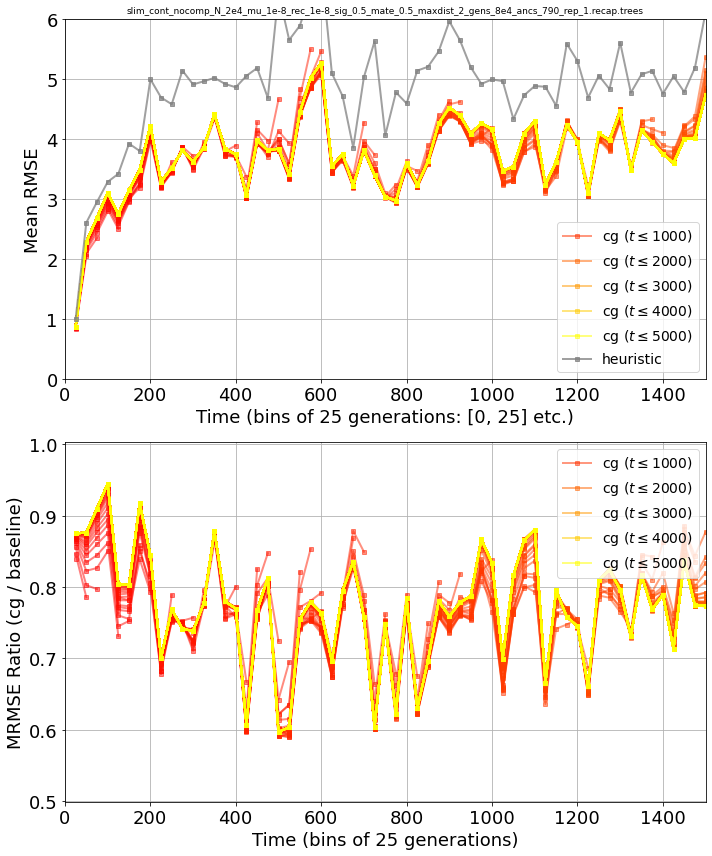

In [6]:
f, (ax0, ax2) = pyplot.subplots(2, 1, figsize=(10, 12))
time_cutoffs = np.linspace(0.0, 5000.0, int((5000.0 / 25.0)) + 1)[1:]

colors = pyplot.cm.autumn(np.linspace(0, 1, len(time_cutoffs)))

ax0.set_xlabel("Time (bins of 25 generations: [0, 25] etc.)", fontsize=18)
ax0.set_ylabel("Mean RMSE", fontsize=18)
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.set_title("slim_cont_nocomp_N_2e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8e4_ancs_790_rep_1.recap.trees",
              fontsize=9)

for cg, cutoff, color in zip(cg_results, time_cutoffs, colors):
    label = None if int(cutoff) % 1000 != 0 else 'cg ($t \\leq {}$)'.format(int(cutoff))
    ax0.plot(np.arange(1, len(cg)+1) * 25, cg, alpha=0.5, color=color, lw=2, marker='s', markersize=4, 
            label=label)

ax0.plot(np.arange(1, len(heuristic_result)+1) * 25, heuristic_result, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax0.grid()
ax0.set_xlim(0, 1500)
ax0.set_ylim(0, 6)
ax0.legend(fontsize=14, loc='lower right')

ax2.set_xlabel("Time (bins of 25 generations)", fontsize=18)
ax2.set_ylabel("MRMSE Ratio (cg / baseline)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
for cg, cutoff, color in zip(cg_results, time_cutoffs, colors):
    ratio = np.array(cg) 
    ratio /= np.array(heuristic_result)[:ratio.shape[0]]
    label = None if int(cutoff) % 1000 != 0 else 'cg ($t \\leq {}$)'.format(int(cutoff))
    ax2.plot(np.arange(1, len(ratio)+1) * 25, 
             ratio, color=color, lw=2, marker='s', alpha=0.5, markersize=4,
             label=label)

ax2.legend(fontsize=14, loc='upper right')
ax2.grid()
ax2.set_xlim(0, 1500)

pyplot.tight_layout()
#pyplot.savefig('cg_790_ancients_spatial_stats.pdf')

In [20]:
heuristic_result = [0.677878396682859, 1.2047457291232182, 1.4131379303818492, 1.7697947421197395, 1.969590351920408, 2.2319097525046248, 2.736957233889831, 2.6647449657000846, 3.08369903127112, 2.5357159745923776, 2.777036573899024, 2.99287814952764, 2.8505253538604345, 2.978891511749067, 3.3374220301704987, 3.1289766796509553, 3.0751847440737285, 3.6788058065718747, 3.5174948795700662, 3.094800556692589, 3.4220703706539193, 3.7162216796423544, 3.1874182411944405, 3.4265390207656004, 3.276346265727711, 3.735703068273833, 3.6654281907546924, 3.83127427199613, 4.1060261225348045, 4.382590281576186, 3.67257928751359, 3.3400621799112766, 3.7271827050686825, 3.7836851846679025, 4.930695621161975, 5.6214178708755425, 4.731118482762288, 4.332798882810295, 5.773007475559437, 4.433036615558243]
cg_results = [[0.6173056469613866], [0.6166036826055625, 0.9824577788092762], [0.61871750716642, 0.9567420289412194, 1.1542461868717482], [0.6203499420620764, 0.9551241264639343, 1.144108128244751, 1.3789404382079817], [0.6220457633524434, 0.960457403248127, 1.148956985688811, 1.349294166445625, 1.5365694227283875], [0.6226508835401124, 0.9650761435296922, 1.1527585161288656, 1.3473381031017382, 1.500536592771018, 1.7687524015975042], [0.6229918000347083, 0.9679200532516626, 1.158468991733282, 1.3557641714356772, 1.5114312830170498, 1.7684826312663993, 2.16366618976978], [0.6236134725893759, 0.9694113053411743, 1.16373847258518, 1.3595910922638863, 1.5119029608008283, 1.7783203798715437, 2.0905489146679037, 2.1252793752236268], [0.6241357831522489, 0.9707754657348986, 1.1682317963662034, 1.362188211278245, 1.5163104349840744, 1.800136313820932, 2.072992545888465, 2.1031297059376945, 2.349903993530007], [0.6245039631276691, 0.9729023092510196, 1.1695987967749712, 1.366010802769123, 1.519277234991166, 1.8113133716865504, 2.055400737954616, 2.1357226607049355, 2.370537404630202, 2.0218385223607522], [0.6251463078203706, 0.9749559547612809, 1.1747460485351884, 1.37641526040428, 1.5282181066179685, 1.8132375502283316, 2.052968217122821, 2.1675960681434328, 2.3471696262974624, 2.0277799987708285, 2.288162252537299], [0.6255134819172424, 0.977001055634322, 1.1780761435409954, 1.3858593259727092, 1.5364707628176228, 1.8279782050522604, 2.064139364778815, 2.1918276111708974, 2.351026041381532, 2.052111797113507, 2.297073135409969, 2.4782482288162773], [0.625823010843846, 0.9784654773775613, 1.1822987025711593, 1.3949153458941883, 1.5467410710627867, 1.8350566828033272, 2.0919632053262407, 2.200079612559742, 2.3460254208026714, 2.047246647081244, 2.2980412840672404, 2.4900663668270293, 2.3251176429479057], [0.6258492489822144, 0.9793674389899731, 1.1849772715755478, 1.3980981747692667, 1.5528152871042622, 1.8382191513883352, 2.1148651271549506, 2.209172899536776, 2.350956121657862, 2.0611881241688628, 2.2867623017437473, 2.4907215552588213, 2.2755703257976374, 2.289968010757012], [0.626113189742486, 0.9808069142292104, 1.190667538404646, 1.4037904824758927, 1.555993959572697, 1.8472090821805165, 2.1230267589423417, 2.203661378569834, 2.3559600948008166, 2.0845094187968893, 2.3146010481088024, 2.518058983969298, 2.2446745183325456, 2.160428652574219, 2.5388230212516367], [0.626437172682529, 0.9826724792505874, 1.1941275617411353, 1.4107472546409319, 1.5641586280635709, 1.8609539716937753, 2.130047595861297, 2.2157163563870634, 2.3641053854721292, 2.1027668356753186, 2.33459664087418, 2.5601245975888207, 2.2638433087712064, 2.203853057322093, 2.50060438497001, 2.62853897109116], [0.6267265772304391, 0.9848148740449512, 1.1978861216316499, 1.4165708038809046, 1.5739914477477845, 1.8724314651956016, 2.1438017768264324, 2.2370528253247817, 2.380865590801774, 2.1231675880945695, 2.342291670164632, 2.5756823802284945, 2.2941253926417855, 2.266116845014019, 2.5566722844217673, 2.677175006920441, 2.750222695332837], [0.6268804500123623, 0.9858044978621632, 1.199766892528538, 1.4204813208363456, 1.5757294560053736, 1.8825768684689634, 2.148772912544914, 2.24520681767309, 2.38035013827635, 2.125058741163319, 2.3596129465206372, 2.5661987422414865, 2.3112214006215686, 2.300975483370172, 2.599218055366555, 2.7332286160436707, 2.6779323664857766, 2.9163403485428443], [0.6270929731401583, 0.9865777223324518, 1.2018152747385775, 1.4240473277171504, 1.5781177837245084, 1.8898665849449876, 2.152897988400316, 2.2611866476574365, 2.3915932909699986, 2.137964632335401, 2.3644756171047967, 2.5780553939065842, 2.320522490075268, 2.3075997392700294, 2.5917539506195606, 2.749603457812977, 2.7442072655956715, 2.8984886494231055, 2.8047424580131217], [0.6271609519368045, 0.9874453030150793, 1.2031133285168425, 1.425807008962872, 1.5786775596483689, 1.8964940112772735, 2.1622396938915442, 2.2691475833191124, 2.4074328764972384, 2.1453671426334386, 2.374343343038028, 2.586121863948184, 2.3244044175138097, 2.3372506384658576, 2.6147529789565778, 2.749045516555557, 2.7951218221971383, 2.8865897835874654, 2.799414354846787, 2.7640518628391098], [0.6272352565144965, 0.987457765117196, 1.2047833997443391, 1.4276590732214862, 1.5792842681569725, 1.9005435893846647, 2.160289252504977, 2.2720845790314868, 2.4150584684912655, 2.157608765993589, 2.3951581330536382, 2.5919754632771097, 2.3183637463341458, 2.3615560904551267, 2.635071555302261, 2.777880150675754, 2.8100249910804194, 2.8817353835746293, 2.831006955227024, 2.8300692594456405, 2.171244490986669], [0.6273729933228386, 0.9884958517927938, 1.2083280751829288, 1.4343324011163177, 1.5856773491852667, 1.9104637036156633, 2.1689525679960355, 2.2813060185477227, 2.420051557698772, 2.1746718159836043, 2.409283456509591, 2.5988498997764684, 2.3348136763184444, 2.377580640616791, 2.6517313457523874, 2.7945637145002156, 2.7900466289892947, 2.866693302704421, 2.7874910291375885, 2.8540007208568716, 2.1787502181937244, 2.414876201793619], [0.6274396098532611, 0.9890222782743987, 1.2108005916513427, 1.4374642301785776, 1.5851433901347878, 1.9165981340481055, 2.175244562332468, 2.2844669648876197, 2.422264991983251, 2.1827174330706653, 2.419992699738373, 2.6106048539834243, 2.3612073700902383, 2.3913501492773657, 2.657752152636934, 2.8072604883498298, 2.8086092299159042, 2.8667947590534695, 2.803072955880706, 2.8637799101875823, 2.190971120225788, 2.4417122267317244, 2.6437206593710494], [0.6275755370742429, 0.9893496449827487, 1.2129756746062312, 1.4393520707059082, 1.5874315798632719, 1.9246014169265717, 2.1787718061536094, 2.2923587253340783, 2.4308563783514607, 2.194094428704233, 2.4318559969324887, 2.62096484173844, 2.361698158125556, 2.396969301117165, 2.674064685556068, 2.8158841842134117, 2.8479040624461316, 2.8104929173105013, 2.8151517422337267, 2.8529757199071764, 2.248671152058542, 2.470013657347225, 2.4370542280955747, 2.7658224887048624], [0.6275998596115108, 0.9896177507472126, 1.213249124296987, 1.4403077670322606, 1.5885903021024865, 1.9274739375057055, 2.1803337529173827, 2.294024429369139, 2.4324279412778576, 2.204948370535919, 2.4394010084693183, 2.6222310316755717, 2.3534472422395454, 2.4003069393097705, 2.6822838114243956, 2.82519435555307, 2.873257358679284, 2.836579456529511, 2.782031760952026, 2.8589190629594663, 2.2685318168480135, 2.500412555800478, 2.484725713613448, 2.704516334397933, 2.478807298033578], [0.6276791967283807, 0.9901936862935922, 1.2150733405909497, 1.444245584183399, 1.5914834429430502, 1.9312288216363085, 2.1869437573541366, 2.3021623571367793, 2.4364567644426818, 2.211471976186724, 2.4506210842675458, 2.6222160100319476, 2.3616028026977007, 2.412748792368573, 2.688173613600993, 2.83696464626268, 2.8735319646243838, 2.85591406057493, 2.768763814951518, 2.863798727854536, 2.276217406470239, 2.5317276646721734, 2.5030276094853487, 2.640667803466671, 2.481931807786032, 2.6304382302778833], [0.6277854597034477, 0.9907993623342598, 1.2178741015347974, 1.447933082088608, 1.5955441716061018, 1.93718968284784, 2.2001793613445373, 2.310686566963666, 2.442962712583074, 2.224090166421181, 2.457805118980458, 2.6347141523845266, 2.3677635062303, 2.435676987195784, 2.7077621156413625, 2.8338383314656896, 2.9103413065696717, 2.887258324658243, 2.763618110627447, 2.902174243291669, 2.3160191276208697, 2.573366129992236, 2.522428638021907, 2.661235424430672, 2.554186518977379, 2.6836280505578194, 2.813174340104471], [0.6278327883404938, 0.9910917850966552, 1.2191282631279428, 1.449281332071875, 1.5971647852066533, 1.9402026109122743, 2.2033095792970254, 2.3124064924029573, 2.446773025353274, 2.2282997668866042, 2.4685434030987627, 2.641665679281683, 2.3739793808517824, 2.4412402783522444, 2.7223449270328284, 2.8389380183673083, 2.916747442177867, 2.9065803029040773, 2.7649355203294066, 2.9029234541421203, 2.3125573603048846, 2.59052267882925, 2.5270854372897253, 2.6447346588204965, 2.556285669566697, 2.6197911110798096, 2.8312124293595295, 2.4979505928905508], [0.6278705800542227, 0.9913667352504615, 1.2199714130283086, 1.4509584899369716, 1.59810244439127, 1.9435744796458523, 2.206514594673869, 2.3170207669265555, 2.450793324187208, 2.2324615328246886, 2.4758820258318535, 2.6444134521926723, 2.381335021011743, 2.4467936192583277, 2.733192813482229, 2.84576835467393, 2.9140605513876245, 2.9085138808351547, 2.7706634698538, 2.932015107534143, 2.306659335241996, 2.6076860512609215, 2.5393349045890683, 2.6249327301946095, 2.518534160057066, 2.613113569433872, 2.8363485559316723, 2.4711730794216646, 3.2558712317895], [0.6279052377860036, 0.9915748332370744, 1.2206627708652829, 1.4524381913915814, 1.59917695353577, 1.9459116256951885, 2.211595475730559, 2.323384860289835, 2.4541937226973523, 2.236266075526225, 2.488652754368629, 2.655157362533448, 2.3936788224058736, 2.451502762083179, 2.736696323099799, 2.853289886124111, 2.9210131458904764, 2.921215822545635, 2.7876986178009164, 2.9262246327388066, 2.3219183856790457, 2.6298544925827834, 2.5671903503451925, 2.6388255002473797, 2.502834978951266, 2.6074609772027464, 2.86430358282391, 2.492732579278964, 3.2787716392170303, 3.460885399655731], [0.6279649171524908, 0.9919441543373863, 1.2214244960686345, 1.4546904599117634, 1.6000317042567138, 1.948010669225161, 2.214305243327807, 2.3283004703652583, 2.4543101738337323, 2.2406220363392575, 2.490014203198312, 2.6507432221362817, 2.3978362458399367, 2.456398726239244, 2.733735649367197, 2.8575334099299146, 2.9156713163706764, 2.948297565675548, 2.7791153333202017, 2.933517092495474, 2.3155439181510746, 2.6284210006429114, 2.5613497593681323, 2.63010139340097, 2.5061258682034504, 2.6191625774265574, 2.864903319413655, 2.517978752719611, 3.1972678073647263, 3.455297445003804, 3.0852020871289976], [0.6280148621800518, 0.9923687846739742, 1.222307460328927, 1.4556754836904948, 1.6031153163385146, 1.9507542013941963, 2.216843896389768, 2.3346856809047942, 2.4566531622857743, 2.242668137454151, 2.4929771674943533, 2.6482944875500167, 2.4107209252624626, 2.4698318506675156, 2.7472084581527176, 2.8771041478262873, 2.9589375119727186, 2.9558197225358973, 2.7780856814992685, 2.952546823407033, 2.3446641696388606, 2.6668324085969304, 2.564103872074193, 2.6262970129278385, 2.532240638179408, 2.6198892795046262, 2.8435628511171034, 2.480509818066211, 3.24244382737757, 3.481309387296064, 2.9619734460452265, 2.8127178869381764], [0.628070617555947, 0.992677515364424, 1.223066589776346, 1.4578244648125858, 1.6053626339187927, 1.9548076065988778, 2.222830812416477, 2.338327974509339, 2.461793733140621, 2.2451806438359907, 2.5021711742221453, 2.6536092727127243, 2.4165500546793948, 2.4733612050775426, 2.7557845525057822, 2.88478656364127, 2.967162725530867, 2.950127489550781, 2.784607672224212, 2.9591776244777526, 2.3754391054567234, 2.6975651079018568, 2.5972679282480935, 2.6592837791625707, 2.516081211805715, 2.6127722138618115, 2.8373574138784208, 2.4816988305800147, 3.2756420751696758, 3.5232600555080054, 3.116519126115443, 2.7717873577266334, 3.4068999485037716], [0.6281233401327508, 0.9932501849971017, 1.224140202836769, 1.4600535263855954, 1.6075429527864495, 1.9596995543169937, 2.225899905862006, 2.3439082131776225, 2.4672546747076365, 2.2579800204586835, 2.510658685736394, 2.653882264626387, 2.424424231952855, 2.488306890146893, 2.7727348434722474, 2.904920232715787, 2.949733153789385, 2.96274993167363, 2.784277697062673, 2.9598101145040596, 2.391304976352521, 2.7174850976802936, 2.6478647869774954, 2.655196423635721, 2.541095032069958, 2.620570424430445, 2.8392438959512423, 2.4804733092333815, 3.3177294908885164, 3.5221455929132492, 3.088059636347444, 2.741024363318613, 3.22172382629219, 3.1940464469745717], [0.6281824381590629, 0.9935772650060434, 1.2248798257029334, 1.4614395971942258, 1.6079458251202379, 1.9613479285103386, 2.2298085943523414, 2.3450247739601577, 2.470799496951441, 2.254875386059113, 2.5112940360628926, 2.661933370639697, 2.4272699066487817, 2.4911922052336615, 2.7818066266632457, 2.907918663620117, 2.9489566032394285, 2.969272753984887, 2.7934718650186334, 2.9565489762863475, 2.3933902157092533, 2.723498911219624, 2.6108417175030323, 2.6507308169632324, 2.540639396871675, 2.6271025962418264, 2.8559384242663324, 2.4639895694716887, 3.3322614961698473, 3.477374060321177, 3.151683238499391, 2.730949211799185, 3.252668004247653, 3.2534624698171095, 4.352581724131806], [0.6281990114947037, 0.9936635266057473, 1.2254124960676258, 1.4624622914196057, 1.6083741727781862, 1.9623994403443885, 2.230913956752993, 2.3462996064622086, 2.4723982086423923, 2.261180057138212, 2.514819324940119, 2.661245890051251, 2.426894908765316, 2.4969672612330993, 2.784765881835788, 2.9106818049740006, 2.9493836120928427, 2.9699054795762247, 2.799730509688151, 2.9570838860956328, 2.391181401976319, 2.730660795638694, 2.607731020210795, 2.6463843427858205, 2.5626111005662513, 2.6112464008888048, 2.8541266324050567, 2.46248246512483, 3.3155028652950613, 3.479848971678424, 3.1475212387153033, 2.7290400231857306, 3.238594412326042, 3.2398038304715415, 4.098881943635216, 3.9701651668336164], [0.6282221542857523, 0.9938274878453189, 1.2257174673987679, 1.462878038955665, 1.6097805887310181, 1.962303361892073, 2.231889291872675, 2.3475808106611082, 2.4742262817063656, 2.263236818082596, 2.5163658772932793, 2.668581876113562, 2.433312456166443, 2.501039105965569, 2.7926513440760017, 2.9089498081899707, 2.952058302531848, 2.9760242944108213, 2.7951905565231256, 2.9614688436902483, 2.396363733398812, 2.744231264311909, 2.6190975362518647, 2.639471392391614, 2.566121804343298, 2.5986666139204964, 2.8507195535760346, 2.44634554377634, 3.3487580684692455, 3.5092250616308216, 3.1499254208214262, 2.741858087185978, 3.1677643333692136, 3.3055445400729666, 4.1973699652361365, 3.946068785822455, 4.528590028646663], [0.6282761726236212, 0.9941317829552688, 1.22682589695897, 1.464295408358787, 1.6112786069669338, 1.9668787822472071, 2.2390492380022544, 2.353196627011371, 2.4797940870151423, 2.2711798404341392, 2.526602966759874, 2.6773465181731493, 2.4358856289075375, 2.512197231633332, 2.799809466330627, 2.9275097747762313, 2.9620585579074277, 2.984662922237335, 2.7971130368566035, 2.96552971637373, 2.418936808922, 2.76222974379638, 2.646866674840201, 2.6425808171835636, 2.5753716404754234, 2.6063273724523737, 2.8644499454996226, 2.4404006821393134, 3.36728540791645, 3.553864466568829, 3.186193619997625, 2.68122938043515, 3.2426617515470335, 3.2945697979728417, 4.222099392633861, 3.926345433250861, 4.3154490169659425, 3.6444487340641225], [0.6283218819055103, 0.9943551091041062, 1.2274539914959812, 1.4654881403959283, 1.6123535187366933, 1.9697879810753918, 2.2424777107923592, 2.3548885610206027, 2.4830081531079062, 2.272940624133687, 2.530512970842738, 2.676074073487044, 2.4336440035850666, 2.511713817329292, 2.8013974866595723, 2.9324878115072828, 2.9601115207709072, 2.9880177936789543, 2.801045101547305, 2.9601507831793734, 2.389054706137225, 2.780426201768989, 2.6418115348690203, 2.618413494567361, 2.609585312936072, 2.6160678799808386, 2.880141636428547, 2.42474511489272, 3.3580139383563306, 3.546974971356243, 3.157448887346131, 2.6638012789073557, 3.191809564104232, 3.278454381696621, 3.817546053629263, 3.760714638928329, 4.2568729082923396, 3.441873927152776, 4.598872659920844], [0.628353038025944, 0.9946811898356291, 1.2283228579757177, 1.4667744035105568, 1.6132482692313441, 1.9718710337353709, 2.245094627013616, 2.3601169585493613, 2.4864069584876463, 2.2744173293167083, 2.5363079898781353, 2.6808796421752072, 2.4405236917467374, 2.522946663608799, 2.808625296708761, 2.9447517773132454, 2.9756588304367537, 2.993349146313182, 2.8060521164270416, 2.981556177417297, 2.390767478354919, 2.78270627611147, 2.6380110641805614, 2.629214795531126, 2.6205074852723977, 2.6680378072758772, 2.918785551342034, 2.4107515648801074, 3.396070165849496, 3.5490446210821647, 3.1773340732534194, 2.6778592710899374, 3.1964075083547008, 3.304864084533759, 3.8217190643613757, 3.7402225346565814, 4.2766726456319555, 3.446321704611031, 4.607048560375489, 3.460734945392453]]

In [21]:
cg_results_sever = [[0.6363353295734789], [0.6119675048285548, 1.0434507230139543], [0.6119917879191662, 0.9694319224237037, 1.2251023438587305], [0.6137186573182696, 0.9538745550510384, 1.141582369456701, 1.5523554776340804], [0.6163170031801413, 0.9482393217517605, 1.122624117698426, 1.3892199389082132, 1.708366697117101], [0.6183172120547585, 0.9518132957688586, 1.1165936766856972, 1.3365379021197534, 1.5806033442410719, 1.9363444117769133], [0.6187254521984419, 0.9512947286872561, 1.1241473607107733, 1.3156303823740159, 1.5417212809269372, 1.8829265967877424, 2.4226464428021868], [0.6197840771010975, 0.9502012421865279, 1.129681963898649, 1.3162028036456173, 1.5205880621517789, 1.824793009351682, 2.2796082748441497, 2.3626433334686587], [0.6205782077238529, 0.9533778281059248, 1.1402527462067276, 1.3169490170421665, 1.5128873291023086, 1.760480022530727, 2.175716344741585, 2.1818515386571056, 2.7739564779799153], [0.6210129085548292, 0.9558751981139618, 1.1402721280769208, 1.325598873899014, 1.5041720859867878, 1.734060563803717, 2.118018905034288, 2.100943543055005, 2.561067988719709, 2.1278841961335266], [0.6217816279417843, 0.9592351074758472, 1.1423009504090569, 1.3360114478868137, 1.5072363049343638, 1.7186027942783921, 2.0568037853231753, 2.0557975662907464, 2.464513861664892, 2.0396182498367907, 2.3832102090145346], [0.622095045871596, 0.9606436321502767, 1.1447055109434048, 1.340574010270333, 1.4952011281687028, 1.710983201009067, 2.034447309456718, 2.0287492504518343, 2.3856720772827678, 2.014681622937466, 2.3203343012992477, 2.6126877281609775], [0.6227210301654776, 0.9625176092469544, 1.1443869383873506, 1.3420632726992123, 1.502690688886744, 1.7298518259734048, 2.0225368056660957, 2.0449464852813173, 2.3711997503050877, 1.9948941772019337, 2.290305238994635, 2.5329359409589354, 2.633317960143066], [0.6232271123358829, 0.9646043704496837, 1.1492976776254817, 1.350476803858459, 1.4964081936554283, 1.7441047718018434, 2.0237639775220835, 2.037956745697045, 2.379189355123602, 1.9925551135354191, 2.250033880409824, 2.454864302442288, 2.4757198556923825, 2.6481401425060587], [0.6236329728745872, 0.966322693138805, 1.14951071307056, 1.35453110265429, 1.509255608067402, 1.7569646218823778, 2.0272893182729605, 2.0379811647811836, 2.369452340660865, 2.031220291872514, 2.2176573788206535, 2.399661731733247, 2.4056278290479556, 2.5259133003940373, 2.7702454597914836], [0.6241504500285413, 0.9692214295156442, 1.1578293149381933, 1.3641526201339305, 1.5176401292665092, 1.7760942521651224, 2.036380012641624, 2.057422616664125, 2.351430287079531, 2.0329619251178075, 2.198942535913192, 2.3770899254259255, 2.363941793078675, 2.3795594018364854, 2.6137270827345676, 2.8410528043368335], [0.6246495818206337, 0.971984351169278, 1.1675373345475075, 1.3708670219525192, 1.5288100540964202, 1.7875547242143983, 2.0469265550981643, 2.1120770914244713, 2.3440970919062636, 2.003678671333526, 2.1967216774527794, 2.3994240666279474, 2.372801111346298, 2.400359746337565, 2.506215360392964, 2.7789344548972053, 2.758554930195586], [0.6248868619260225, 0.9740257450867902, 1.1695573129806196, 1.379840438631585, 1.5335611078905023, 1.8007110719604869, 2.053292073917964, 2.1339331990917403, 2.3351520017644827, 2.010783585799701, 2.228399926498612, 2.428357828332806, 2.3643384723022924, 2.3195459753309695, 2.497006170242521, 2.7444799074650237, 2.7737247707447312, 3.079544278428596], [0.6252673448503301, 0.9757206690188612, 1.1726378782432723, 1.3863525354083543, 1.5362033871765606, 1.7983620129779534, 2.0569319313001246, 2.141074104535279, 2.3354996124901684, 2.0033482653246706, 2.2122349848845717, 2.4243371998032175, 2.322477014319529, 2.306006575534025, 2.4813591307255836, 2.7074459644233255, 2.649531258511024, 3.0037516290271493, 2.9214933974138972], [0.6254946713022774, 0.9770489809049406, 1.1749024889438957, 1.3919719805137716, 1.5453077092999081, 1.8089757777020605, 2.0634708338963543, 2.1546187036710682, 2.3229102000639297, 2.014390994196836, 2.213540449036738, 2.4679840497003265, 2.2746212381530375, 2.301457625451622, 2.5217759344932813, 2.730718052205389, 2.6586471973345067, 3.0238240961231977, 2.8342161121612737, 2.6176679241489023], [0.6257290327106855, 0.9776769586457862, 1.1764763417546107, 1.3928865176775895, 1.5510438514191627, 1.8217878203897115, 2.073203715208799, 2.170952557098595, 2.325431674540265, 2.05770058630943, 2.2543479019725083, 2.4948801264629115, 2.2692279132546997, 2.325152750993538, 2.5348926843412425, 2.752105095615074, 2.681981954498289, 3.0063542896309663, 2.853969904993628, 2.5778090213722082, 2.3895338989105195], [0.6259740231946777, 0.9797023569550994, 1.180878710957895, 1.397295796516008, 1.5526059510694448, 1.8295602579016579, 2.0758647660961267, 2.178673956860174, 2.3267107472194706, 2.0516184415736394, 2.2716915717337134, 2.485192113857399, 2.270176311291321, 2.31642615467238, 2.5152887700086564, 2.704436948067126, 2.668411250568457, 2.912840862264775, 2.857937624617365, 2.5731965780566215, 2.268731908644343, 2.8112537059057945], [0.6261996772119768, 0.9806470318917837, 1.1837673520222043, 1.4009945381523987, 1.5565697753723005, 1.8372306504604783, 2.079944262845732, 2.1898827403194994, 2.3330110597753966, 2.060901982653962, 2.29075186421443, 2.497571808189792, 2.296498262051172, 2.3398131679109104, 2.519426495701366, 2.7097100192657613, 2.6572522372721257, 2.889445250141531, 2.81769676431128, 2.6069183869895114, 2.143176493287335, 2.7376708391021967, 2.4534582774652427], [0.6264693502944141, 0.9809884681690236, 1.1857570933788606, 1.4039702816270578, 1.561537750158865, 1.8536097588229312, 2.0886758910828194, 2.2053478361408687, 2.3309339669536837, 2.084921247768373, 2.3055513535831844, 2.5204368193869655, 2.2777571092202678, 2.3095791348787085, 2.504777933309299, 2.680404685984747, 2.688152979068969, 2.8374395683923606, 2.739170329485947, 2.57624032248847, 2.0196240060976214, 2.4703720754194682, 2.247081297863896, 2.8307334516302087], [0.6265624640473587, 0.9815314132045911, 1.187136189774399, 1.4056426247864513, 1.5629318708606597, 1.859635182596209, 2.096553554734005, 2.2086982403914237, 2.3431719014761327, 2.09535124298436, 2.3177959079994688, 2.522059465626857, 2.233733331087976, 2.2959633413237643, 2.504067407182913, 2.64338944799598, 2.691341224555725, 2.811980938004248, 2.6603428009330865, 2.576151567758359, 2.0013145602051483, 2.461932932584519, 2.25296967715514, 2.743585958484035, 2.7344391521516482], [0.6266781707752705, 0.9816861811556411, 1.1898044626042532, 1.4082908239419716, 1.5643271446224758, 1.8670349490874323, 2.104025503833313, 2.2179098979898537, 2.343815066811411, 2.1152455532135277, 2.3206604169162883, 2.535181176244436, 2.2169005336969474, 2.2769341075533585, 2.4830732450687893, 2.626226074326683, 2.6540922411881103, 2.798432559249435, 2.6474274288743653, 2.57199274866475, 2.0255883931305507, 2.430421350276854, 2.2719866512206877, 2.742259161912492, 2.6647735016874456, 2.6919510513591867], [0.6267653667855287, 0.9825031297111069, 1.191743260705587, 1.411441341496802, 1.5644311116359373, 1.8757964410562533, 2.1188874958562804, 2.2330421392394557, 2.3568168945397567, 2.126917698779245, 2.3340293740768474, 2.563479779264741, 2.2121256259480795, 2.2662146095034945, 2.5033504338273667, 2.60546849266094, 2.683757836196133, 2.834674865492801, 2.662824586275255, 2.6018154377822813, 2.0196968007053466, 2.421955484192285, 2.2978123679818183, 2.70358529078483, 2.4297940820338053, 2.5707376249744995, 3.221123892913801], [0.6268443055936933, 0.9827657874223391, 1.1928079486844414, 1.4129478694455346, 1.5656850060740477, 1.8793350387348056, 2.121689527127507, 2.23819016214931, 2.359167012079779, 2.137093834383828, 2.3544814313241256, 2.5807678165905807, 2.2177034986876563, 2.2592740588353433, 2.5127114178712047, 2.623110527177872, 2.6886748559633538, 2.8144367108185784, 2.6815564822045688, 2.5946060139878564, 2.0206713388454722, 2.4155481499897746, 2.2917106966931446, 2.7019459651678583, 2.4174603334061153, 2.5495241647127376, 3.1449509356249186, 3.341764440910971], [0.6268455771474662, 0.9832913302543544, 1.1944551378833834, 1.4152474672895283, 1.5677742830021342, 1.8849235313847859, 2.1313194372408923, 2.246784497010959, 2.3703309943343505, 2.1316954615270243, 2.362652018587571, 2.5911651279561076, 2.2261059550786393, 2.2726292963549617, 2.5205718554367422, 2.6411980369273156, 2.6994313503208947, 2.82296381694815, 2.6546158173941503, 2.6138253608402677, 2.038067012099359, 2.4236913236027515, 2.304588495390004, 2.709960898811746, 2.4694060930068167, 2.5677754733458773, 3.0627501580899303, 3.2403552572925256, 3.719501847599768], [0.62689394747318, 0.9835660049672148, 1.195465211666368, 1.4174150991796193, 1.5694015498570137, 1.8893089470441822, 2.1382215000746987, 2.254109056316276, 2.3743573958030093, 2.1357473811678003, 2.374038269332386, 2.6032529223083256, 2.23772502188827, 2.276265141504049, 2.528499476039235, 2.6532820926147966, 2.711741718859787, 2.8112955276548277, 2.6514856721111357, 2.662886925718248, 2.0349543121301603, 2.424812347926072, 2.3089201997659474, 2.6994724477365706, 2.4496527150822875, 2.5697262028975896, 2.981364317601356, 3.021323317757962, 3.642059119359928, 4.12390727403458], [0.6269273270772785, 0.9839649234241442, 1.1970347013179592, 1.419752909772503, 1.5692861661749613, 1.8914400328232763, 2.1395313249662404, 2.2485833674513316, 2.3741594257434553, 2.1400802503711085, 2.374757367260735, 2.6073426699202, 2.24480540867103, 2.288709995145993, 2.527423323940407, 2.662953178338747, 2.7033809208977773, 2.807184893250811, 2.660887151850471, 2.6392177979078877, 1.9814488227440283, 2.4389185969303946, 2.3149202102464206, 2.6383318006055525, 2.4450834721478634, 2.6029719676332697, 2.9669544596320123, 3.001218624169867, 3.58063068431566, 3.923992187597951, 3.120343751034678], [0.6270098364466863, 0.984741743757993, 1.1982510268345274, 1.4220630033685215, 1.5736524648492478, 1.8948822103342429, 2.14546045721206, 2.254477929903435, 2.383089812836767, 2.1465057516617922, 2.375639583997033, 2.608299779631177, 2.2540717856638364, 2.311122190535622, 2.550360059523403, 2.6816640210982516, 2.72078095355757, 2.808819290793766, 2.7063602633701933, 2.6337103969624662, 2.041937444661914, 2.4672355709586267, 2.2917566464127446, 2.638184921493041, 2.374112750608805, 2.7951489348184073, 2.9213435261381036, 2.9309944096756224, 3.511035823299632, 3.7769054755901124, 3.0713201061776623, 2.8969045612645723], [0.6270710932175722, 0.9856869315831075, 1.2009328768850196, 1.4296108377284635, 1.577825988564347, 1.9024489955688149, 2.15546844071417, 2.261080716357381, 2.3939479105309975, 2.1540490948225317, 2.391096756254362, 2.609684998392455, 2.26602436884768, 2.332073575587432, 2.5691038588532793, 2.7136778569197144, 2.7397080587899656, 2.821324143990252, 2.691276666506781, 2.6683826971582234, 2.2025468460310655, 2.5126237456352443, 2.3164931181619473, 2.5928856793208235, 2.346072652732645, 2.682663464584486, 2.884533276323147, 2.7452215917142753, 3.471465709672958, 3.7385396912537967, 3.0002748464207523, 2.821077405858488, 3.5739186572093993], [0.6271952731604825, 0.9866656392160291, 1.2033444568553693, 1.432556822756977, 1.5823055487843498, 1.9094820382384083, 2.1641319427372663, 2.2695250256040906, 2.396102808352839, 2.161443946644927, 2.407697606976487, 2.612602664039018, 2.2763186787592566, 2.3392868903240633, 2.589328526020091, 2.727426146321542, 2.751140335841583, 2.835924950311602, 2.7009611899625257, 2.7371472464836737, 2.217112536650787, 2.491966437902519, 2.360156741137342, 2.5748390389409117, 2.3937302085510637, 2.6642599532000304, 2.911403303263963, 2.4319460140206566, 3.52768712314788, 3.6909744530052704, 2.9943231560749495, 2.7630151368588627, 3.4478580646623236, 3.303974672384572], [0.6272845075102848, 0.9871669389931282, 1.205337738475844, 1.4347907649414082, 1.58649320175244, 1.911369557775093, 2.1700144575294824, 2.2737580904641983, 2.3985847327274077, 2.166240237816572, 2.407072276627322, 2.622172375000062, 2.2951951389938414, 2.33707881691432, 2.5892236461234517, 2.7475279832473394, 2.758025147476024, 2.841339145121793, 2.711237305249495, 2.7526390080826832, 2.231206776945063, 2.5190065635724754, 2.389511506083788, 2.586143139084288, 2.4089825609899083, 2.664285286304402, 2.9075840998118827, 2.426049802378182, 3.532476541253256, 3.5121675285835714, 2.979487511046394, 2.772371484218742, 3.472641093804807, 3.2529687983841638, 4.4745051414381996], [0.6272802707035139, 0.9872870449601715, 1.2062134026241043, 1.435775965730446, 1.5868867524766732, 1.9133197042988794, 2.17425124963475, 2.275046635985318, 2.400304857940771, 2.1741580954381865, 2.4078577956615015, 2.624134995152713, 2.2966274919886622, 2.341851247213534, 2.5910364167249447, 2.7433476639929073, 2.7666184306792996, 2.8446223841748215, 2.723242285062954, 2.754780841168299, 2.2359544231478328, 2.5272578054451267, 2.3919816953286435, 2.5855908953436764, 2.4263449882918833, 2.7133122313620626, 2.908612336587499, 2.4224069584625463, 3.5674756898508235, 3.5132456558102914, 2.9843192024824496, 2.7786370591498786, 3.481584433305857, 3.2570959411948786, 4.455914247069042, 4.756910702673766], [0.6273411420045053, 0.9877362863821333, 1.2071239926408002, 1.438127490118899, 1.5892106272740805, 1.919689859449673, 2.180480753259128, 2.280802725058826, 2.4083596569729635, 2.184029354128309, 2.4201615774317284, 2.6253138568697696, 2.303389755750899, 2.364024104431989, 2.6261103083502095, 2.7492973986703064, 2.7806513590972632, 2.8605679625110163, 2.7541967759705424, 2.763035497111282, 2.2530476584755625, 2.5572438768573784, 2.410990846679886, 2.577569610689045, 2.4346536384562207, 2.7022590854499153, 2.882786043548796, 2.4331577856712427, 3.5634268512574527, 3.4722362289359685, 2.9810683548163524, 2.751559434417061, 3.361052663500204, 3.1439113604197275, 4.42704100915586, 4.645618577273469, 4.168770081041777], [0.627391303034857, 0.9884629929684279, 1.2081548614795967, 1.4397521134446605, 1.591640571523916, 1.9234261918485178, 2.1852317106202834, 2.2869238591520578, 2.409929345658676, 2.1877462699405394, 2.4263239142853137, 2.6305781998755915, 2.303953793587594, 2.375636343777632, 2.6374728847633824, 2.7630347197297733, 2.7944443187930426, 2.8772177602043563, 2.755948757414568, 2.7650497048409597, 2.2848041501933873, 2.5469024573020542, 2.431816131027589, 2.5810324793430457, 2.4216586673853557, 2.7060385448179685, 2.8667129800842, 2.3907532716564046, 3.5961873089377647, 3.507696492745769, 2.976497923387935, 2.723337970418908, 3.383503263522256, 3.1079684139975776, 4.416114215071451, 4.656656928391866, 4.153193442909241, 3.6455966883806603], [0.6275309055555032, 0.9889809884907466, 1.2103398906190133, 1.4446143936916236, 1.5946829836589826, 1.9283686520259786, 2.189958378667725, 2.291461946719327, 2.412894501058332, 2.188121003789386, 2.442238302666335, 2.638751529671272, 2.31169535214308, 2.3772361096360815, 2.6603961300260885, 2.7659780069771625, 2.802297755412704, 2.8882565274620475, 2.74872295564993, 2.7636464468797306, 2.311905685575544, 2.5654858500211324, 2.4412958827913163, 2.5765809298927036, 2.4734153322149335, 2.6486244957707226, 2.8857278188401945, 2.3528594130130283, 3.482966135836099, 3.5275969236038827, 2.9988667179409343, 2.7564986727018352, 3.4324435514097655, 3.1819639375314615, 4.10444284711173, 4.359152274478729, 4.154542876138679, 3.6394503377625447, 5.235753953140778], [0.627557173502966, 0.9893531803466011, 1.2123589988823615, 1.4460843744193925, 1.5954315894657545, 1.93169256854031, 2.195900844444772, 2.295138332087499, 2.4191421351380806, 2.1867483153081273, 2.4487909564119543, 2.6377594261505695, 2.3222895302047792, 2.3957012804471742, 2.668861718627788, 2.757557032137238, 2.8223642064576118, 2.8778647793643444, 2.745158602788929, 2.785755632398795, 2.343996296236939, 2.5742772642488068, 2.479812211540699, 2.585077755319674, 2.511558561121346, 2.6468638805297857, 2.92947415455126, 2.341535609182967, 3.4874245004272044, 3.531672895622474, 3.0127053917100572, 2.743579451207456, 3.427921566689086, 3.1688097212970594, 4.177295275827131, 4.248955467896764, 4.142608960707389, 3.6185203010025173, 5.140466407614138, 3.6507929130579257]]

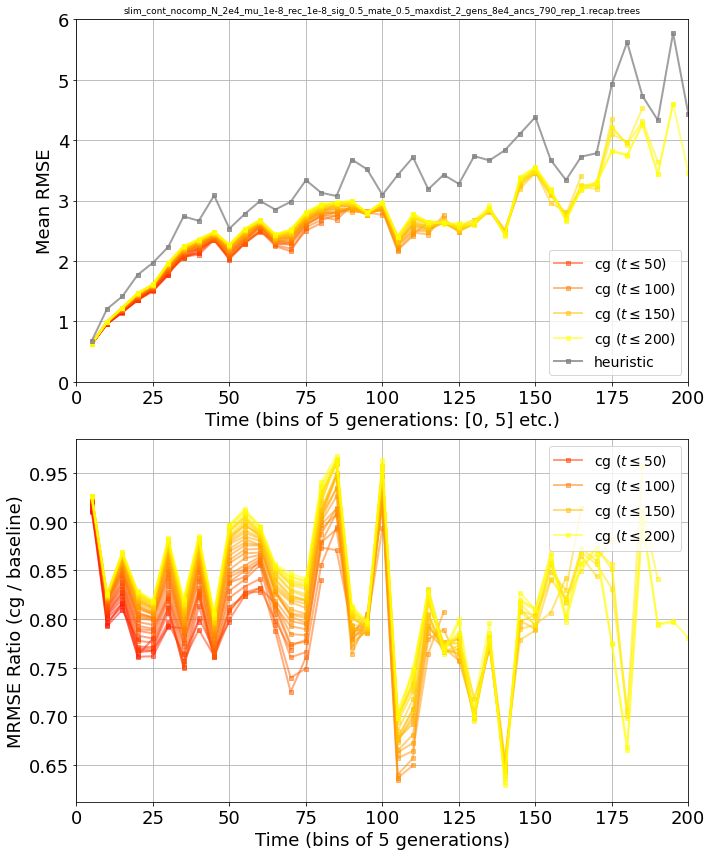

In [22]:
f, (ax0, ax2) = pyplot.subplots(2, 1, figsize=(10, 12))
time_cutoffs = np.linspace(0.0, 200.0, int((200.0 / 5.0)) + 1)[1:]

colors = pyplot.cm.autumn(np.linspace(0, 1, len(time_cutoffs)))

ax0.set_xlabel("Time (bins of 5 generations: [0, 5] etc.)", fontsize=18)
ax0.set_ylabel("Mean RMSE", fontsize=18)
ax0.tick_params(axis='both', which='major', labelsize=18)
ax0.set_title("slim_cont_nocomp_N_2e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8e4_ancs_790_rep_1.recap.trees",
              fontsize=9)

for cg, cutoff, color in zip(cg_results, time_cutoffs, colors):
    label = None if int(cutoff) % 50 != 0 else 'cg ($t \\leq {}$)'.format(int(cutoff))
    ax0.plot(np.arange(1, len(cg)+1) * 5, cg, alpha=0.5, color=color, lw=2, marker='s', markersize=4, 
            label=label)

ax0.plot(np.arange(1, len(heuristic_result)+1) * 5, heuristic_result, alpha=0.75, 
        color='grey', lw=2, marker='s', markersize=4, label='heuristic')
    
ax0.grid()
ax0.set_xlim(0, 200)
ax0.set_ylim(0, 6)
ax0.legend(fontsize=14, loc='lower right')

ax2.set_xlabel("Time (bins of 5 generations)", fontsize=18)
ax2.set_ylabel("MRMSE Ratio (cg / baseline)", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
for cg, cutoff, color in zip(cg_results, time_cutoffs, colors):
    ratio = np.array(cg) 
    ratio /= np.array(heuristic_result)[:ratio.shape[0]]
    label = None if int(cutoff) % 50 != 0 else 'cg ($t \\leq {}$)'.format(int(cutoff))
    ax2.plot(np.arange(1, len(ratio)+1) * 5, 
             ratio, color=color, lw=2, marker='s', alpha=0.5, markersize=4,
             label=label)

ax2.legend(fontsize=14, loc='upper right')
ax2.grid()
ax2.set_xlim(0, 200)

pyplot.tight_layout()
#pyplot.savefig('cg_790_ancients_spatial_stats.pdf')

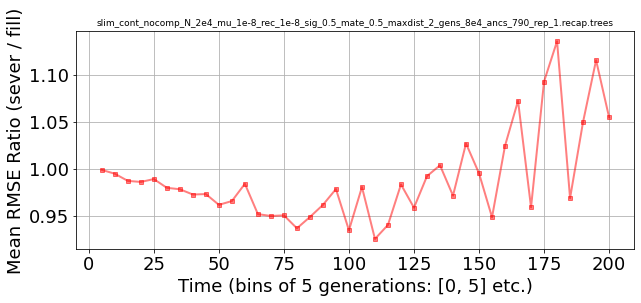

In [19]:
f, ax = pyplot.subplots(1, 1, figsize=(10, 4))
time_cutoffs = np.linspace(0.0, 200.0, int((200.0 / 5.0)) + 1)[1:]

ax.set_xlabel("Time (bins of 5 generations: [0, 5] etc.)", fontsize=18)
ax.set_ylabel("Mean RMSE Ratio (sever / fill)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title("slim_cont_nocomp_N_2e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8e4_ancs_790_rep_1.recap.trees",
              fontsize=9)
ratio = np.array(cg_results_sever[-1]) / np.array(cg_results[-1])
ax.plot(np.arange(1, len(ratio)+1) * 5, 
             ratio, color='r', lw=2, marker='s', alpha=0.5, markersize=4)
ax.grid()

In [25]:
estimate, actual = pickle.load(open('xy.pkl','rb'))

In [26]:
estimate = estimate.data.cpu().numpy()
actual = actual.data.cpu().numpy()

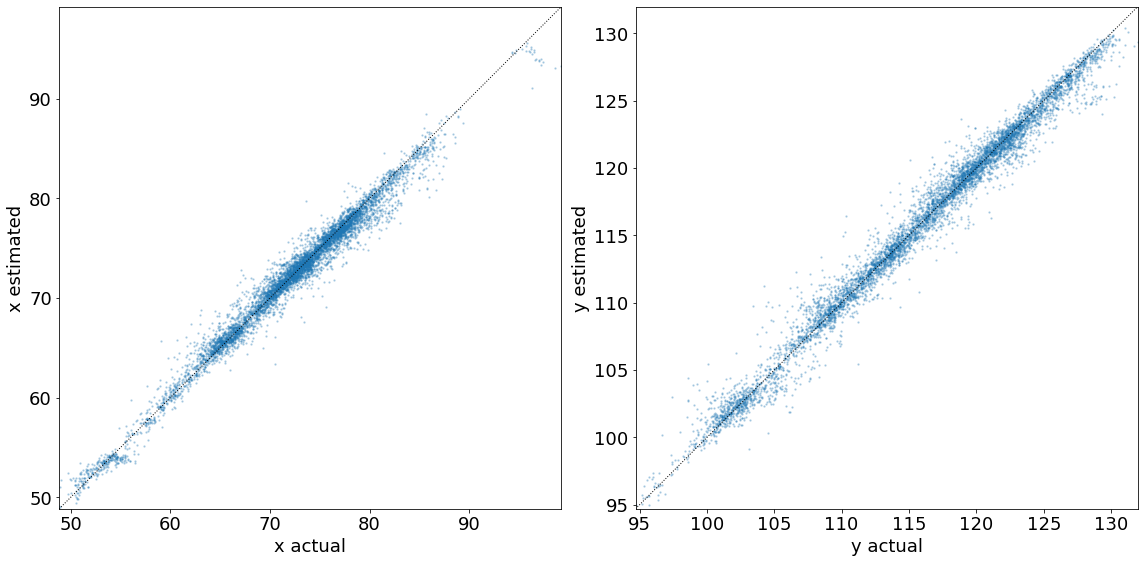

In [45]:
f, axes = pyplot.subplots(1, 2, figsize=(16, 8))

ax0.set_title("slim_cont_nocomp_N_2e4_mu_1e-8_rec_1e-8_sig_0.5_mate_0.5_maxdist_2_gens_8e4_ancs_790_rep_1.recap.trees",
              fontsize=9)

for ax, idx in zip(axes, [0, 1]):
    xy = 'x' if idx == 0 else 'y'
    ax.set_ylabel("{} estimated".format(xy), fontsize=18)
    ax.set_xlabel("{} actual".format(xy), fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)

    ax.scatter(actual[:, idx], estimate[:, idx], alpha=0.25, s=2)
    xymin = min(actual[:, idx].min().item(), estimate[:, idx].min().item())
    xymax = max(actual[:, idx].max().item(), estimate[:, idx].max().item())
    ax.set_xlim(xymin, xymax)
    ax.set_ylim(xymin, xymax)
    ax.set_aspect(1)
    ax.plot(np.linspace(xymin, xymax, 100), np.linspace(xymin, xymax, 100), 
            ls='dotted', color='k', lw=1)
    
pyplot.tight_layout()
pyplot.savefig('cg_790_spatial_scatter.pdf')